# Exercise 12

### Machine Learning Finding Optimal Model and Hyperparameters

For digits dataset in sklearn.dataset, please try following classifiers and find out the one that gives best performance. Also find the optimal parameters for that classifier.

In [20]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [21]:
data = load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [22]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   
3        0.0        0.0        7.0       13.0       13.0        9.0   
4        0.0        0.0        0.0        2.0       16.0        4.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  
3        0.0        0.0  
4        0.0        0.0  

[5 rows x 64 columns]

<Figure size 640x480 with 0 Axes>

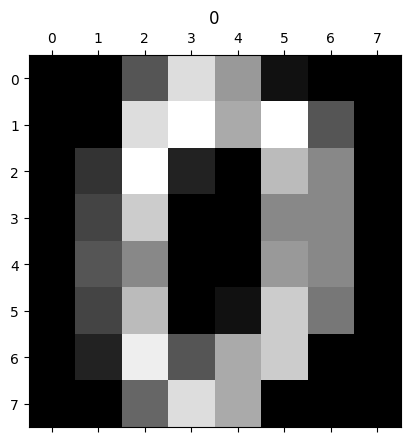

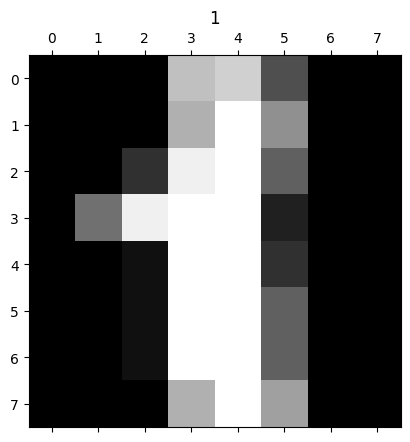

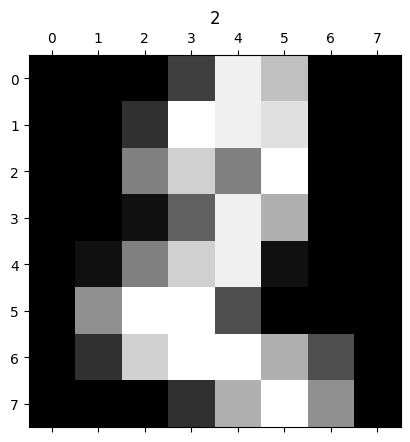

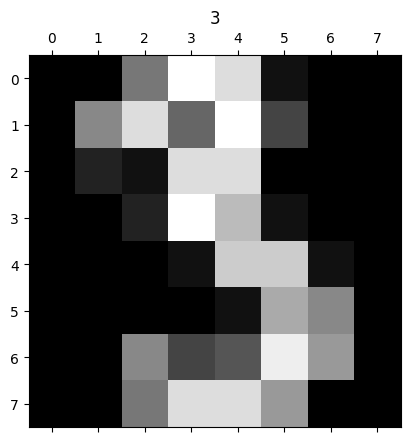

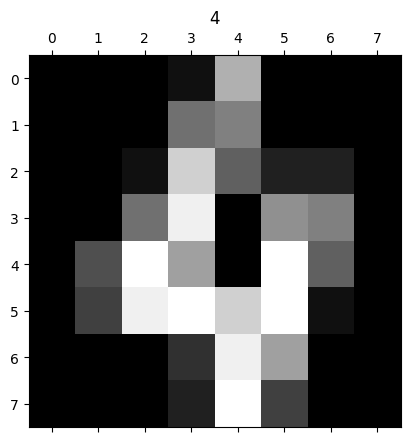

In [24]:
plt.gray()
for i in range(5):
    plt.matshow(data.images[i])
    plt.title(data.target[i])

In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
        }
    },
    'gaussian' : {
       'model' : GaussianNB(),
        'params' : {}
    },
    'multinomial' : {
        'model' : MultinomialNB(),
        'params' : {}
    }
}

In [32]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(data.data, data.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [33]:
newdf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
newdf

model  best_score                   best_params
0                  svm    0.947697  {'C': 1, 'kernel': 'linear'}
1        random_forest    0.894850          {'n_estimators': 10}
2  logistic_regression    0.922114                      {'C': 1}
3        decision_tree    0.805803      {'criterion': 'entropy'}
4             gaussian    0.806928                            {}
5          multinomial    0.870350                            {}

In [36]:
np.mean(cross_val_score(svm.SVC(), data.data, data.target))

0.9632838130609718

In [37]:
np.mean(cross_val_score(svm.SVC(C=1, kernel="linear"), data.data, data.target))

0.9476973073351903

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25)

In [40]:
len(X_test)

450

In [41]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [45]:
predict = model.predict([df.iloc[8]])
predict

array([8])

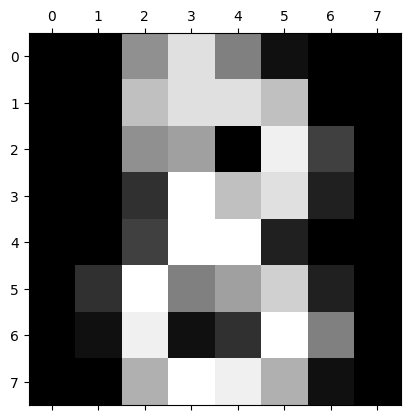

In [50]:
plt.matshow(data.images[8])

In [51]:
predict = model.predict(X_test)
predict

array([2, 4, 7, 0, 3, 5, 6, 8, 7, 4, 1, 6, 8, 5, 7, 7, 0, 1, 4, 2, 3, 4,
       4, 9, 2, 6, 5, 6, 7, 3, 2, 2, 9, 2, 6, 7, 8, 7, 1, 5, 2, 8, 5, 8,
       2, 3, 6, 1, 0, 4, 0, 8, 1, 7, 3, 5, 8, 1, 2, 1, 7, 1, 9, 4, 9, 2,
       9, 3, 3, 4, 7, 0, 7, 3, 2, 8, 7, 2, 0, 1, 7, 1, 0, 9, 1, 6, 8, 2,
       1, 2, 5, 9, 1, 4, 3, 0, 4, 5, 6, 4, 6, 8, 6, 3, 5, 9, 4, 2, 0, 5,
       5, 7, 8, 1, 2, 7, 0, 9, 6, 8, 8, 6, 9, 5, 6, 5, 6, 1, 7, 1, 7, 4,
       0, 4, 9, 2, 9, 1, 2, 4, 2, 7, 6, 8, 5, 1, 2, 6, 5, 6, 5, 6, 7, 6,
       5, 7, 2, 7, 6, 0, 2, 5, 1, 9, 0, 4, 9, 6, 3, 1, 4, 0, 5, 5, 3, 6,
       4, 3, 3, 9, 6, 2, 6, 6, 6, 7, 6, 4, 2, 7, 5, 5, 5, 8, 1, 2, 1, 5,
       3, 6, 7, 8, 9, 5, 2, 8, 2, 3, 7, 8, 6, 4, 0, 8, 3, 8, 8, 5, 3, 6,
       9, 3, 8, 4, 3, 9, 6, 2, 0, 2, 1, 6, 1, 8, 0, 0, 0, 7, 7, 8, 2, 8,
       0, 1, 2, 7, 6, 4, 5, 7, 7, 6, 3, 3, 9, 0, 1, 7, 3, 2, 2, 0, 2, 4,
       4, 9, 3, 6, 5, 5, 7, 7, 3, 3, 3, 4, 7, 9, 5, 5, 8, 0, 6, 6, 7, 7,
       4, 5, 0, 9, 0, 5, 2, 5, 7, 3, 7, 0, 1, 1, 8,

In [52]:
model.score(X_test, y_test)

0.9866666666666667

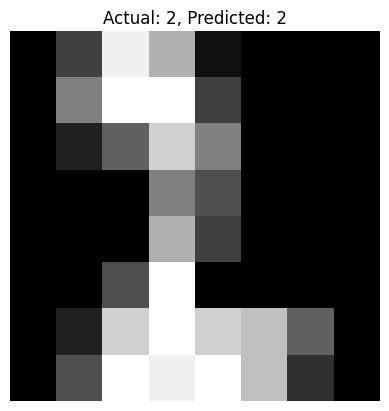

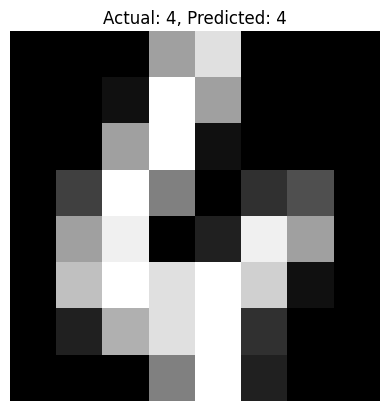

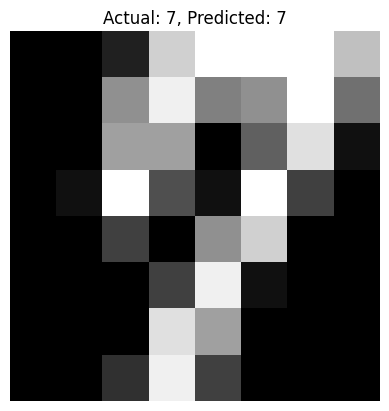

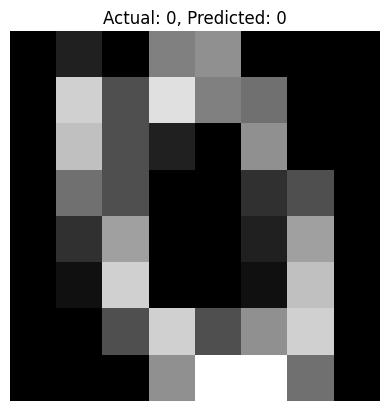

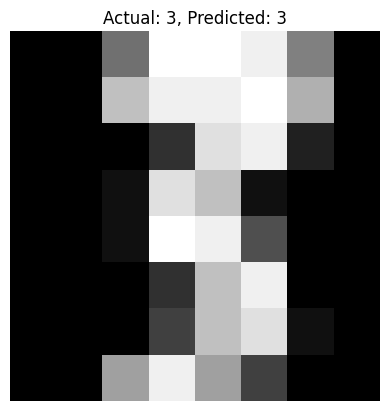

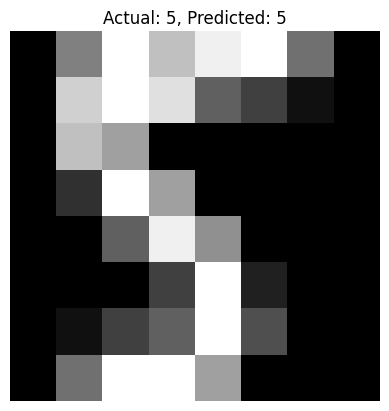

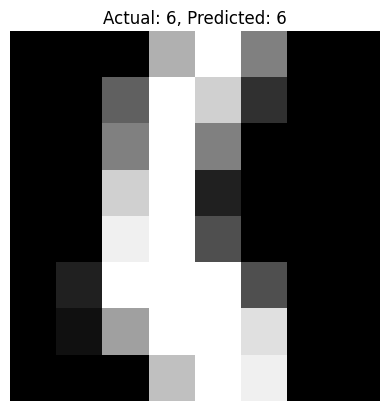

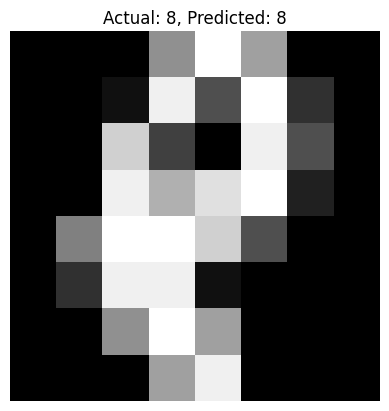

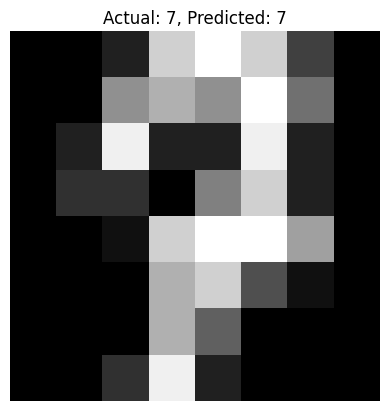

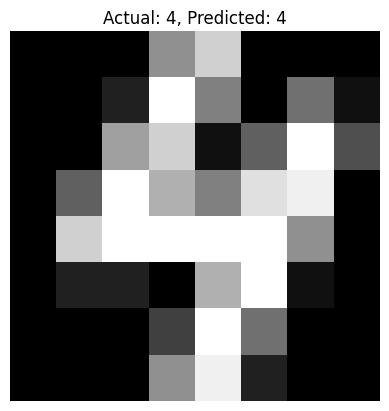

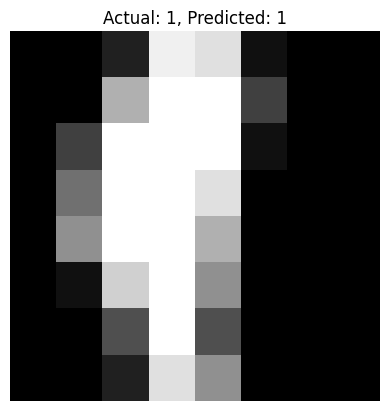

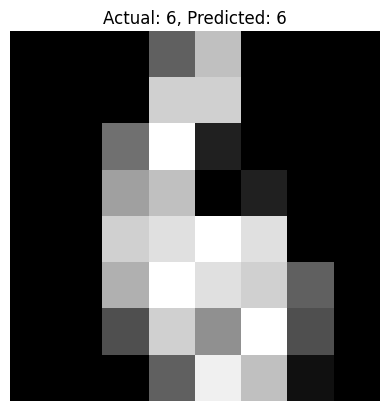

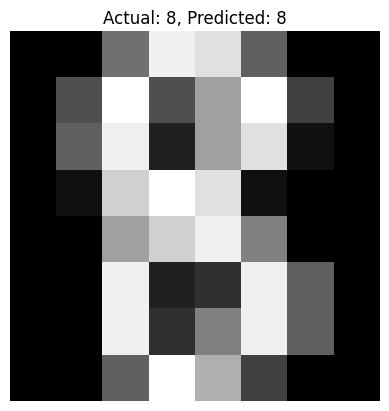

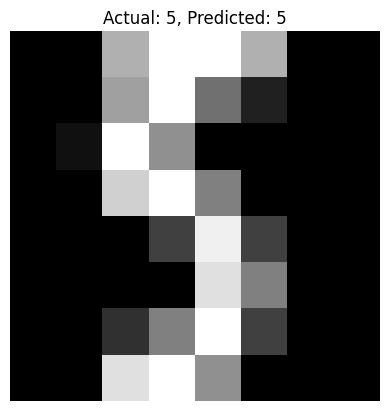

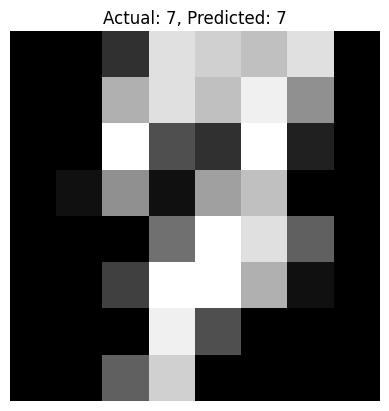

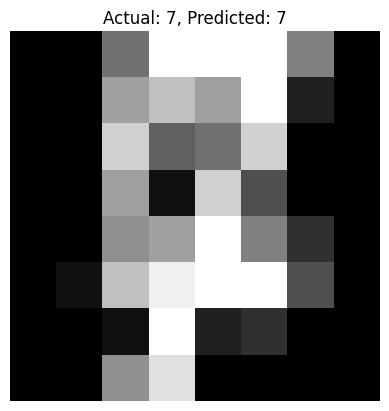

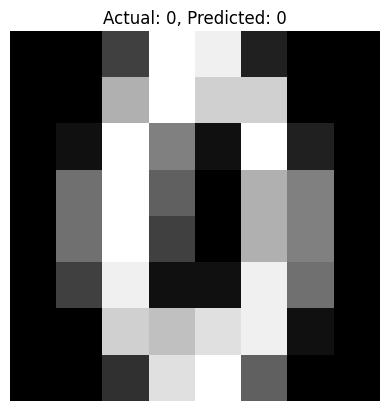

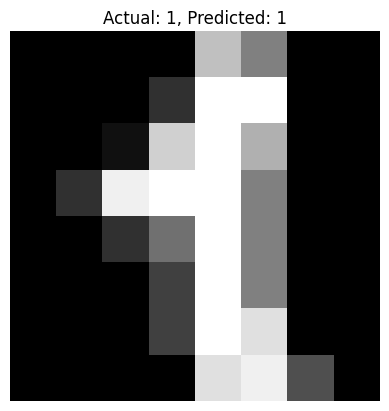

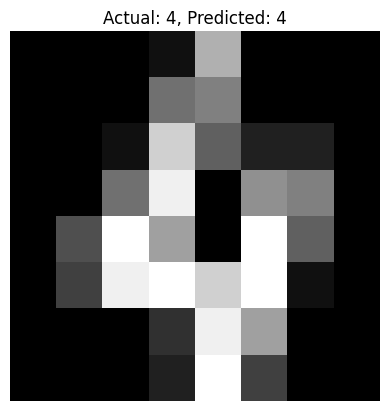

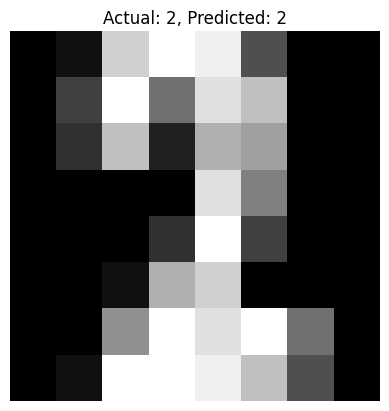

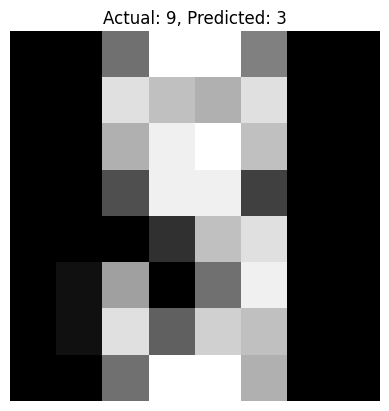

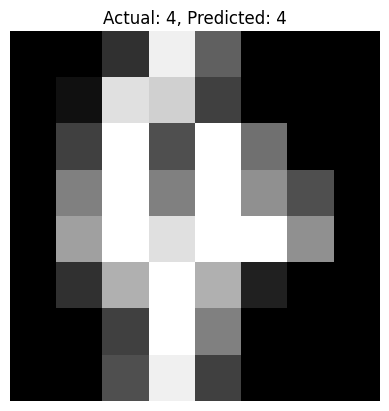

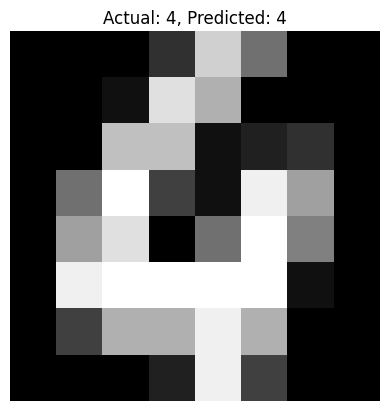

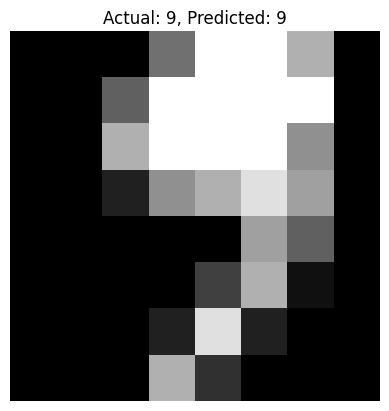

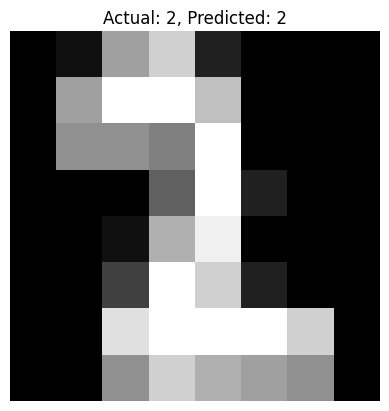

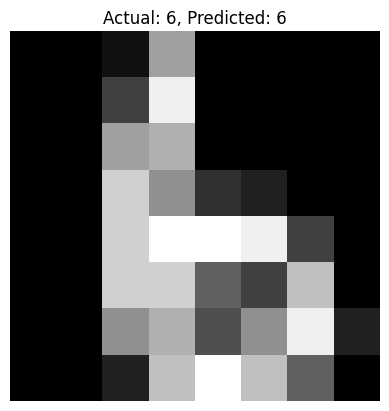

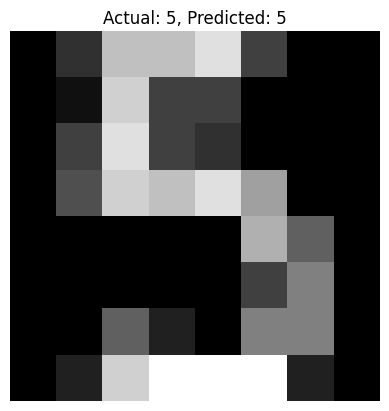

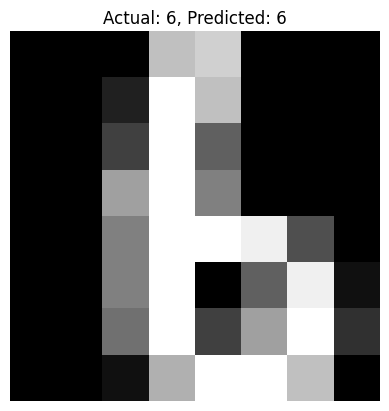

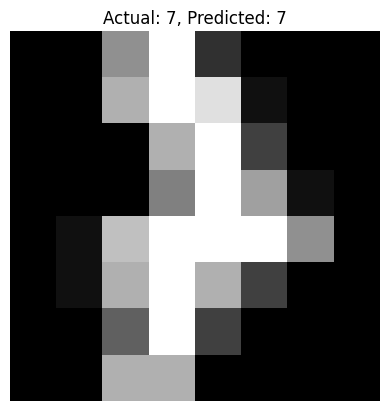

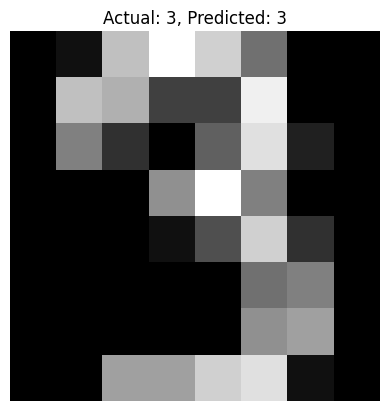

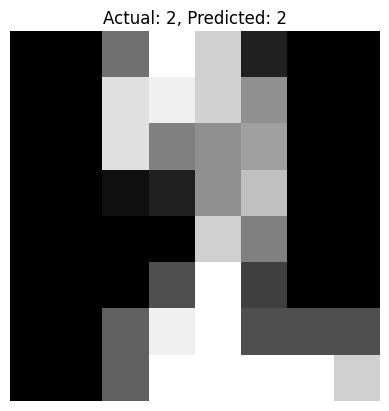

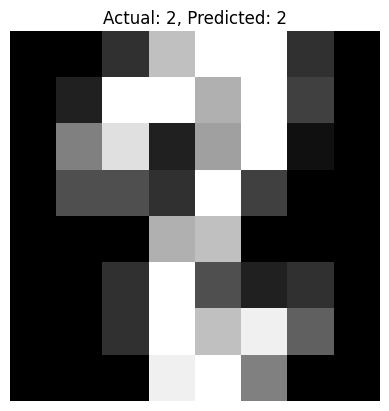

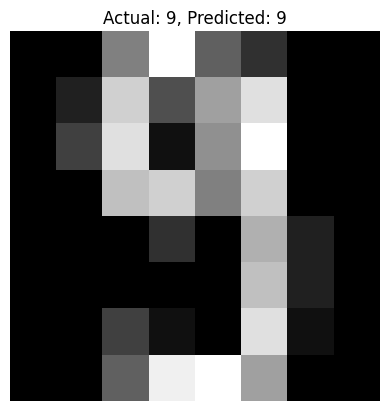

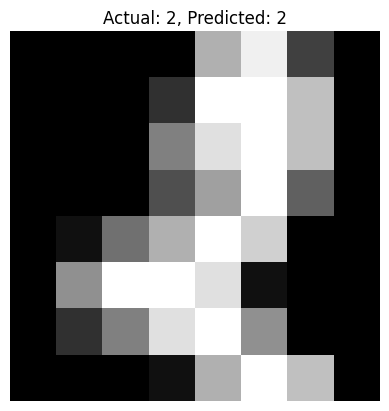

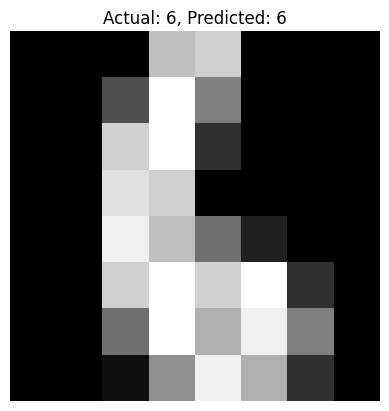

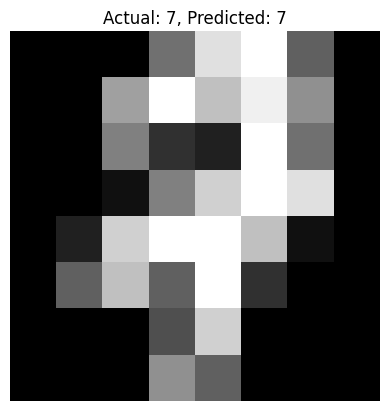

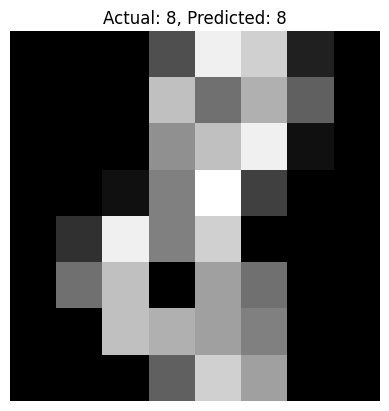

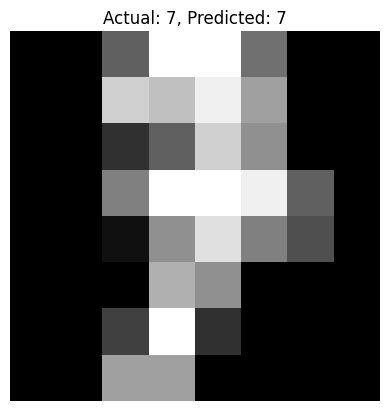

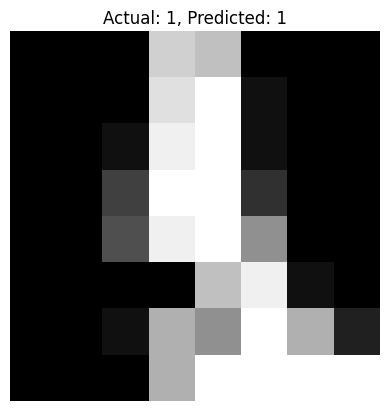

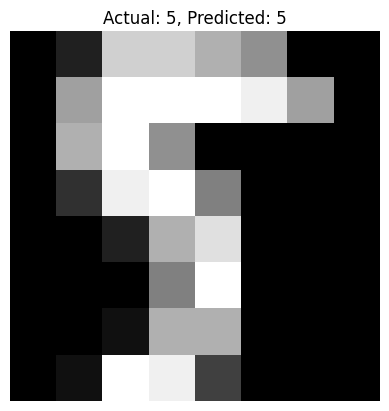

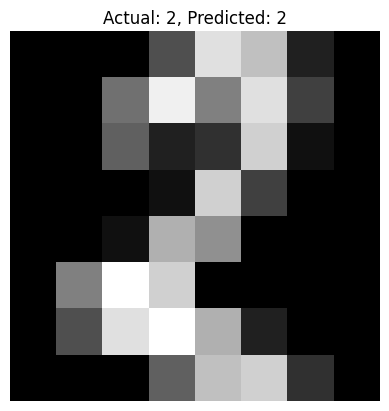

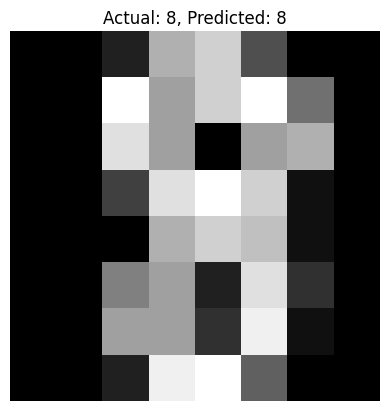

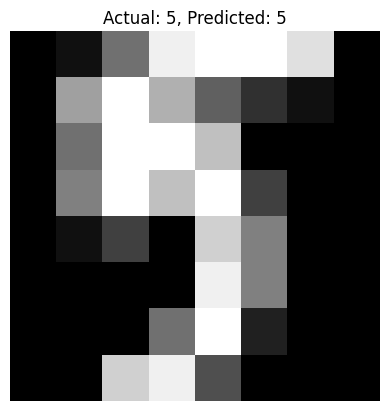

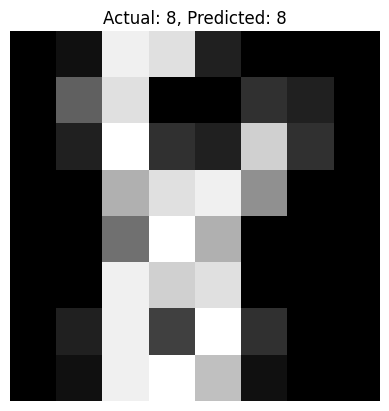

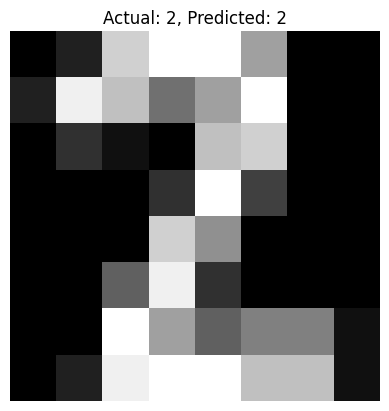

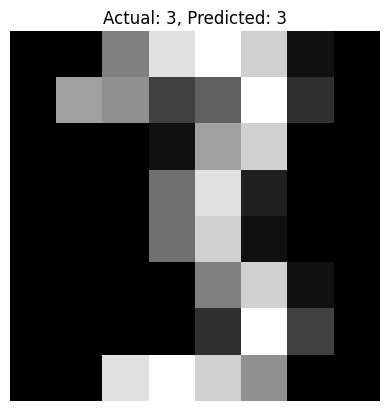

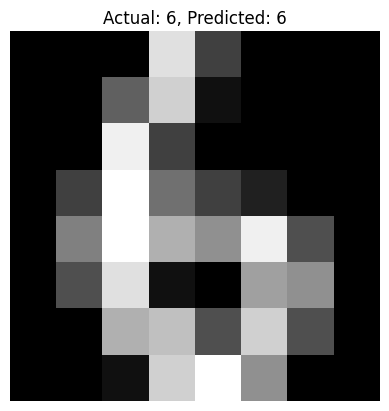

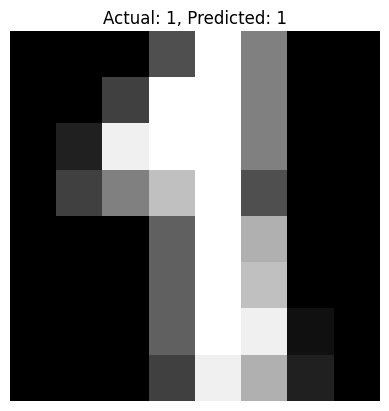

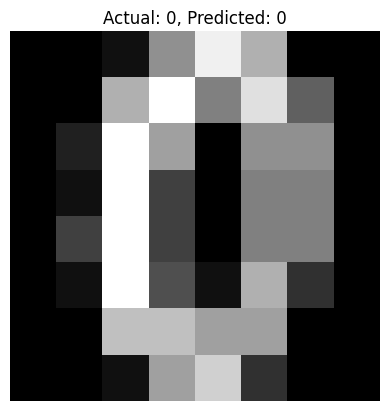

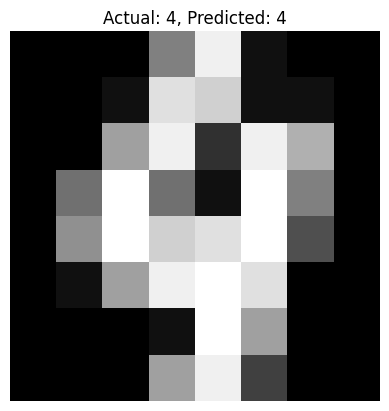

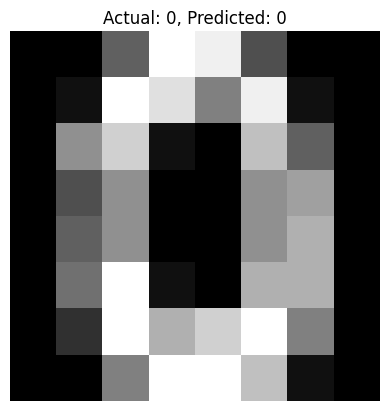

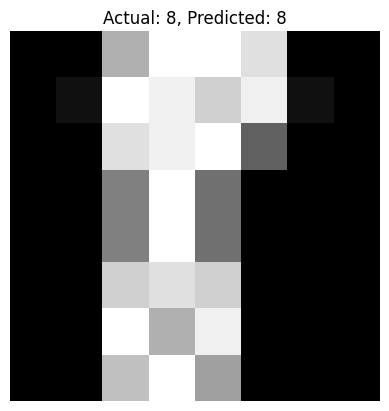

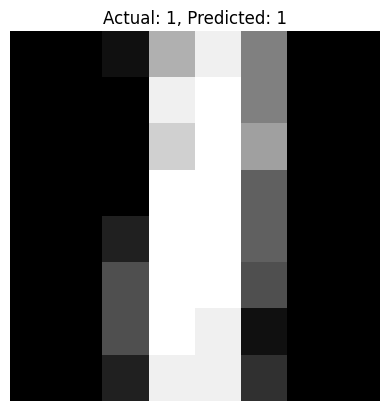

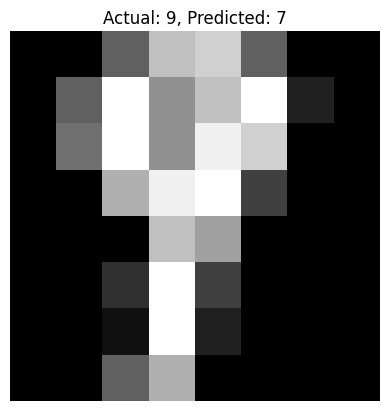

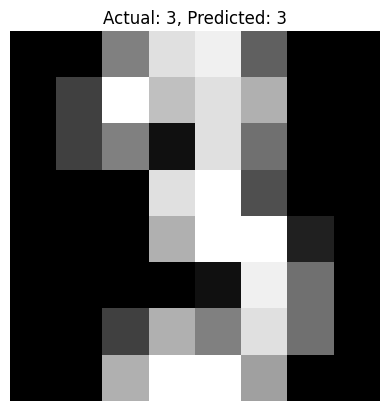

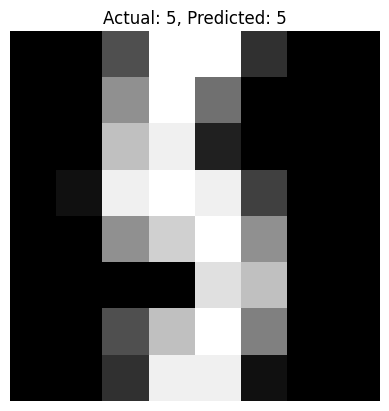

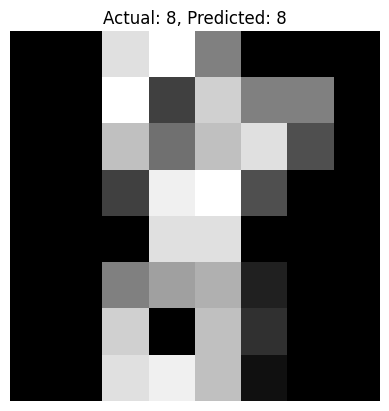

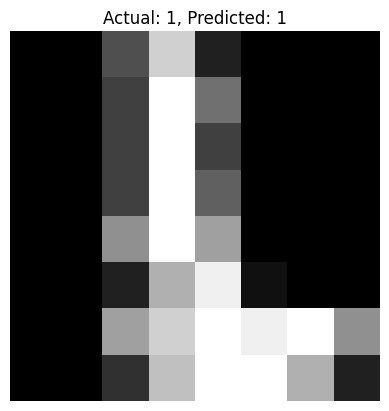

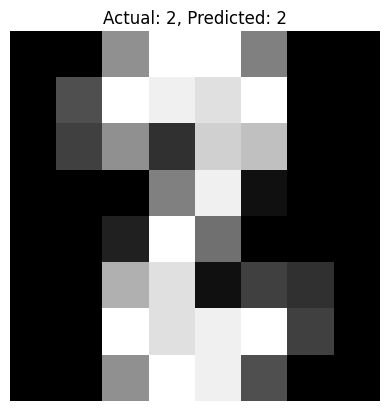

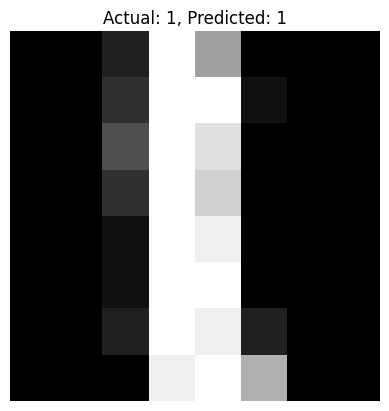

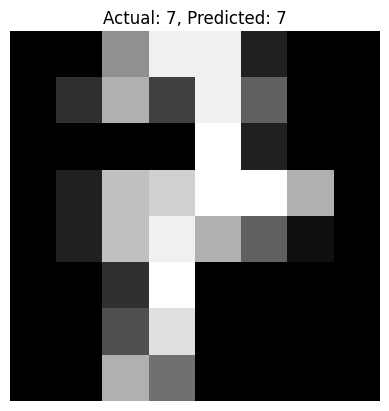

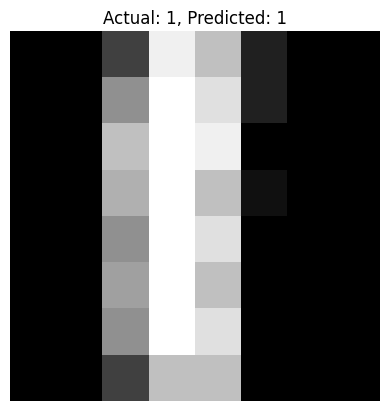

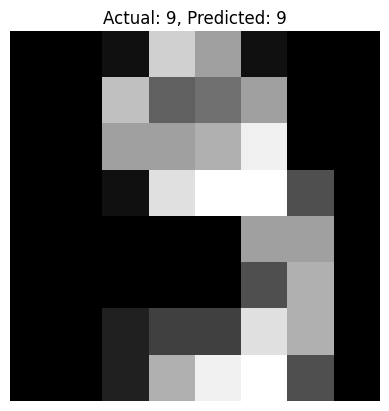

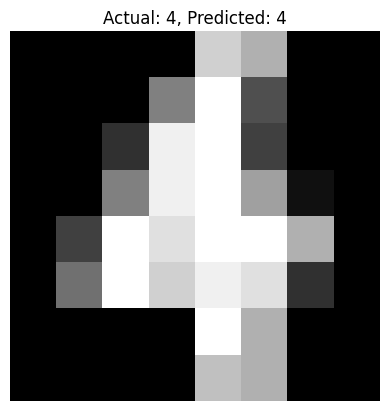

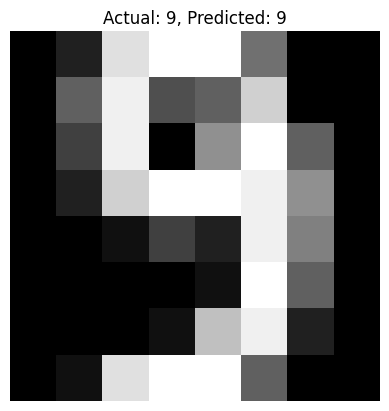

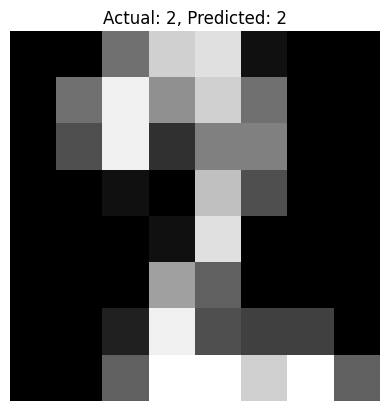

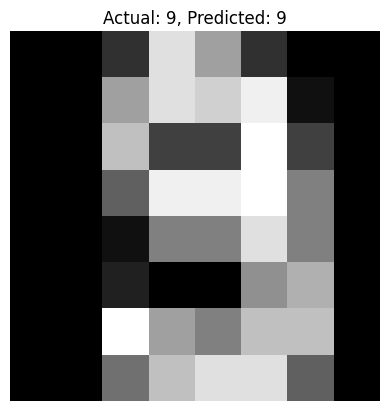

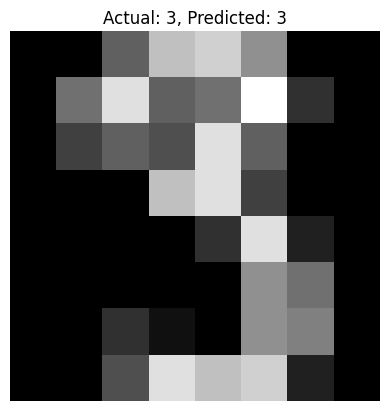

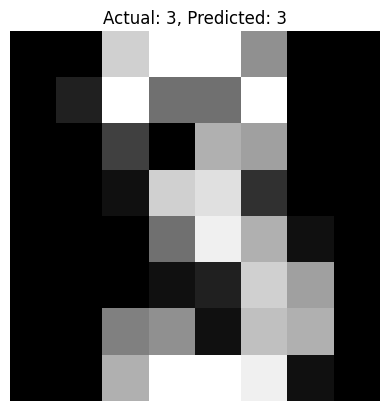

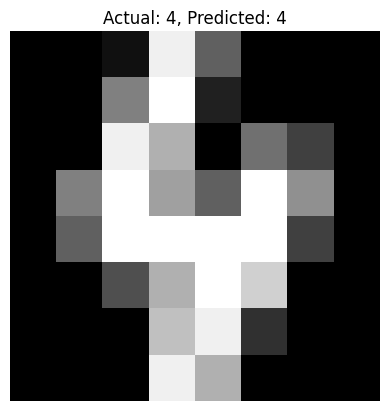

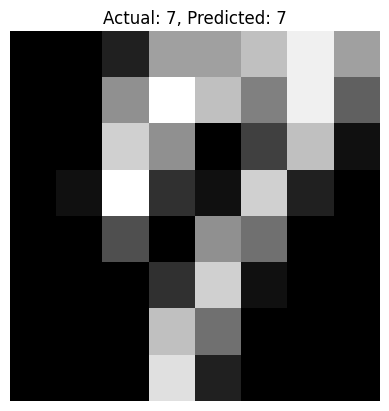

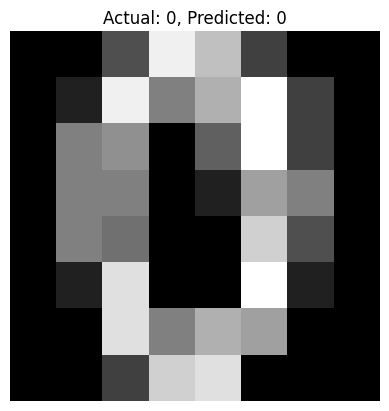

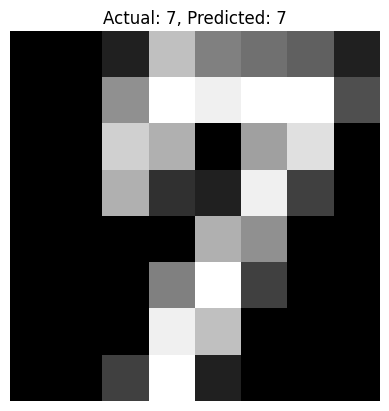

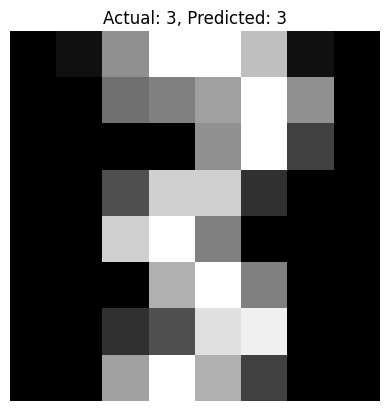

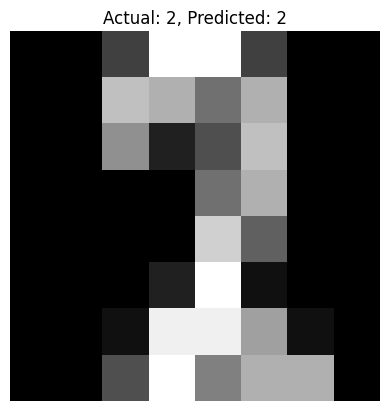

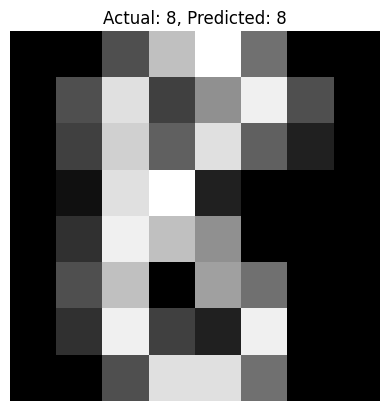

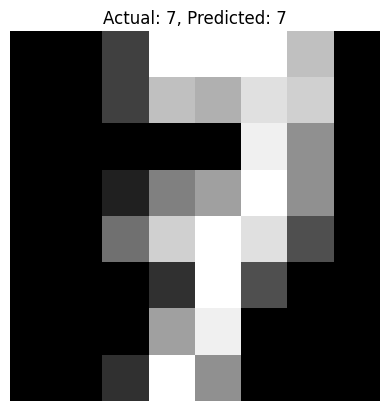

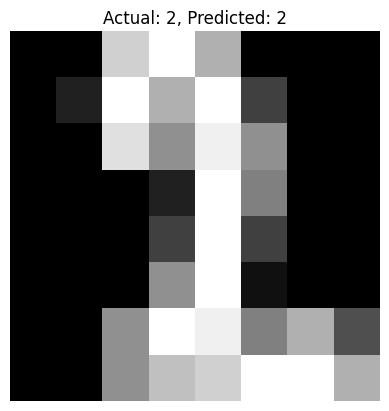

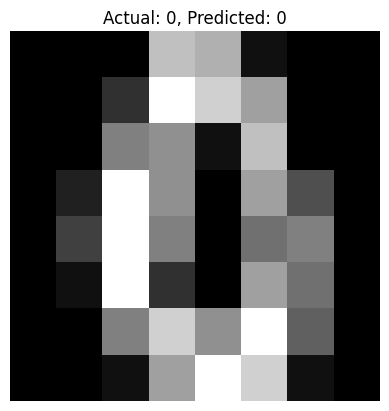

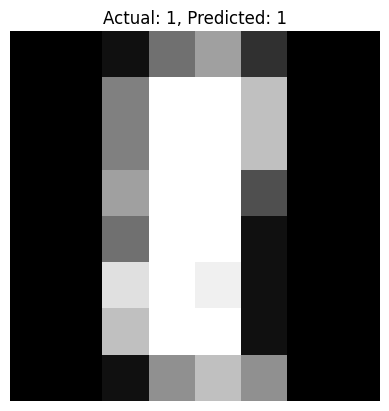

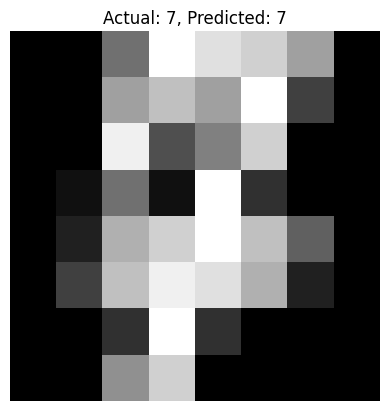

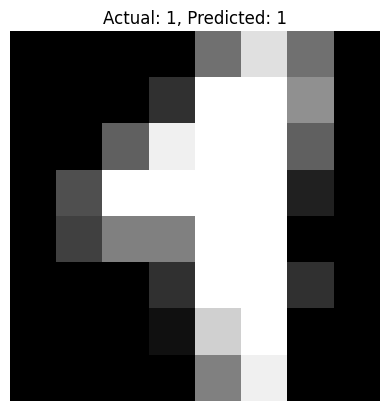

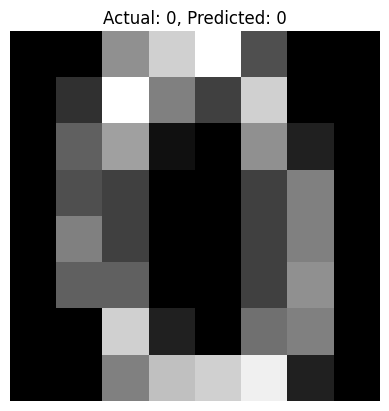

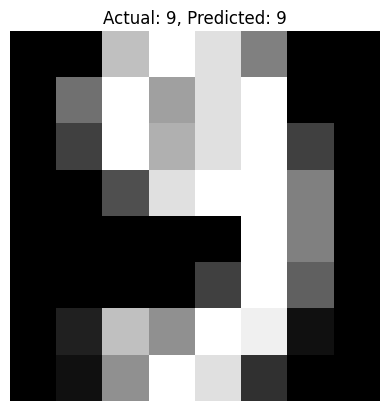

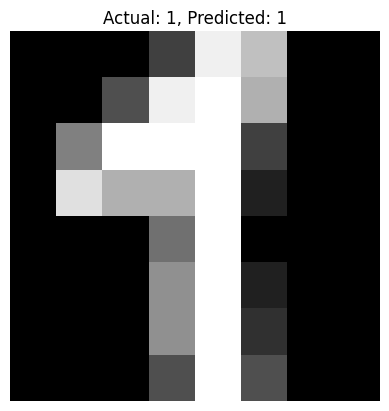

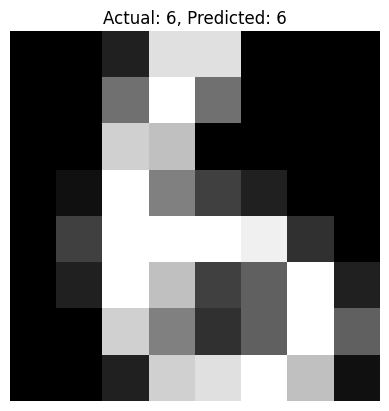

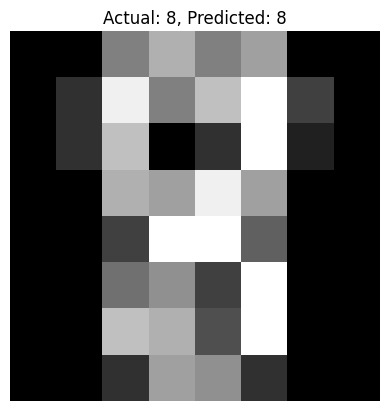

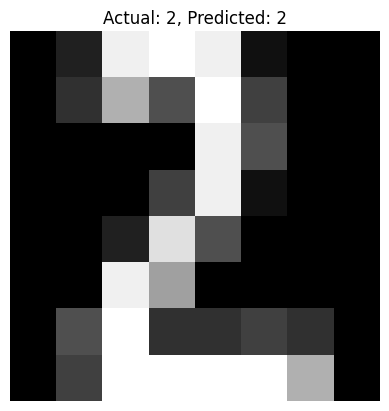

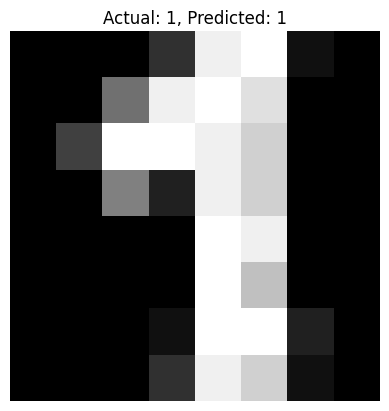

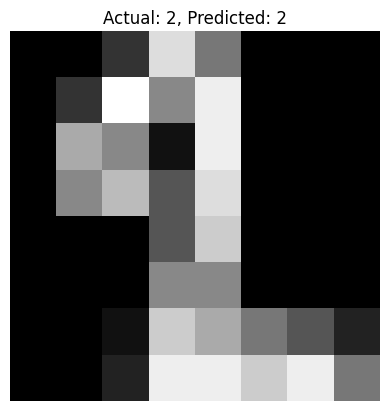

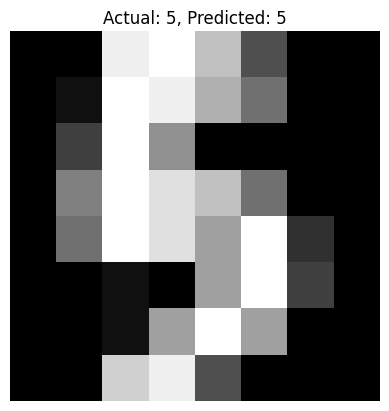

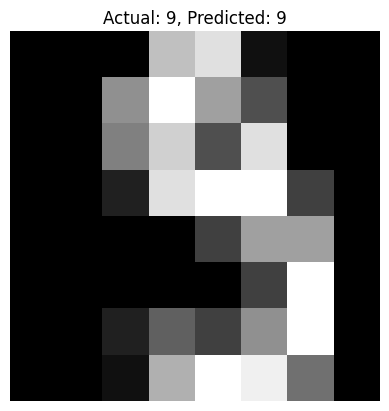

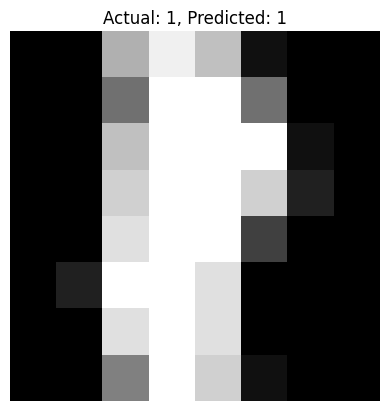

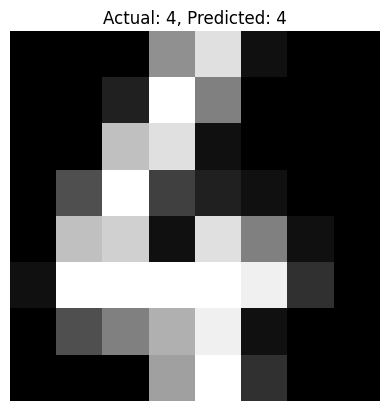

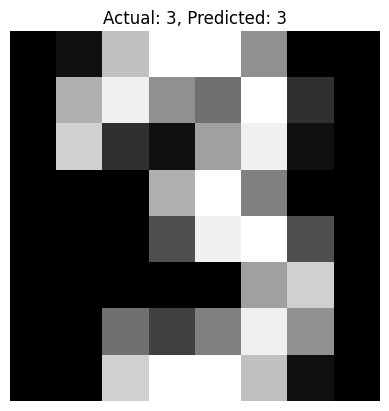

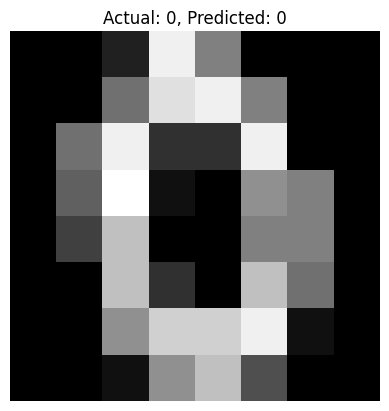

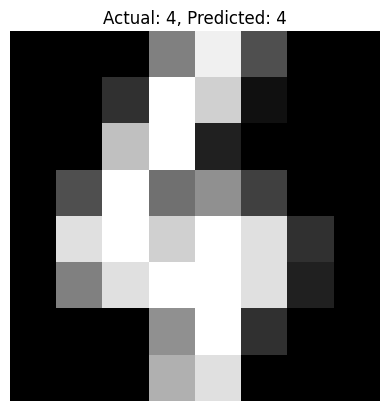

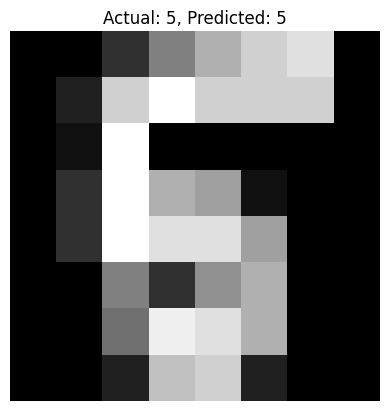

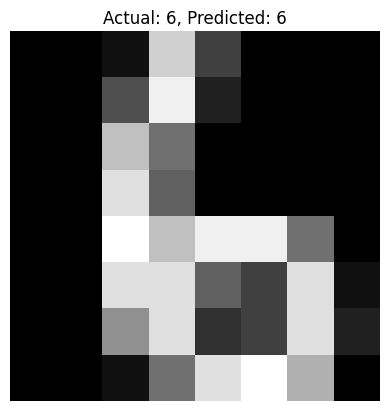

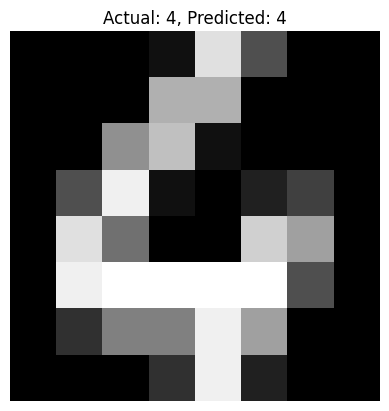

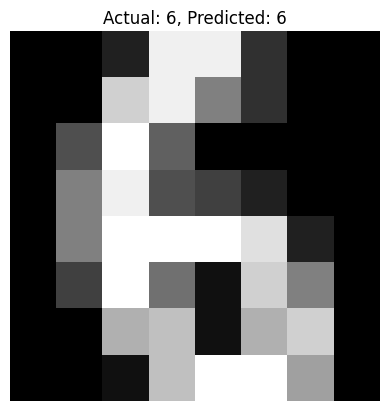

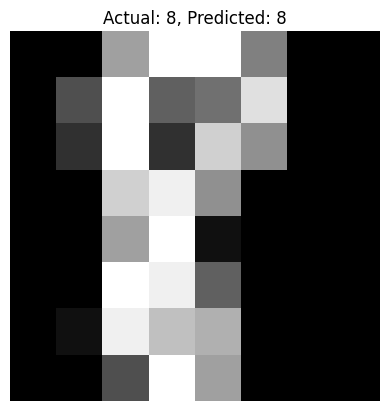

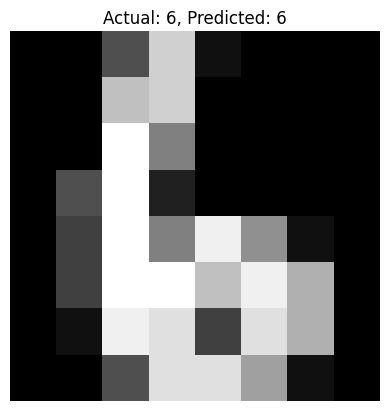

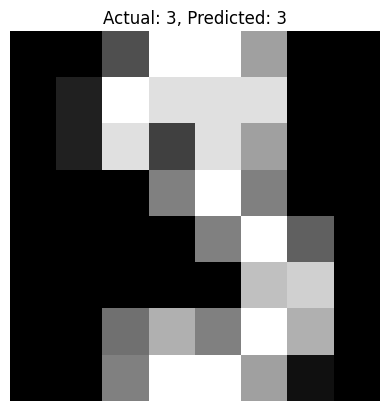

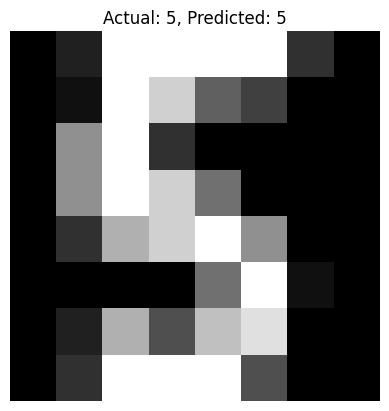

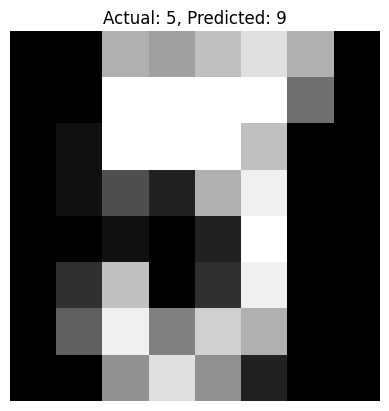

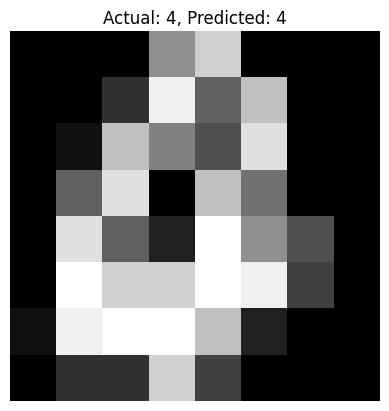

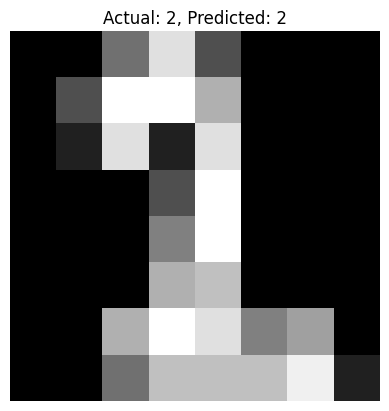

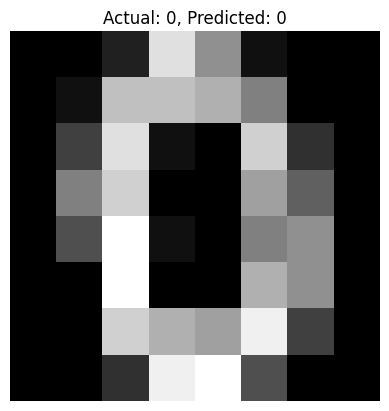

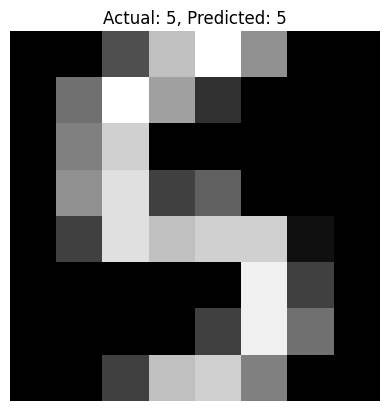

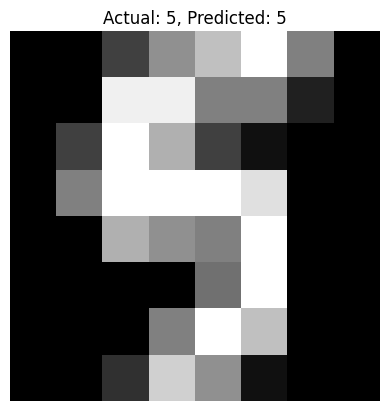

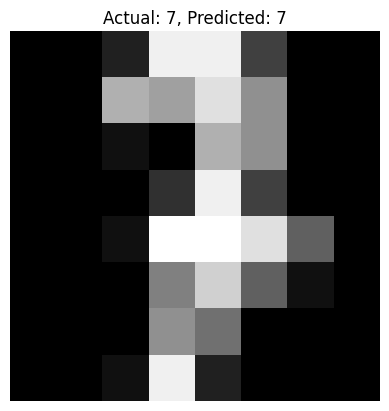

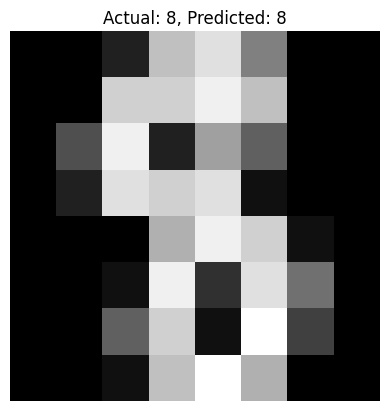

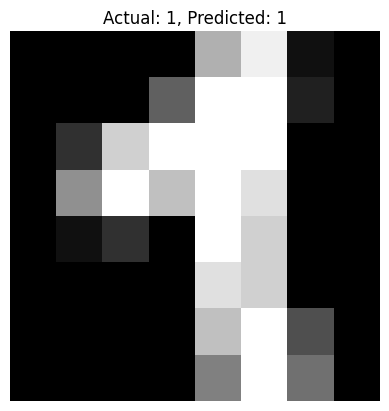

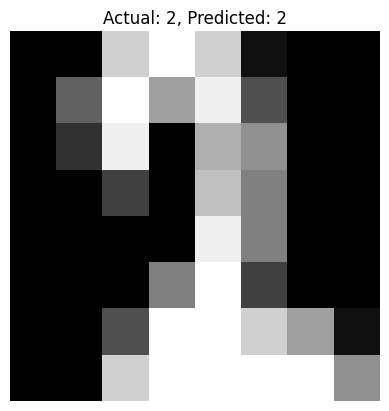

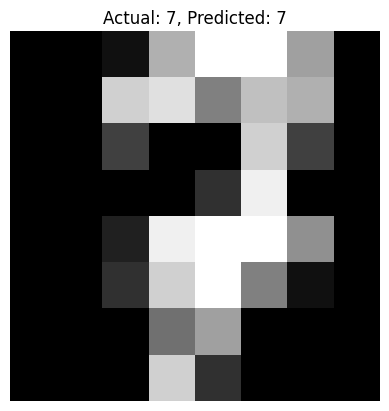

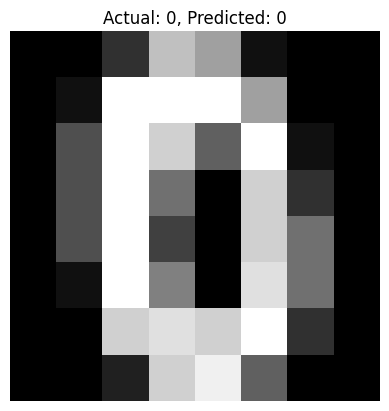

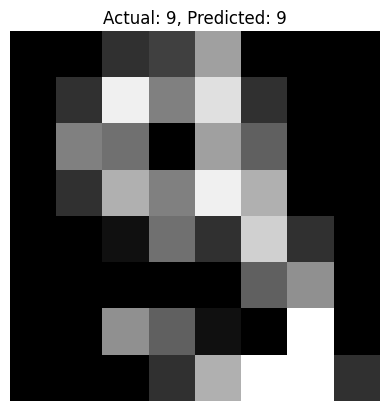

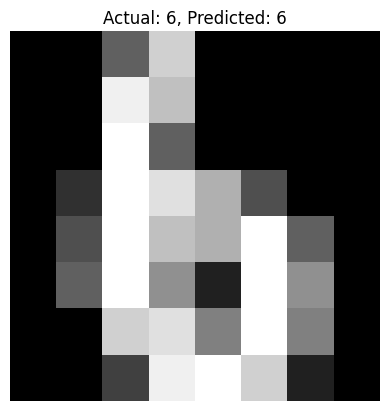

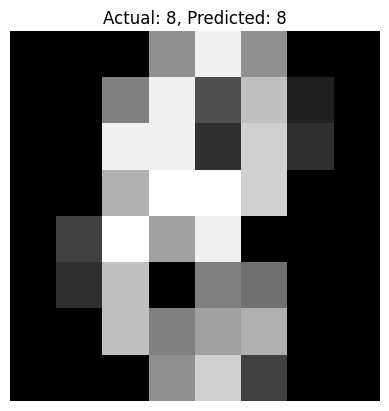

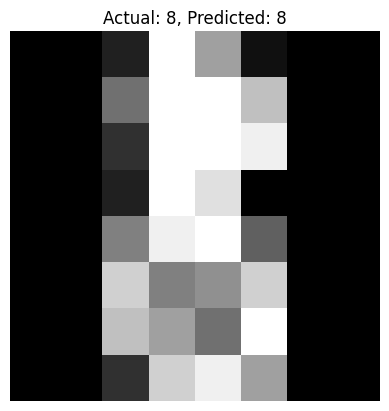

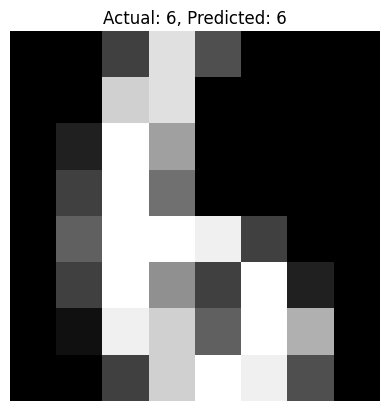

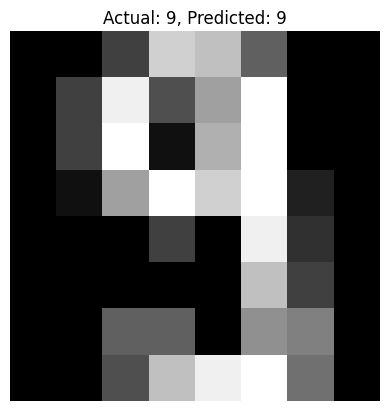

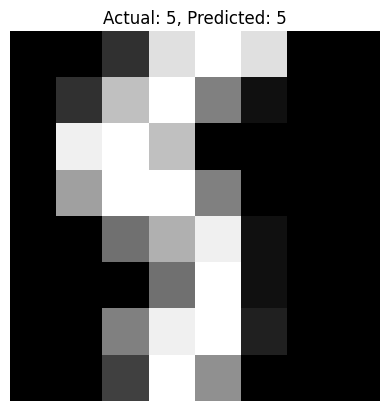

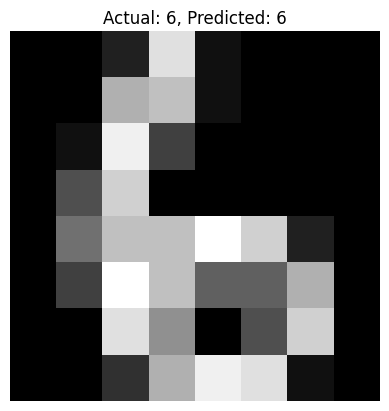

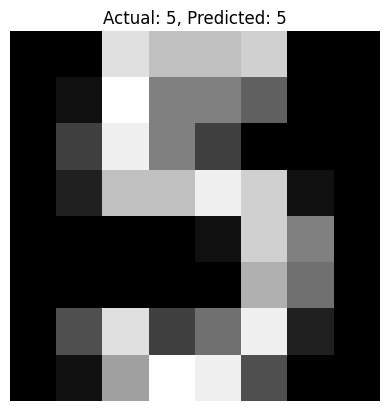

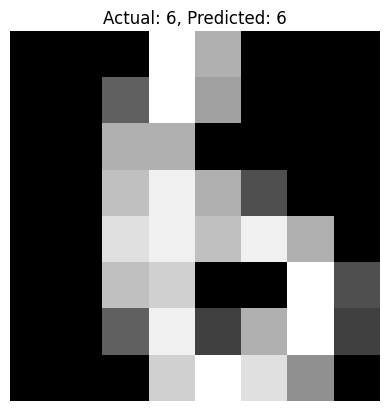

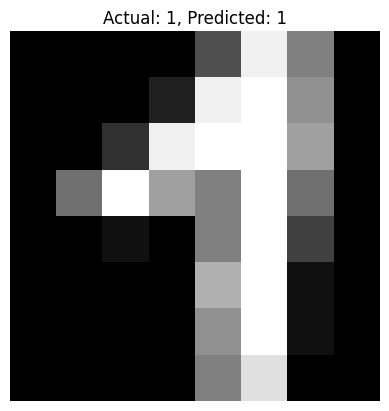

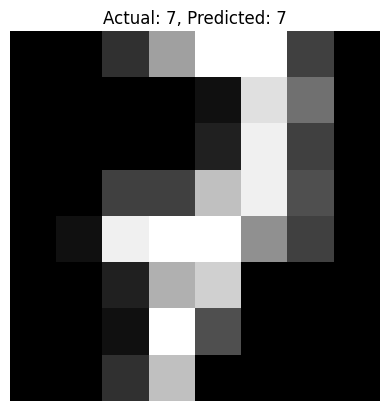

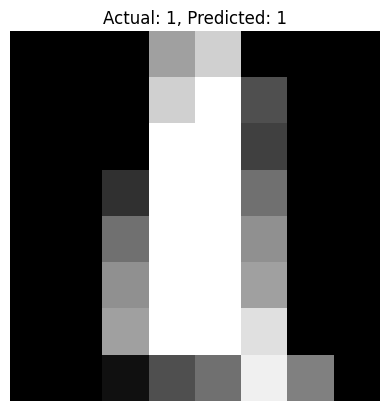

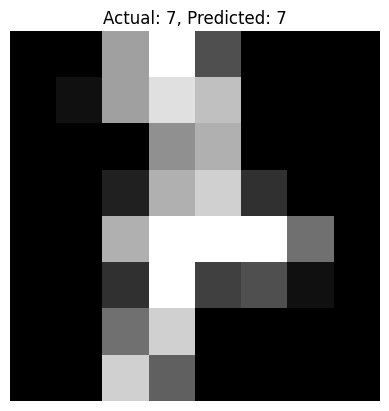

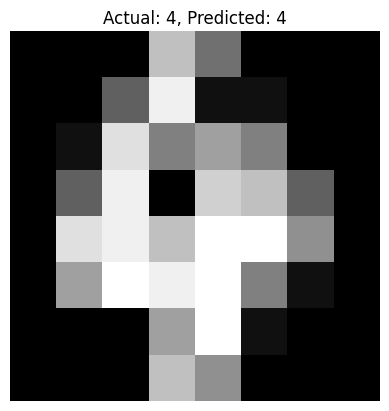

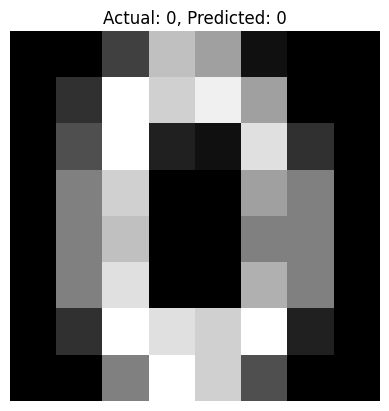

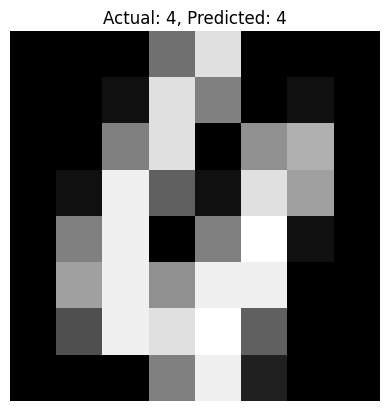

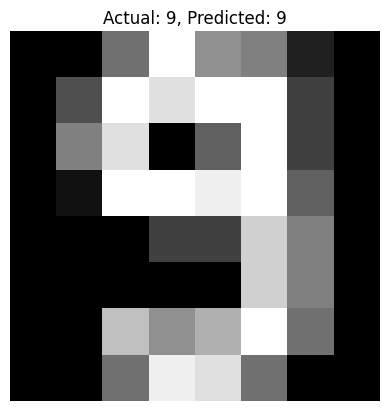

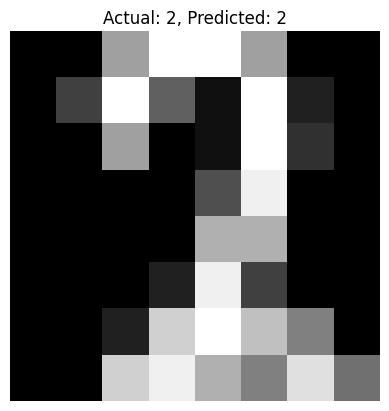

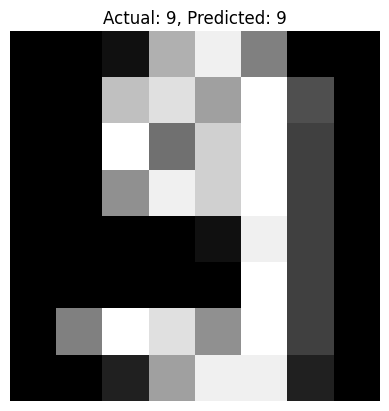

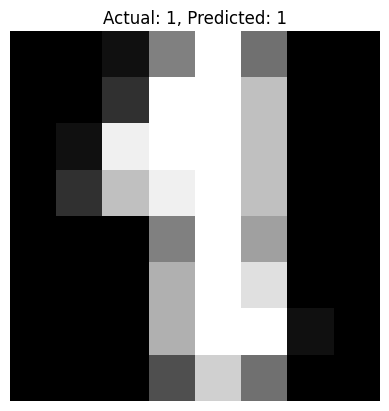

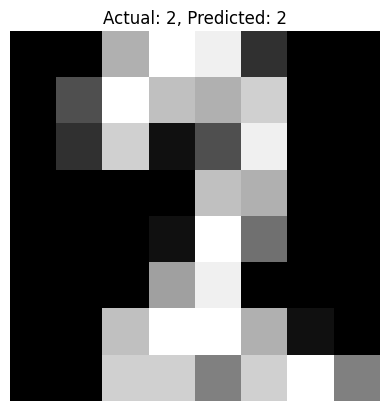

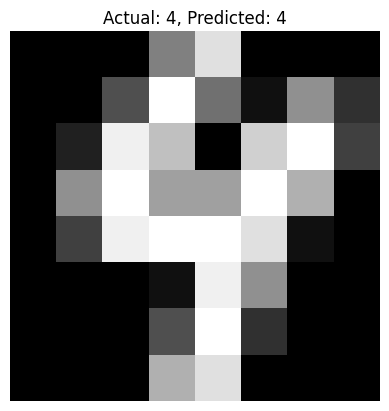

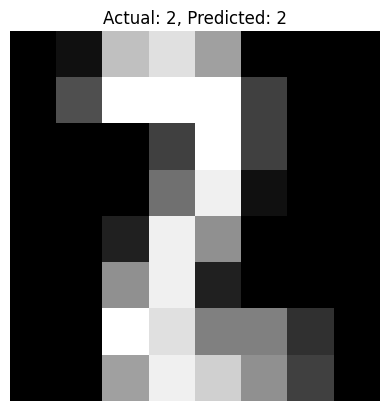

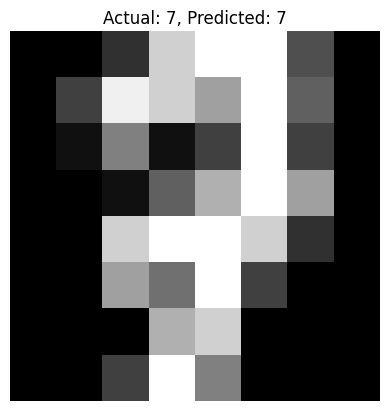

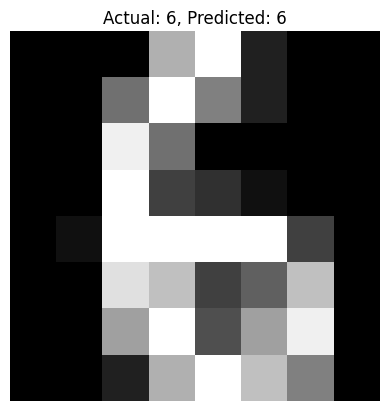

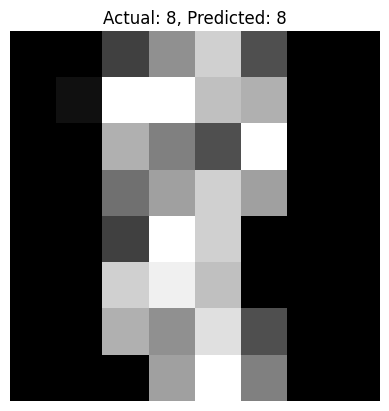

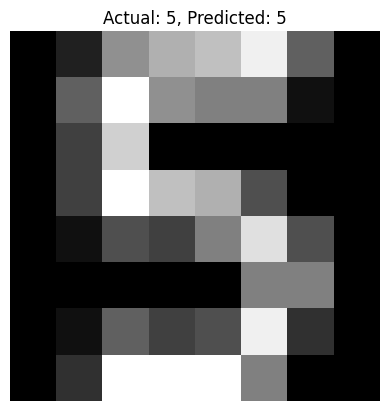

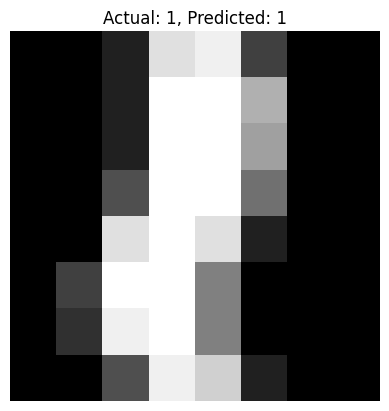

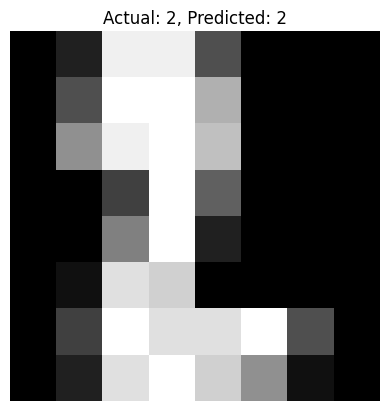

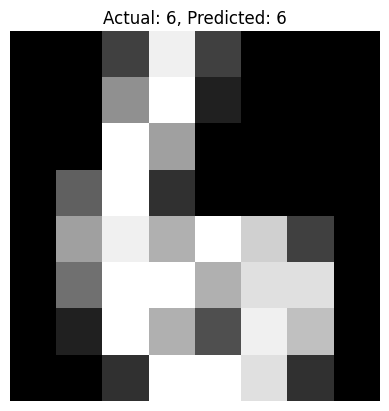

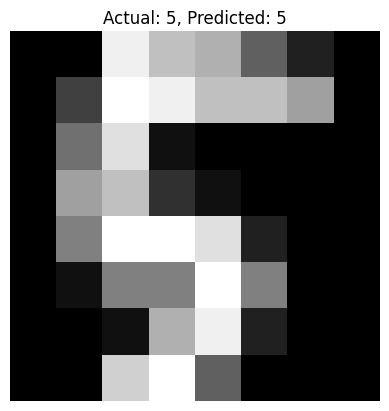

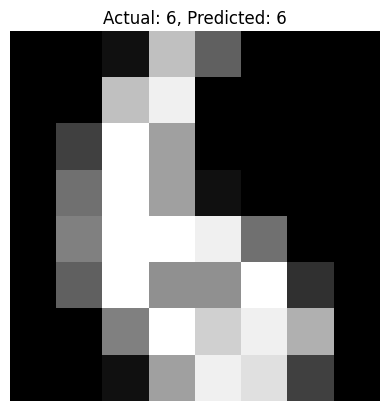

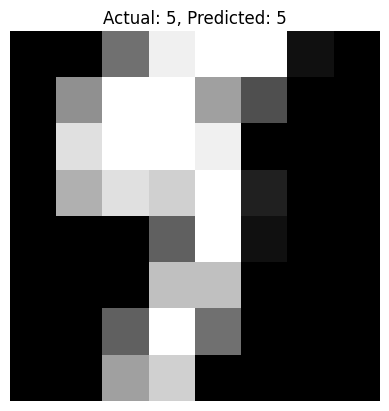

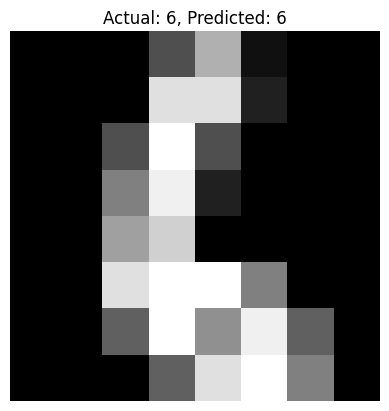

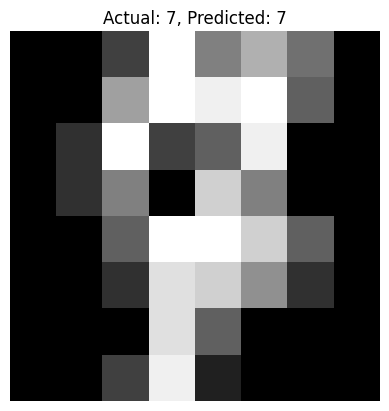

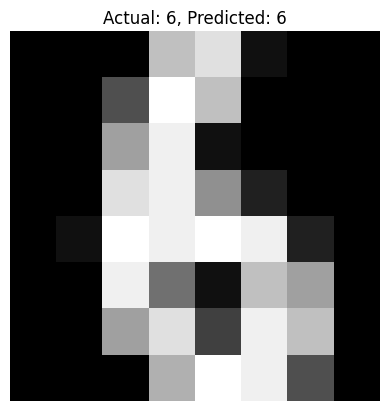

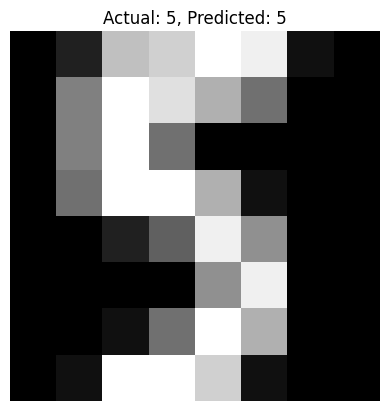

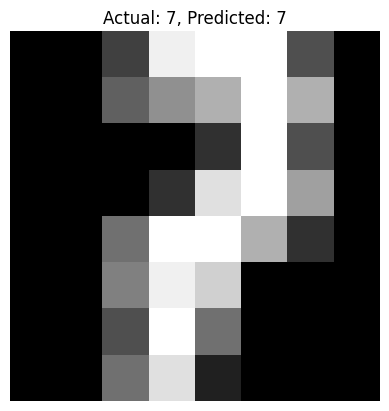

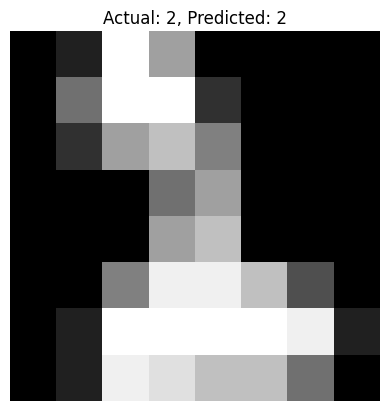

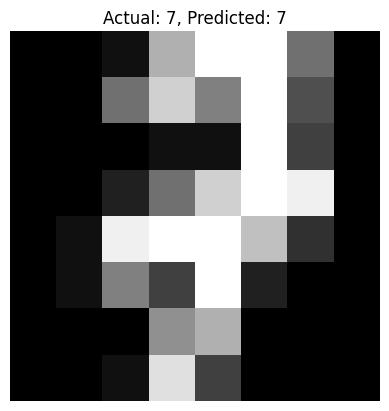

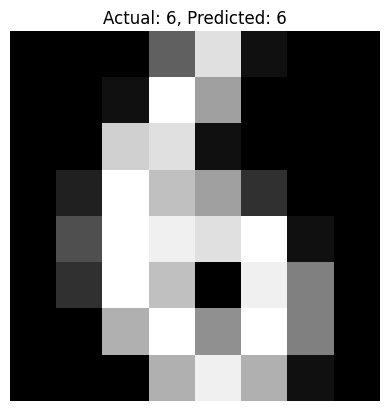

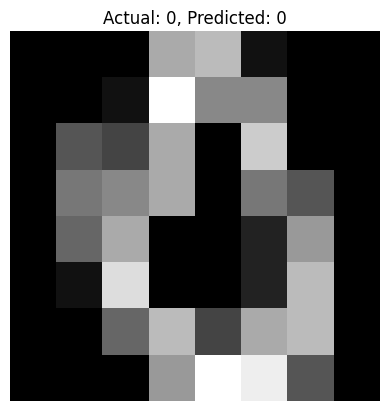

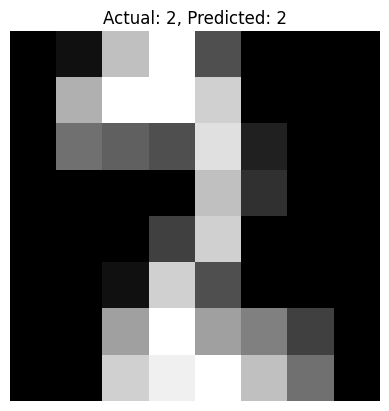

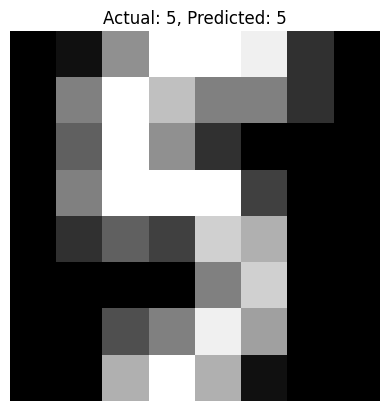

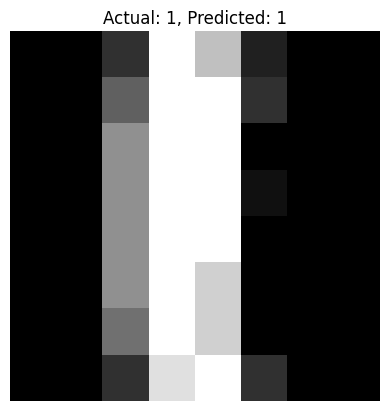

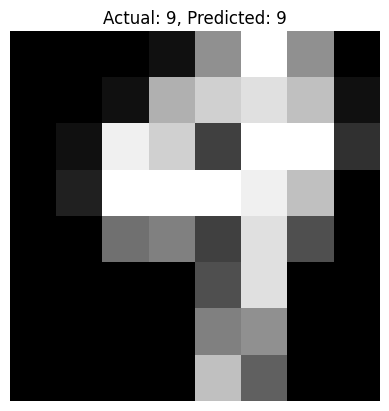

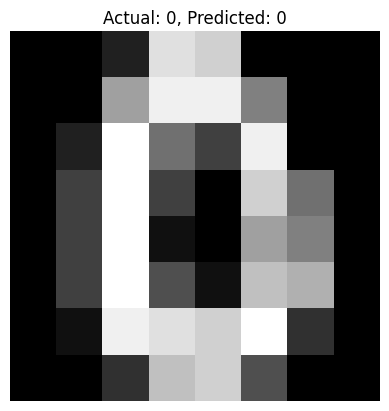

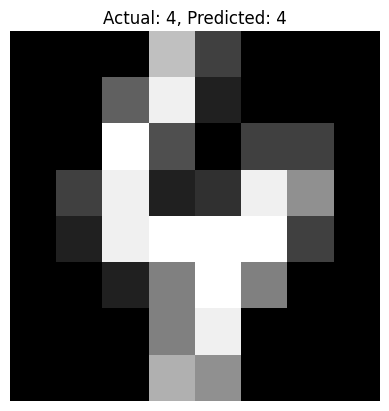

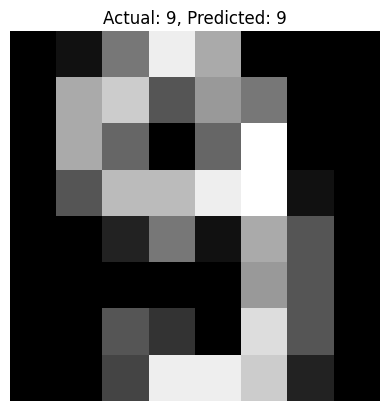

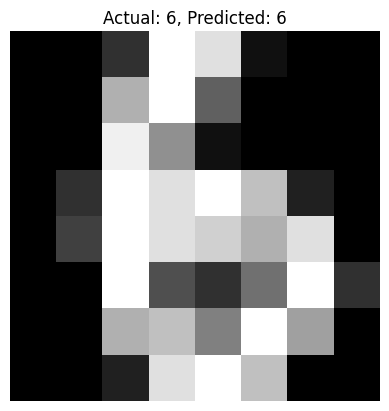

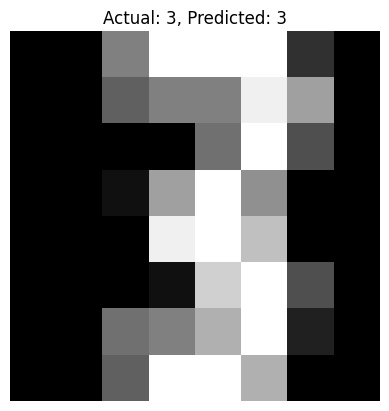

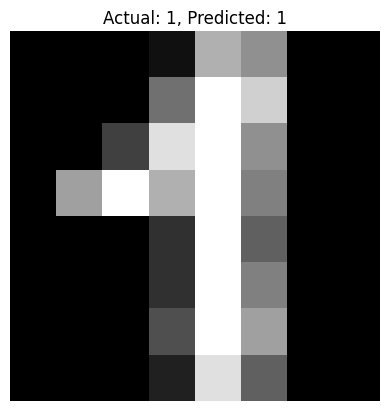

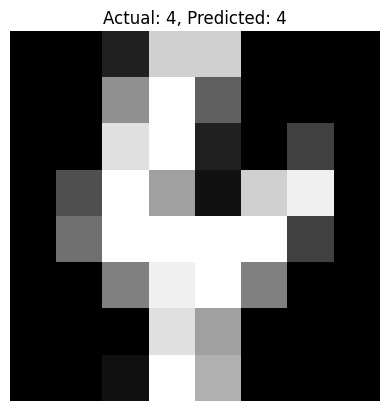

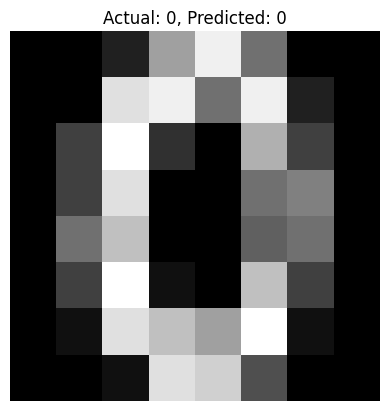

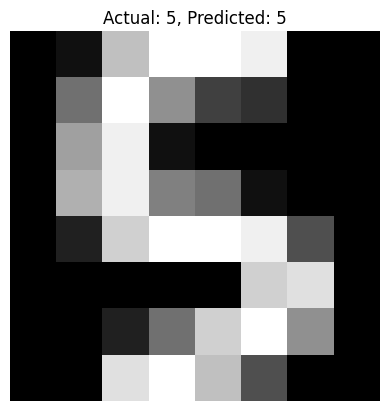

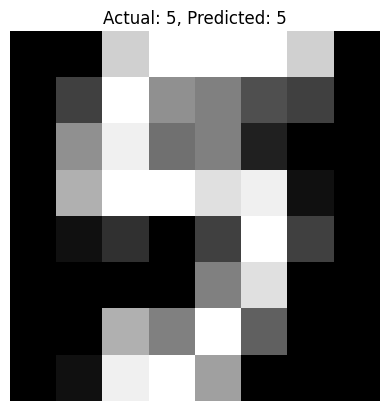

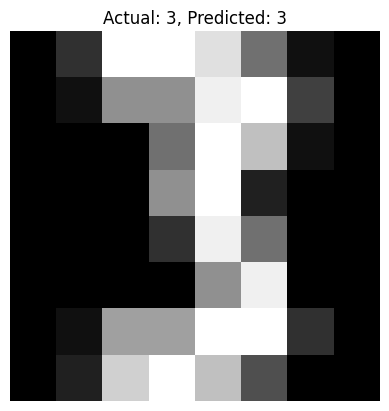

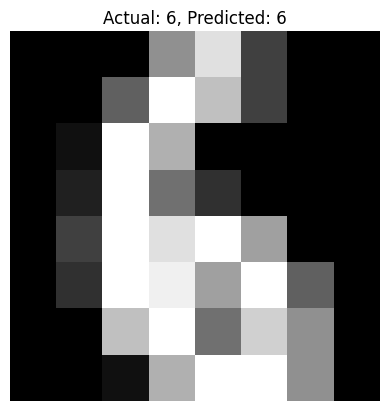

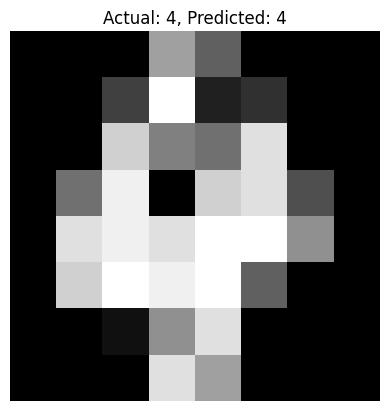

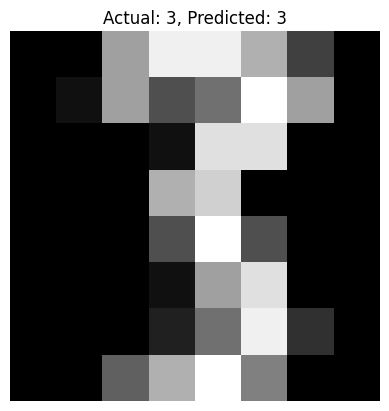

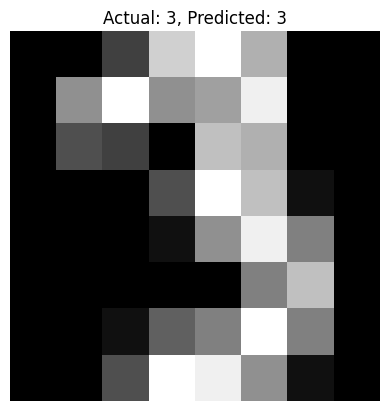

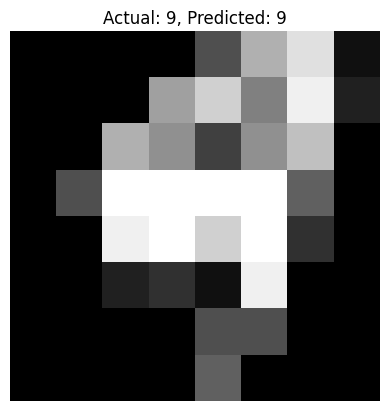

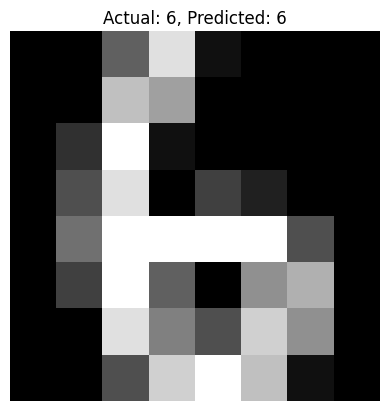

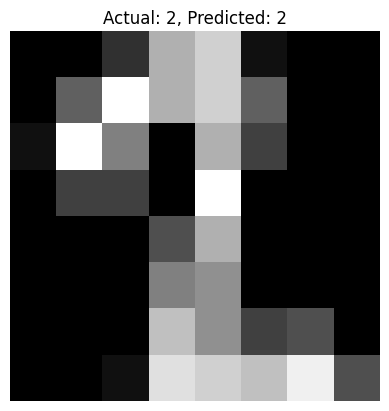

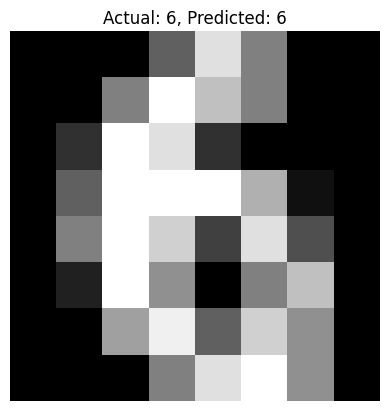

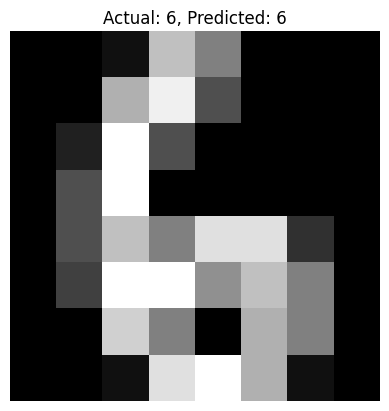

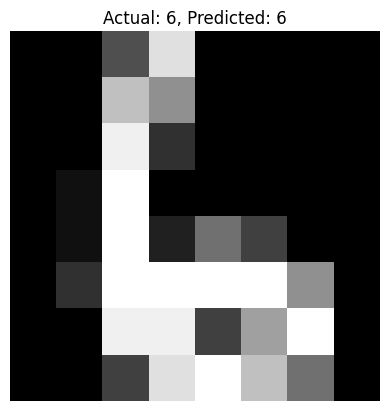

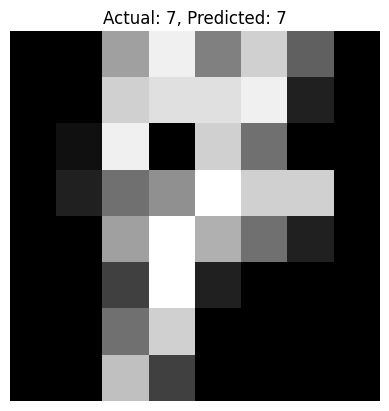

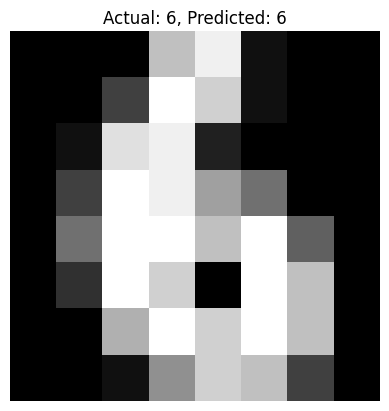

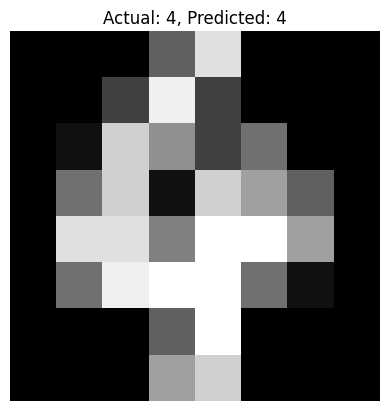

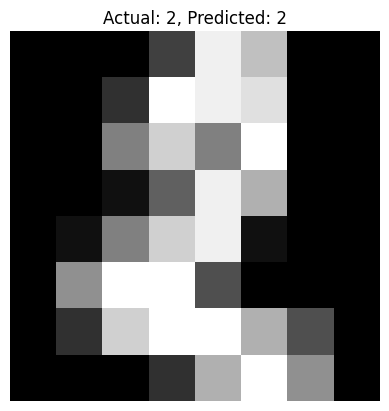

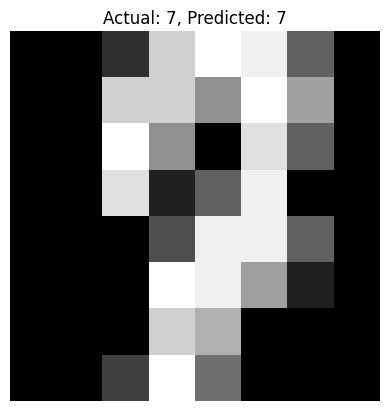

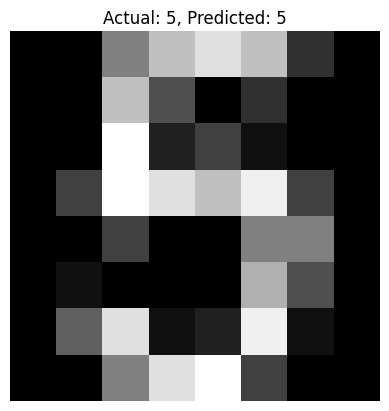

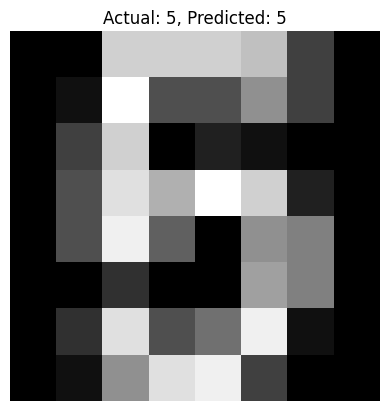

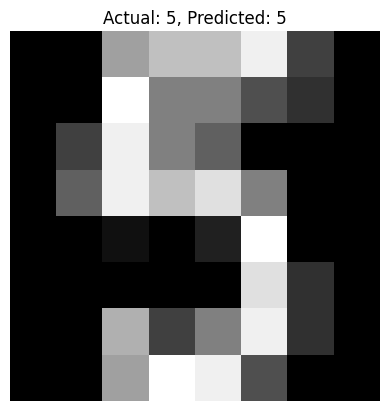

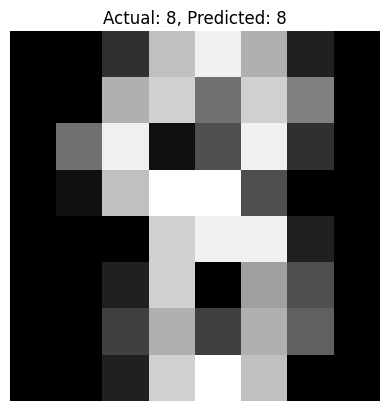

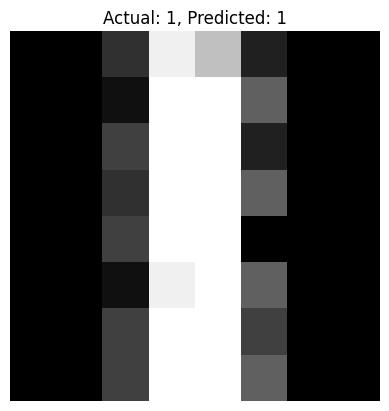

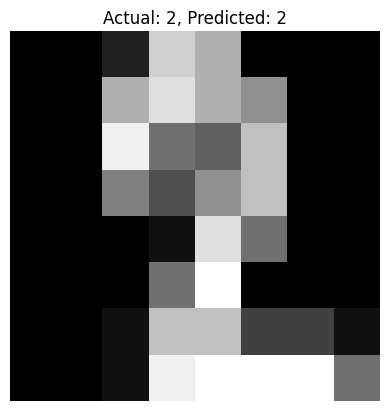

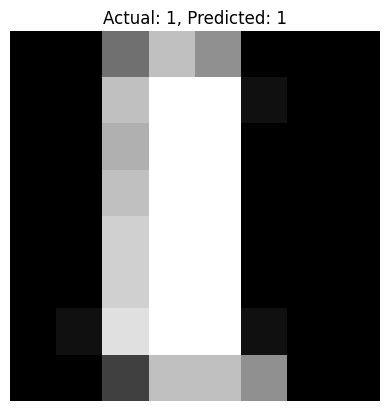

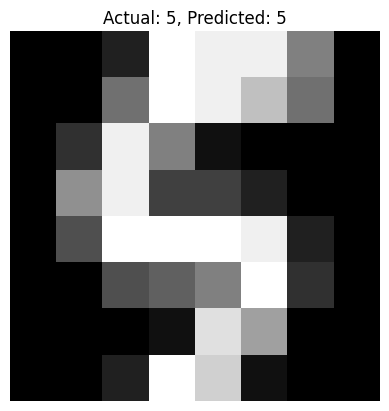

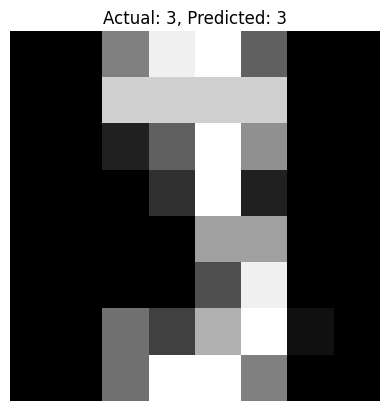

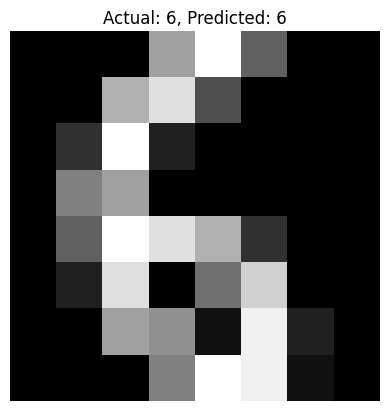

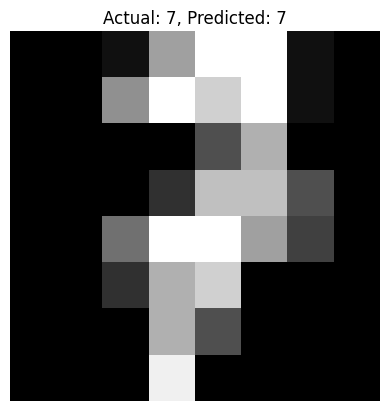

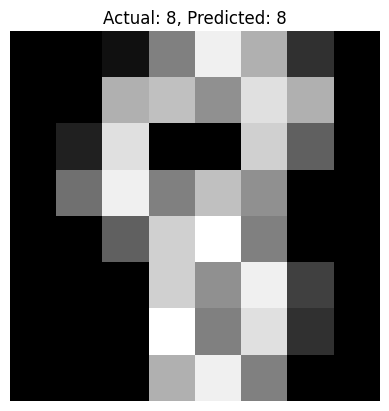

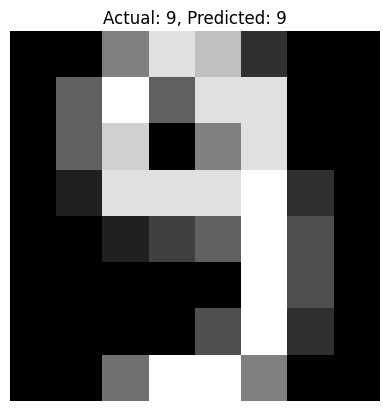

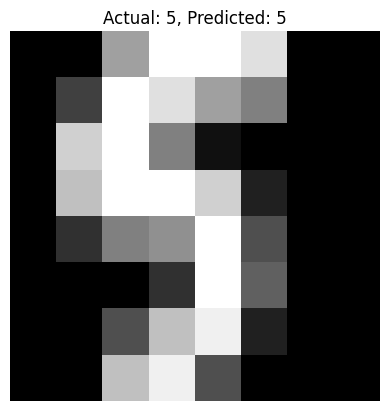

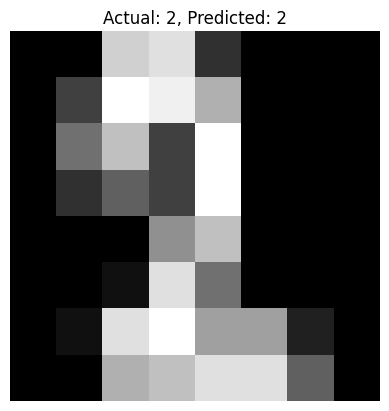

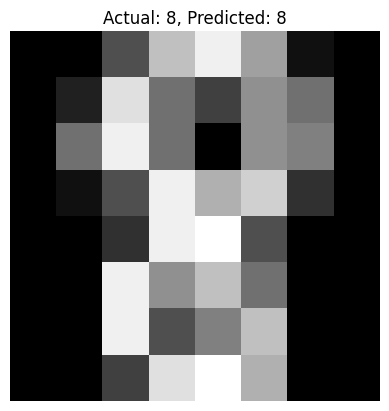

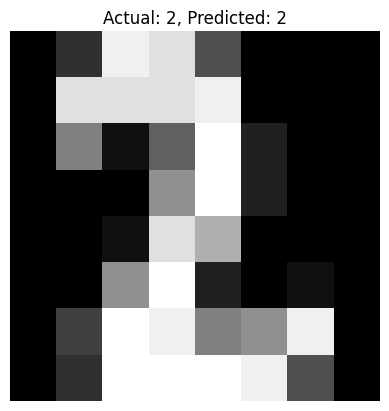

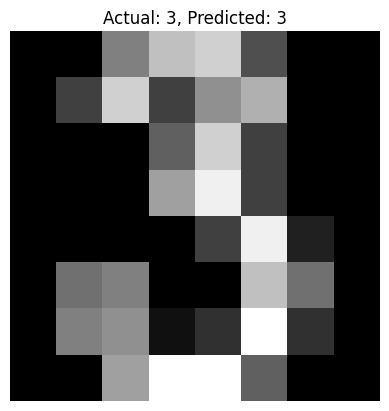

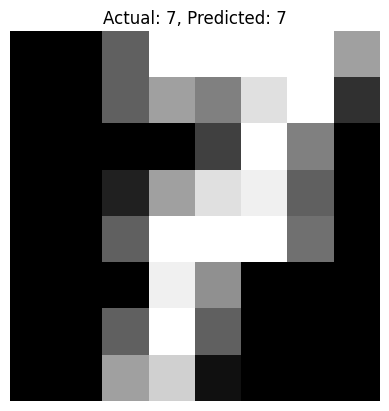

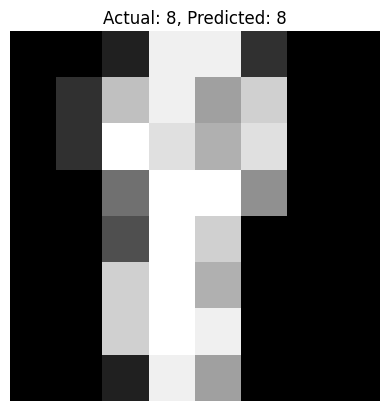

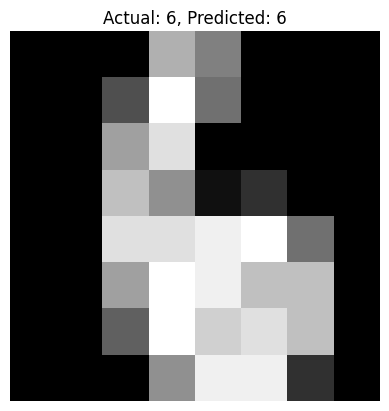

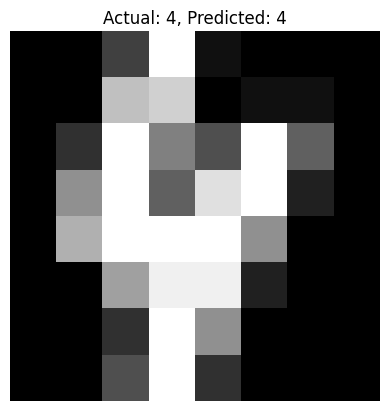

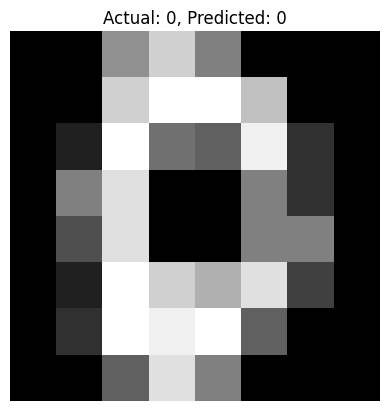

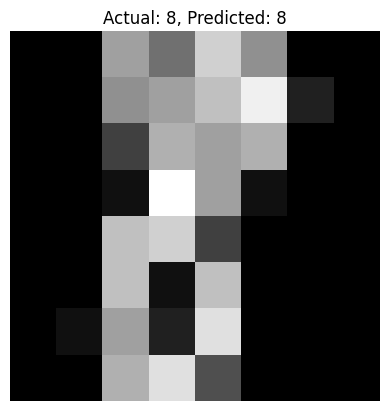

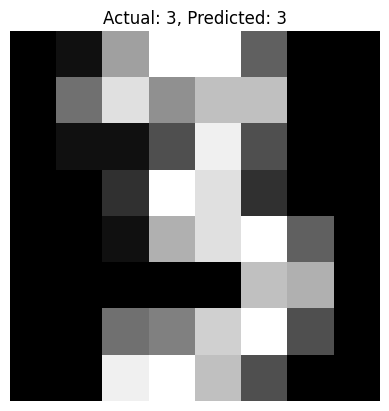

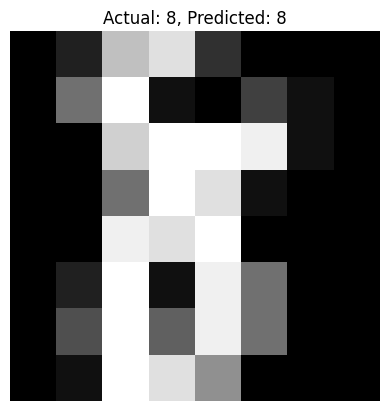

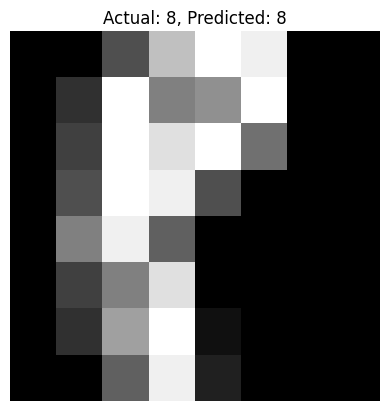

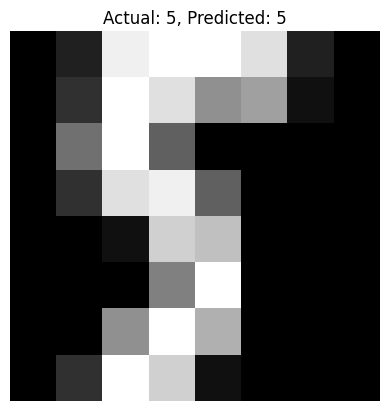

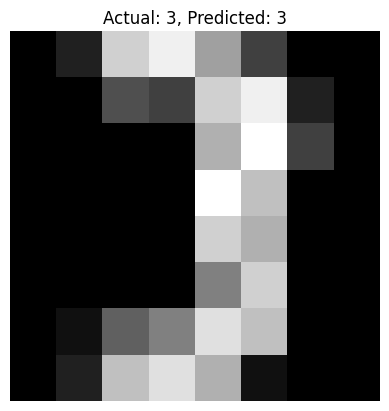

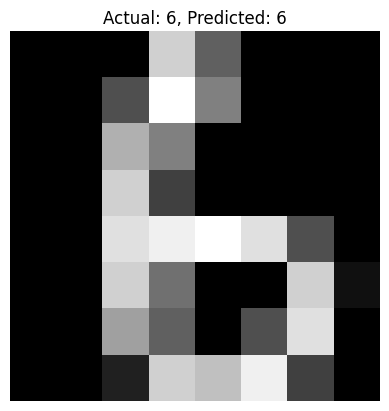

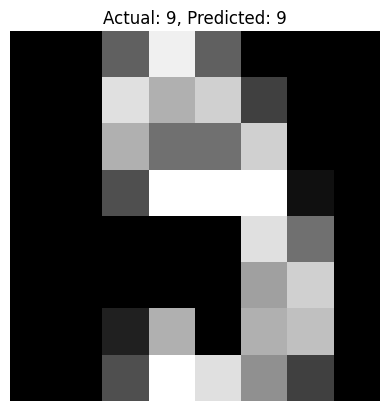

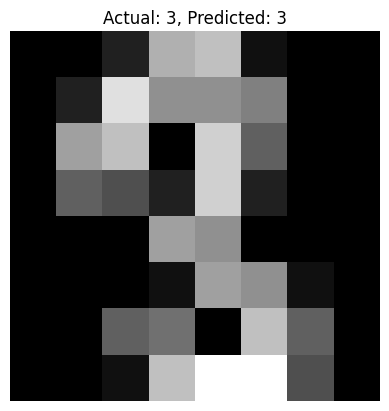

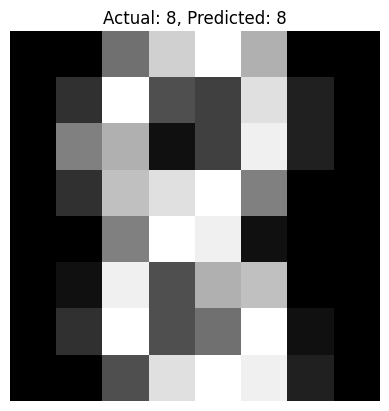

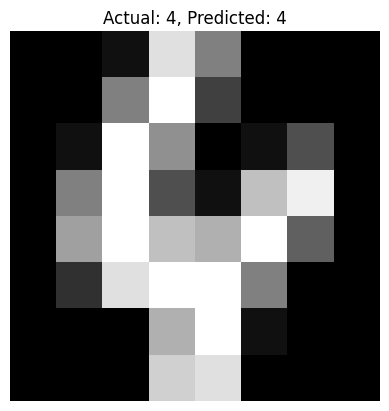

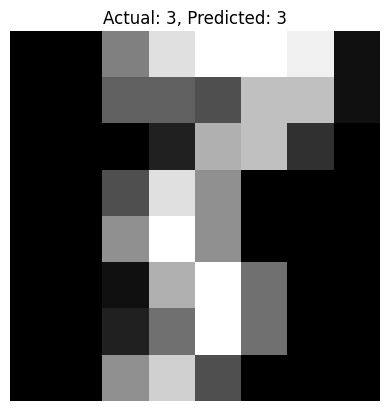

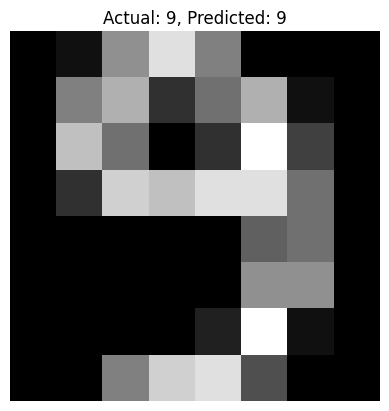

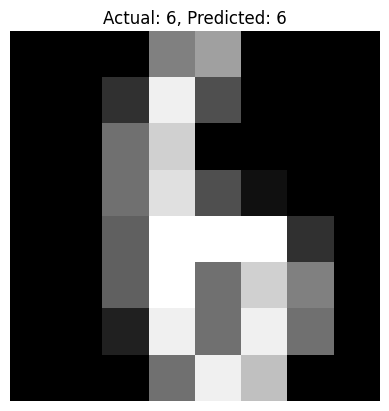

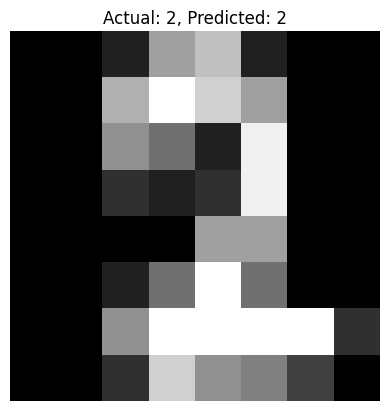

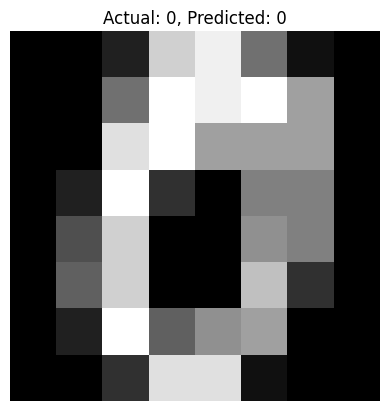

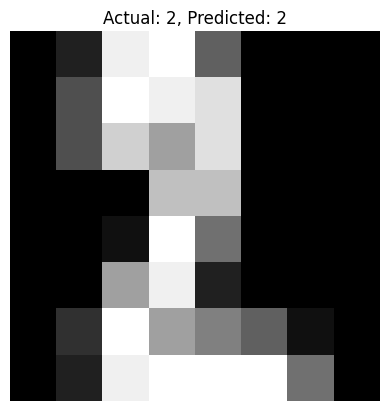

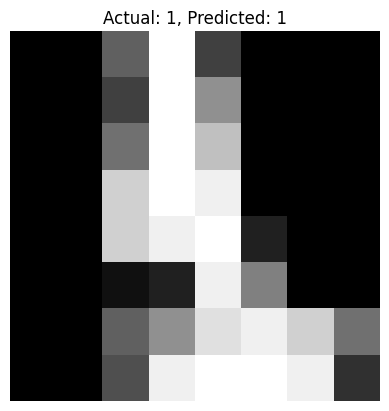

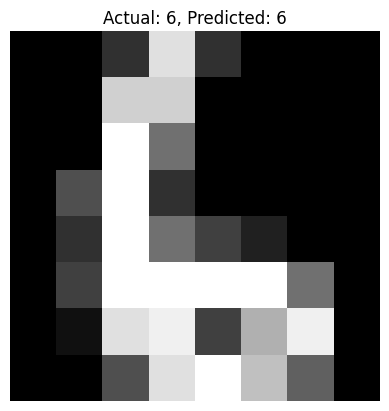

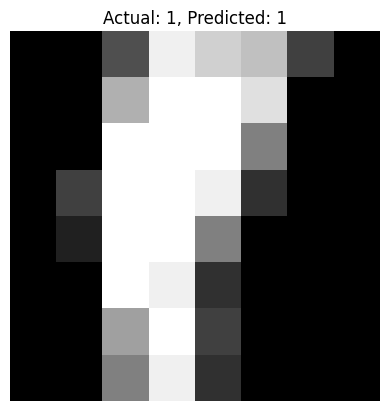

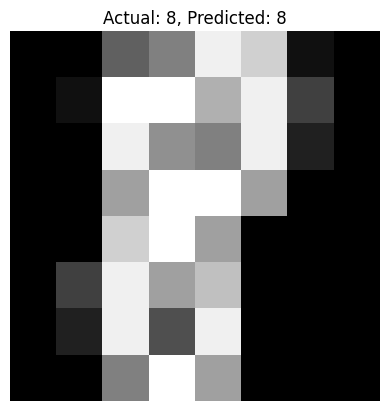

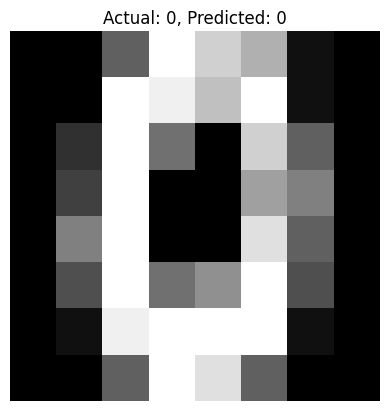

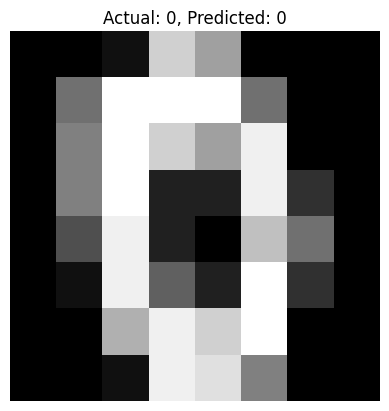

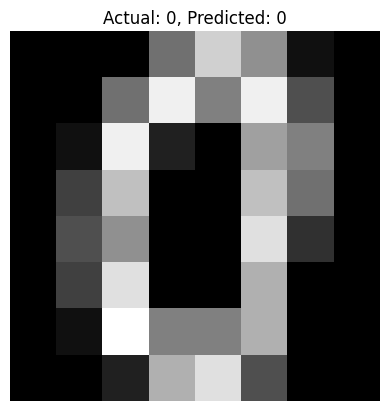

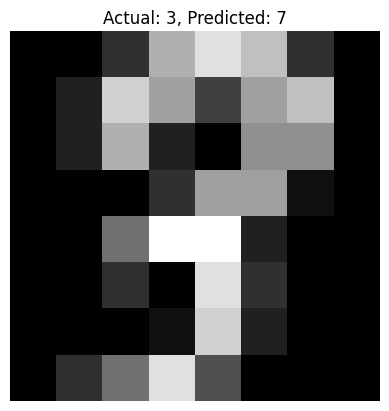

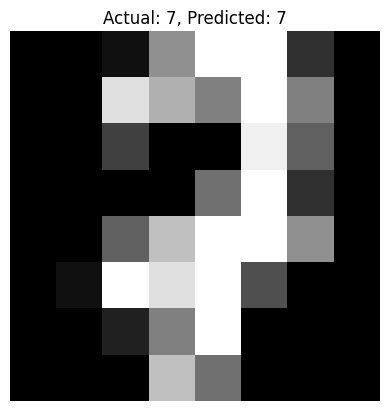

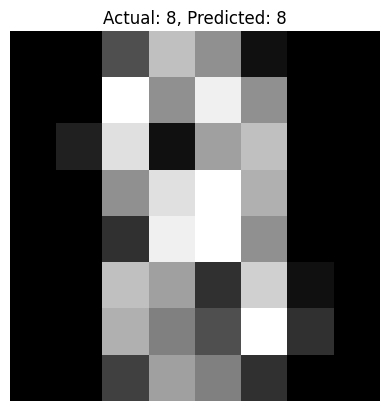

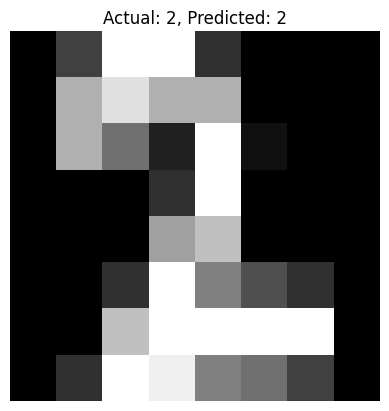

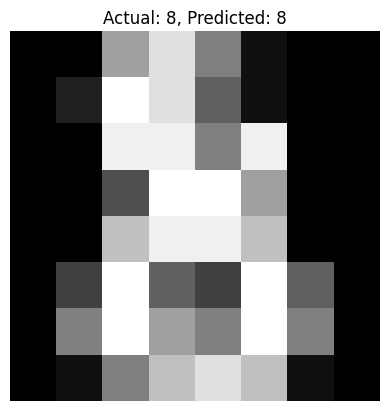

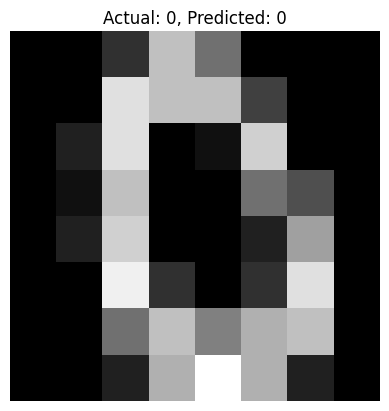

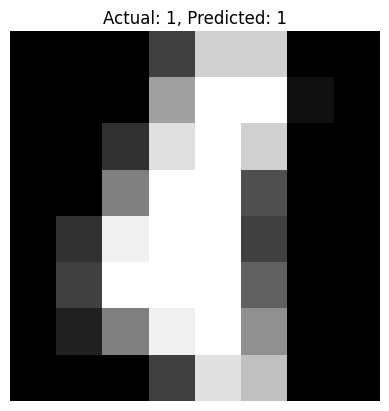

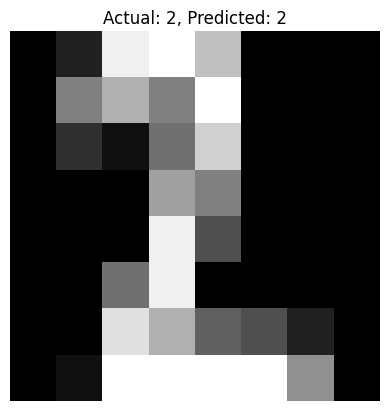

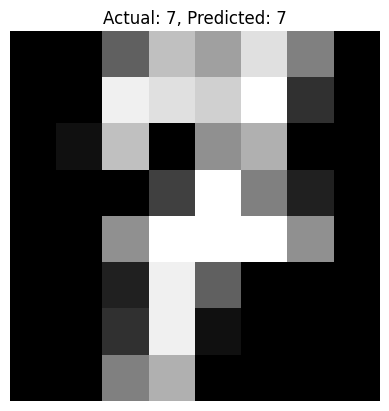

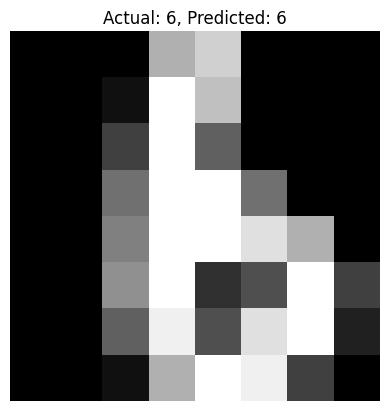

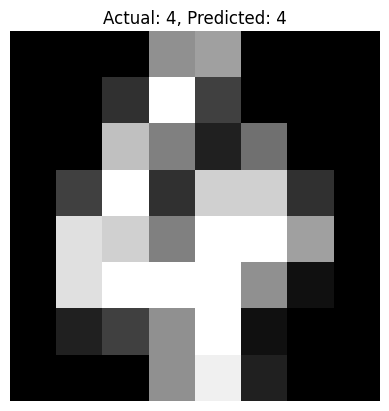

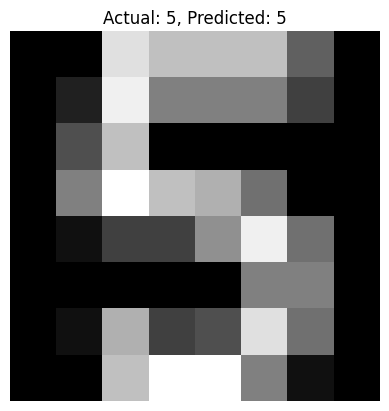

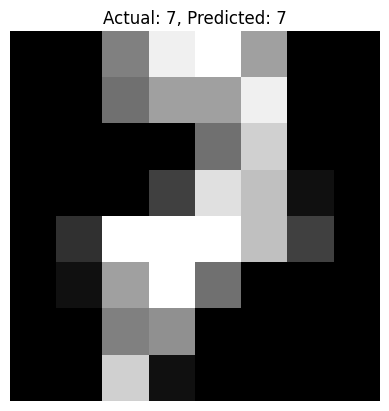

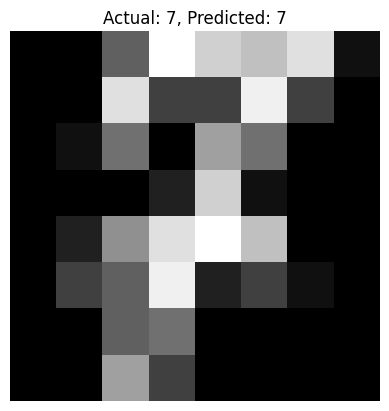

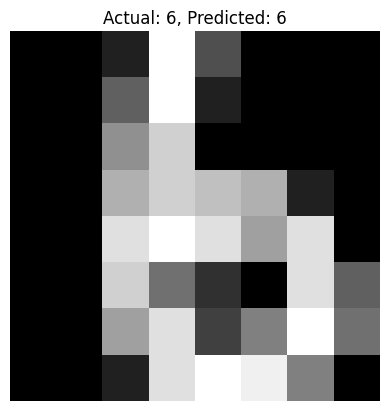

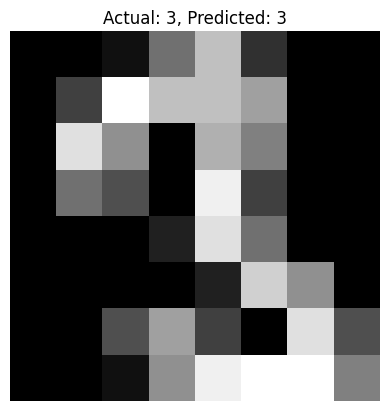

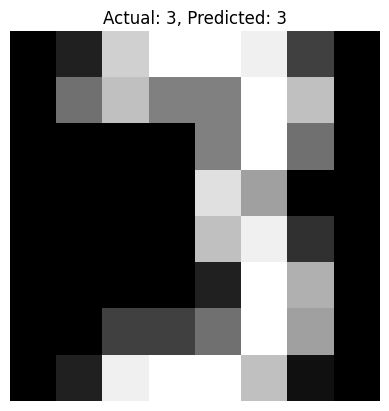

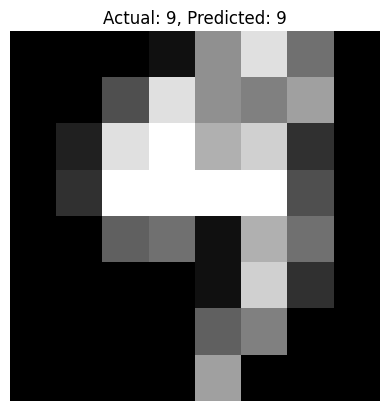

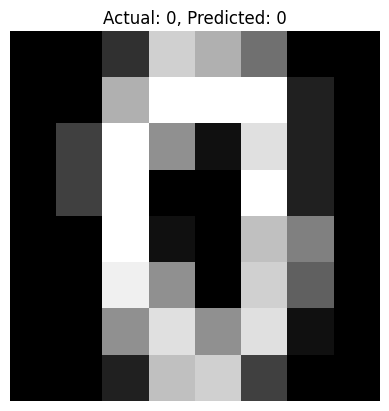

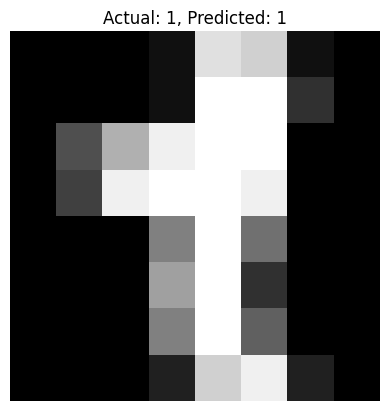

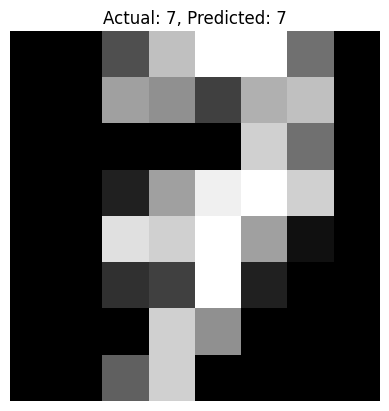

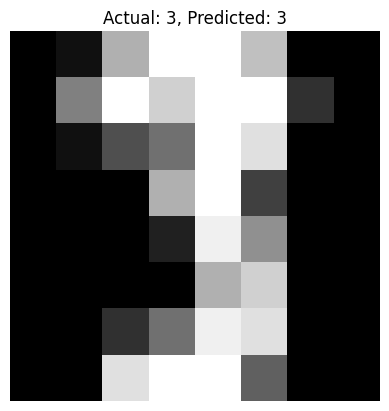

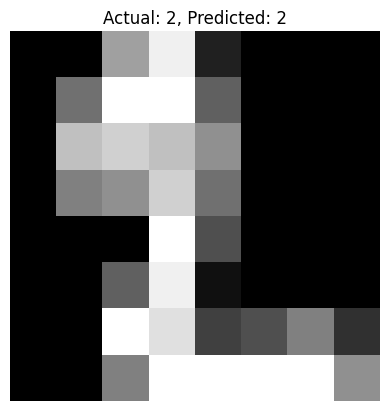

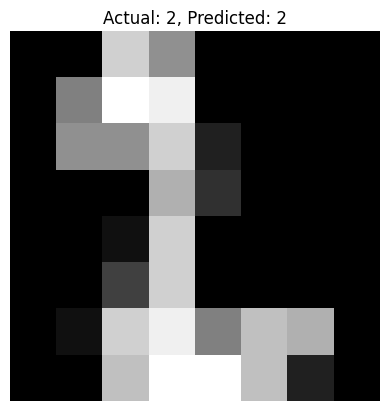

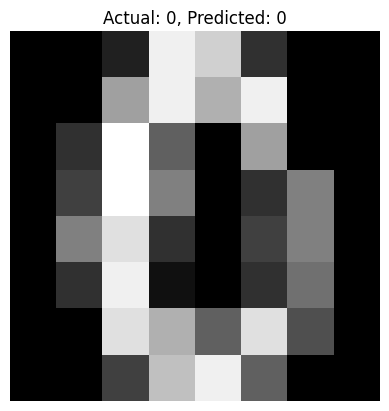

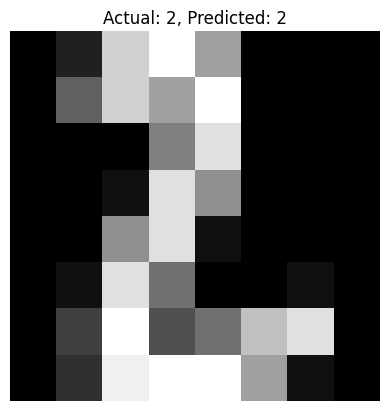

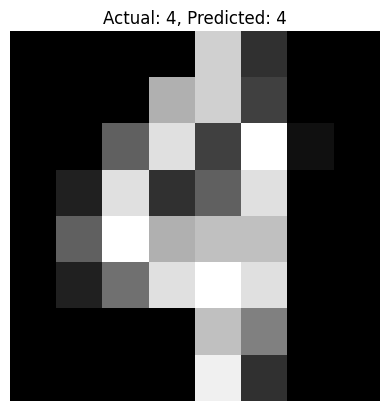

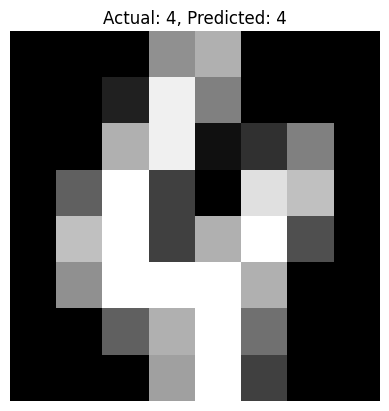

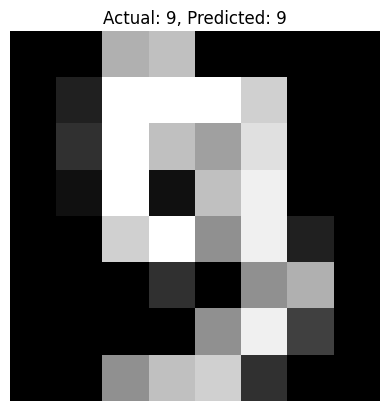

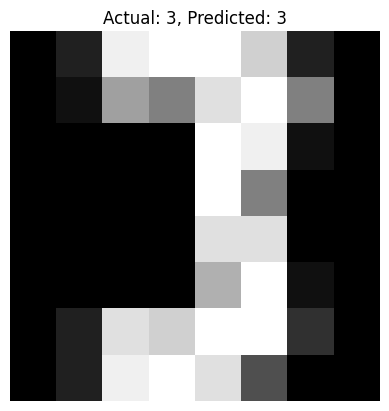

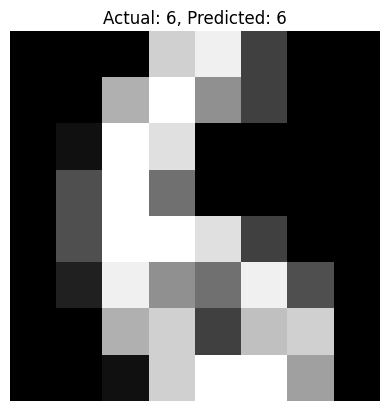

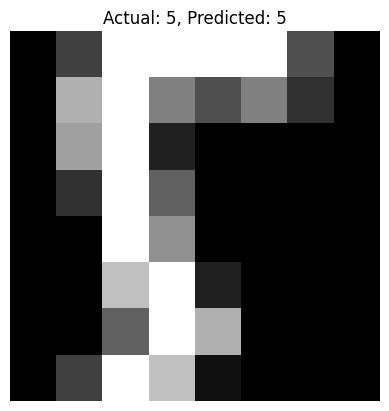

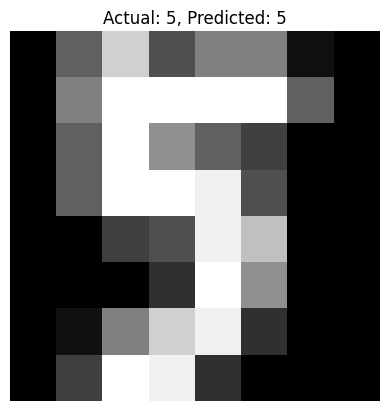

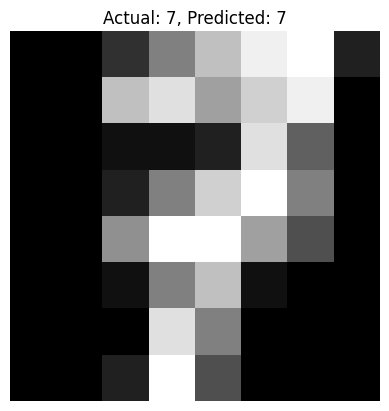

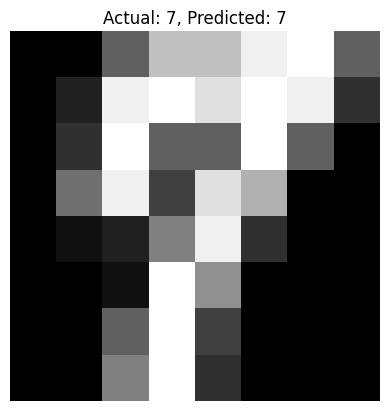

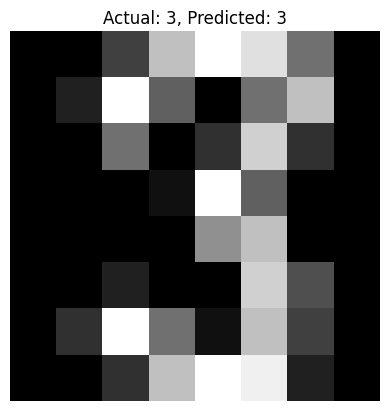

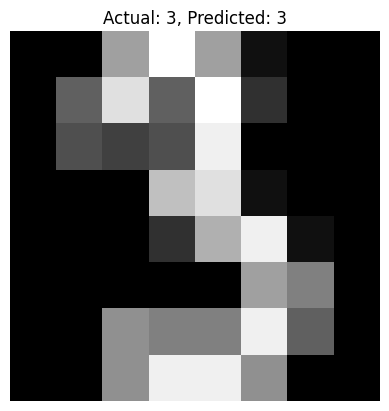

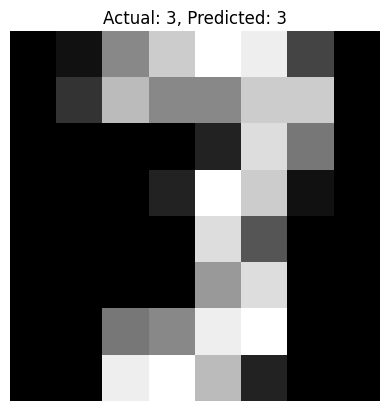

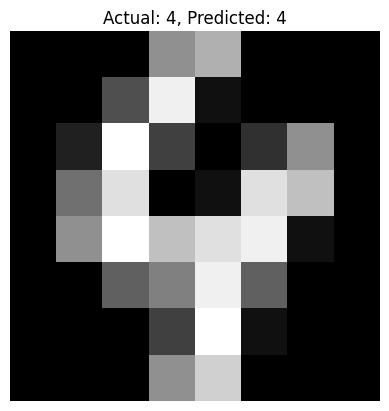

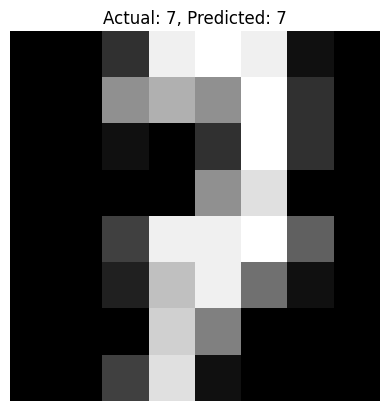

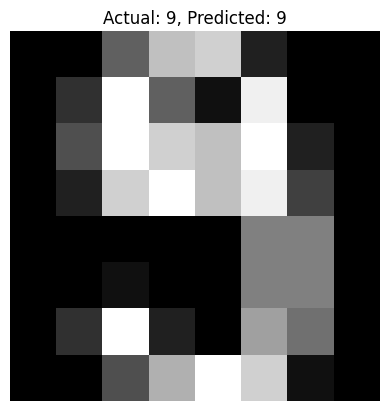

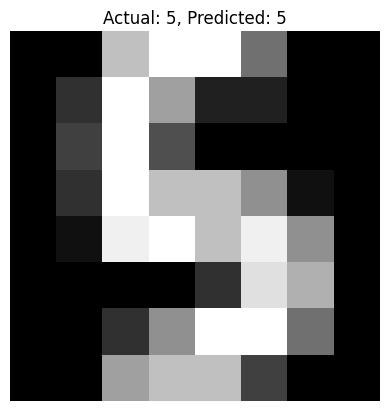

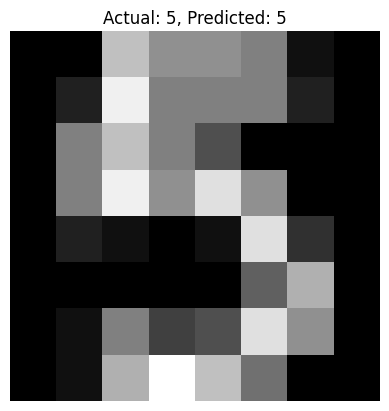

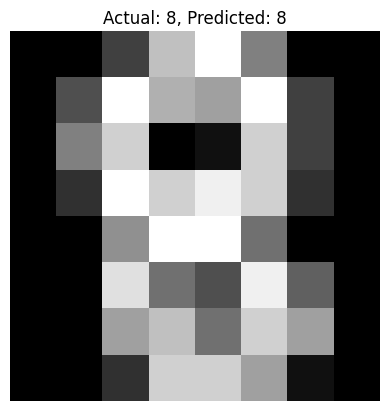

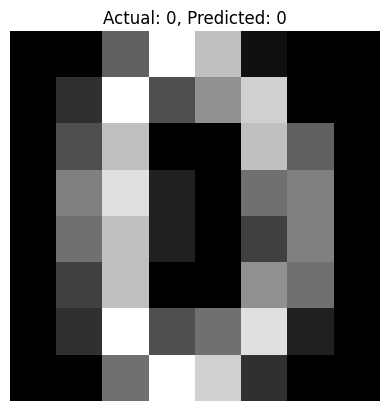

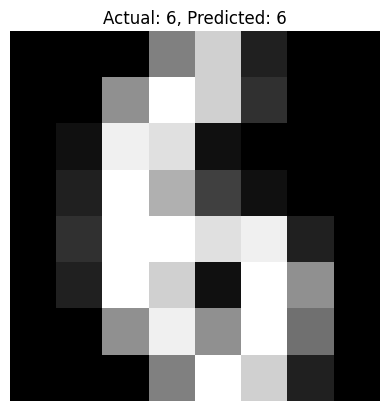

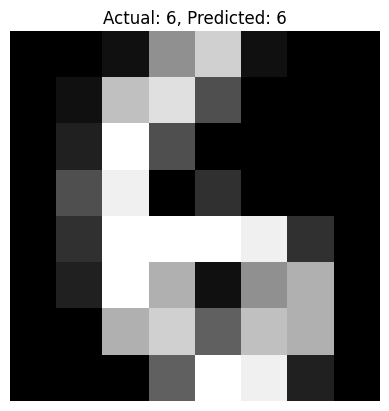

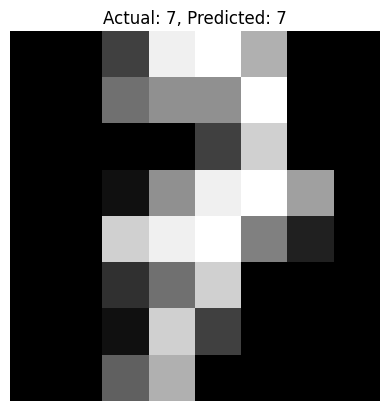

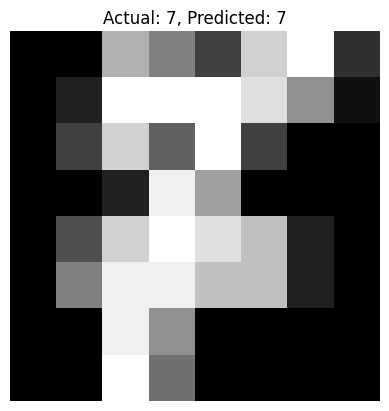

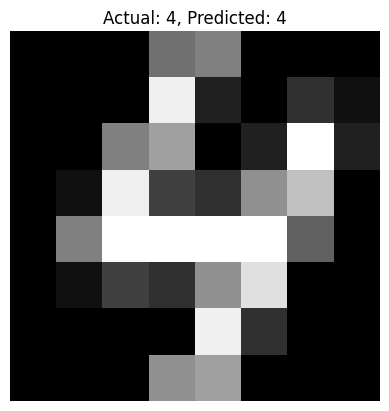

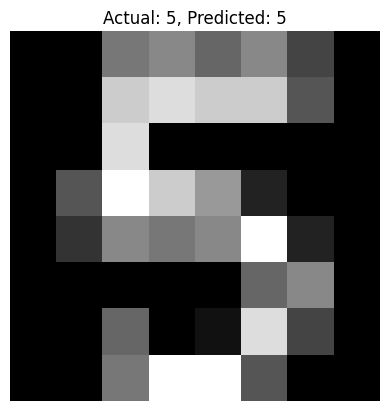

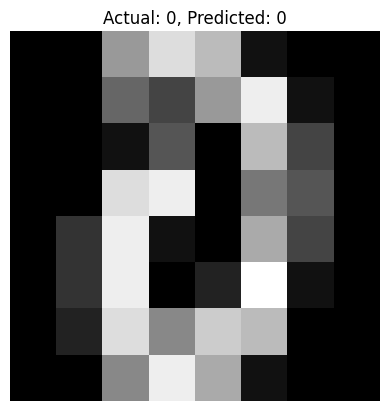

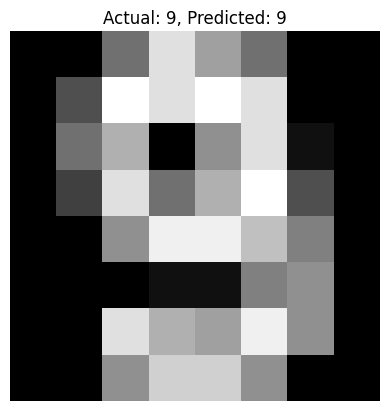

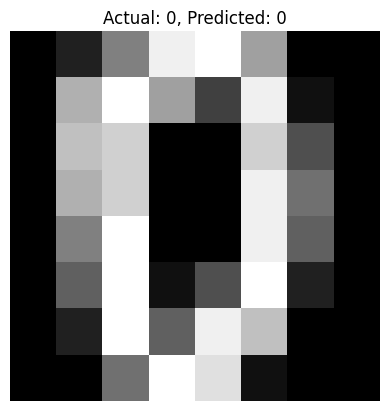

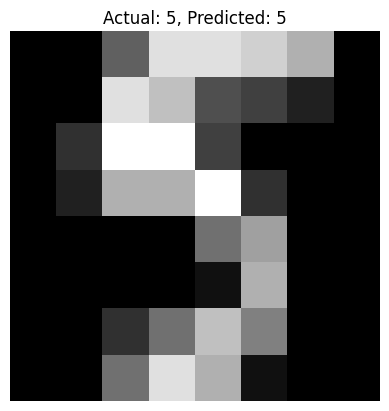

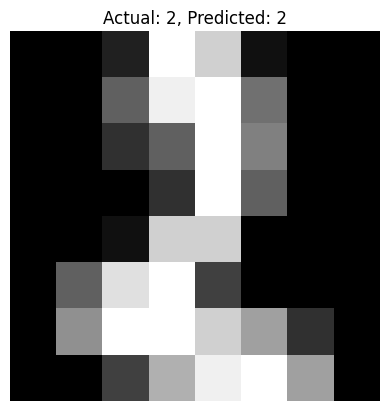

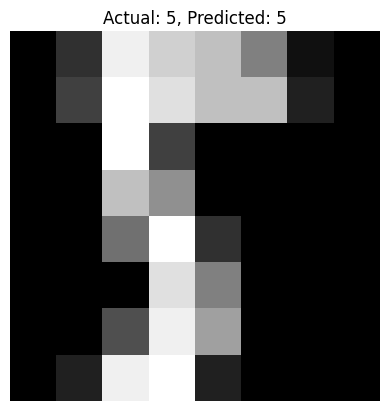

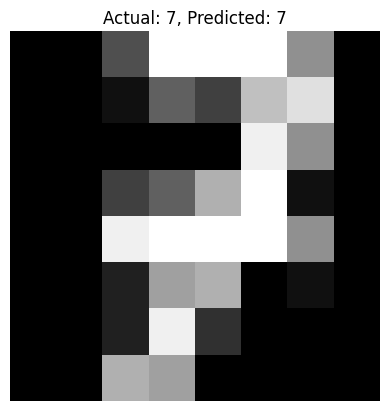

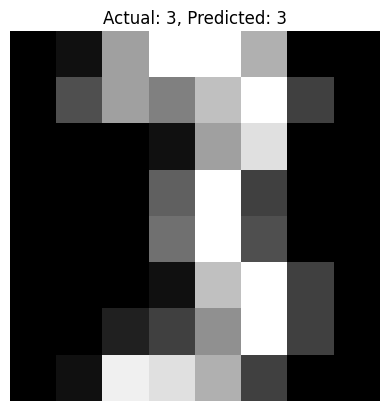

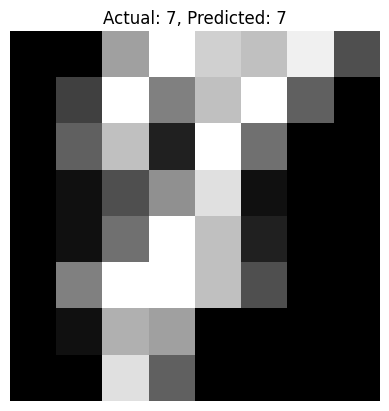

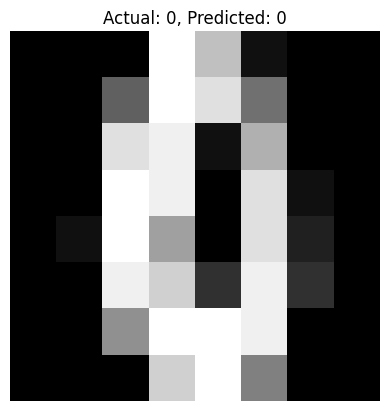

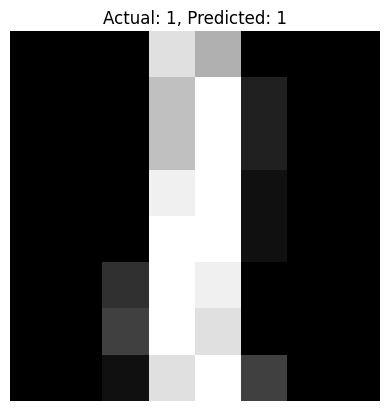

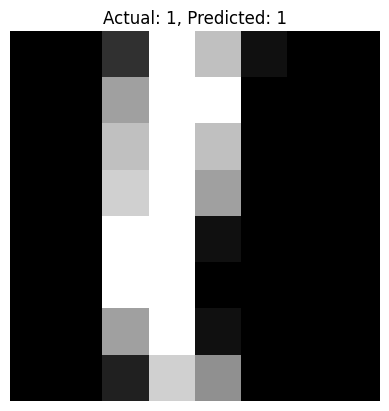

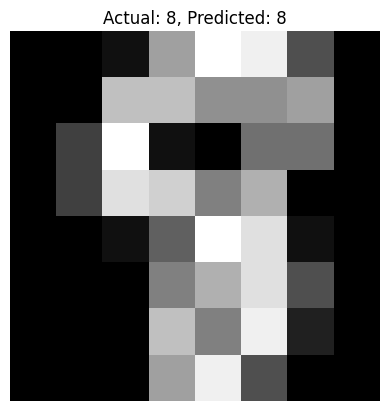

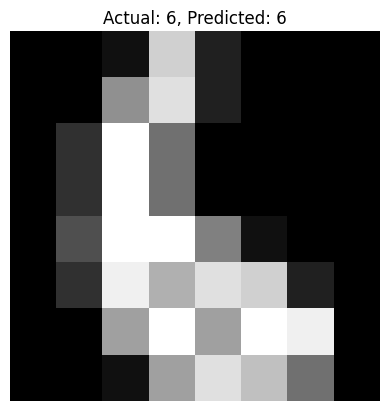

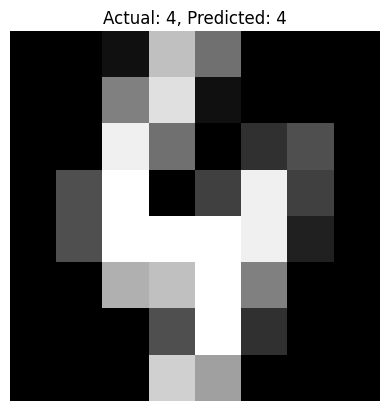

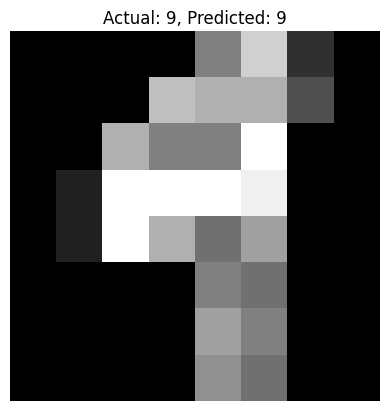

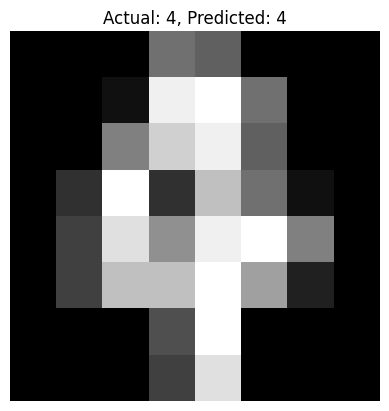

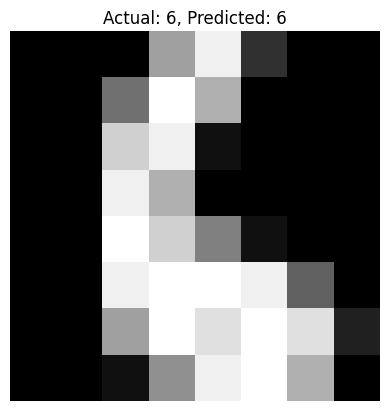

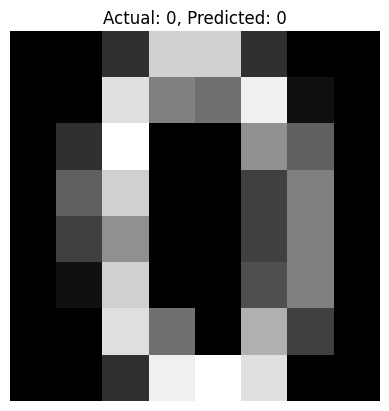

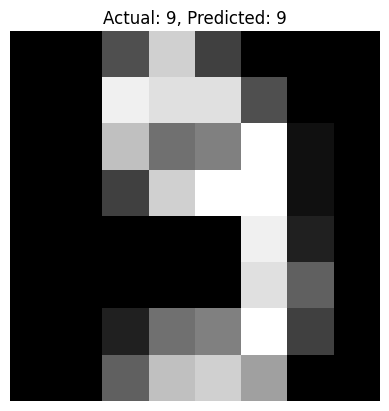

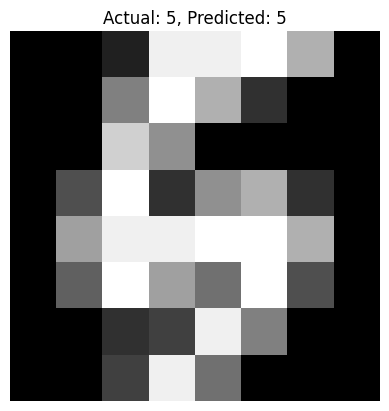

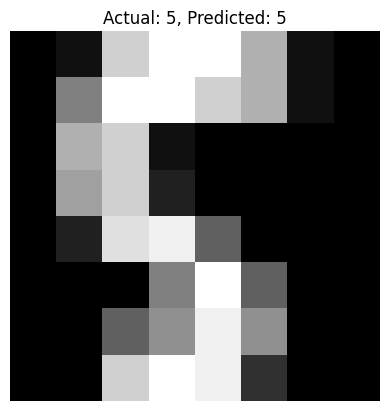

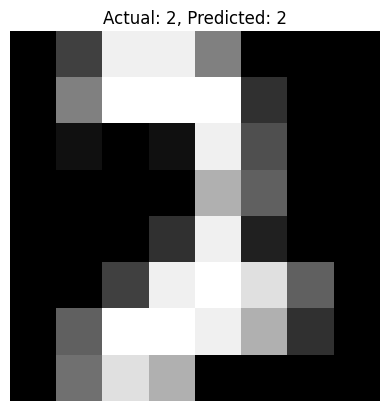

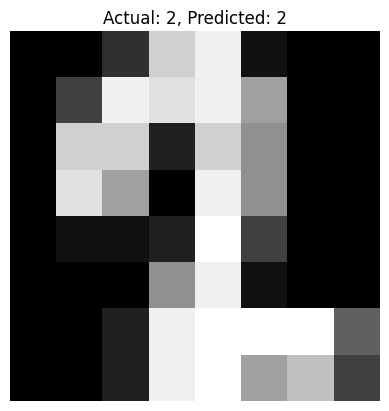

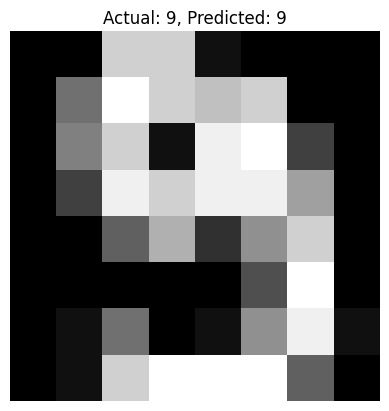

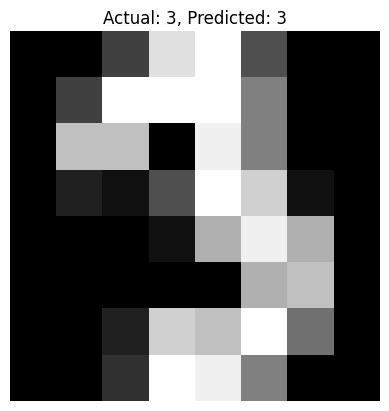

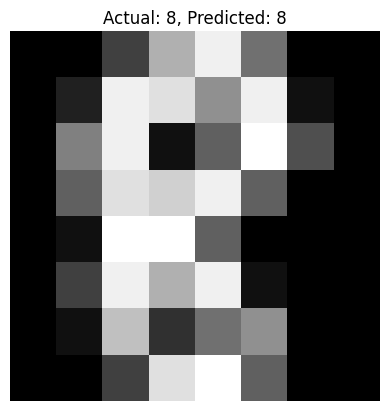

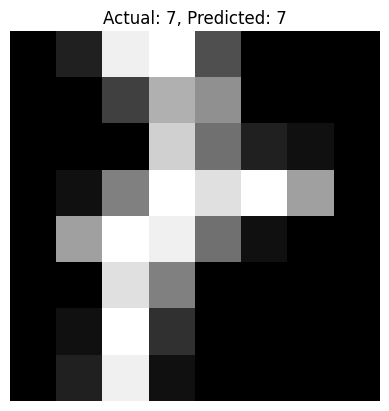

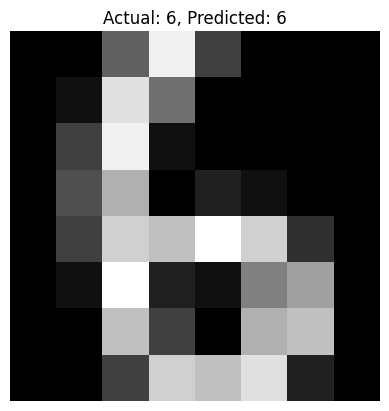

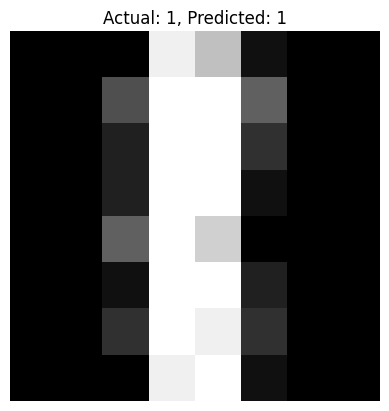

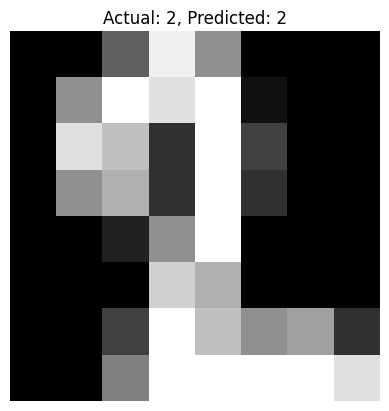

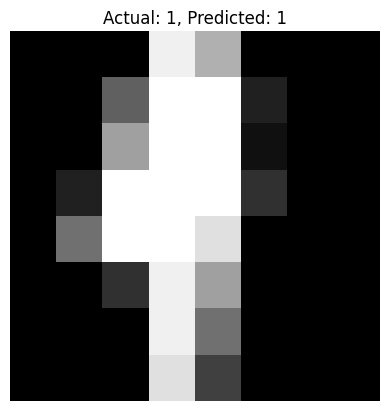

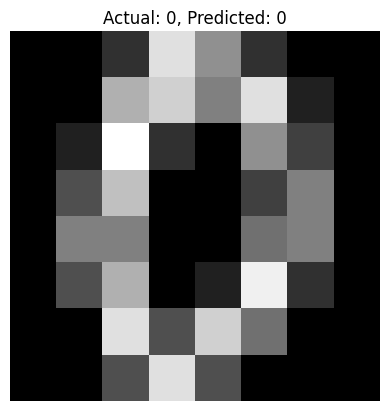

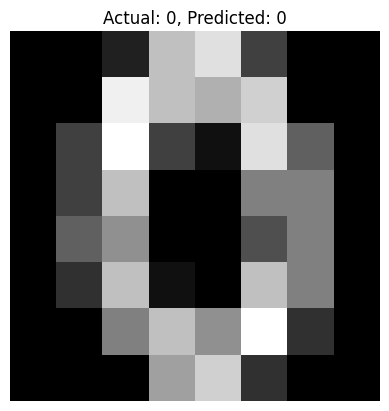

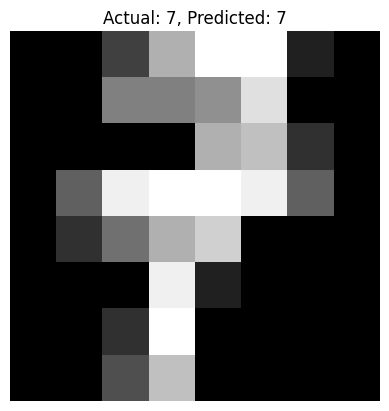

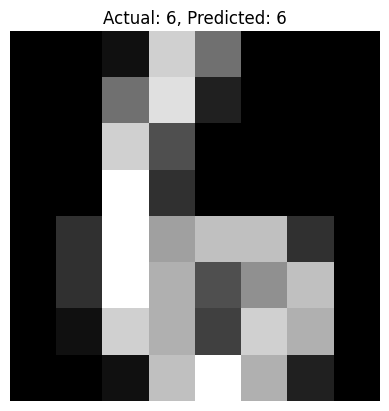

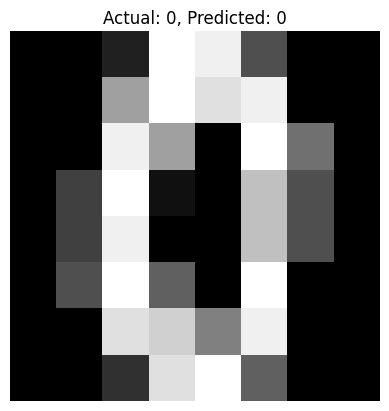

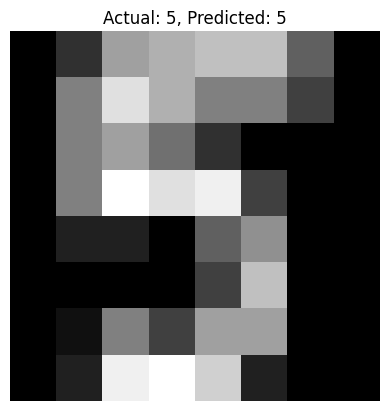

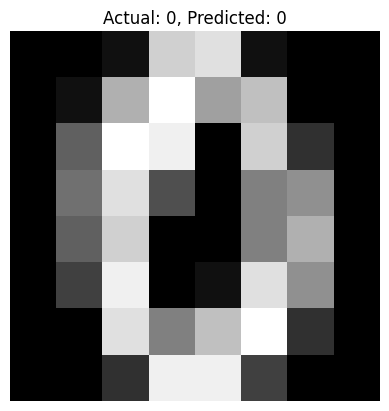

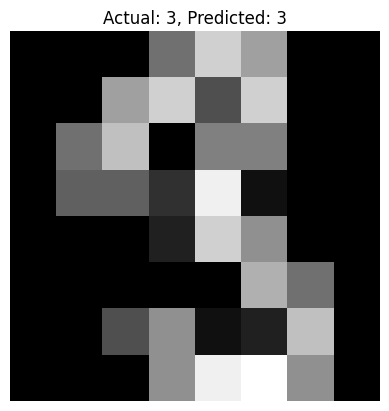

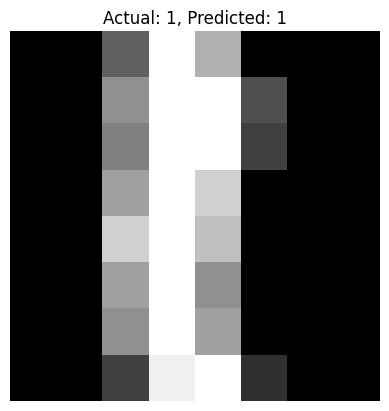

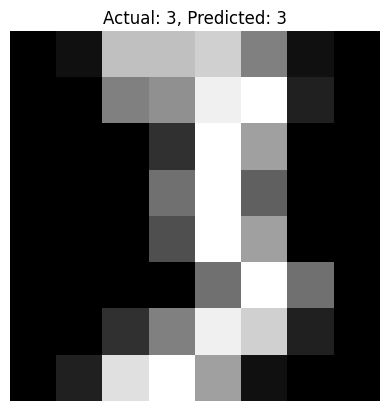

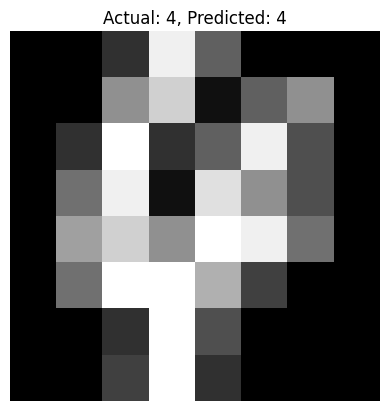

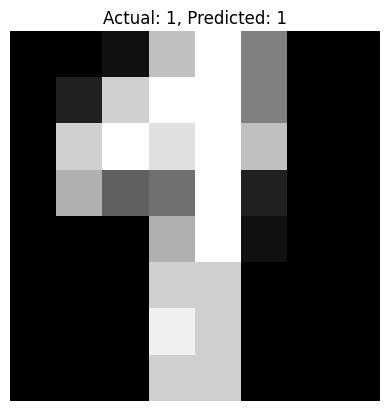

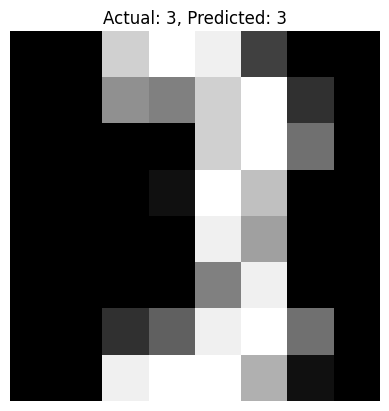

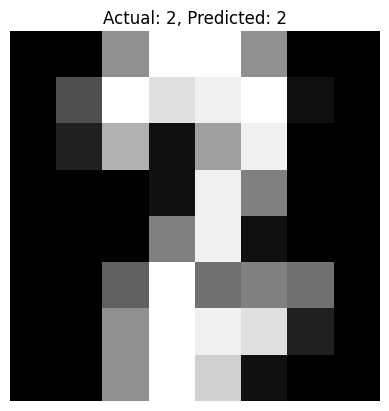

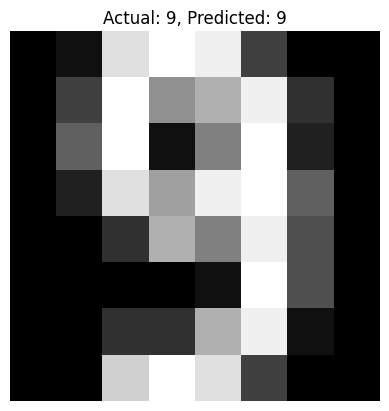

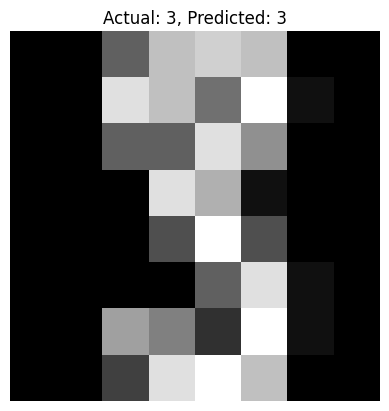

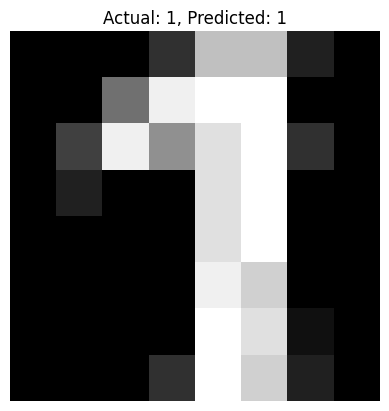

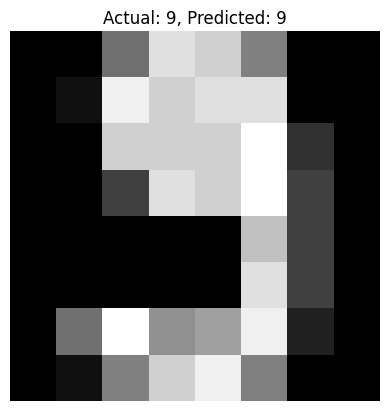

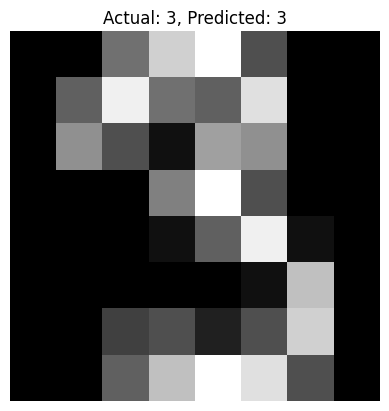

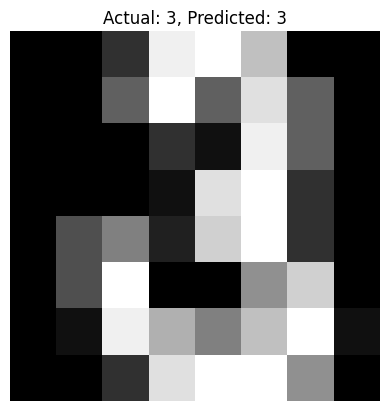

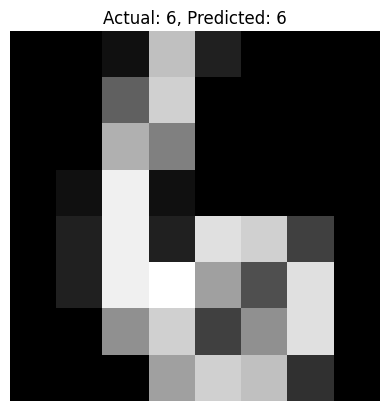

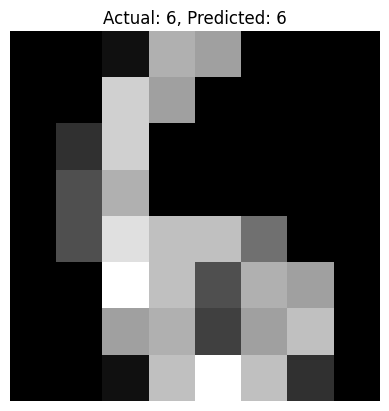

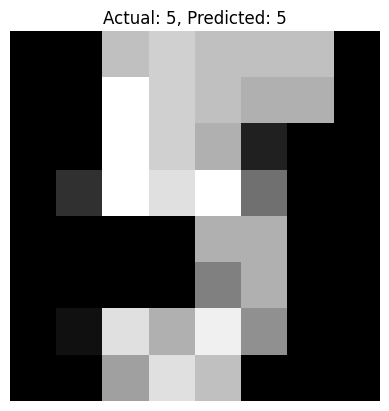

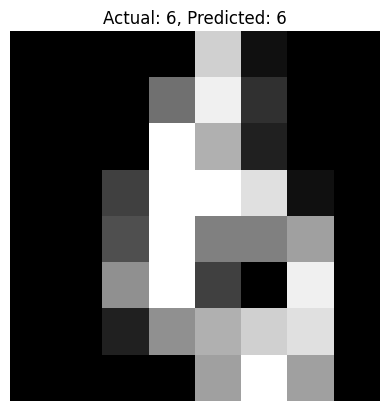

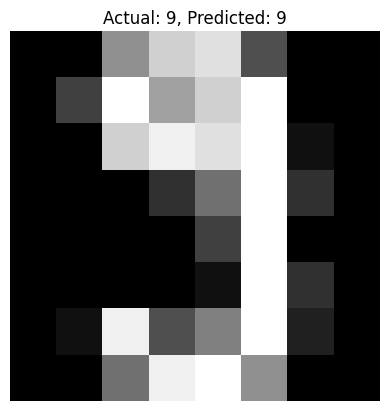

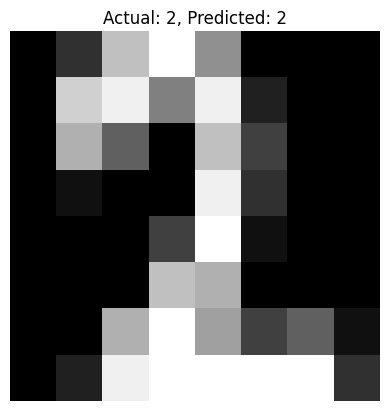

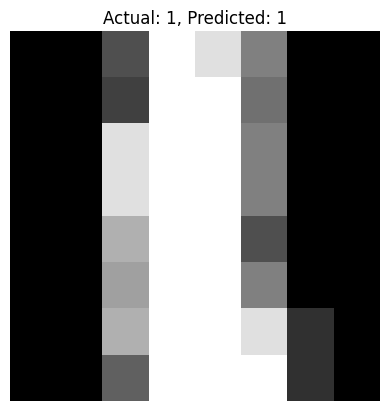

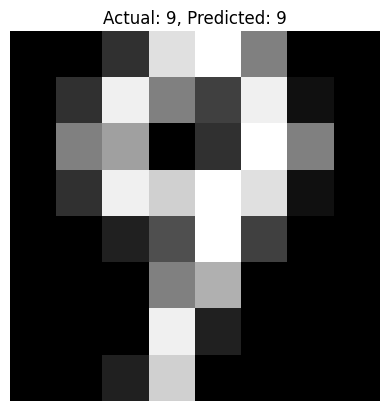

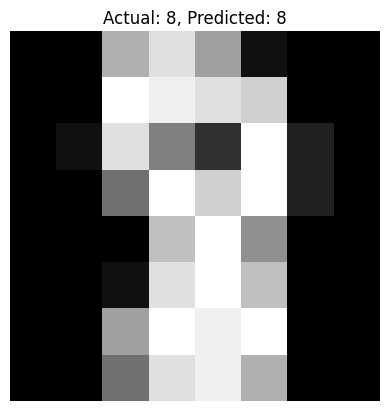

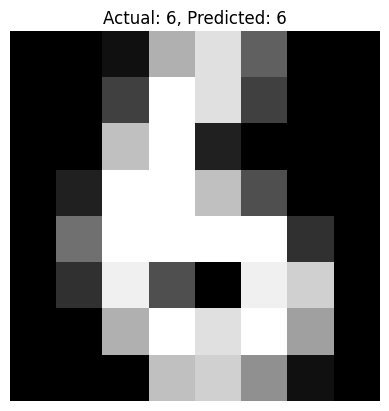

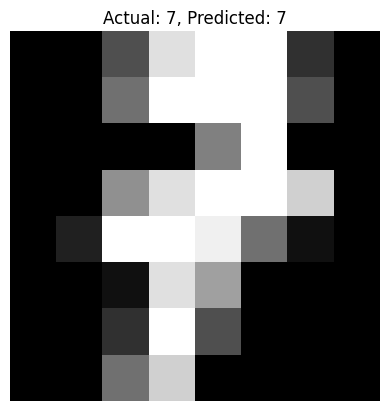

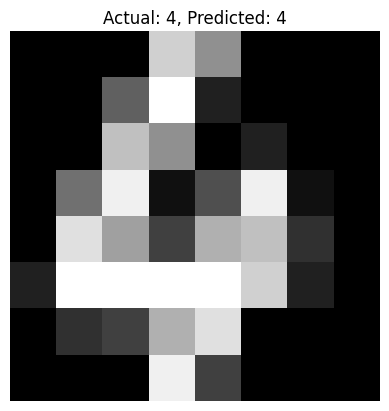

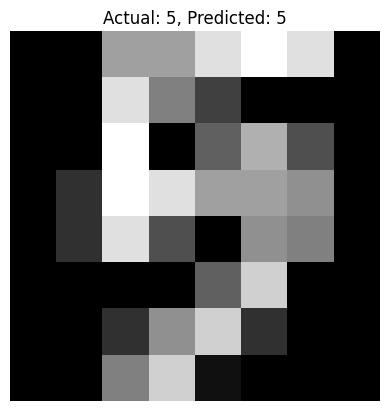

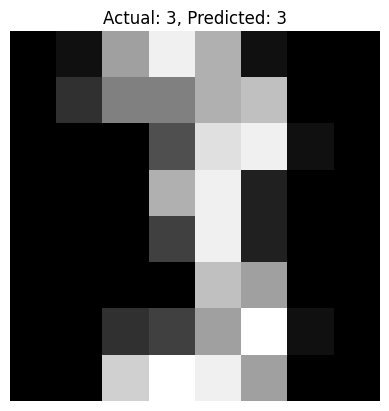

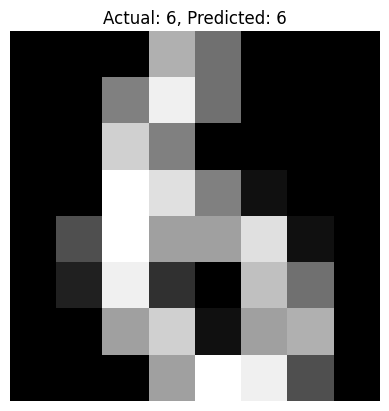

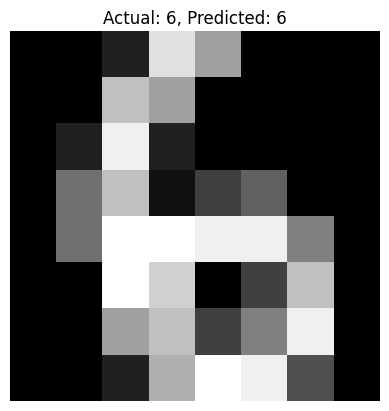

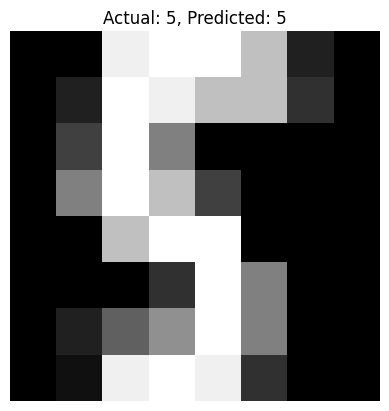

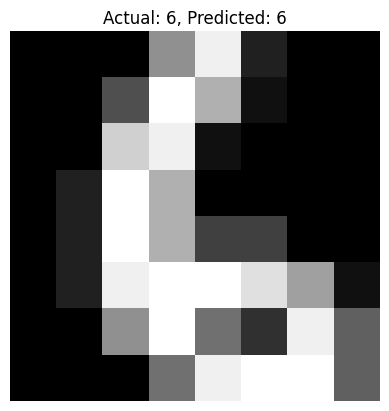

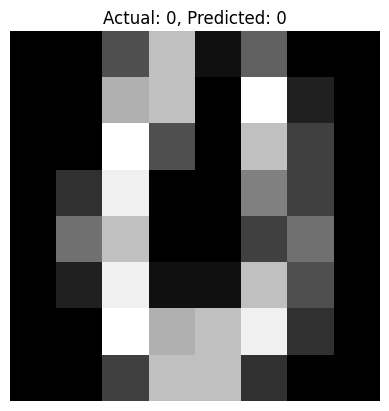

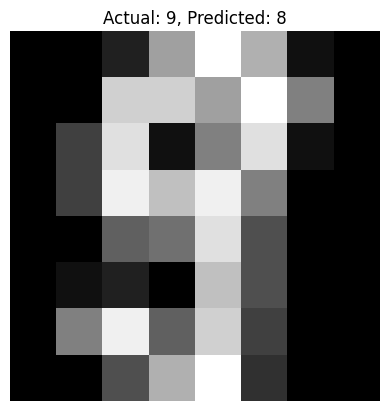

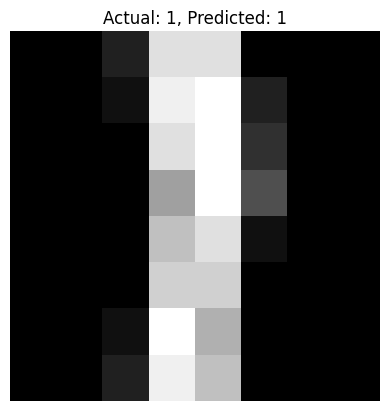

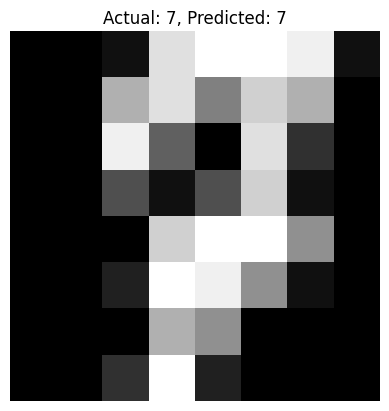

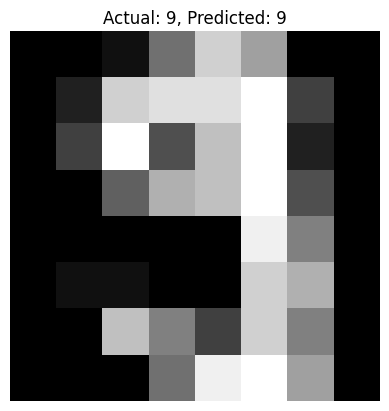

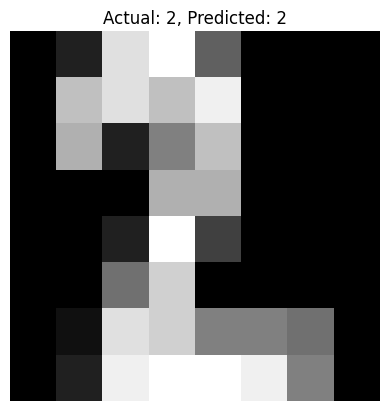

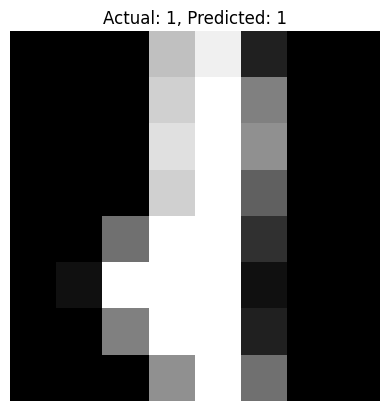

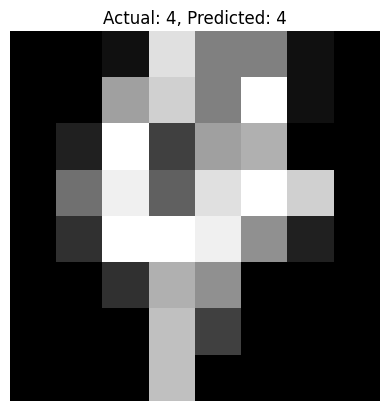

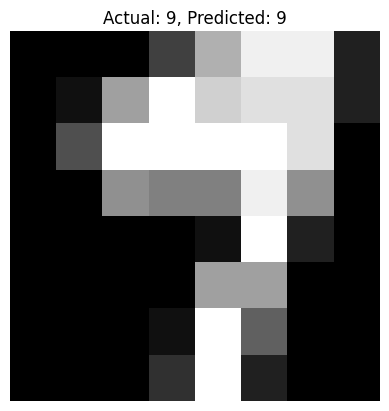

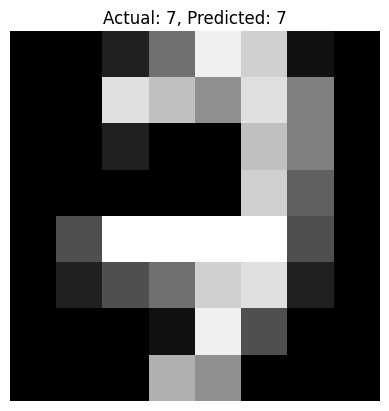

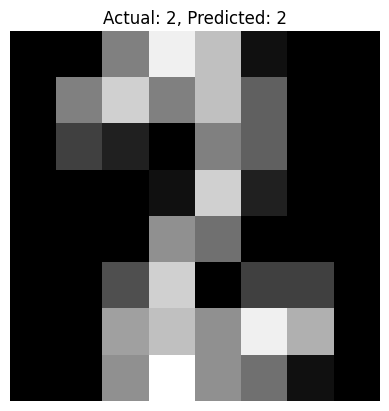

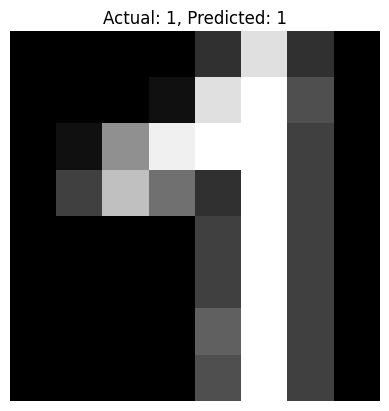

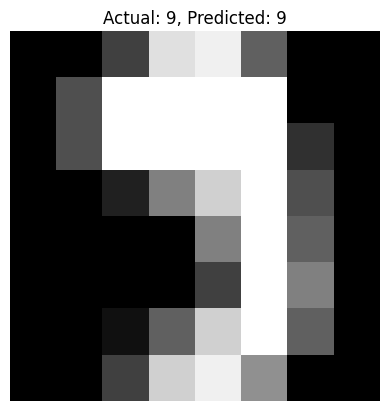

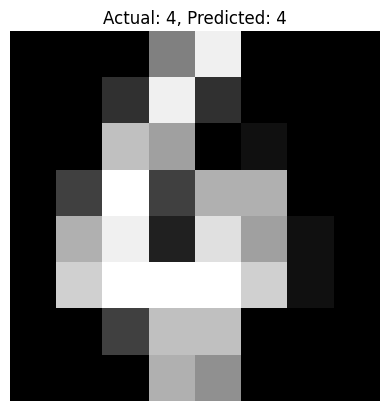

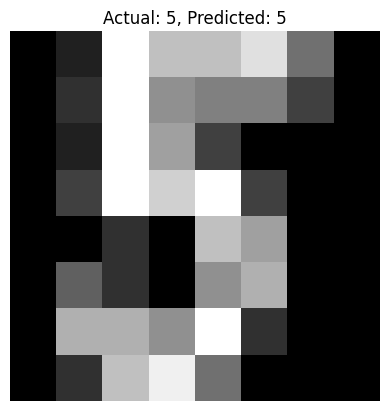

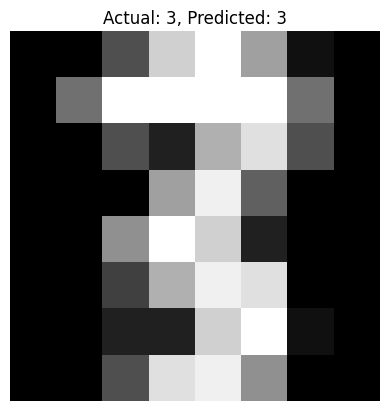

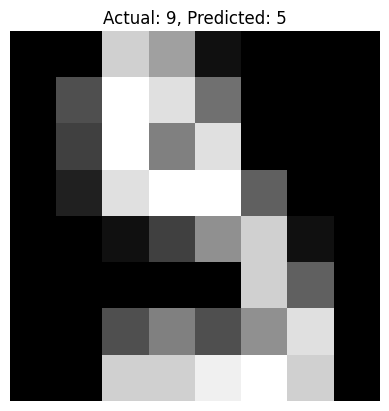

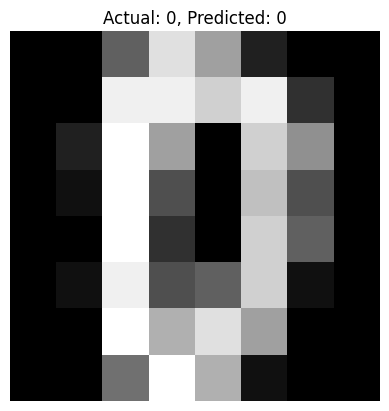

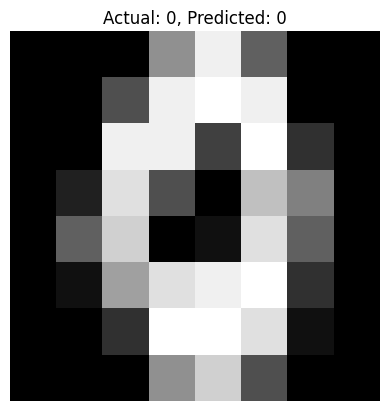

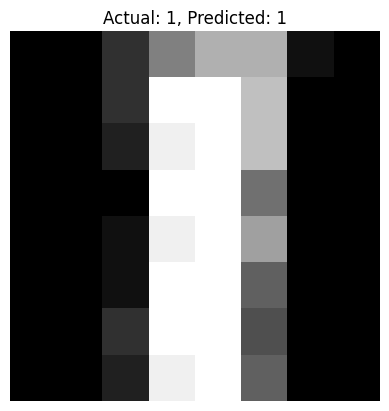

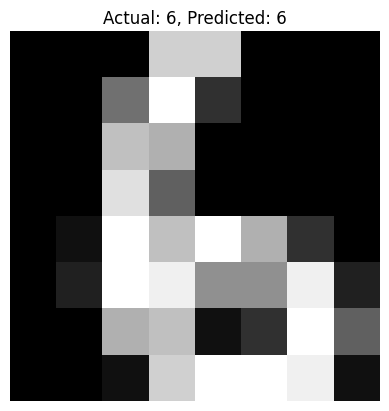

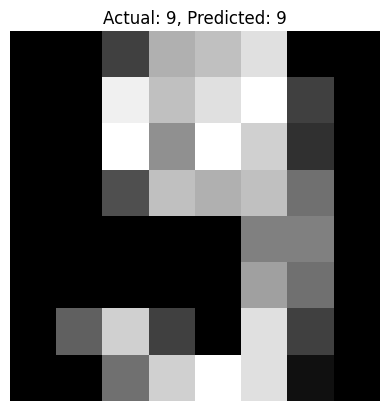

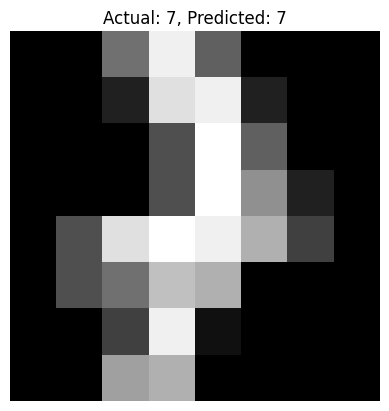

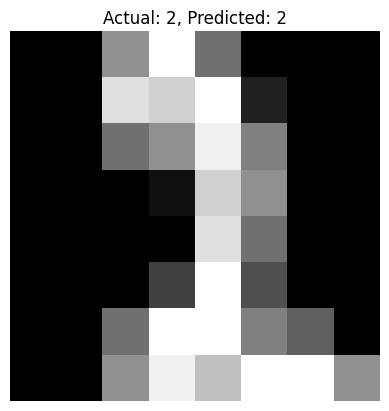

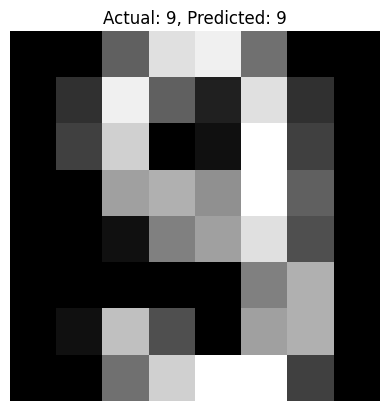

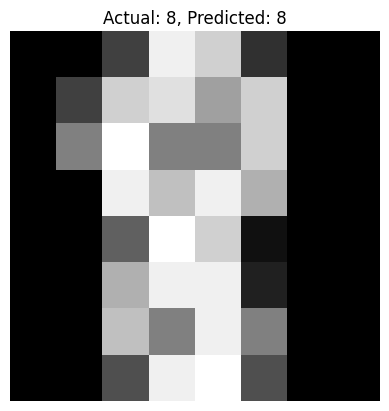

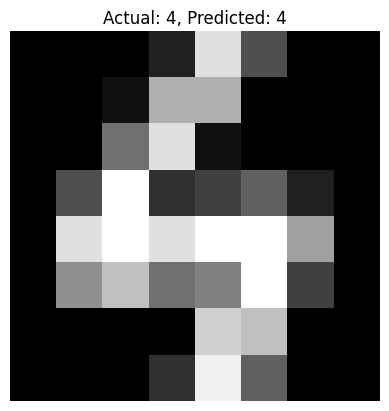

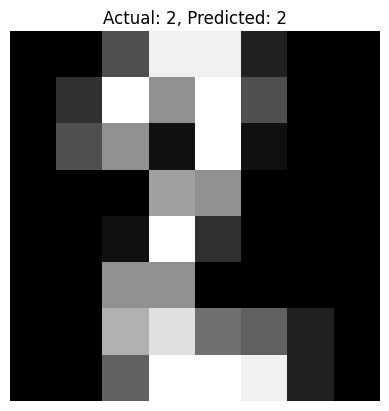

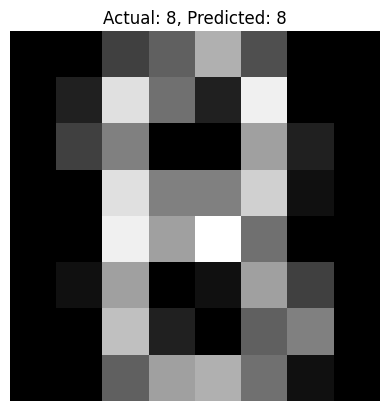

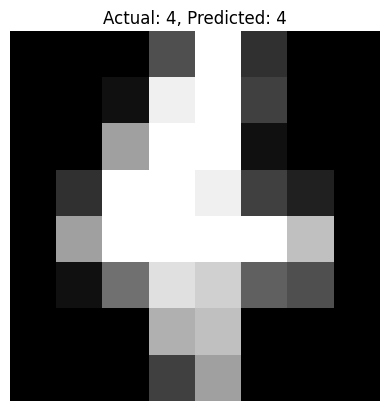

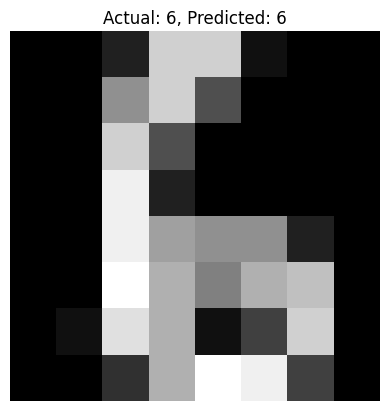

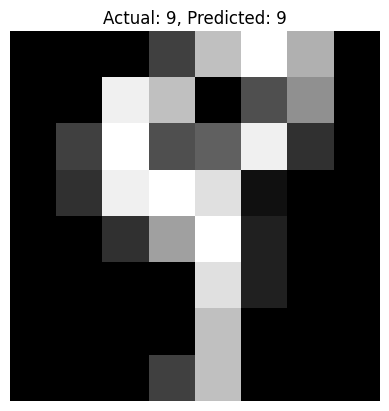

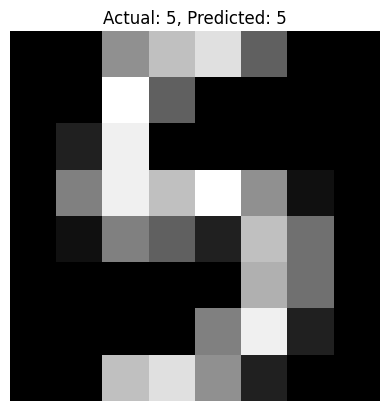

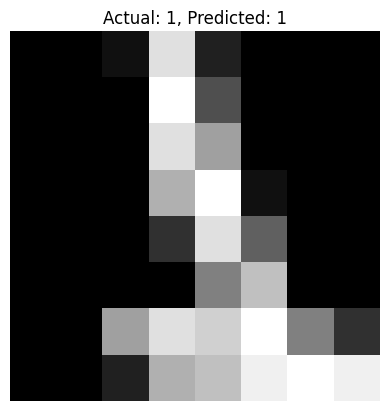

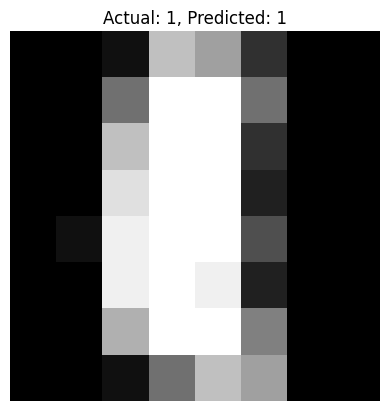

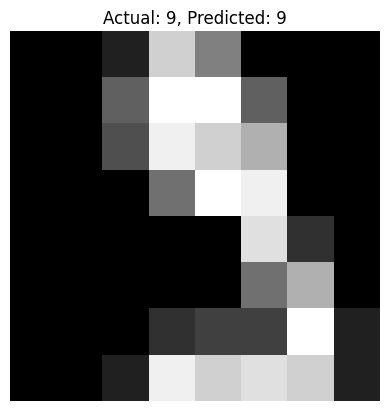

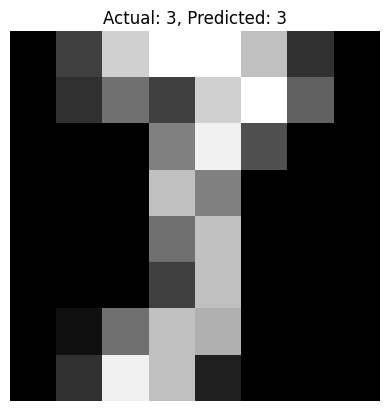

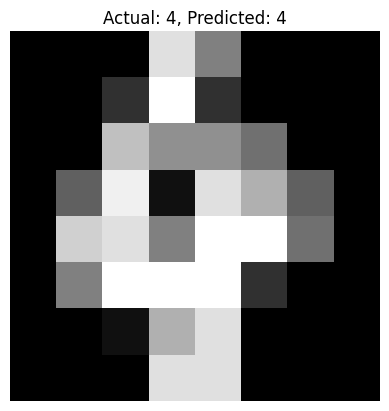

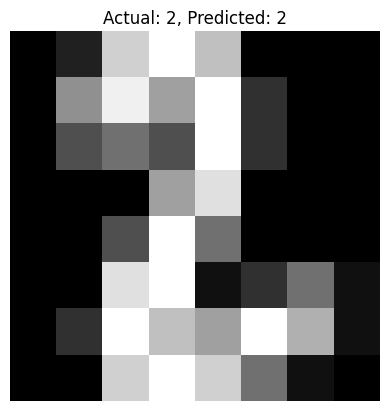

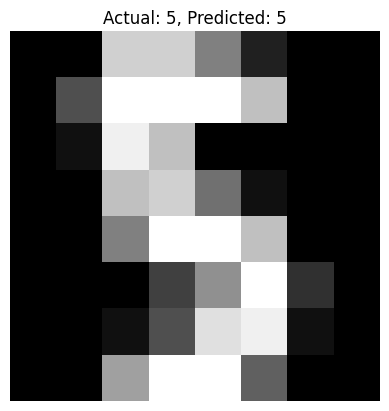

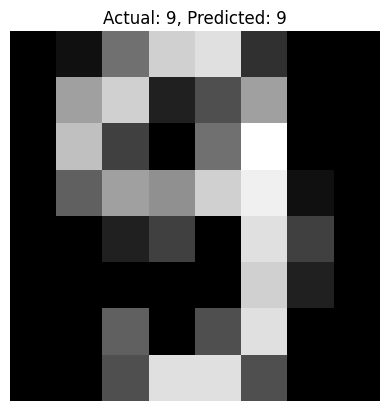

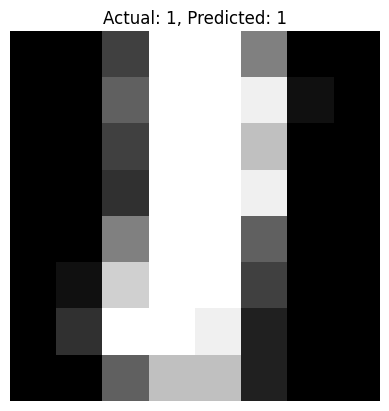

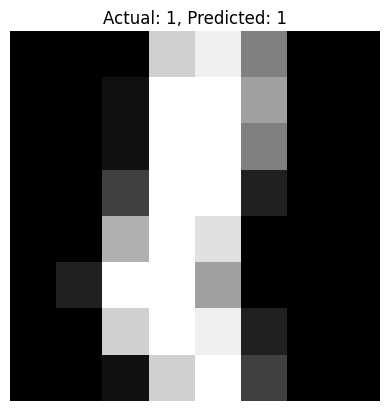

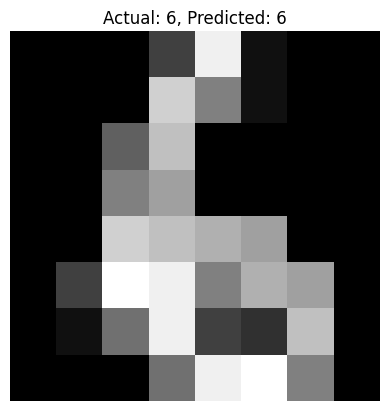

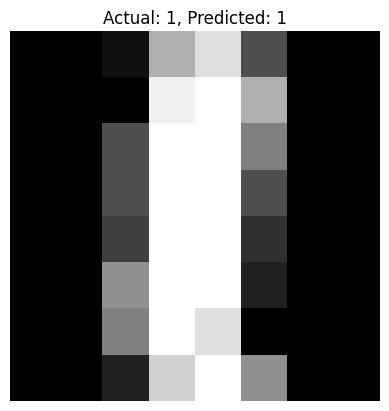

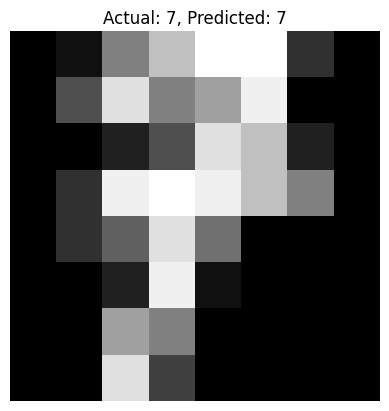

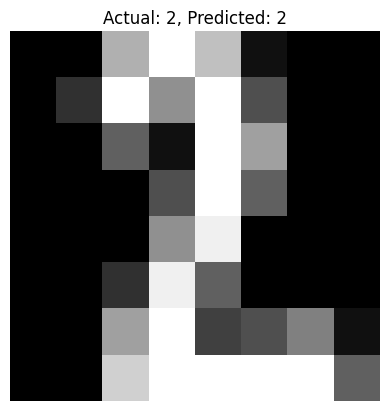

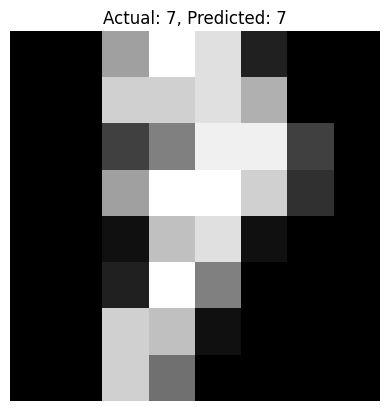

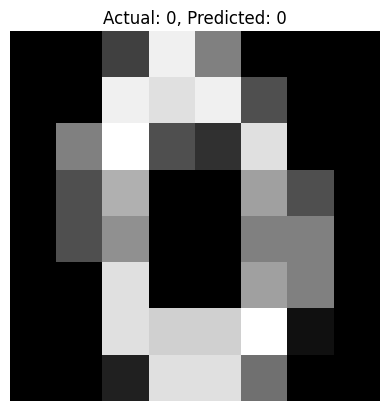

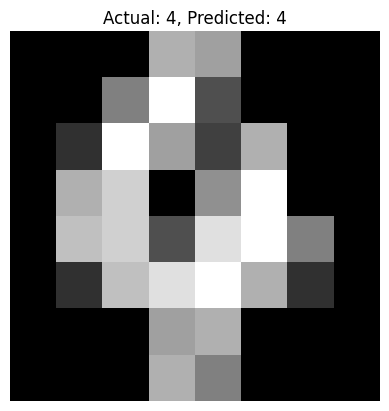

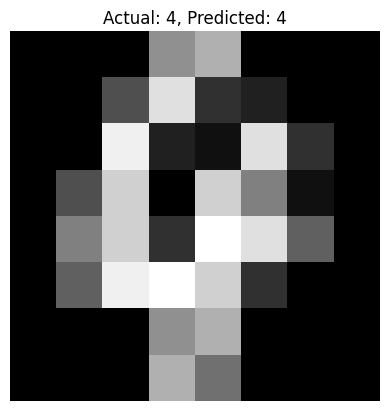

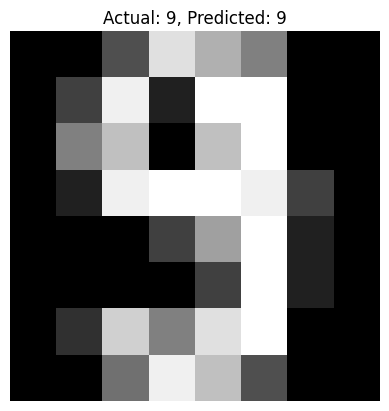

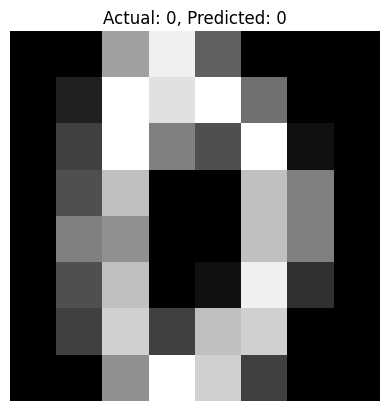

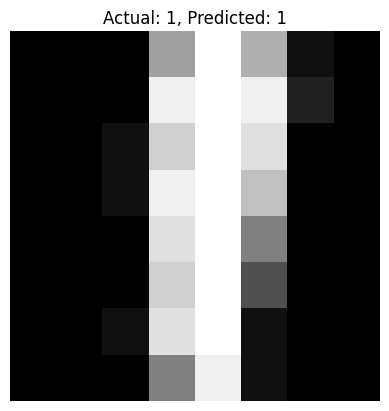

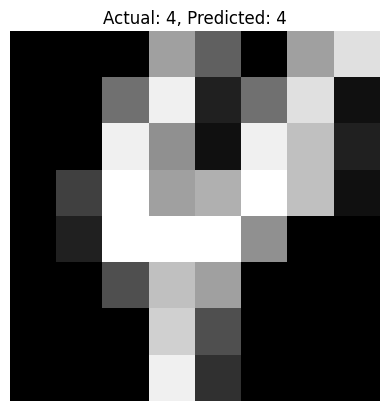

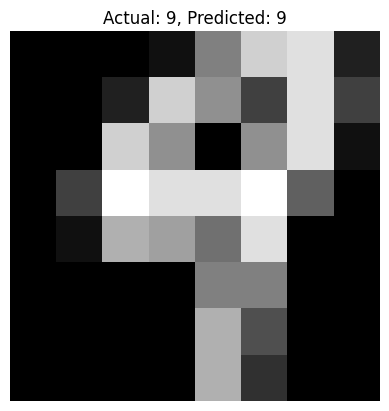

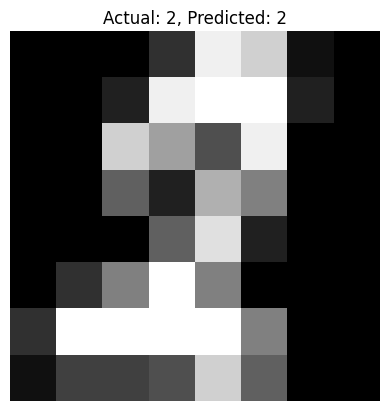

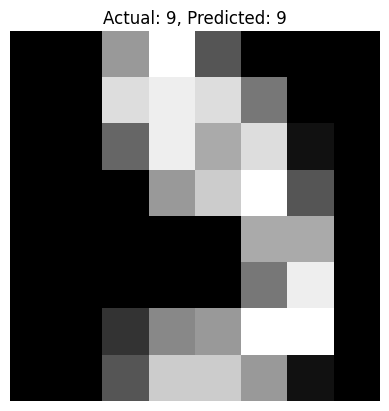

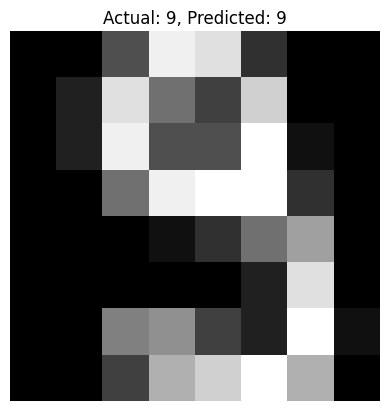

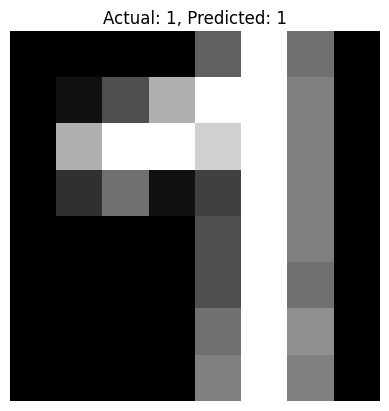

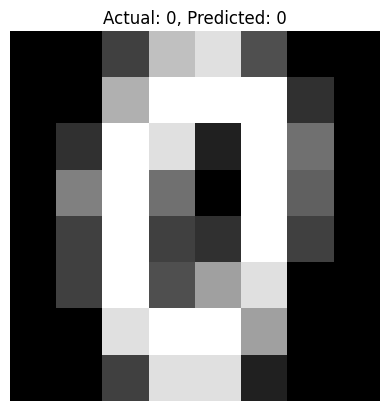

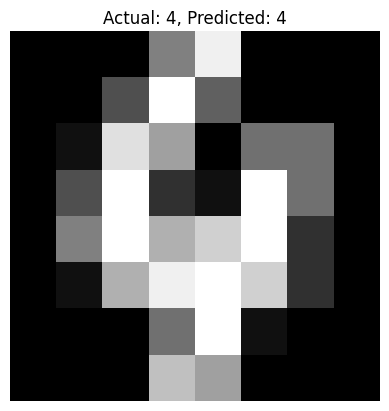

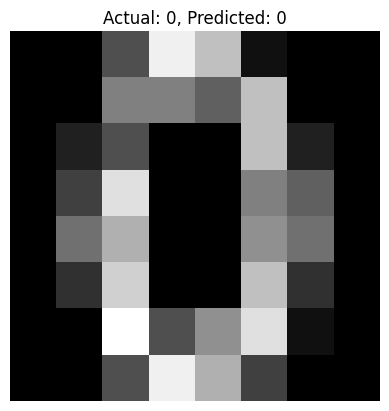

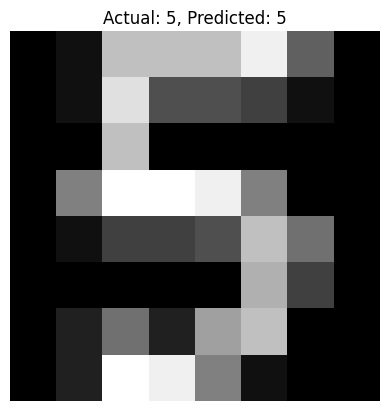

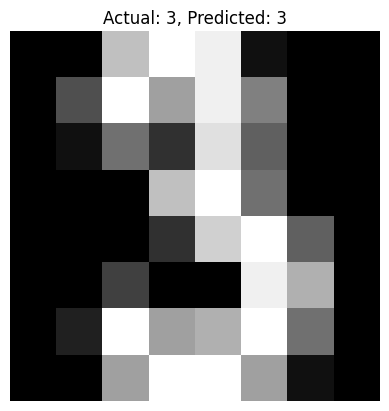

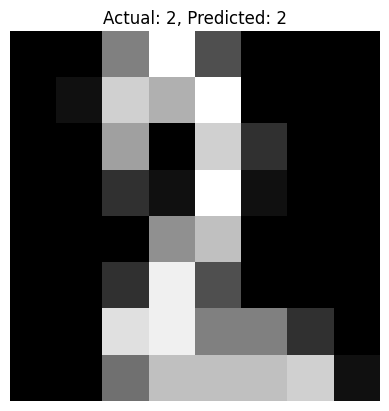

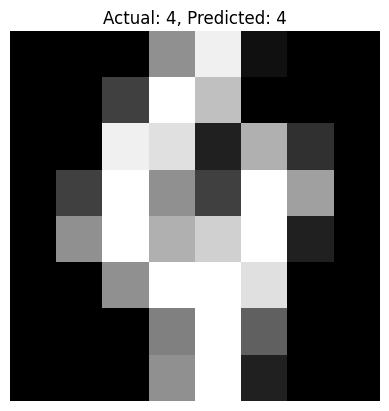

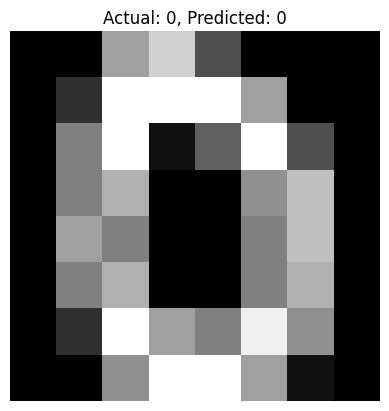

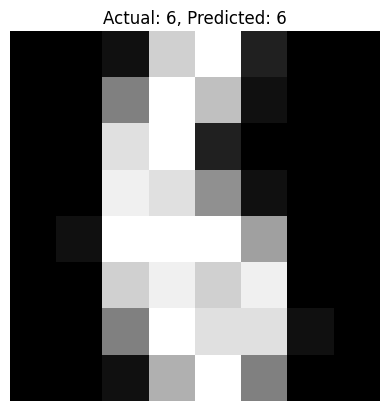

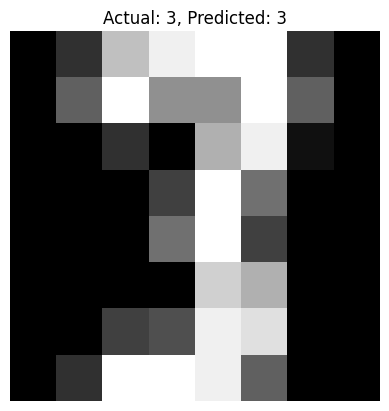

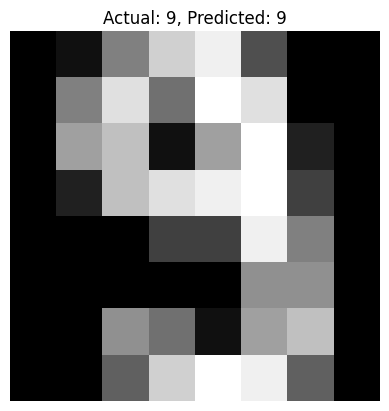

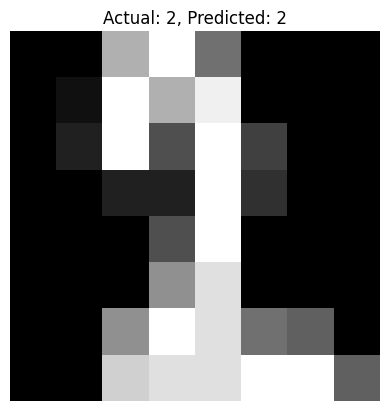

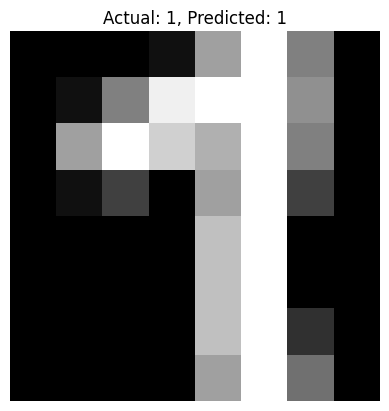

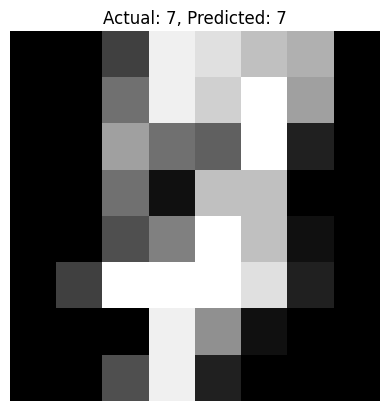

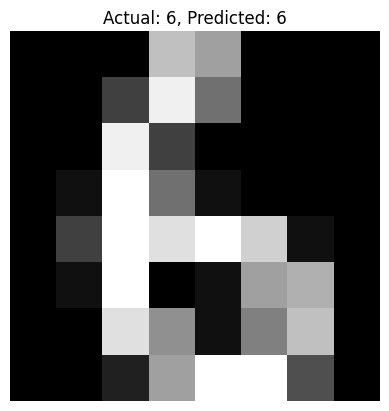

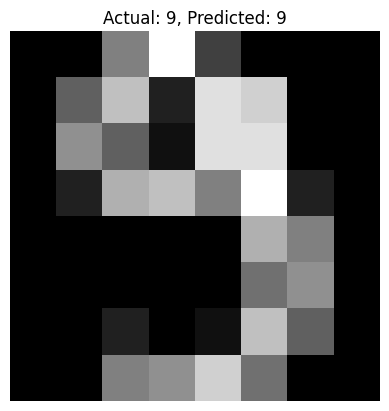

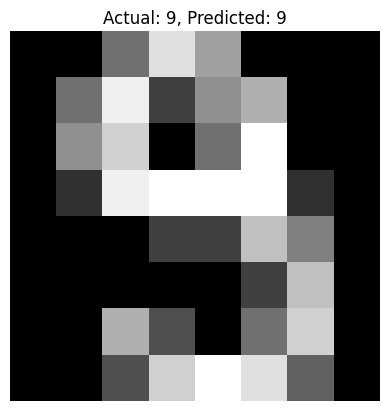

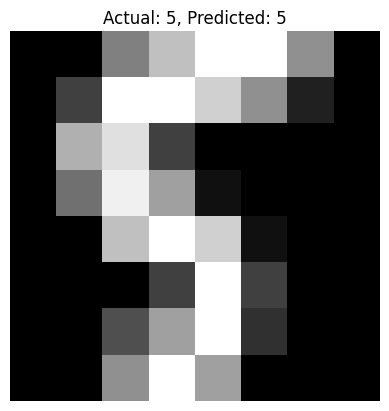

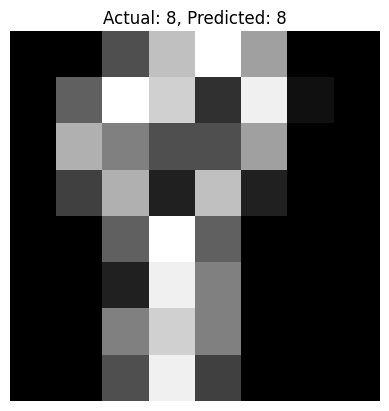

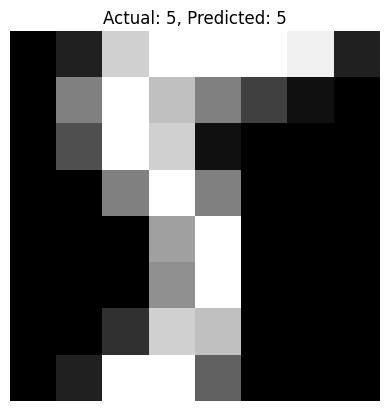

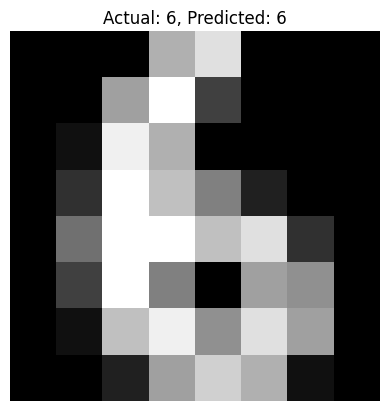

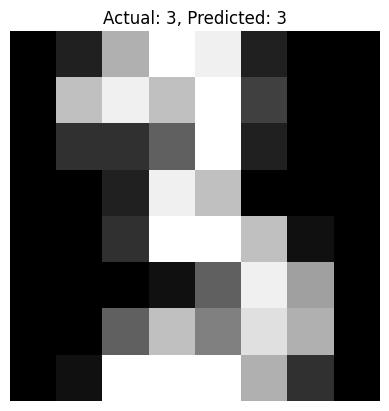

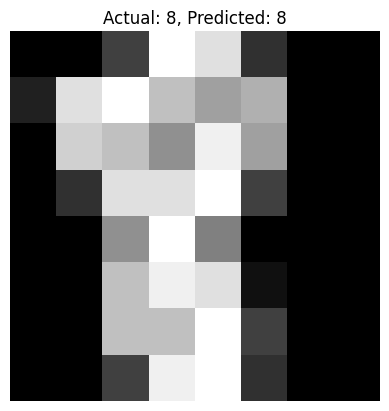

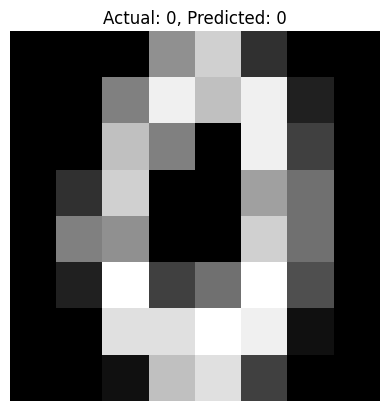

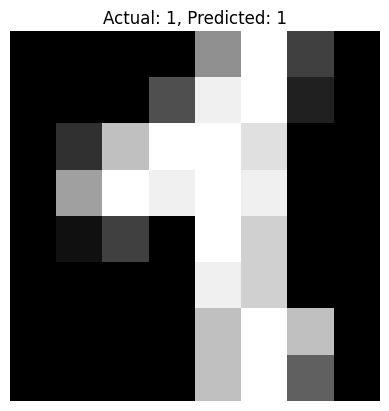

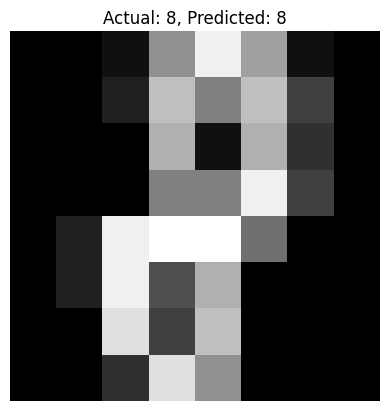

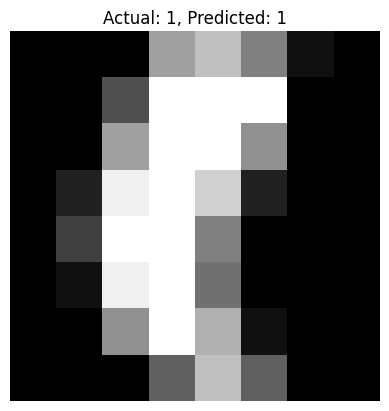

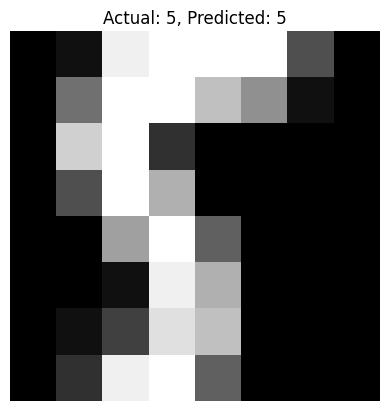

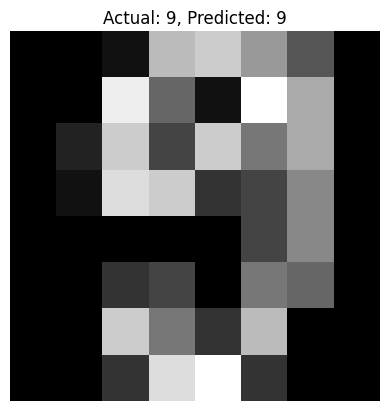

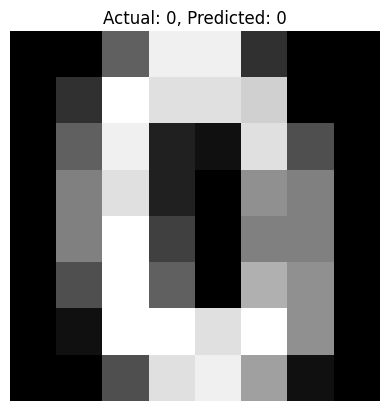

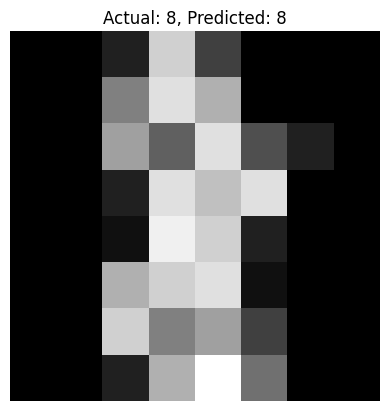

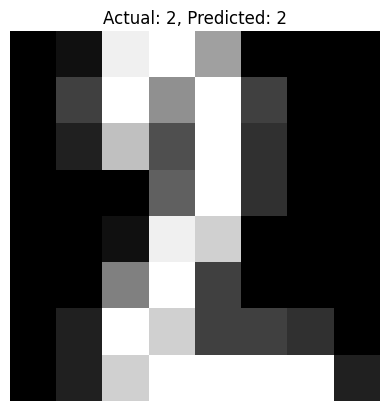

In [66]:
# Display actual and predicted values alongside the images
for i in range(len(predict)):
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Reshape the flattened image to its original shape
    plt.title(f'Actual: {y_test[i]}, Predicted: {predict[i]}')
    plt.axis('off')  # Turn off axis labels for better visualization

    plt.show()

You can do the below code for subplot

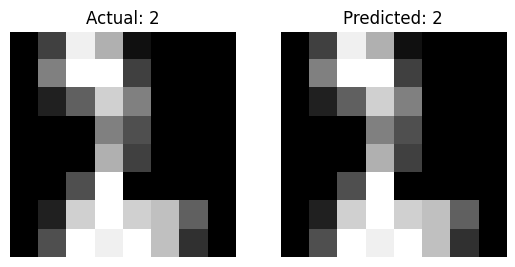

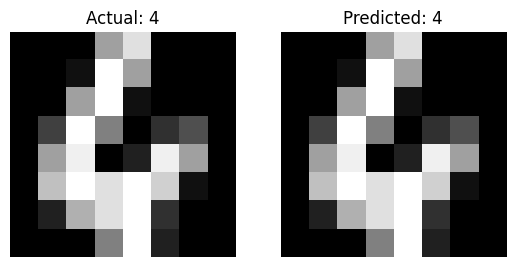

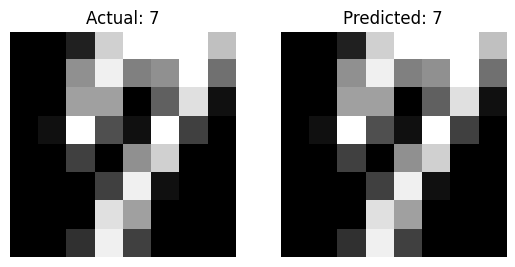

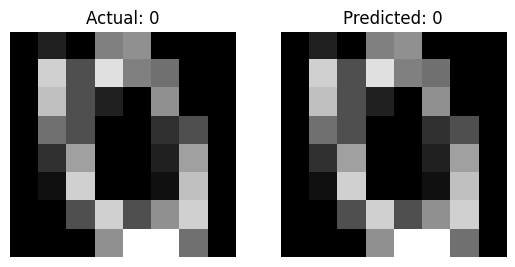

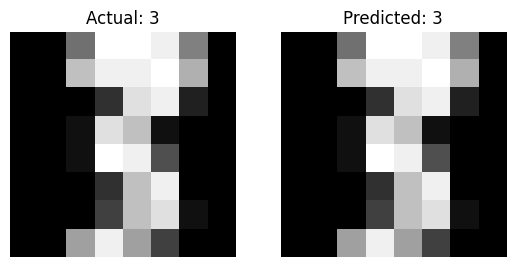

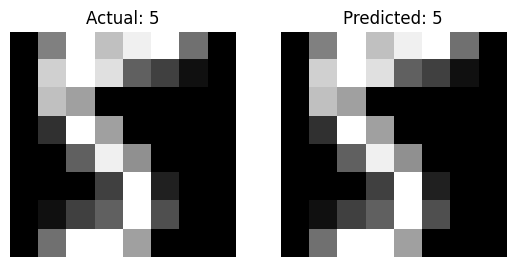

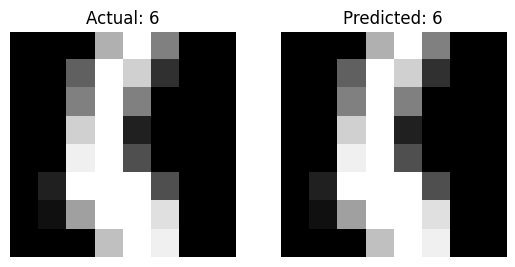

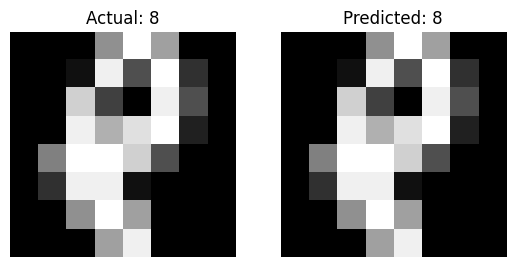

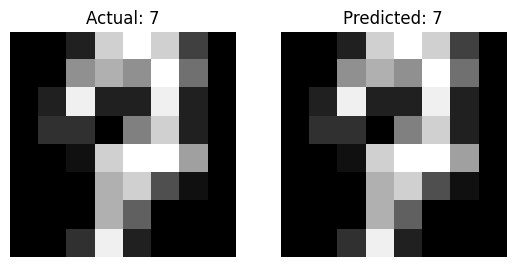

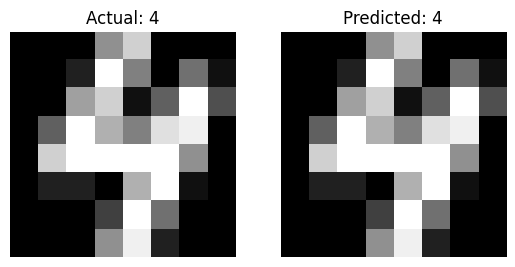

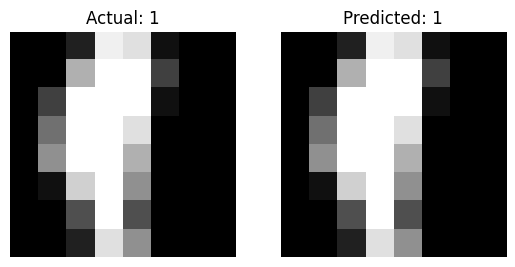

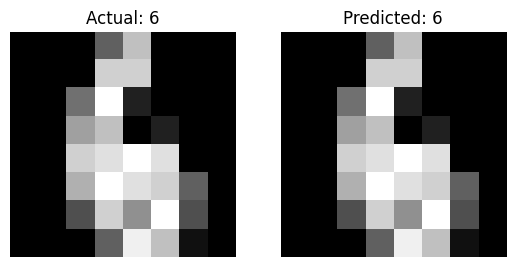

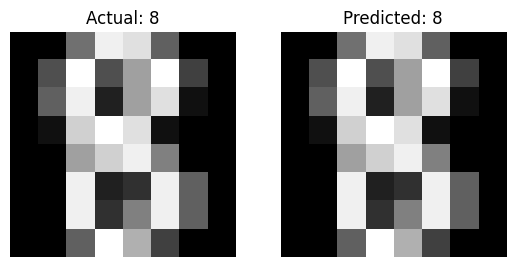

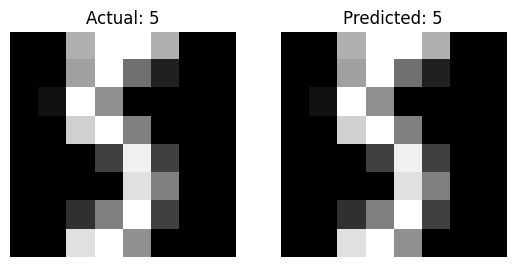

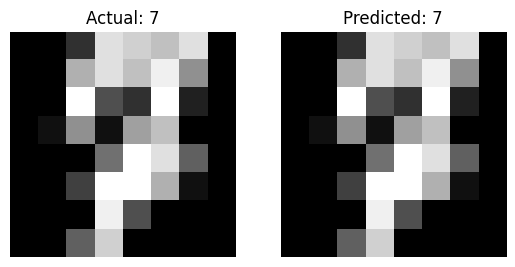

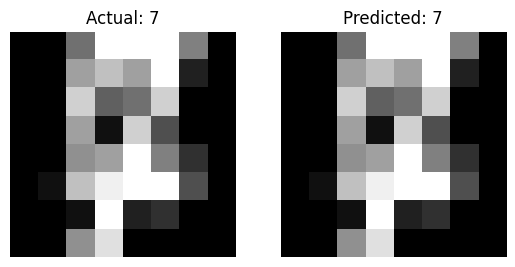

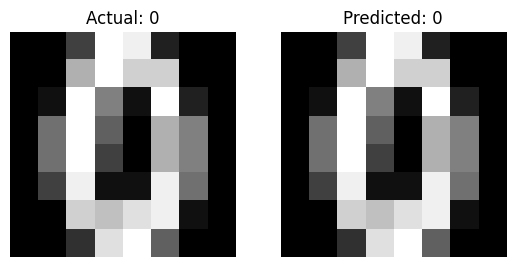

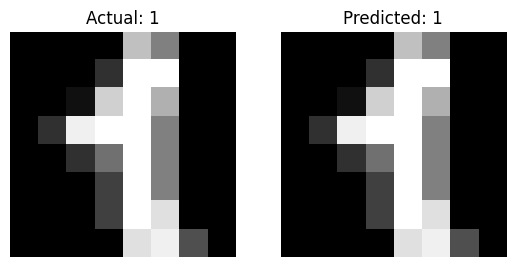

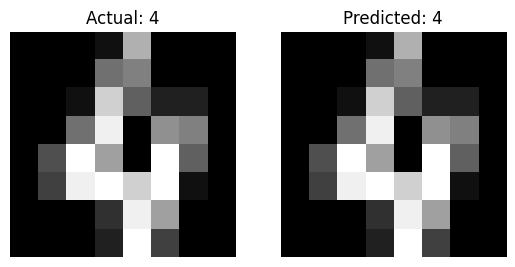

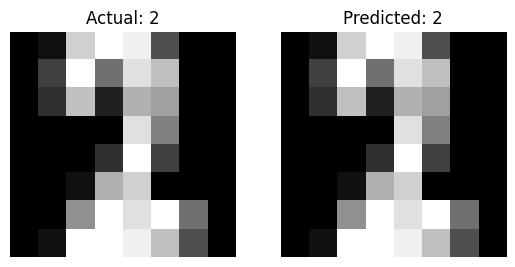

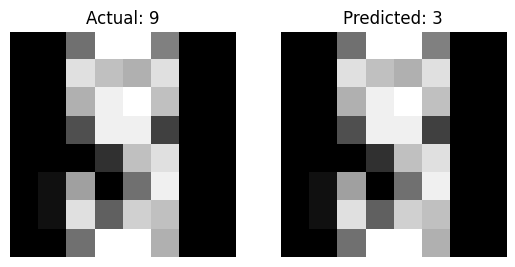

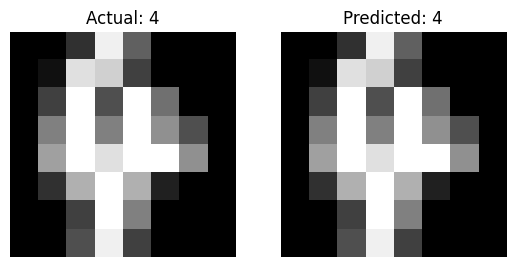

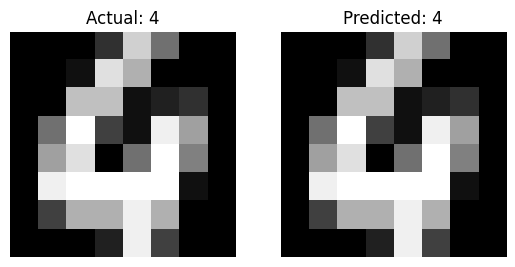

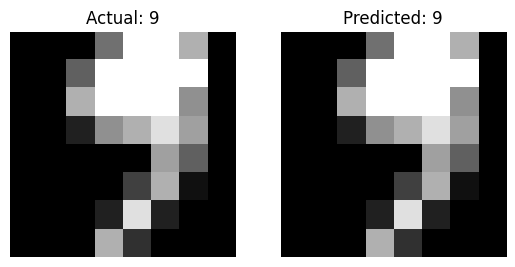

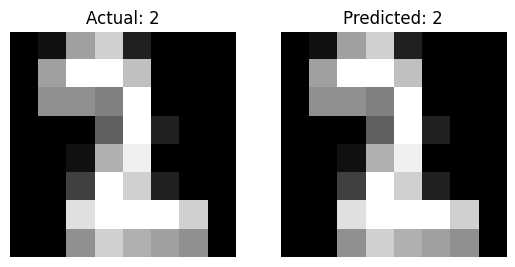

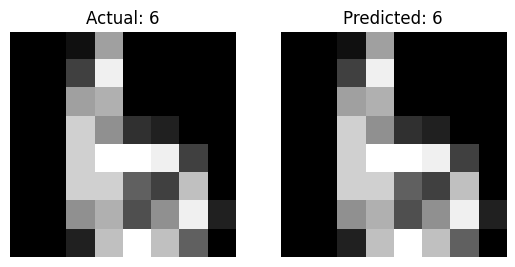

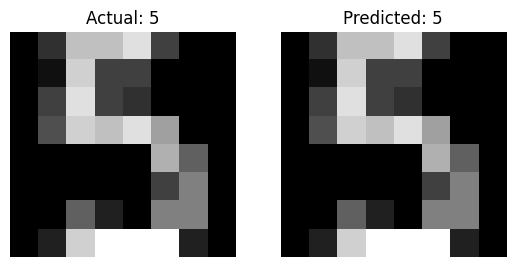

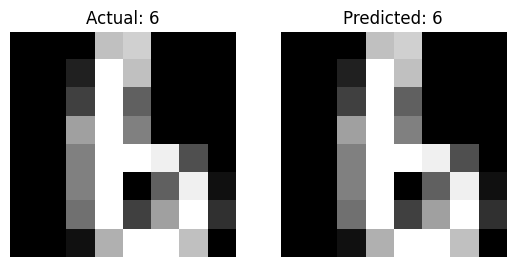

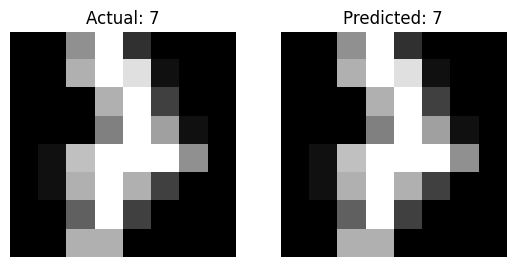

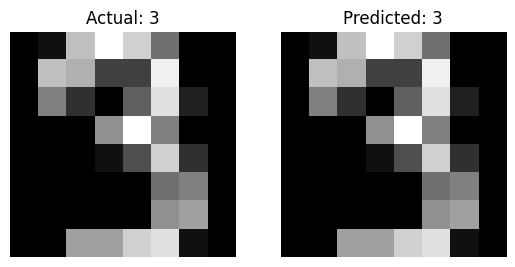

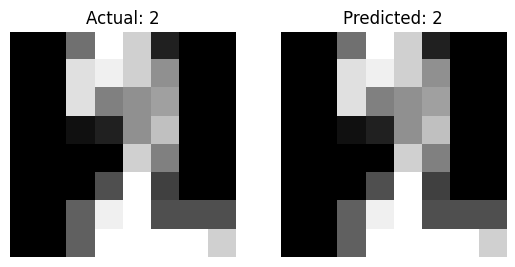

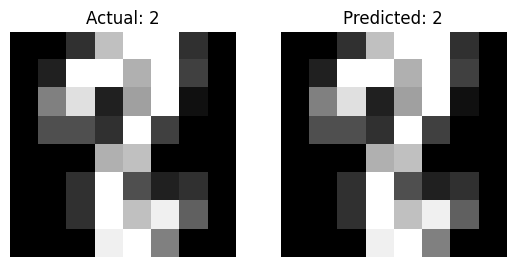

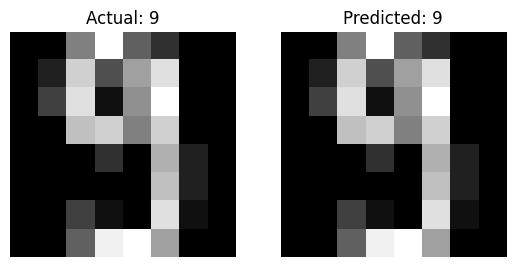

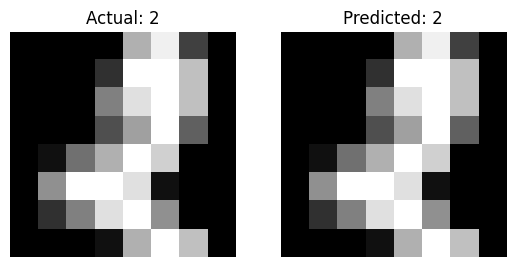

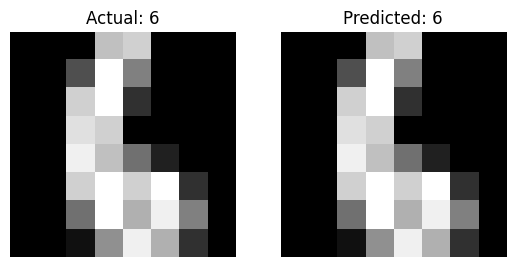

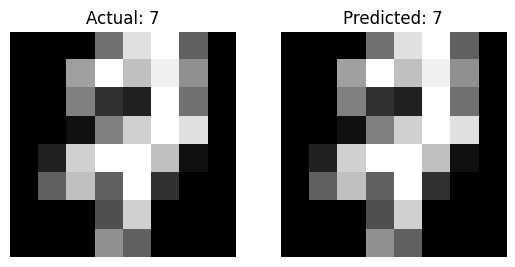

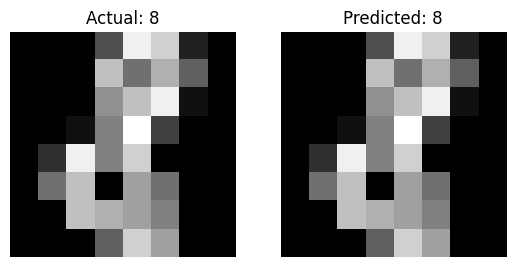

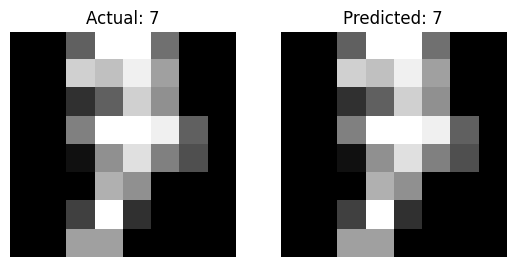

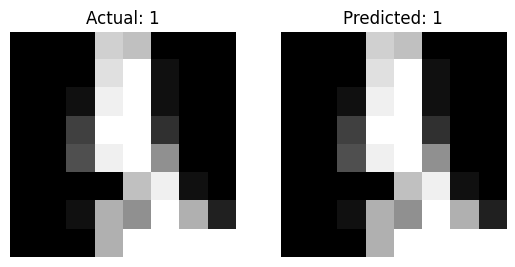

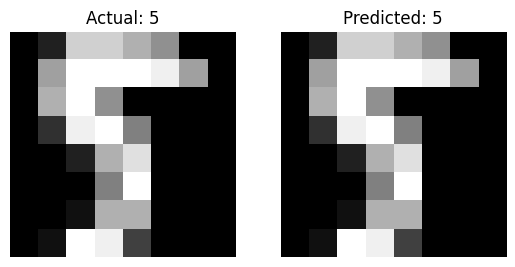

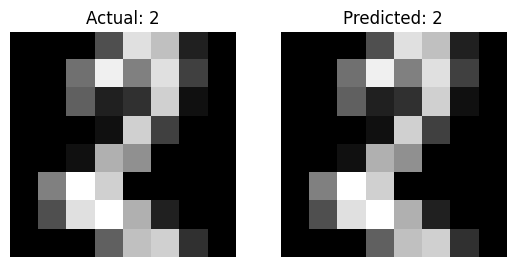

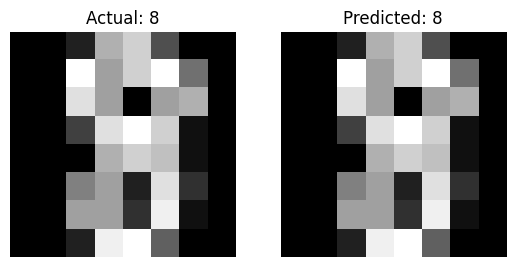

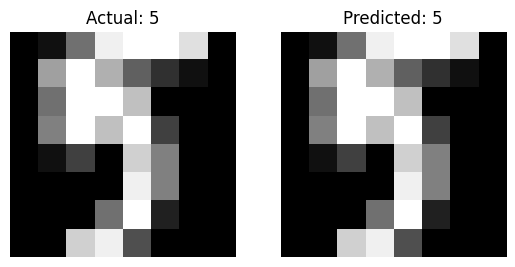

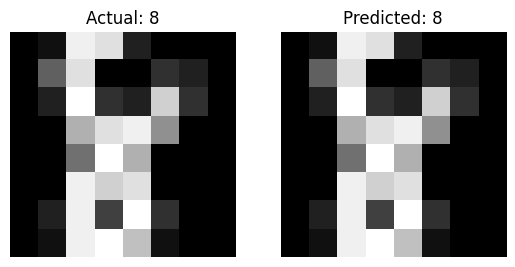

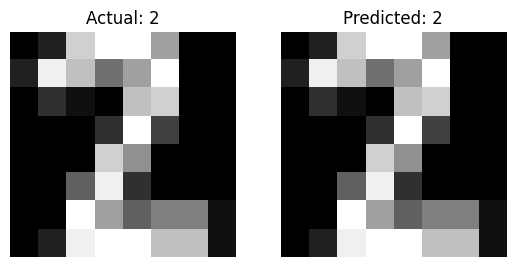

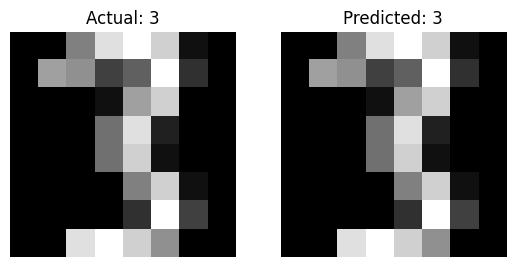

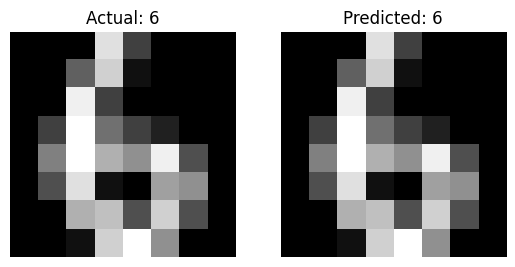

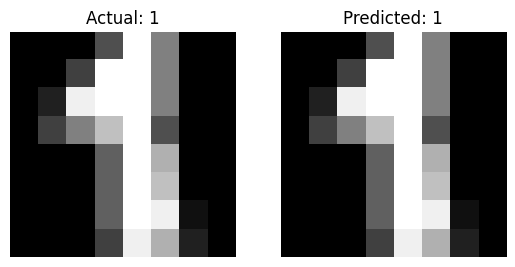

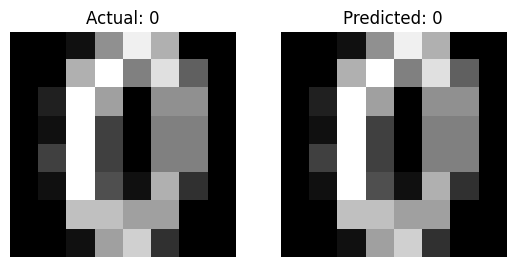

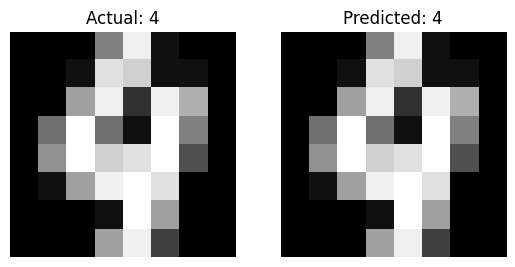

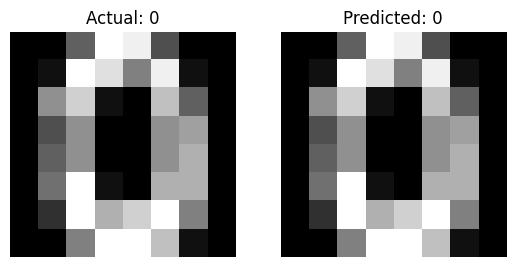

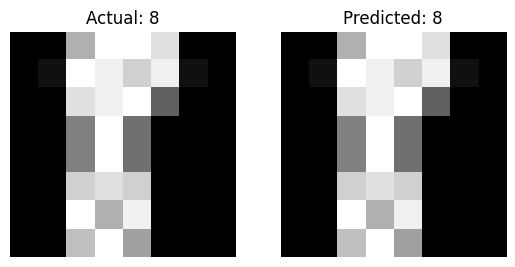

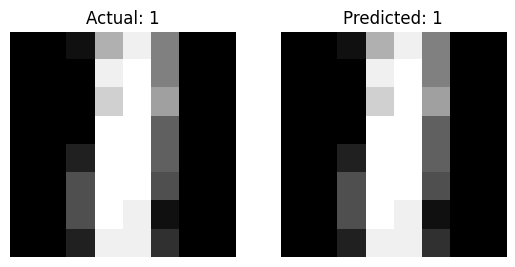

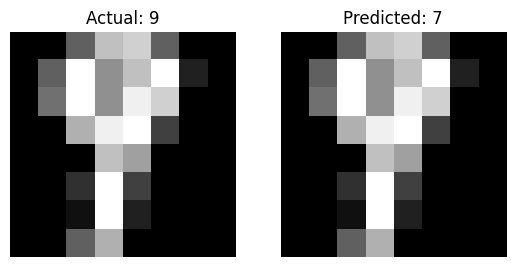

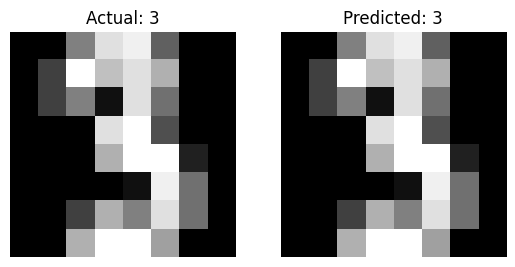

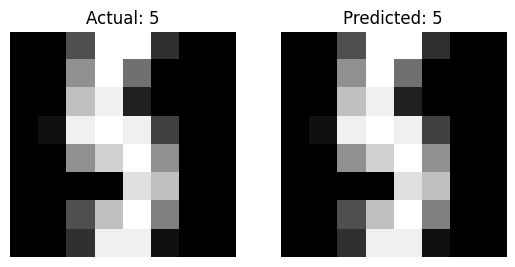

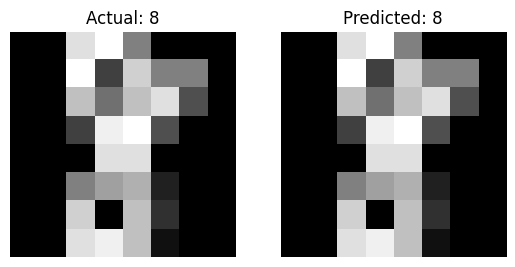

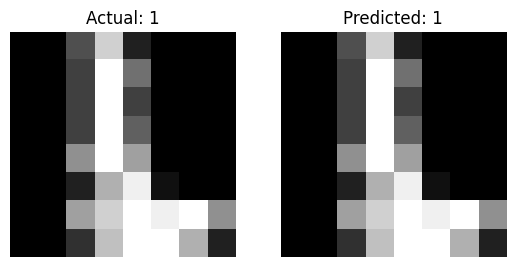

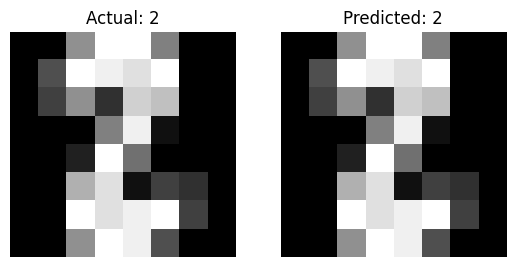

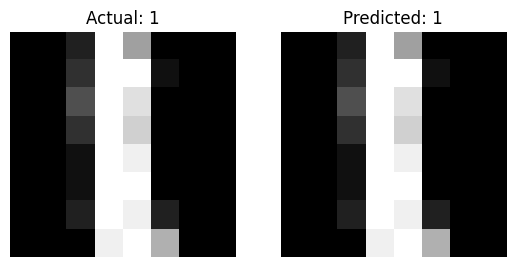

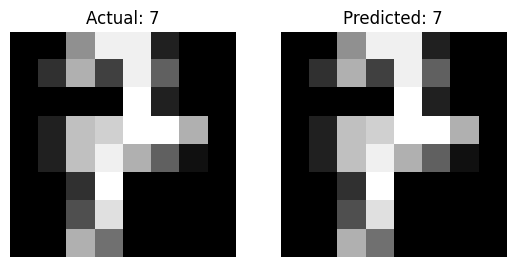

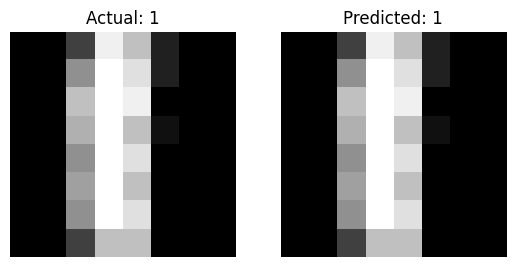

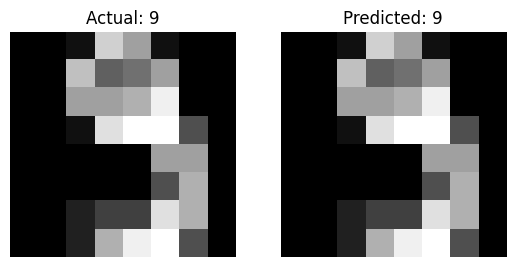

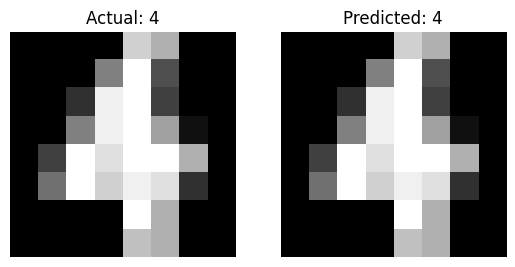

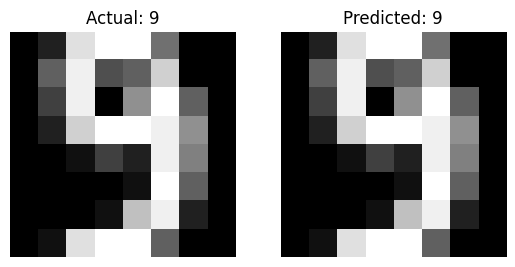

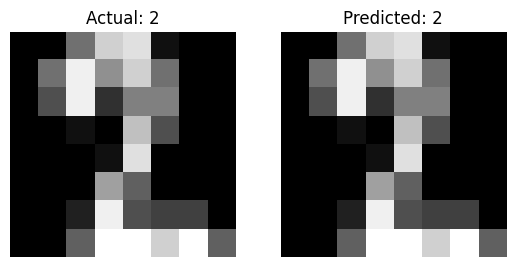

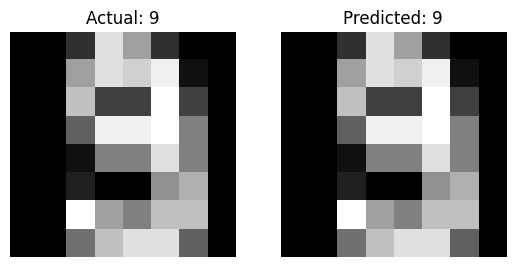

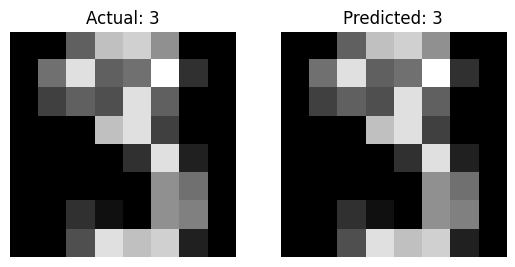

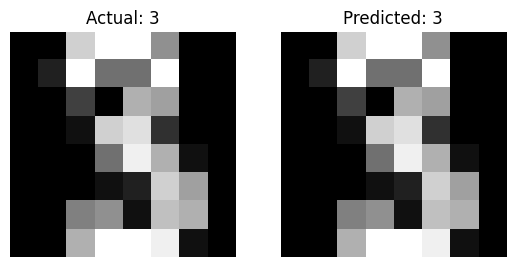

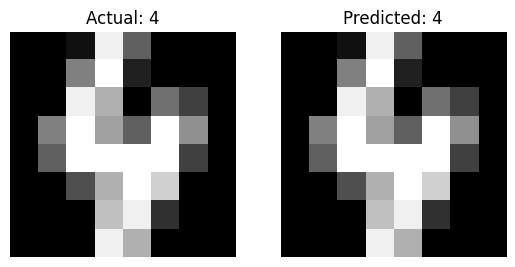

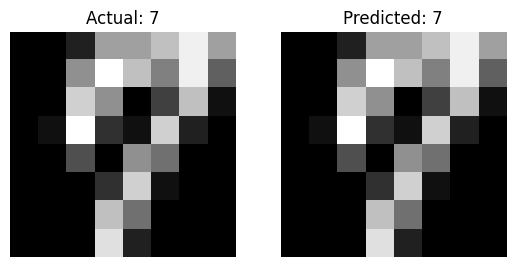

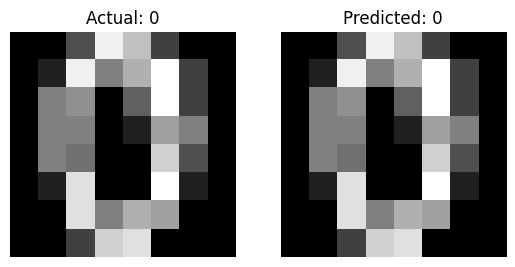

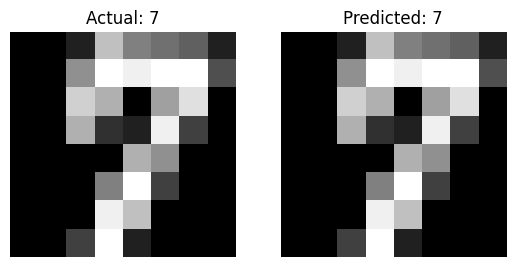

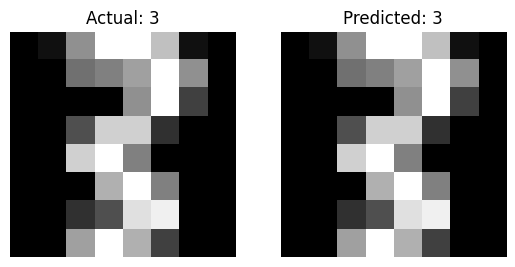

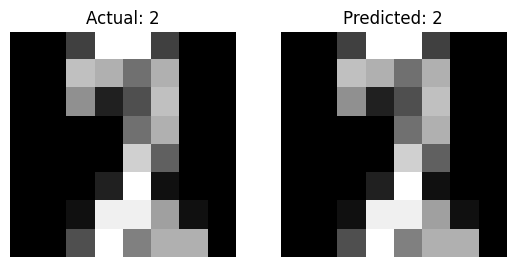

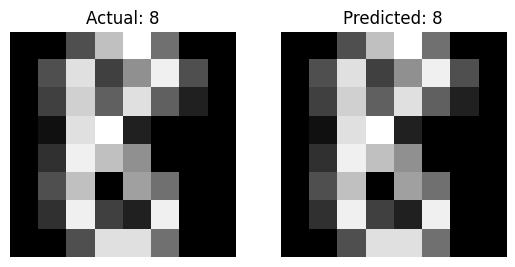

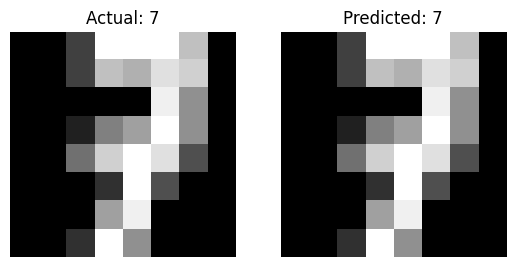

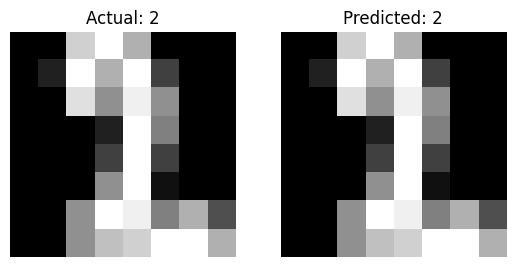

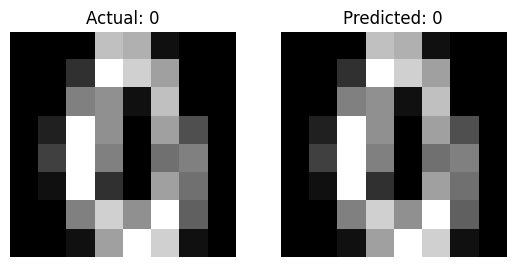

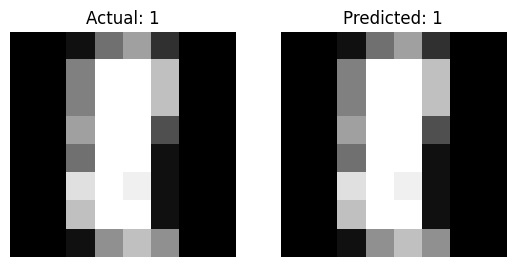

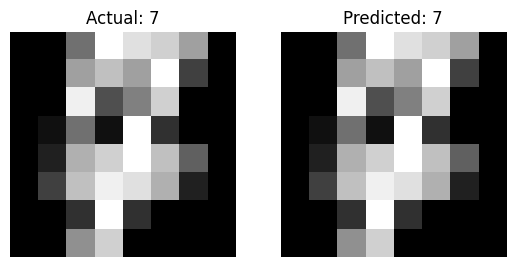

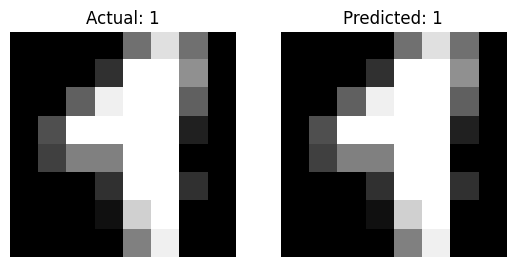

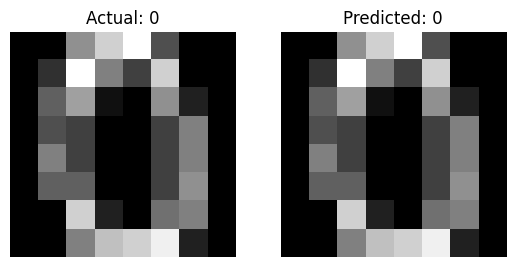

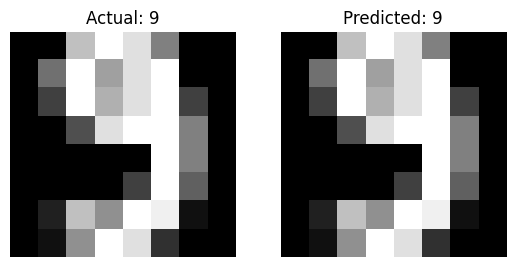

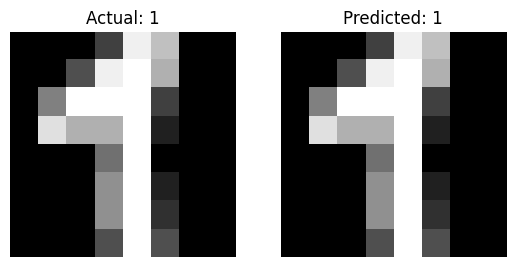

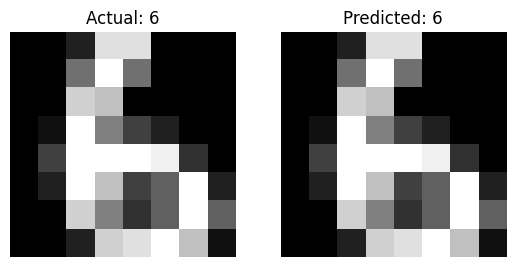

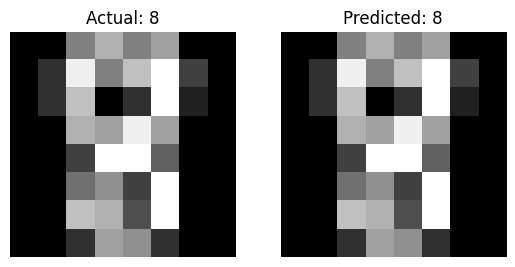

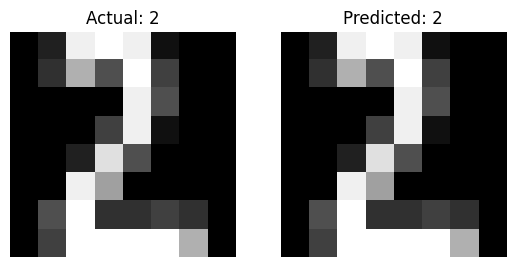

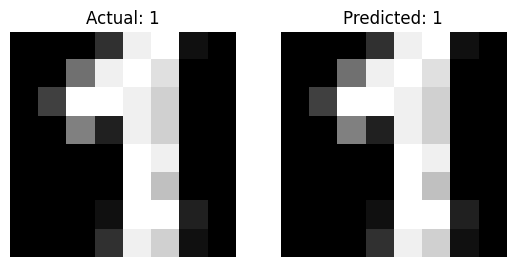

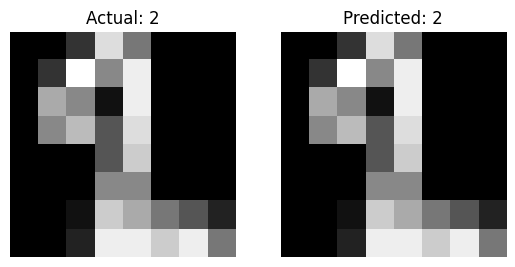

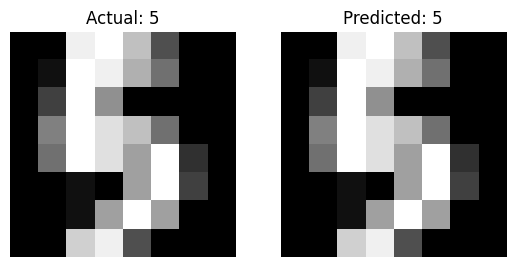

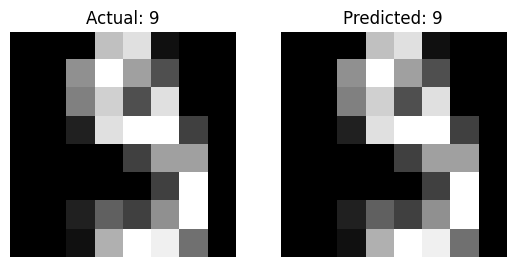

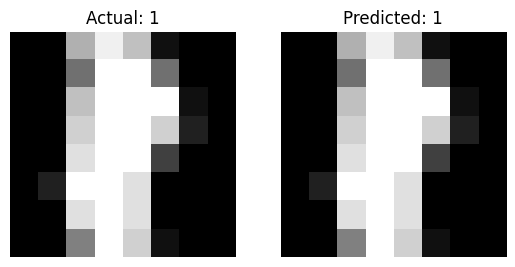

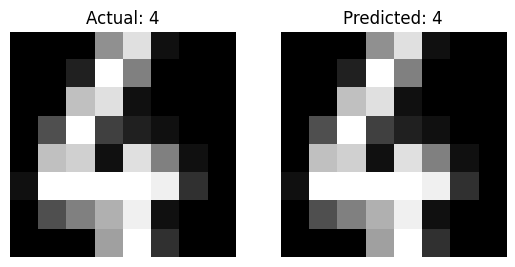

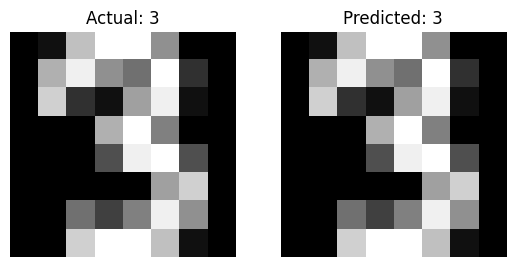

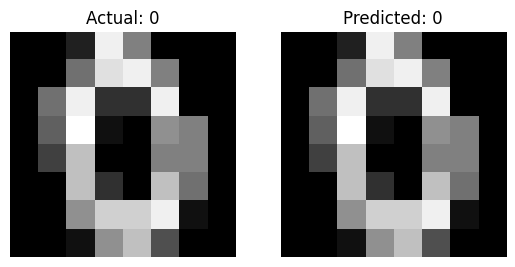

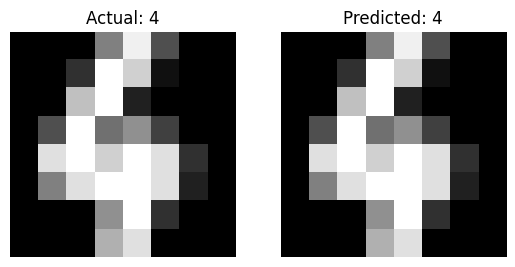

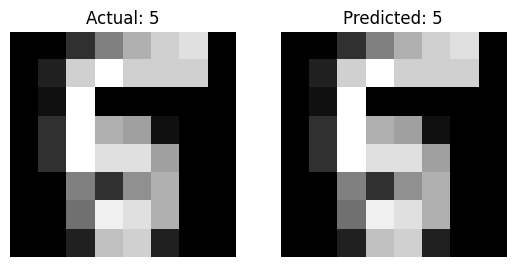

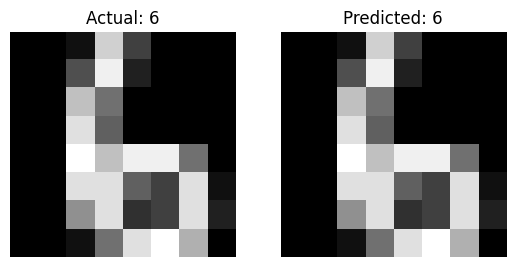

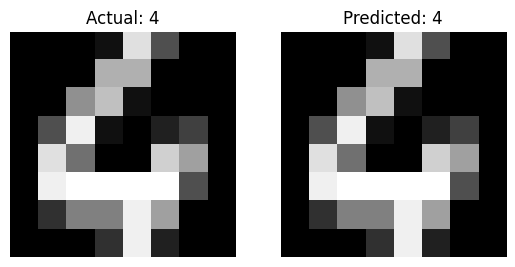

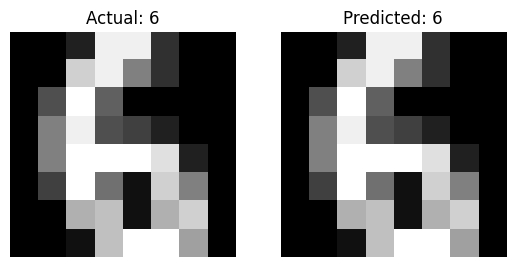

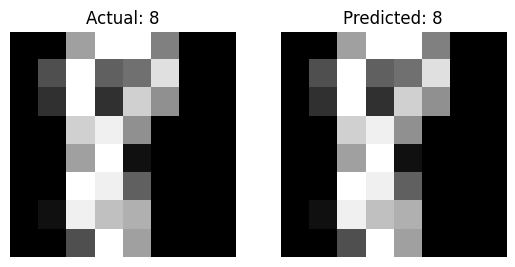

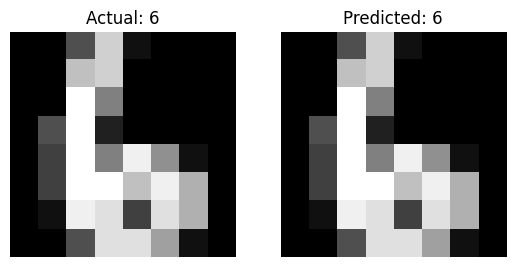

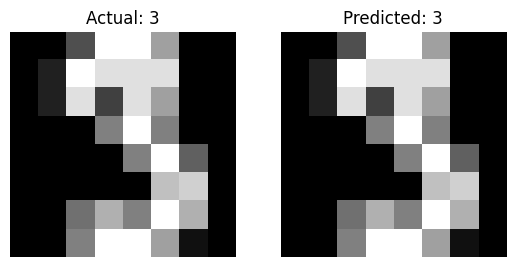

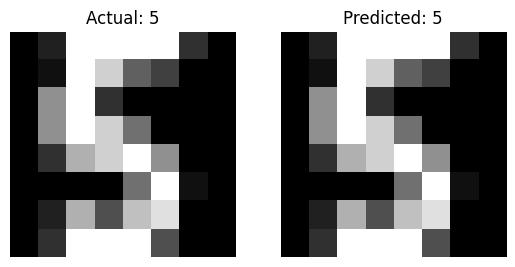

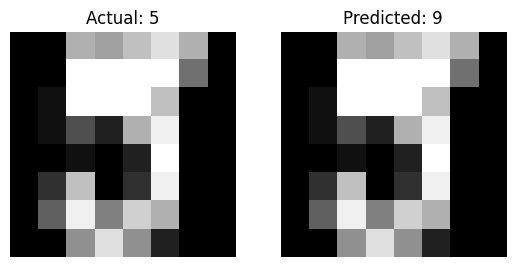

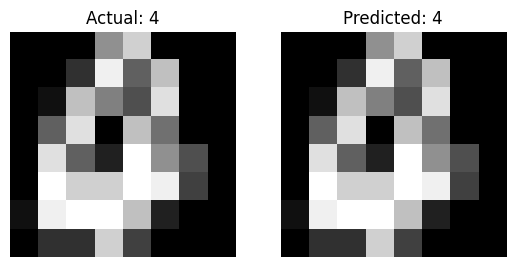

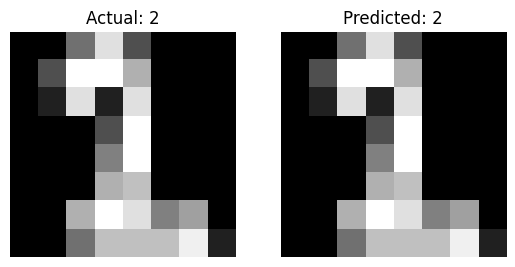

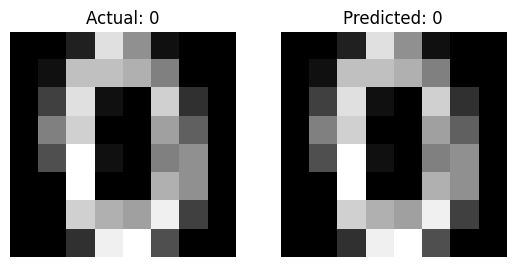

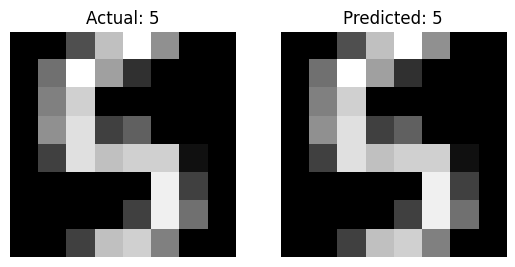

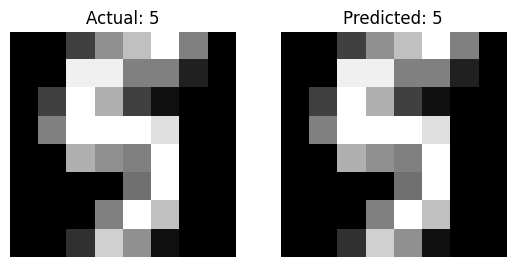

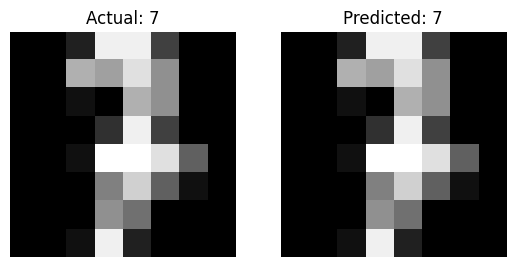

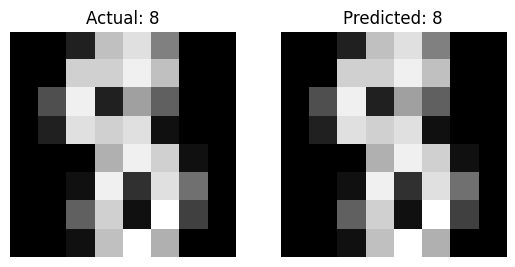

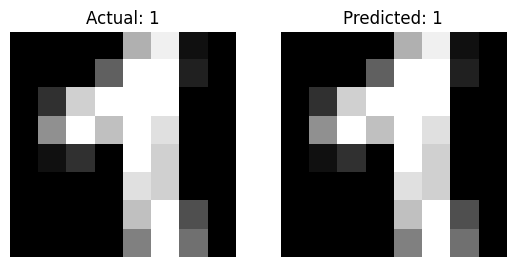

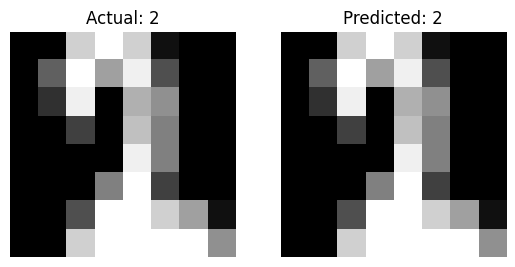

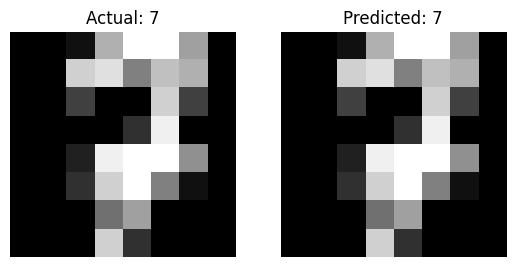

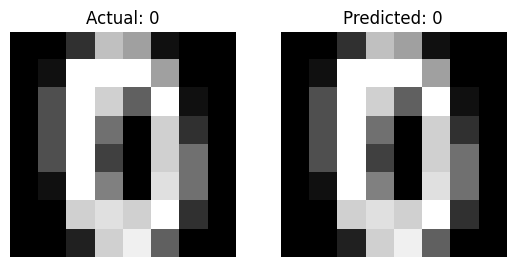

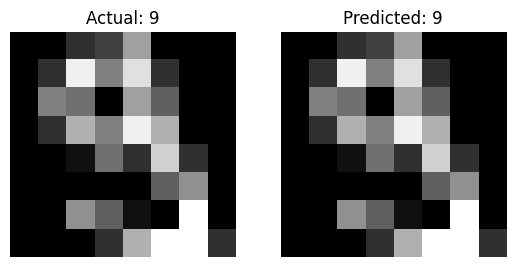

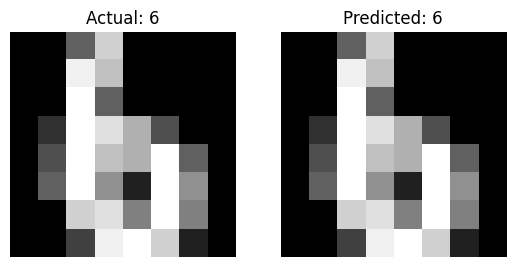

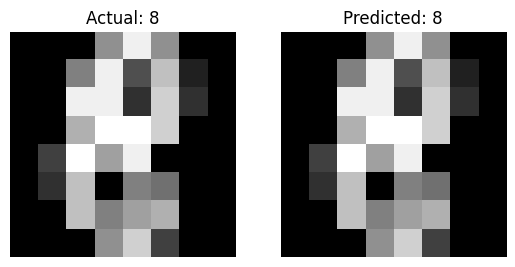

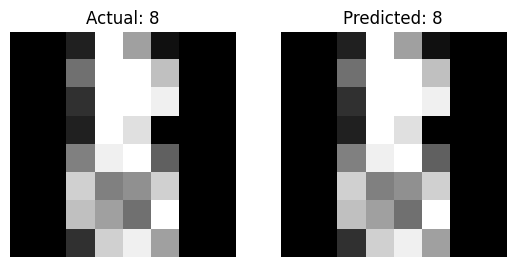

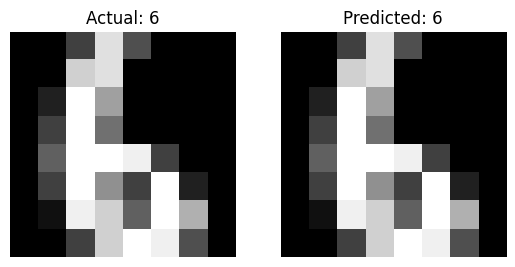

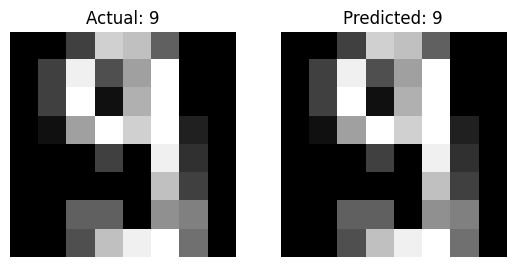

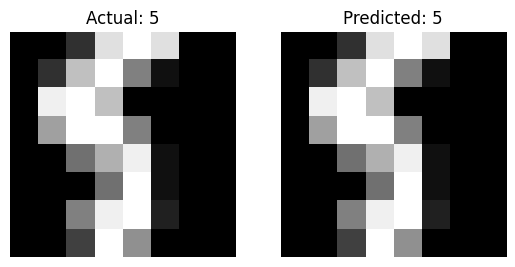

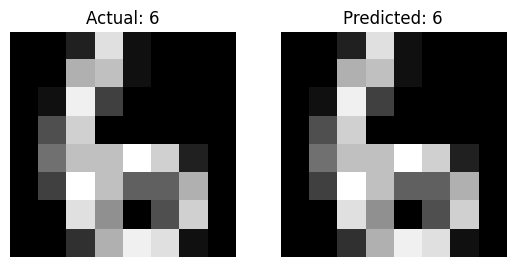

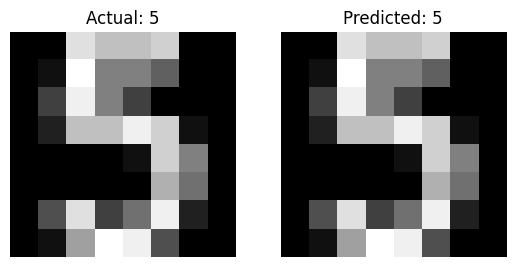

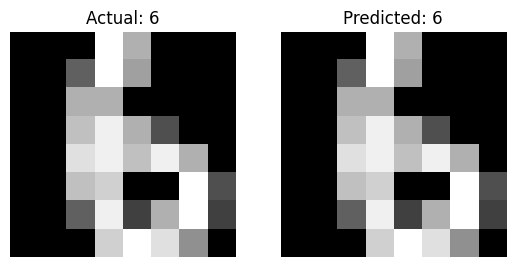

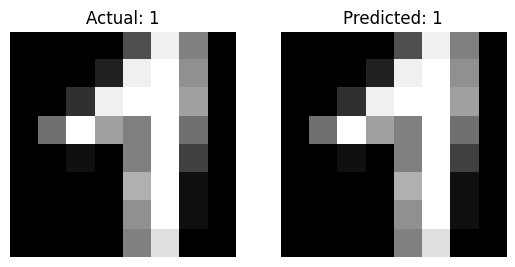

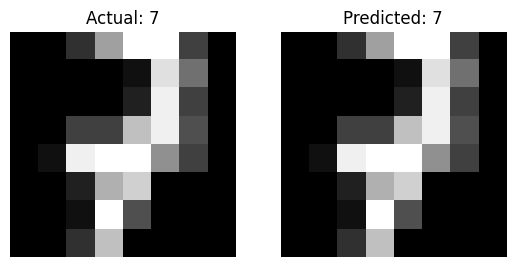

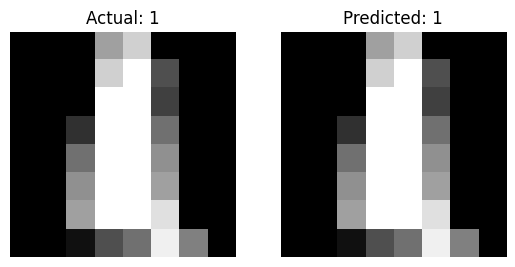

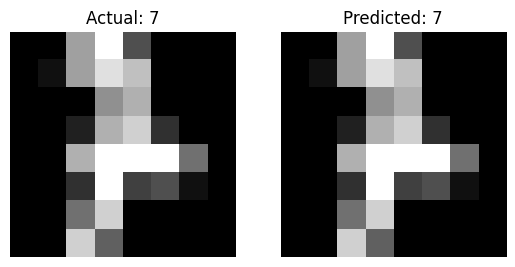

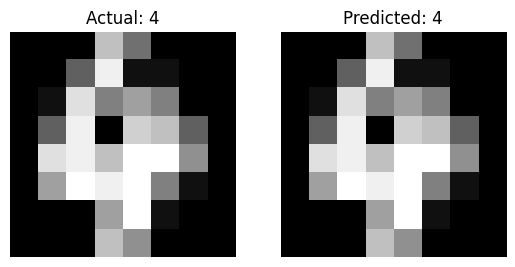

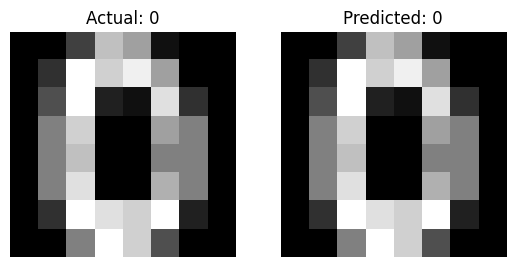

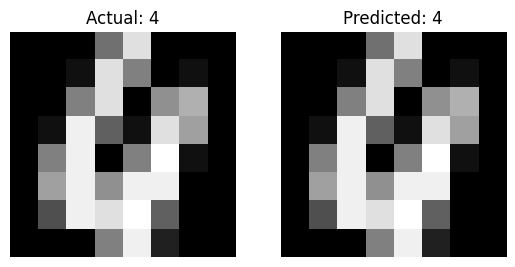

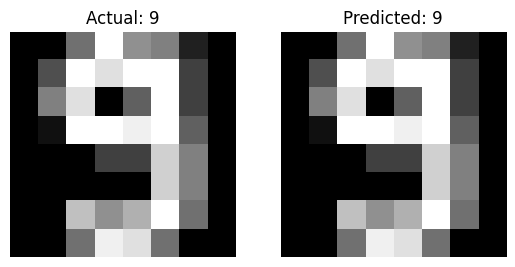

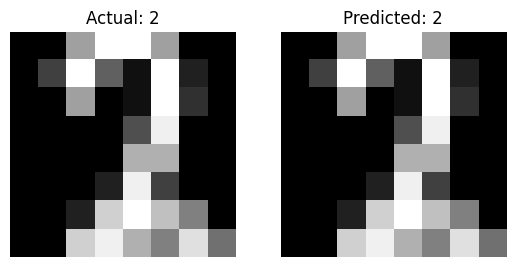

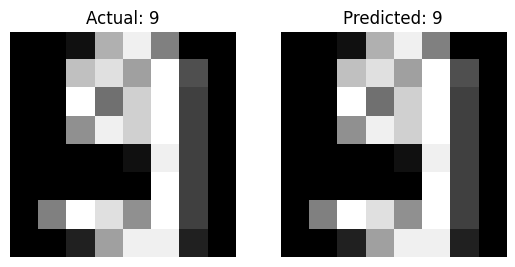

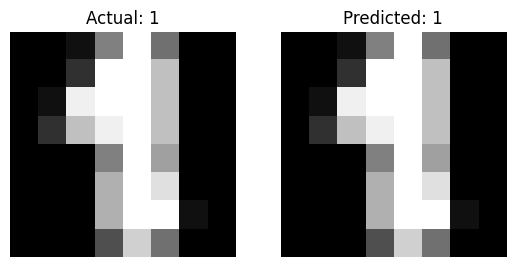

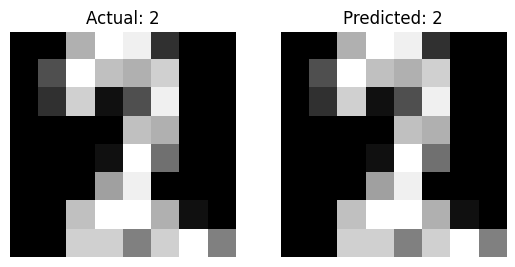

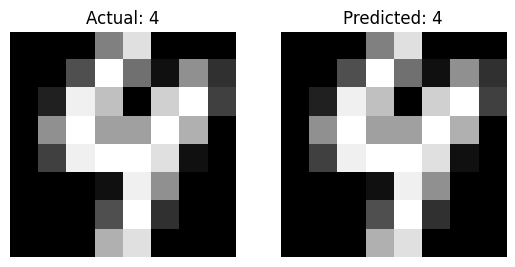

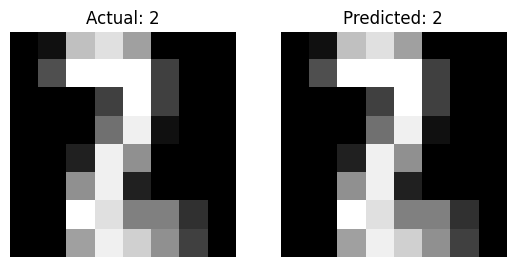

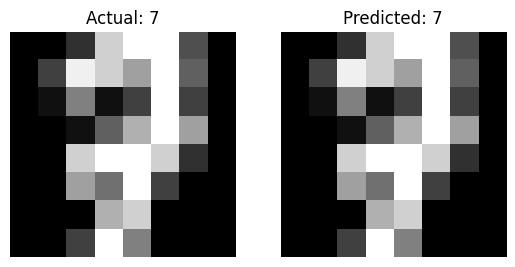

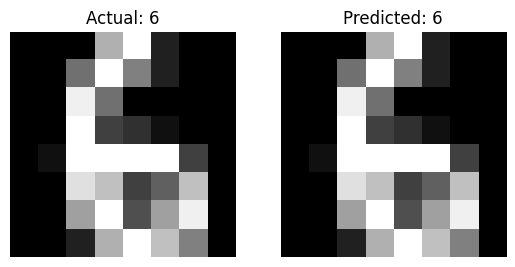

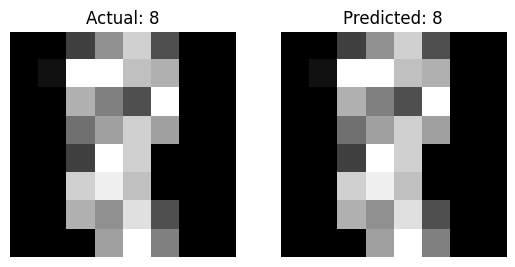

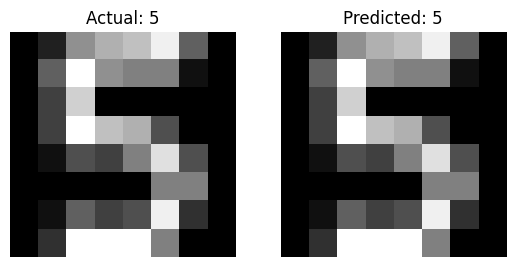

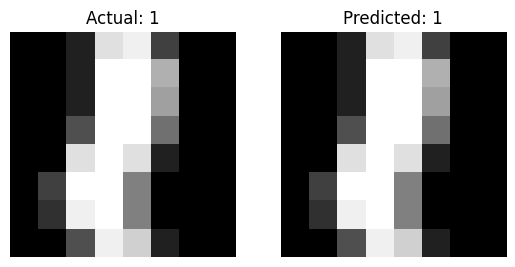

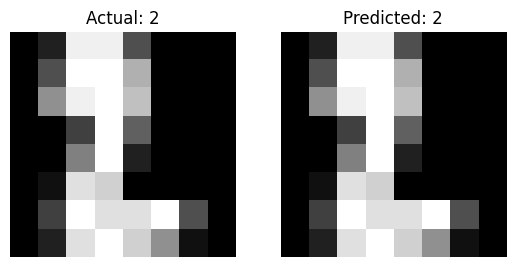

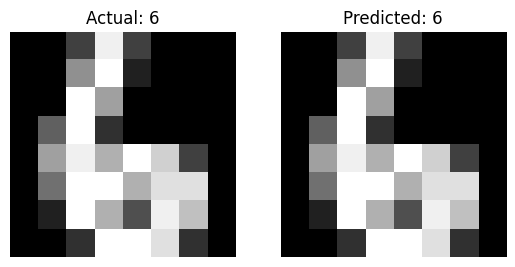

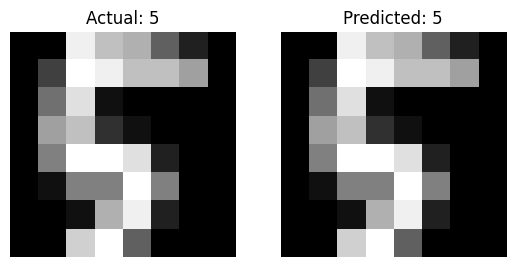

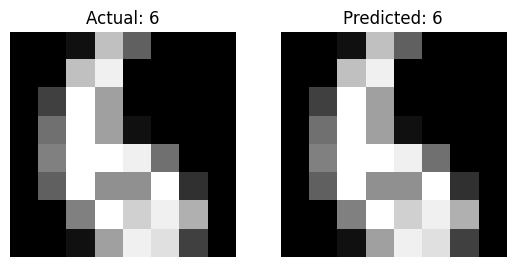

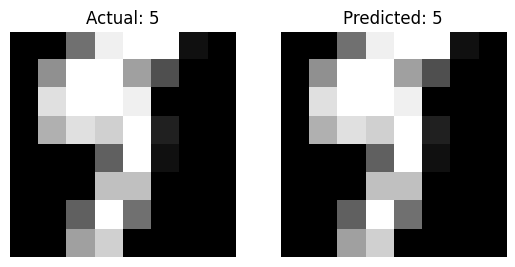

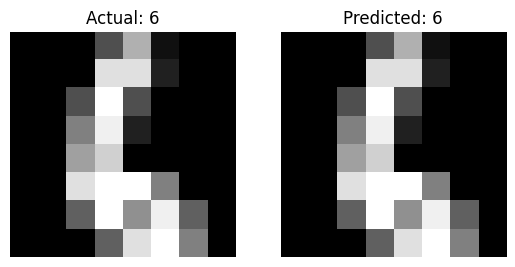

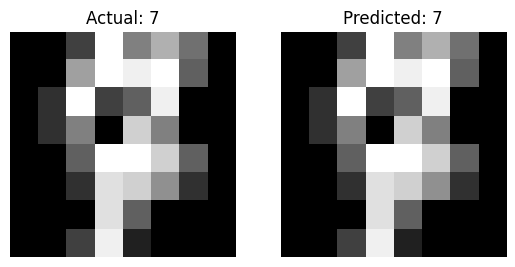

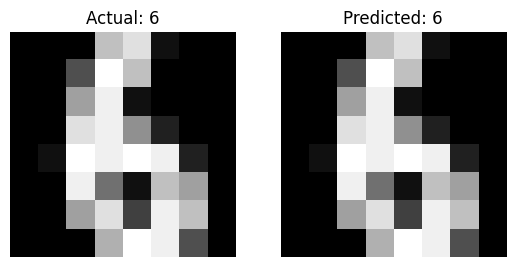

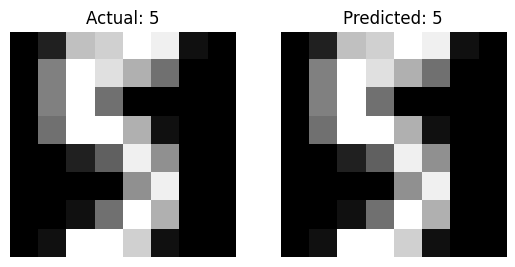

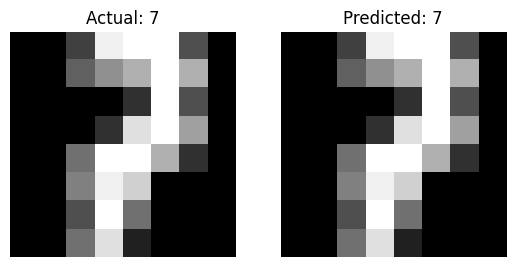

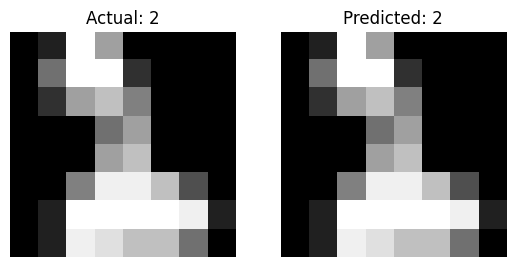

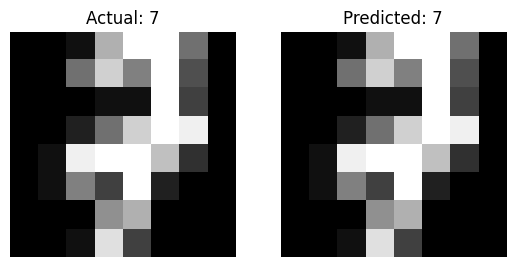

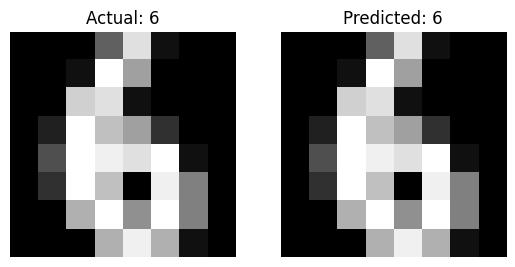

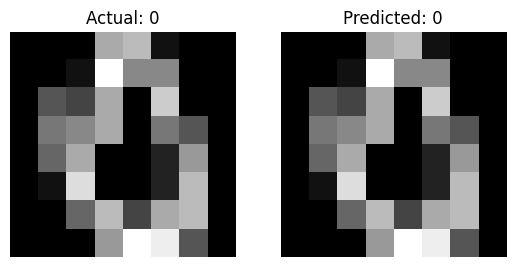

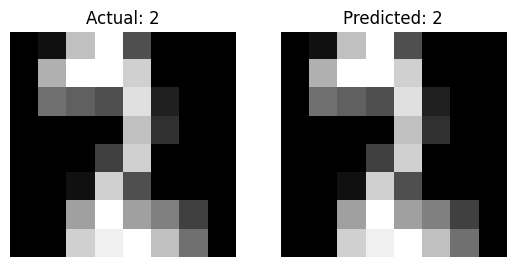

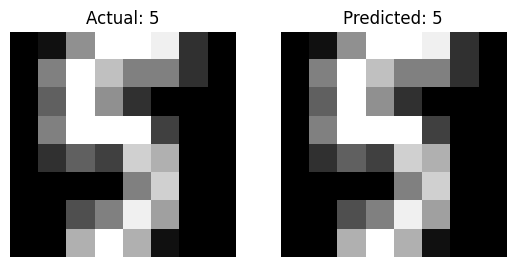

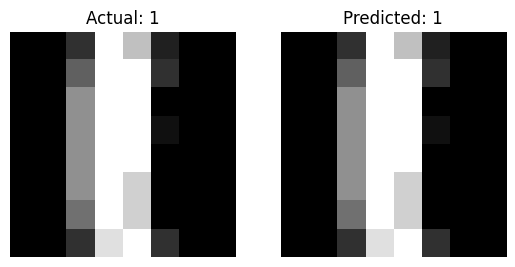

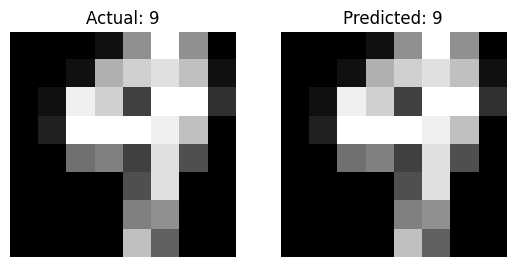

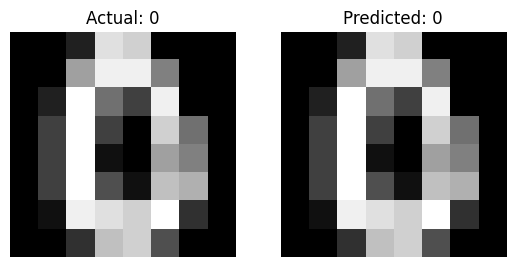

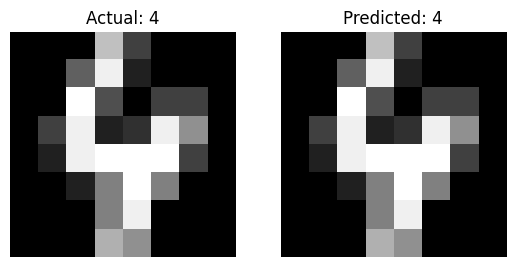

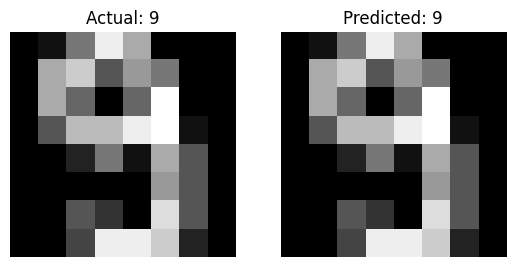

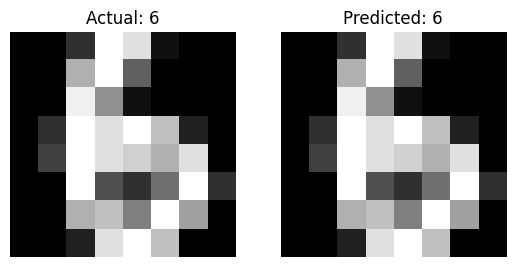

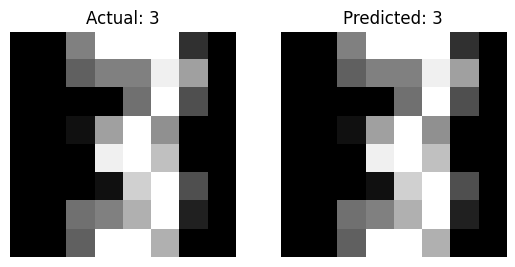

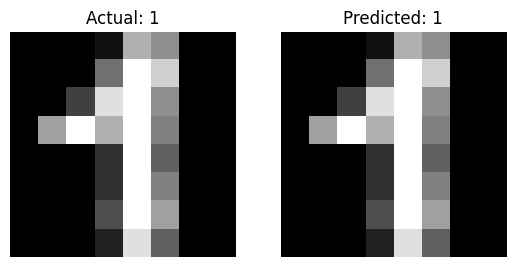

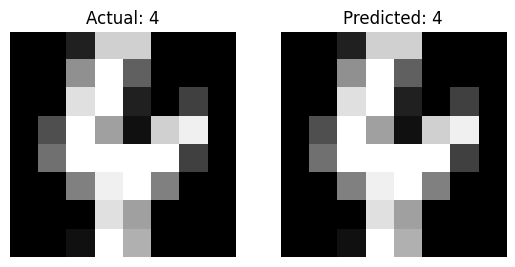

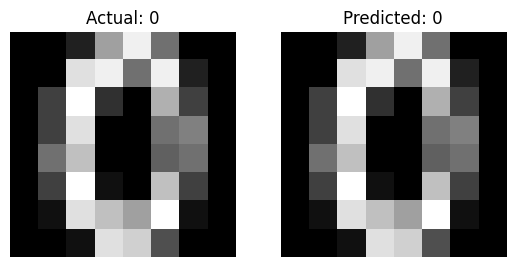

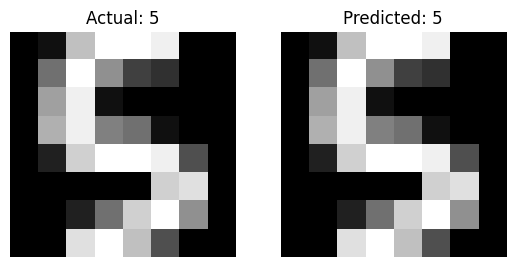

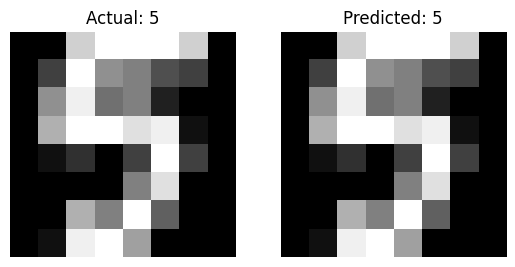

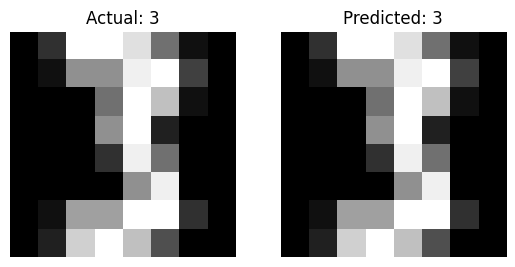

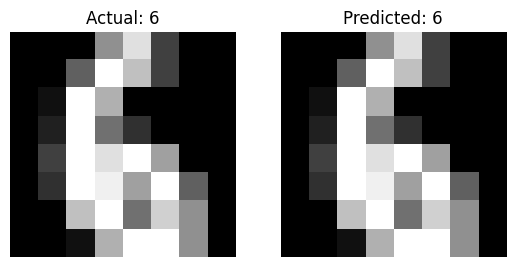

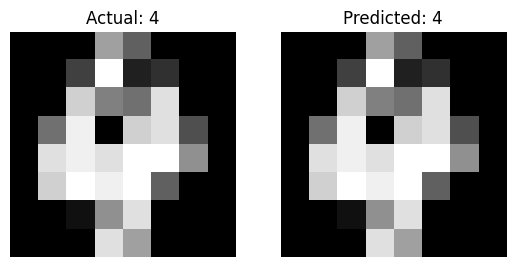

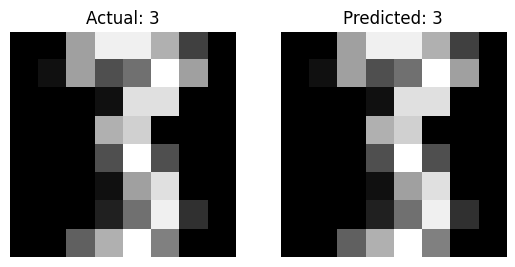

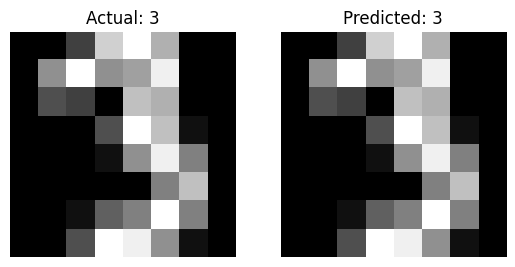

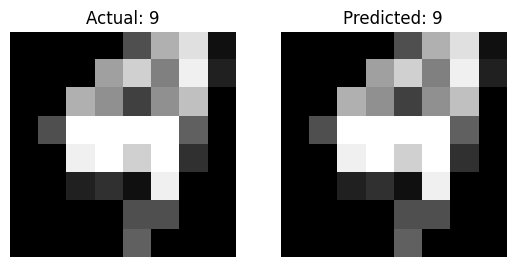

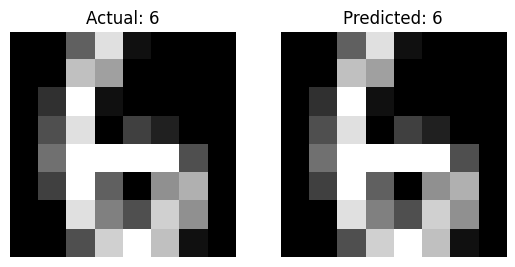

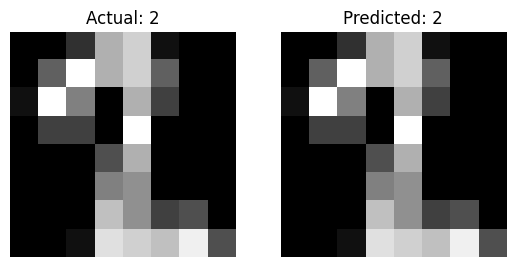

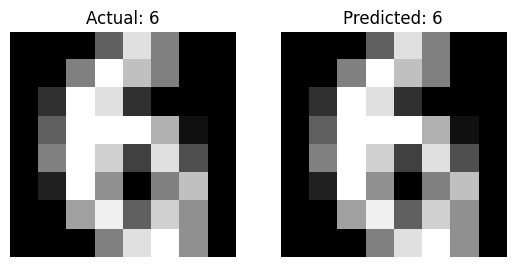

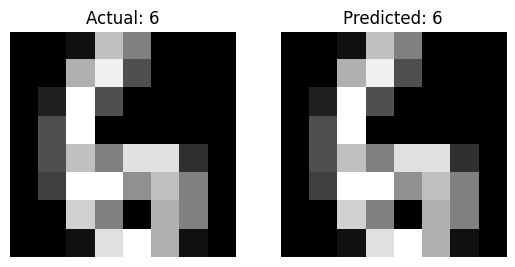

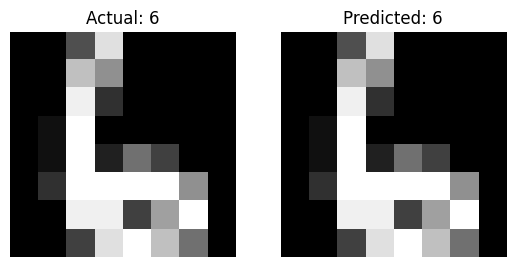

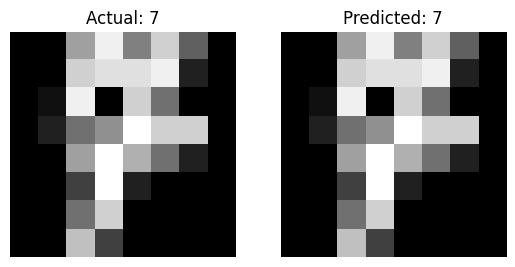

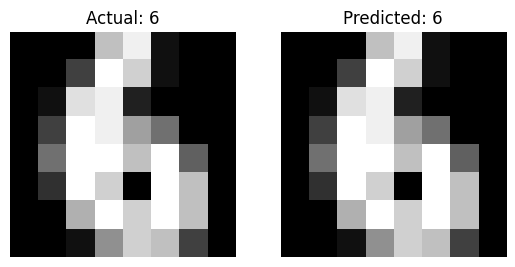

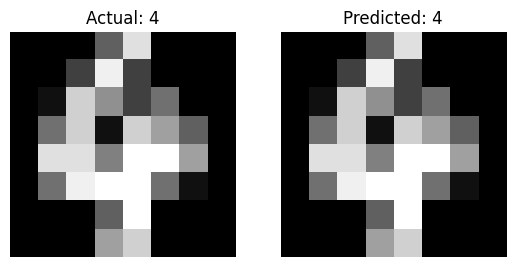

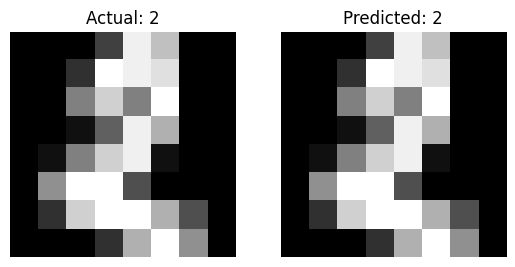

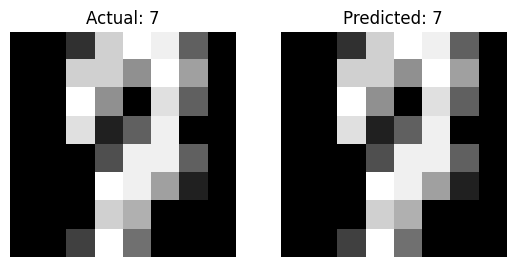

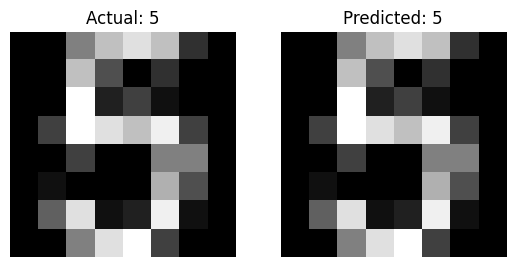

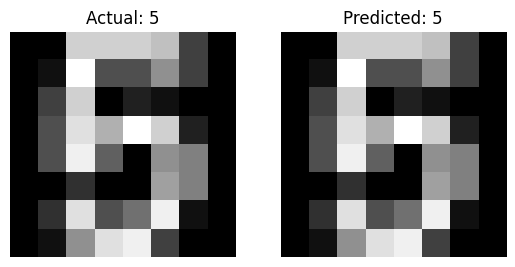

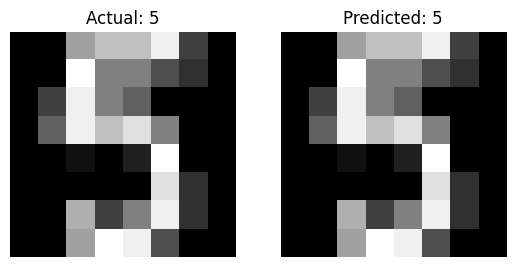

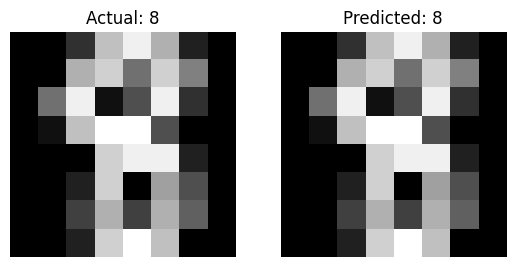

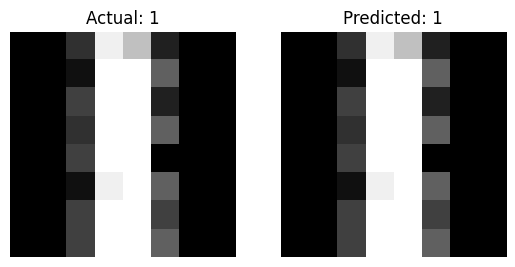

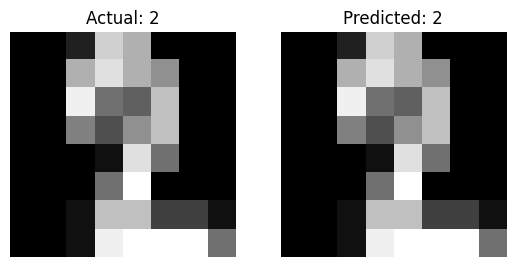

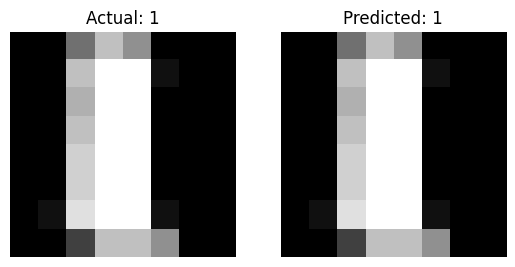

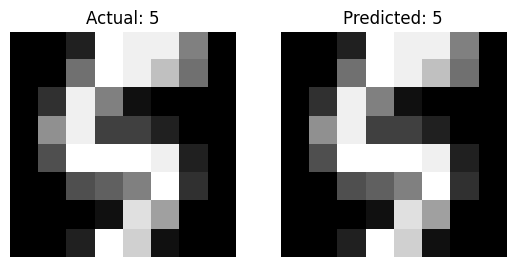

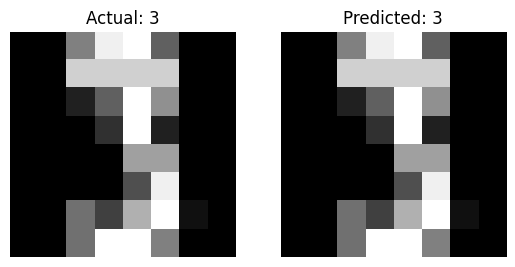

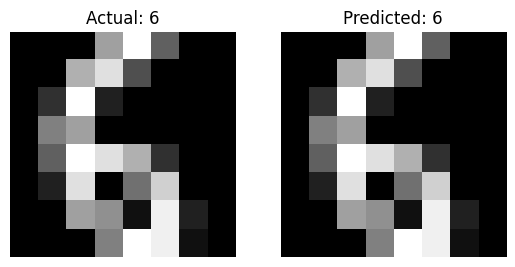

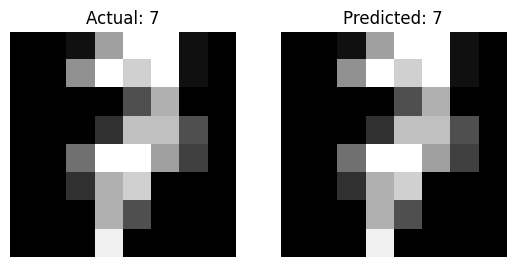

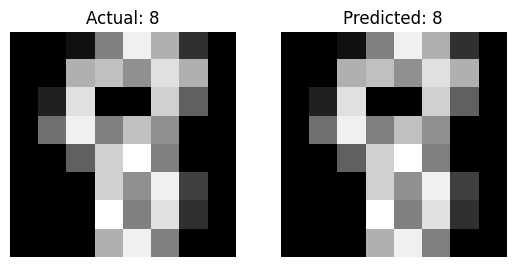

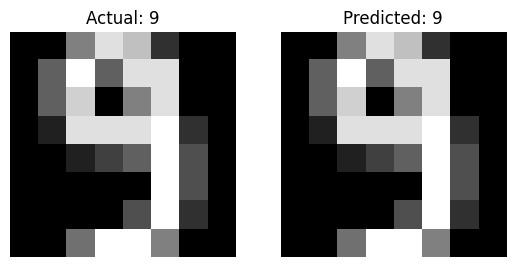

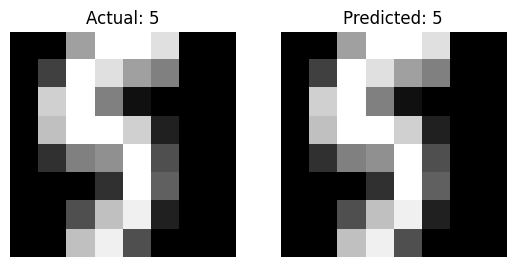

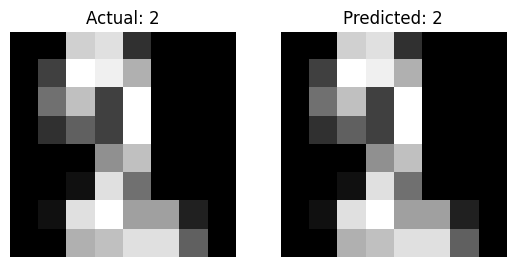

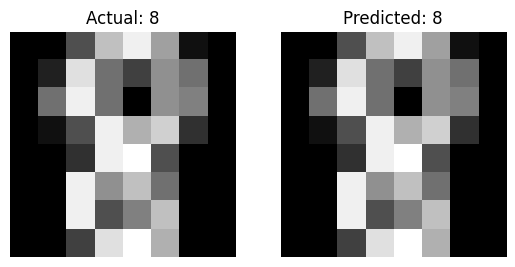

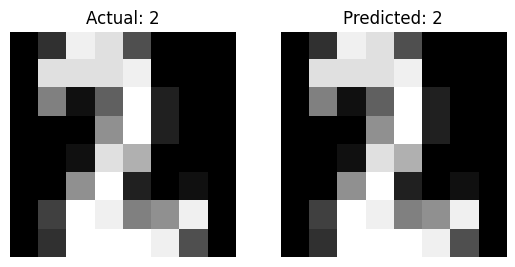

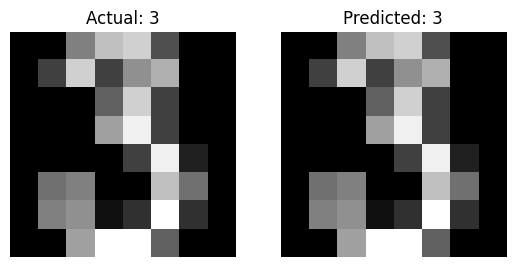

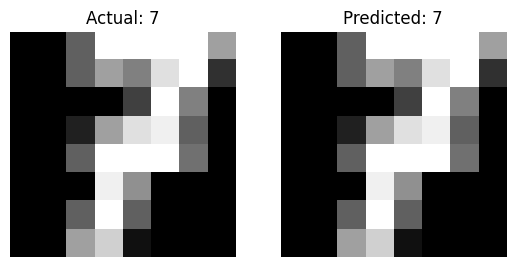

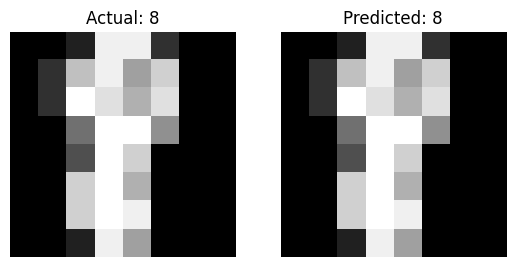

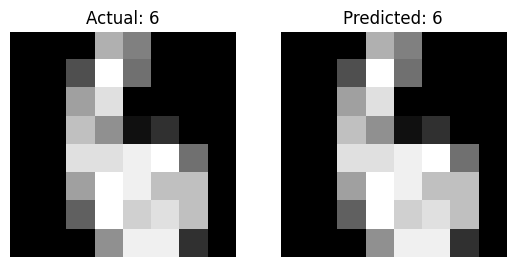

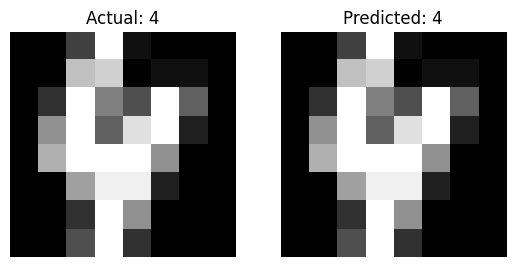

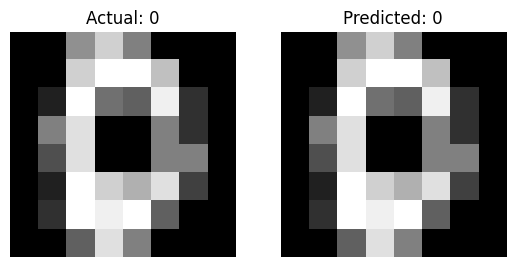

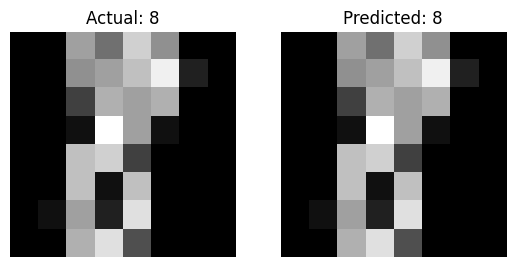

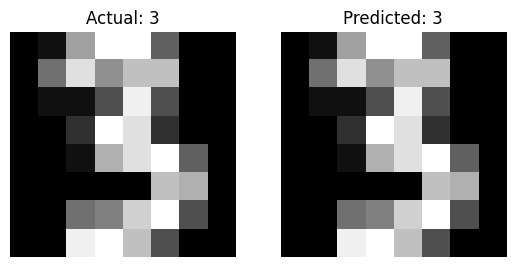

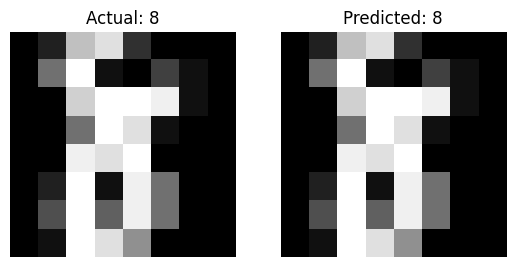

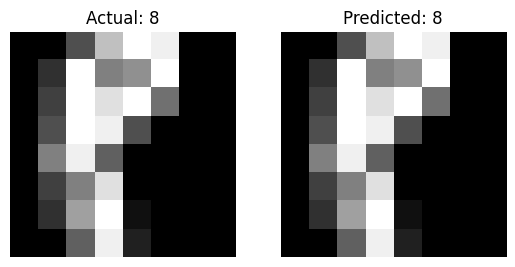

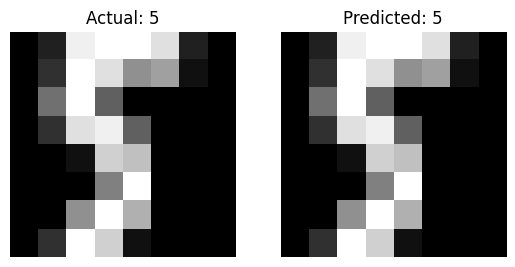

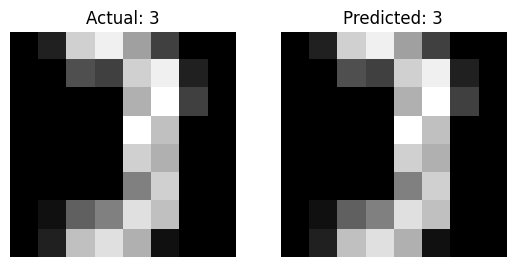

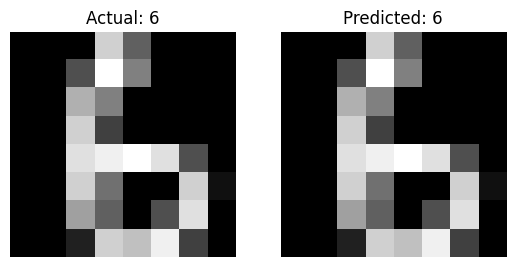

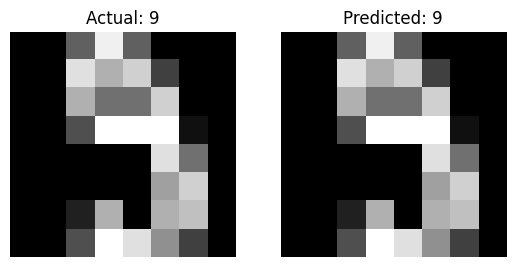

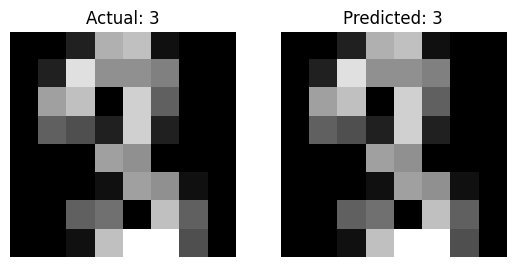

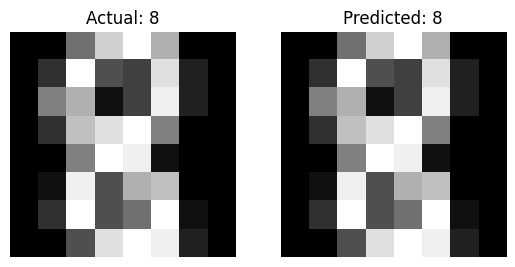

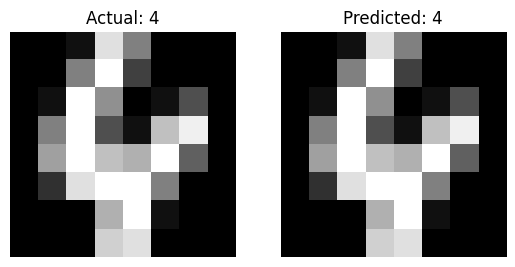

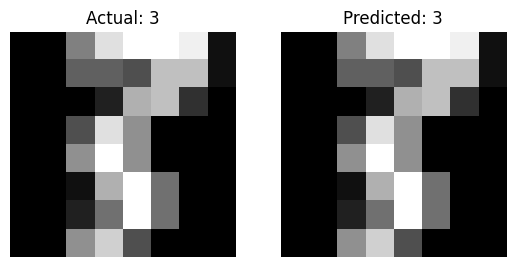

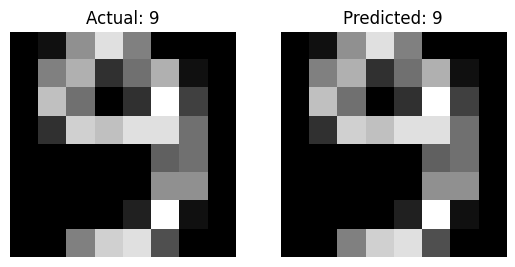

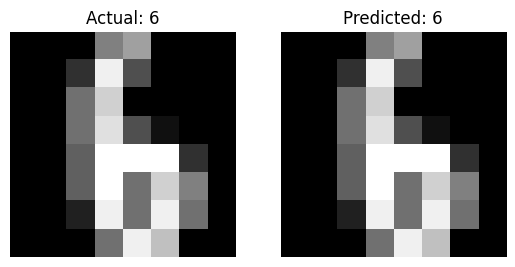

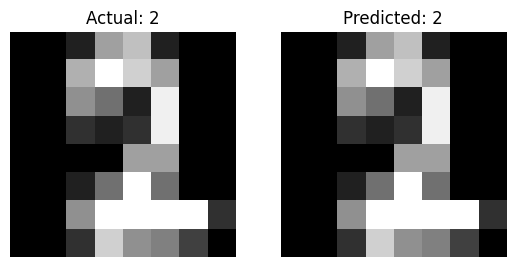

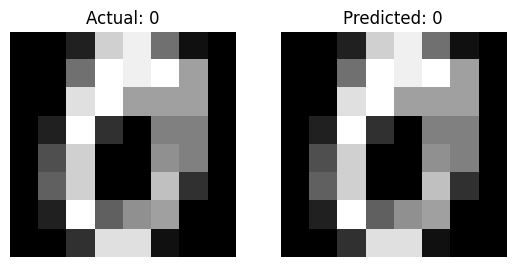

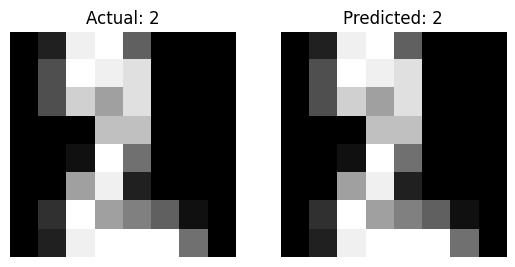

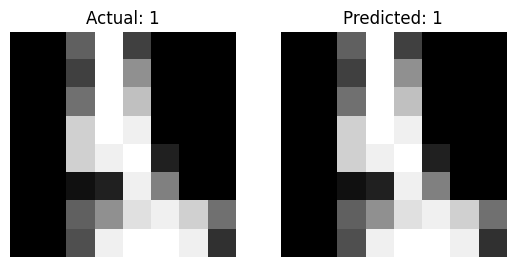

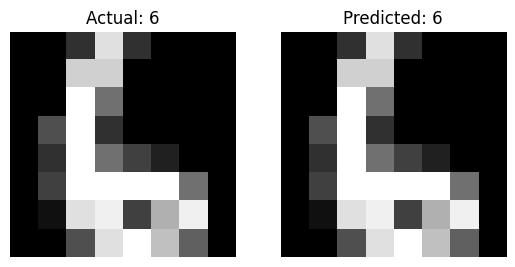

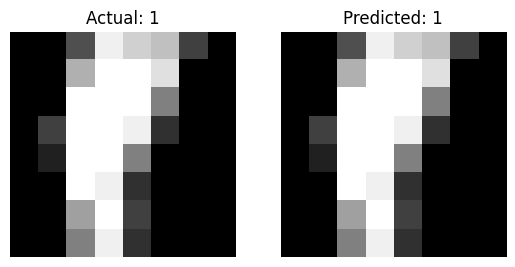

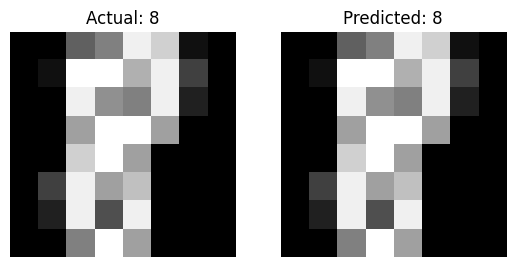

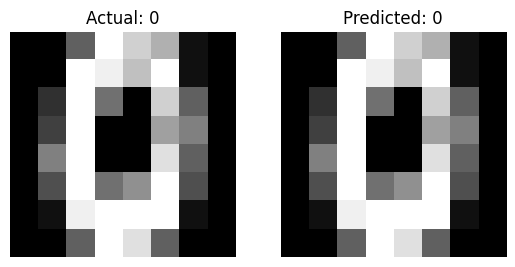

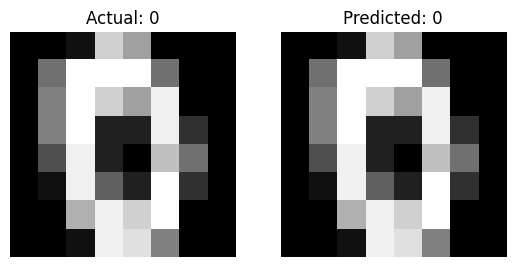

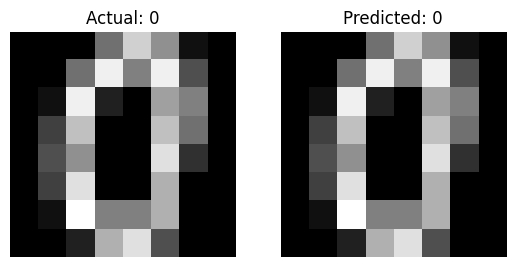

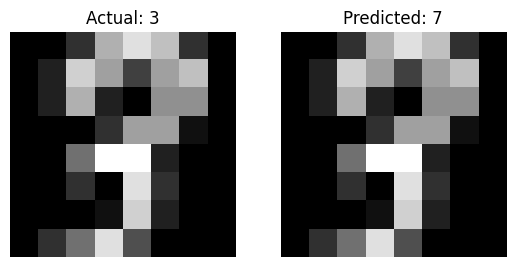

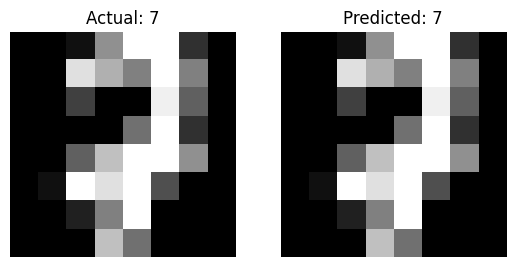

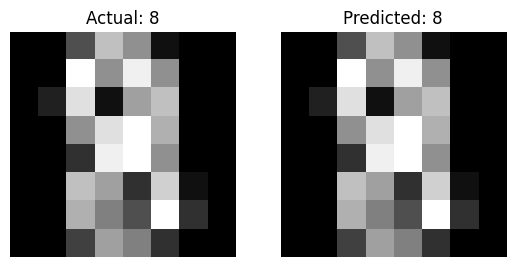

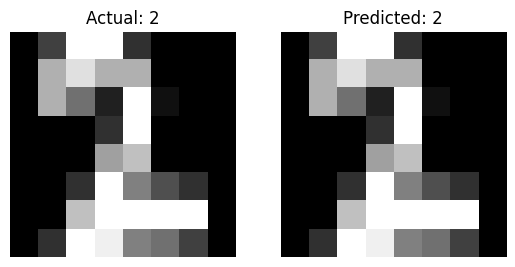

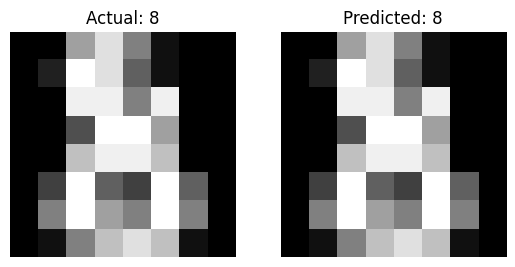

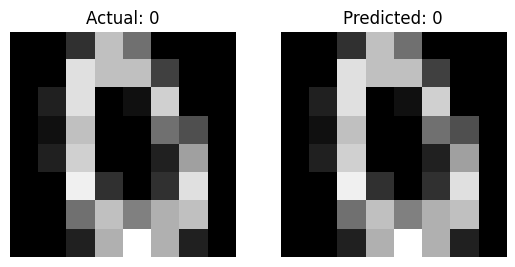

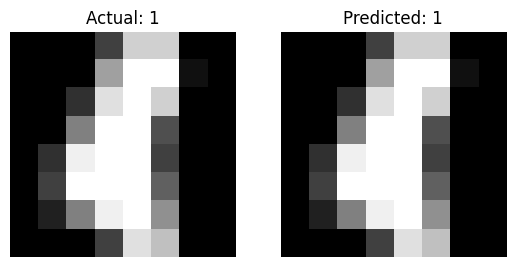

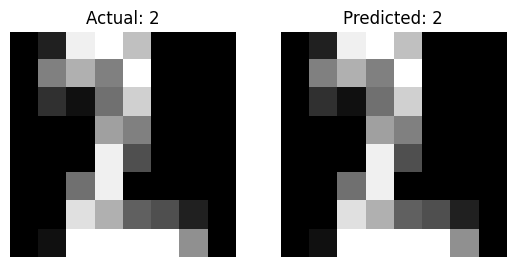

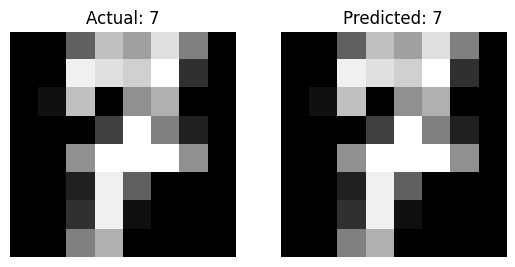

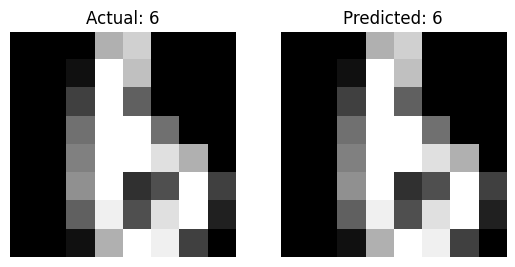

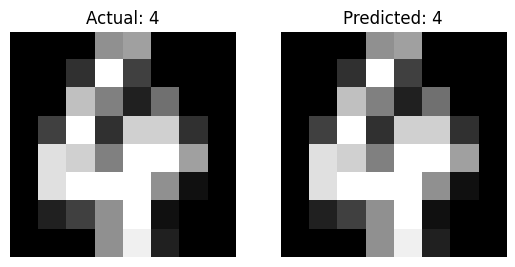

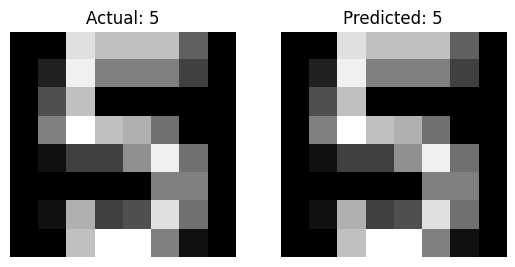

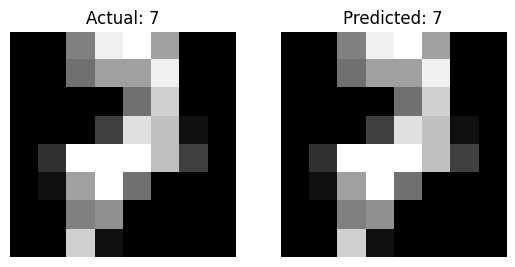

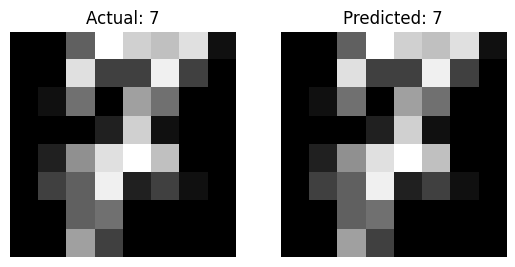

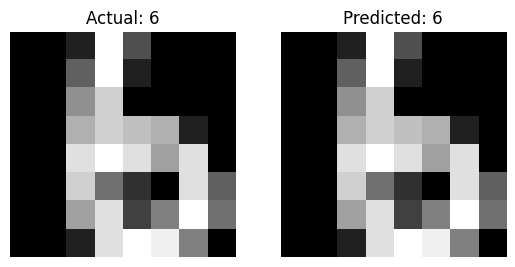

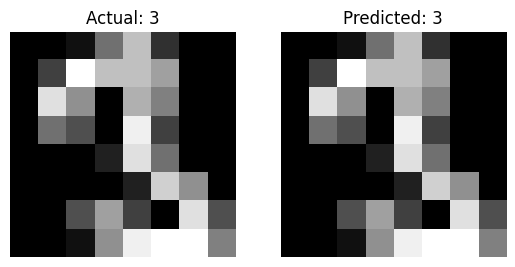

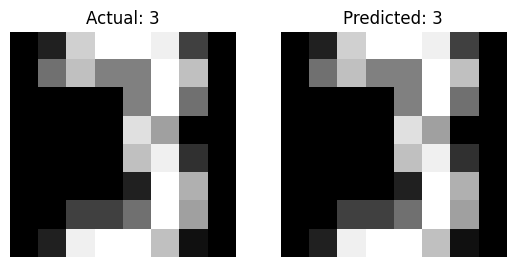

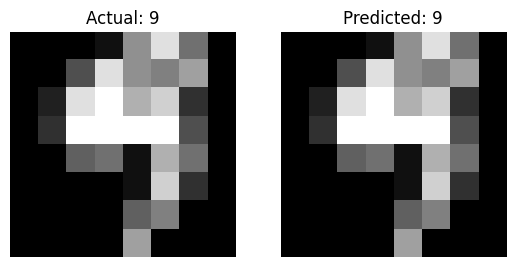

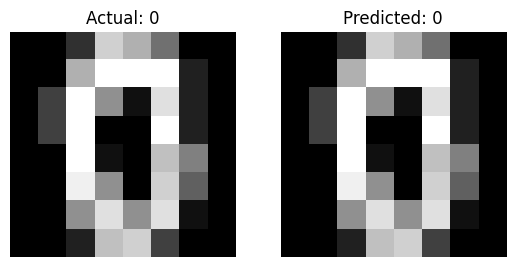

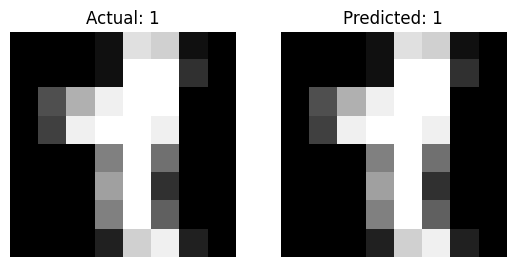

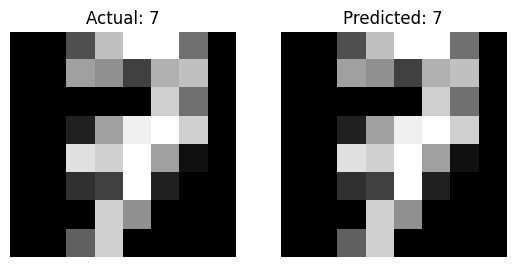

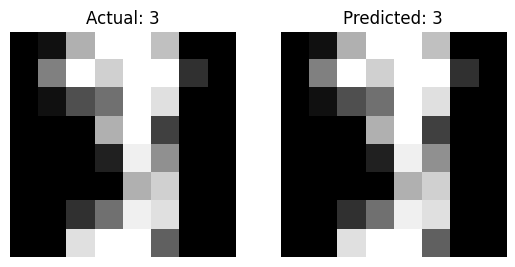

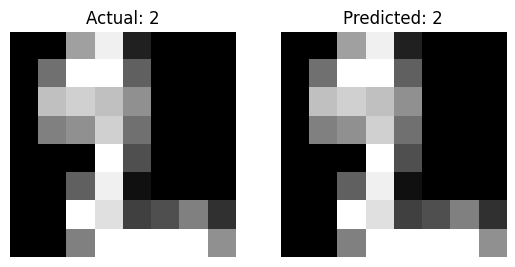

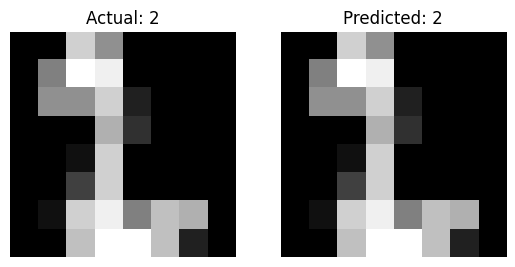

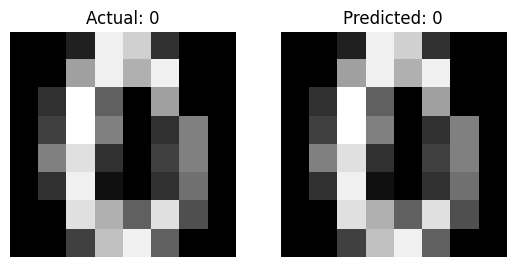

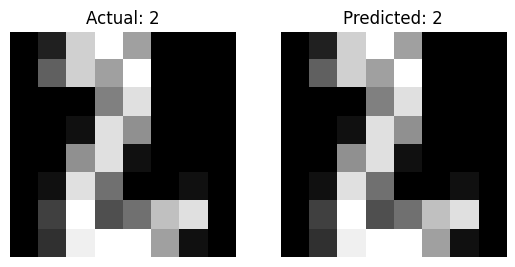

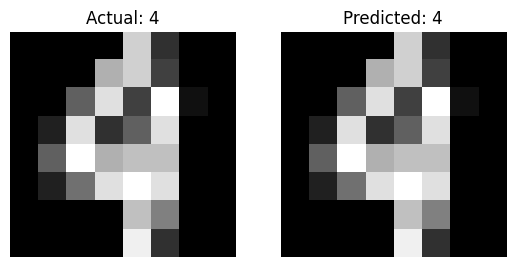

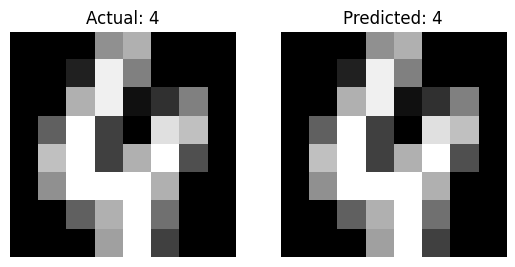

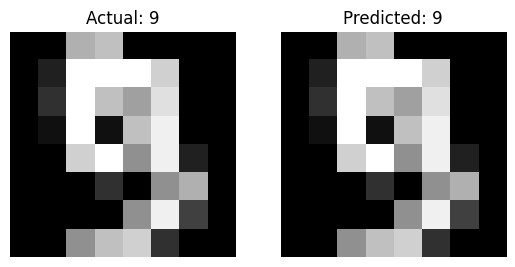

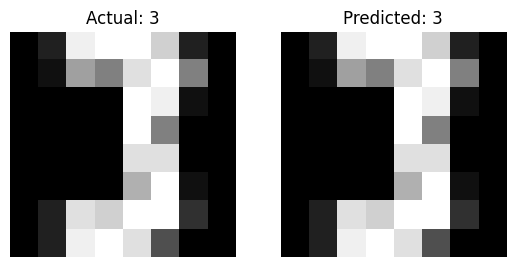

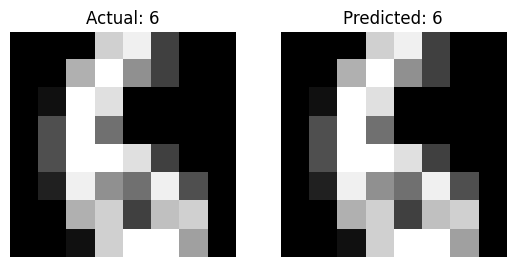

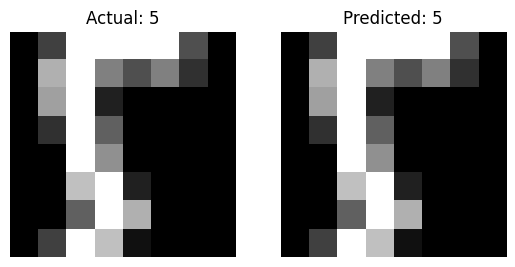

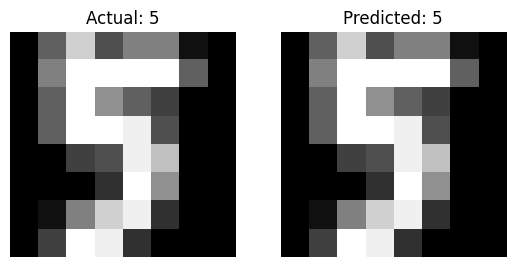

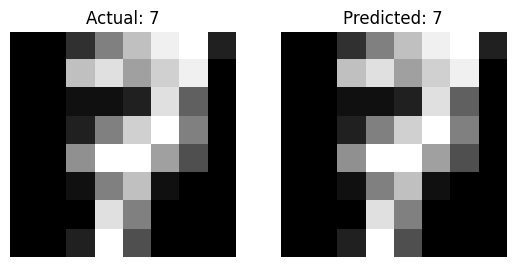

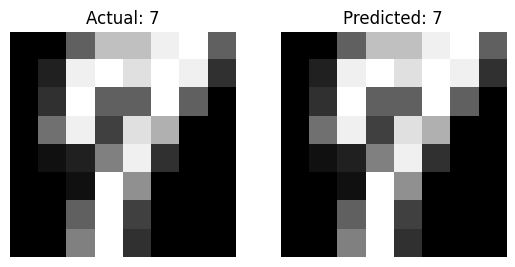

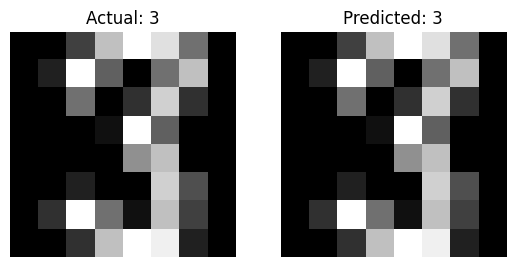

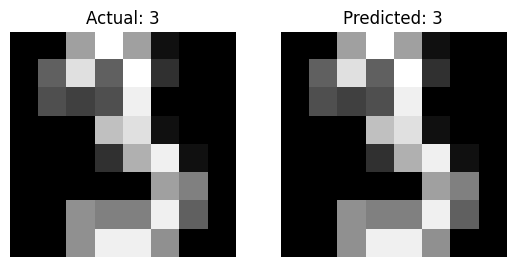

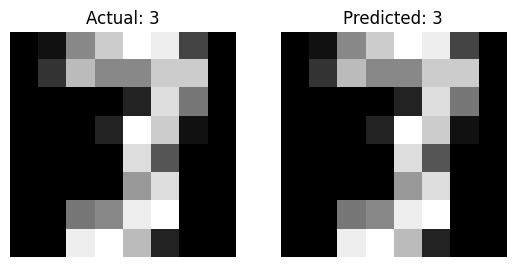

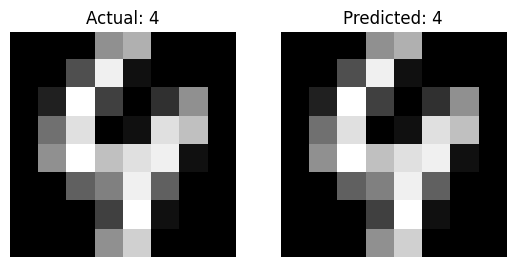

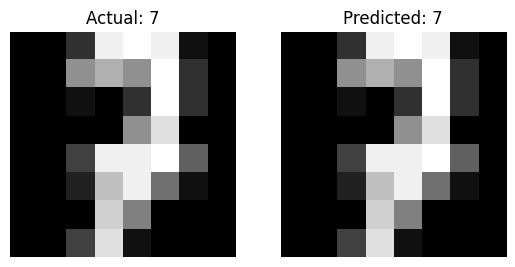

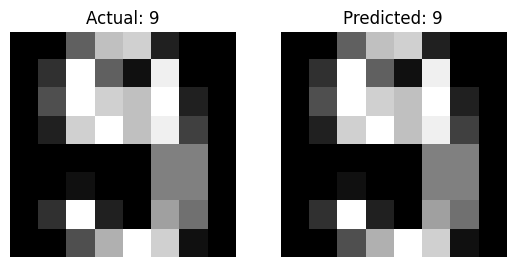

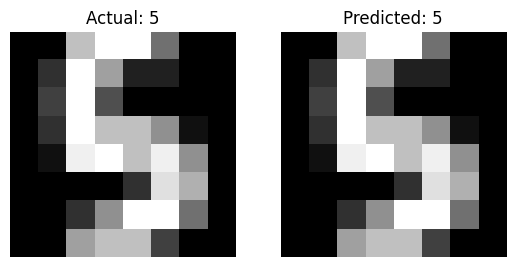

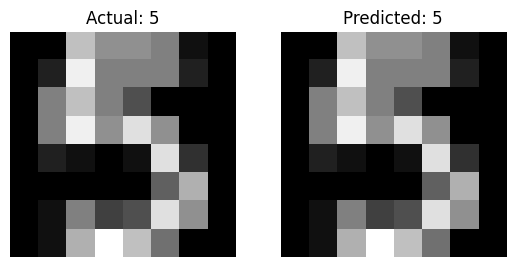

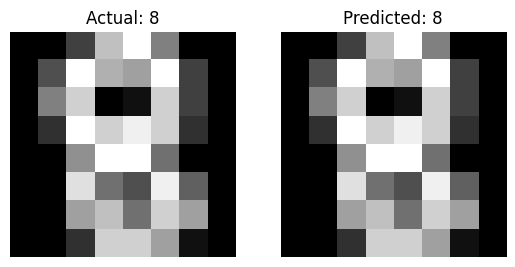

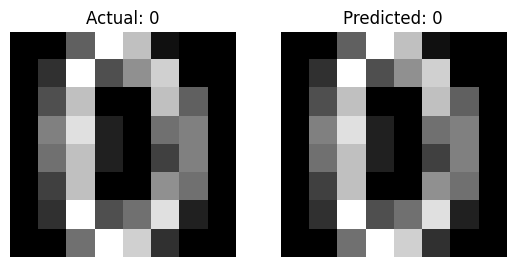

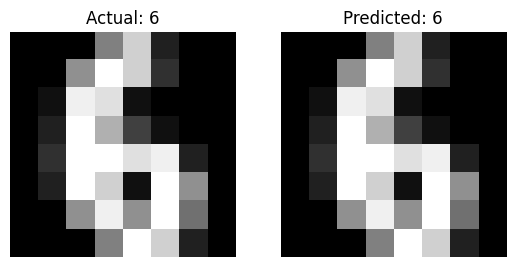

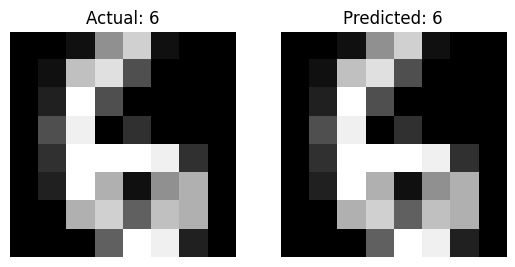

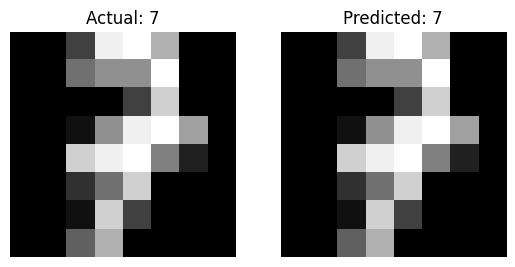

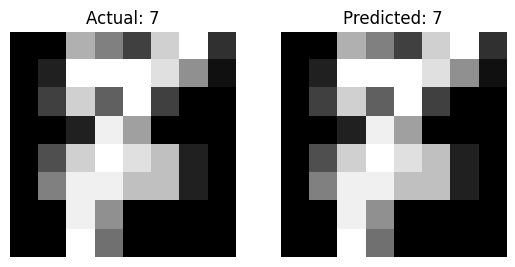

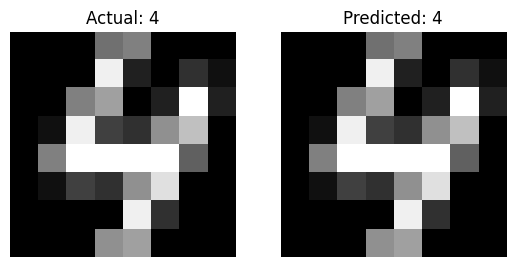

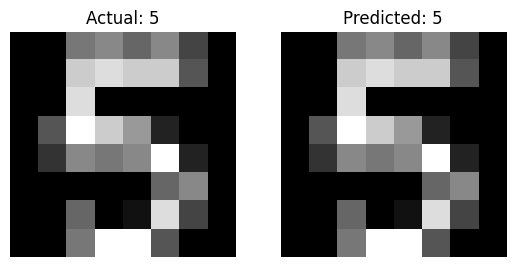

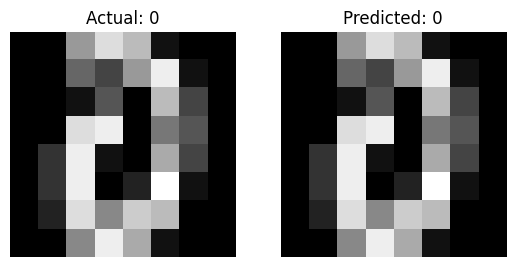

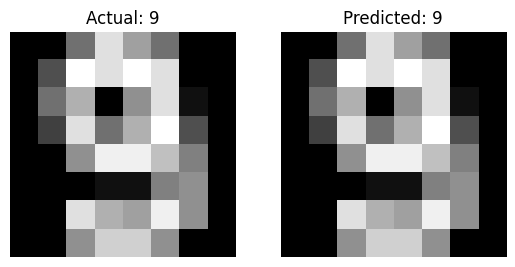

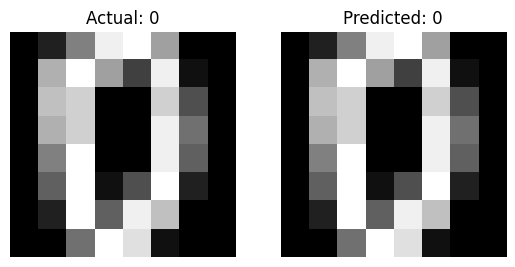

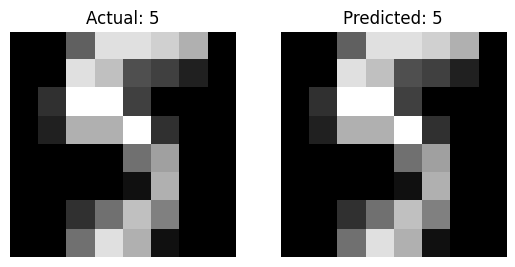

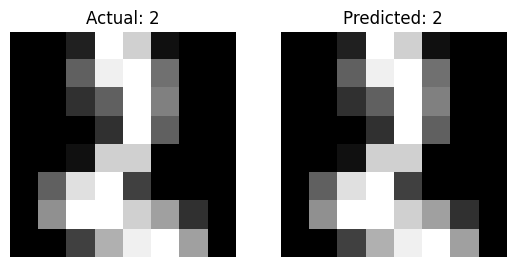

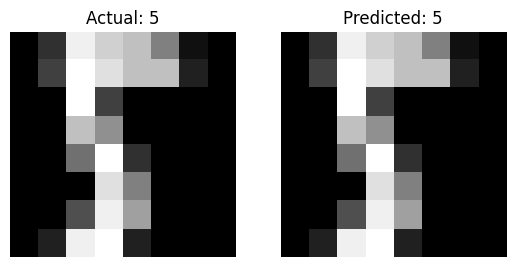

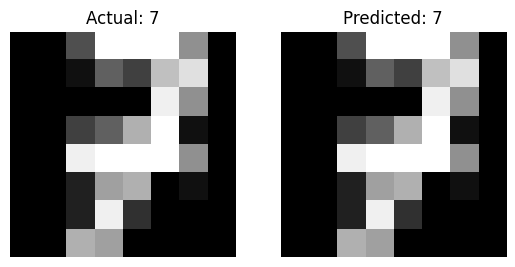

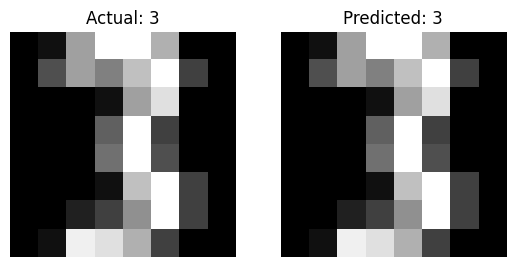

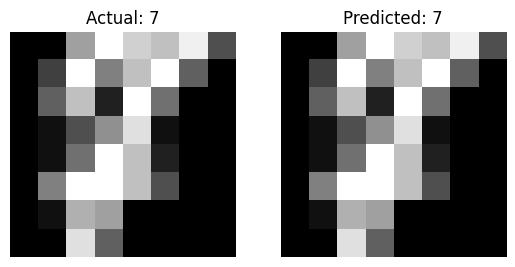

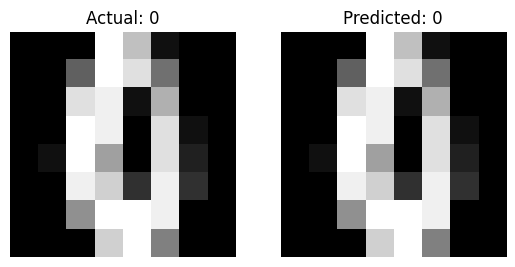

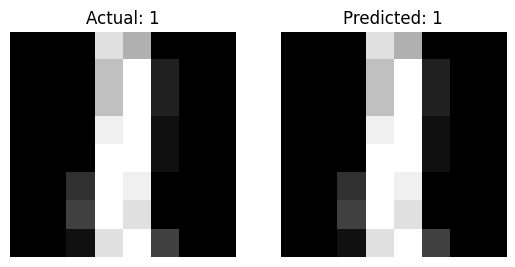

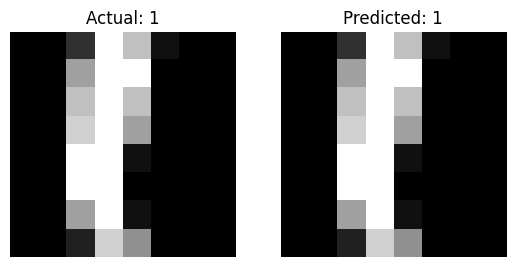

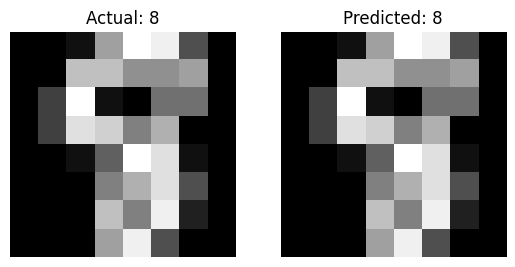

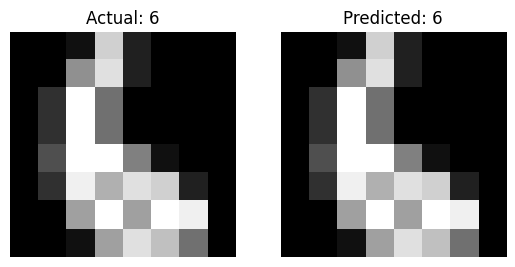

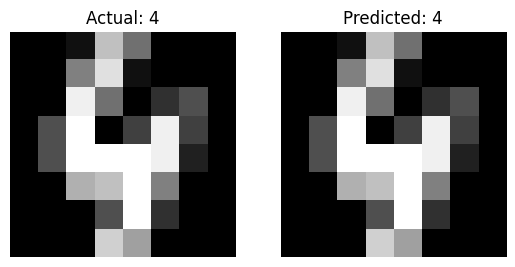

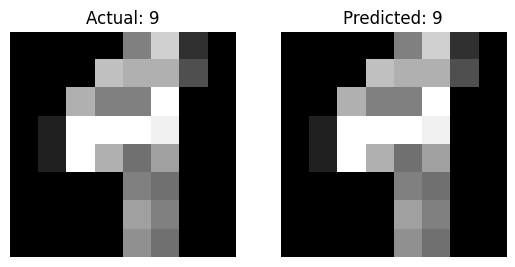

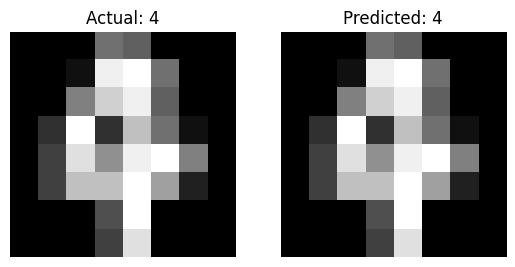

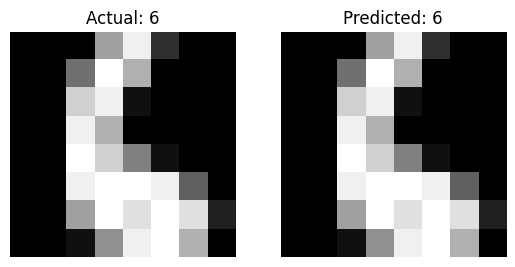

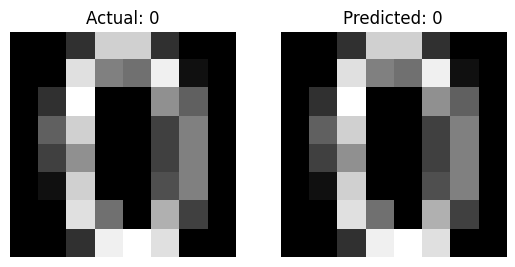

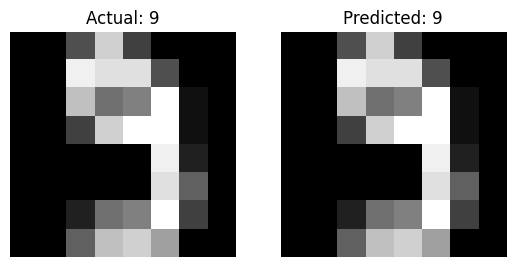

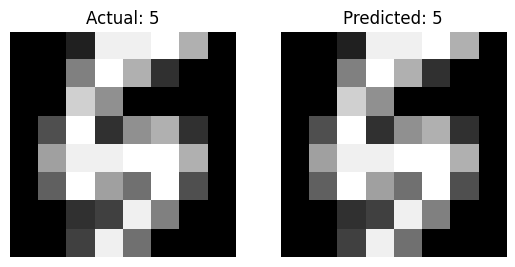

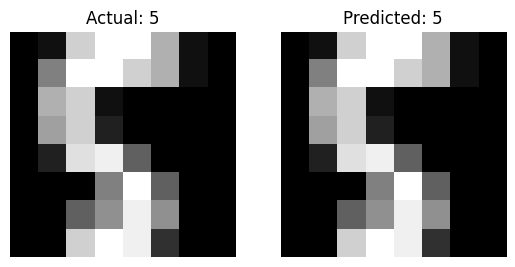

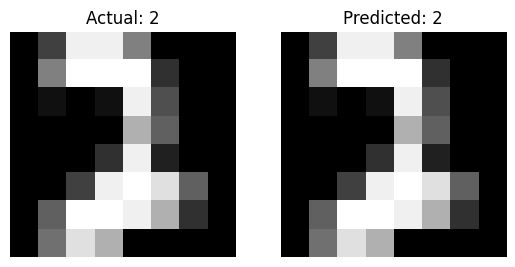

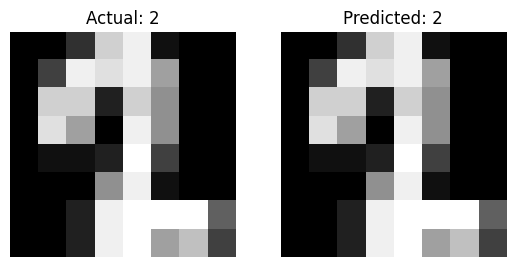

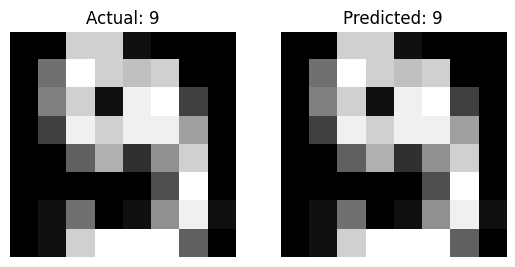

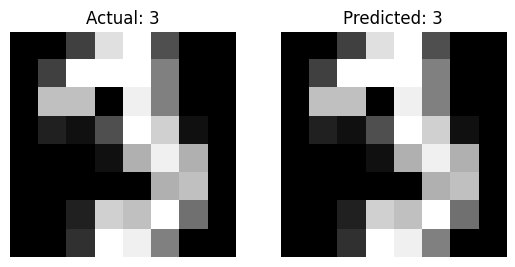

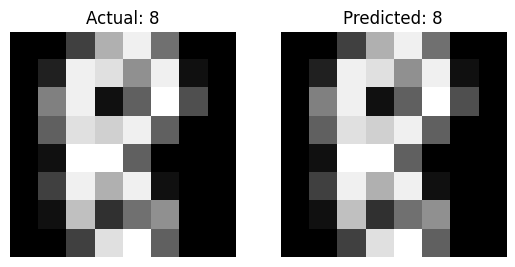

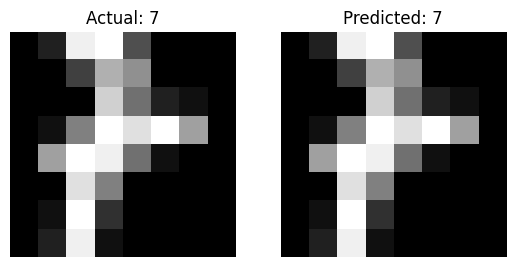

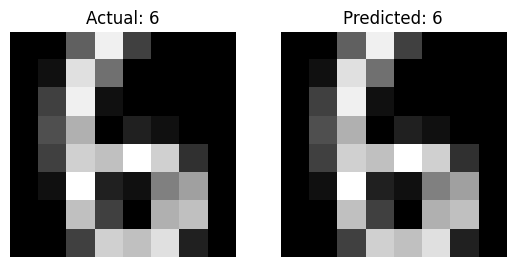

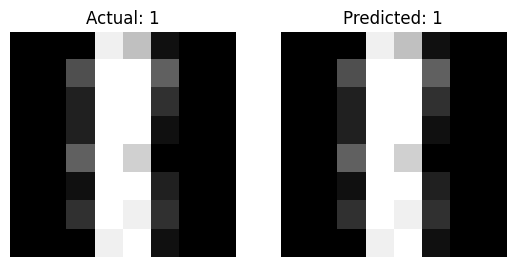

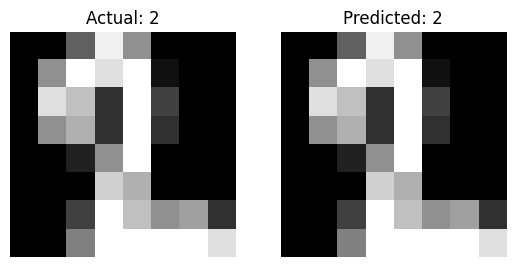

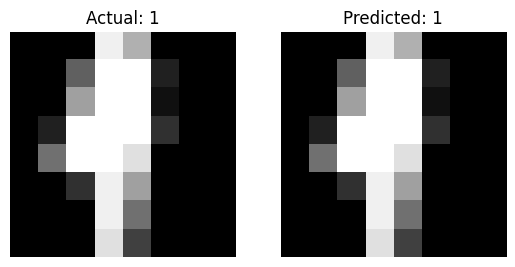

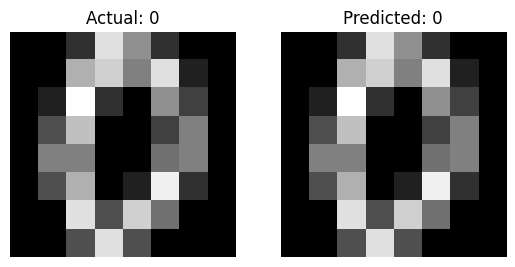

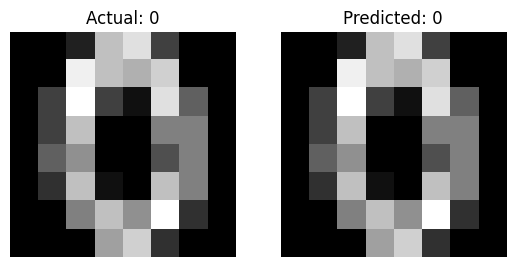

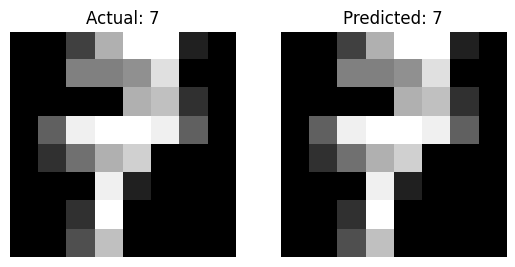

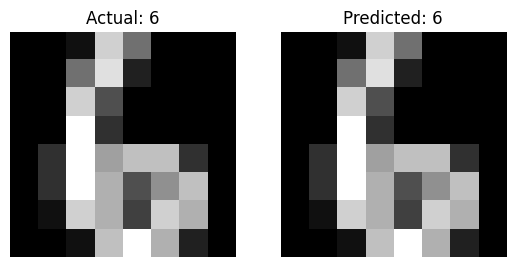

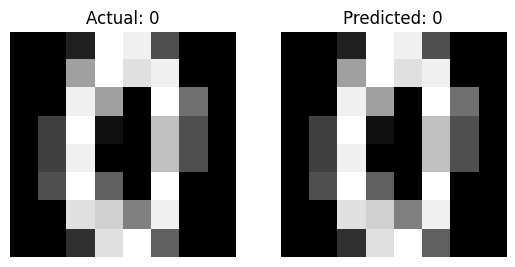

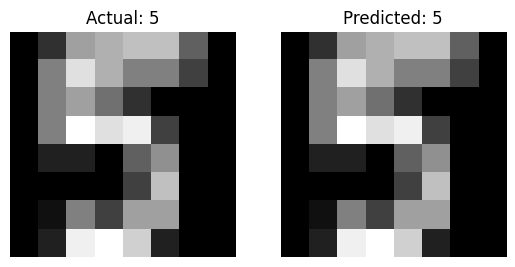

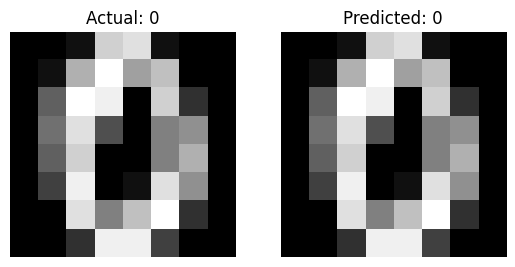

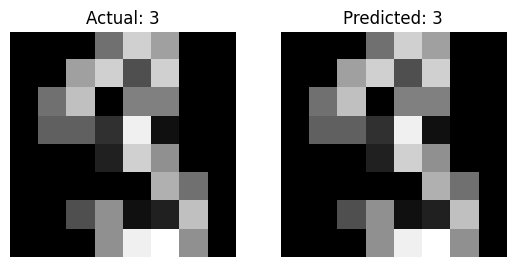

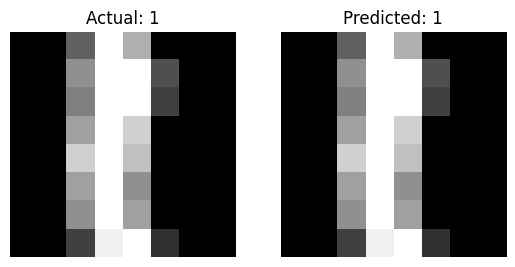

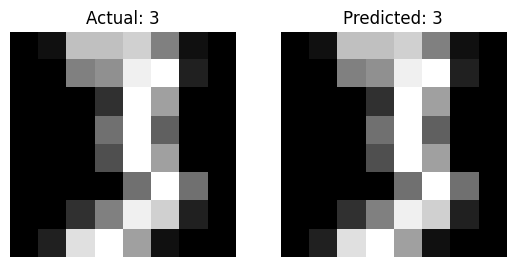

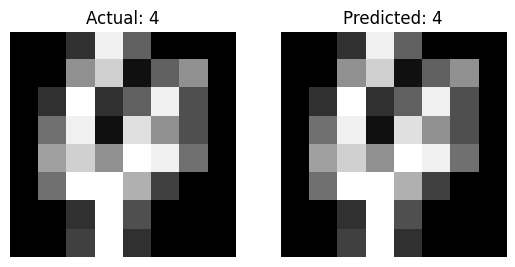

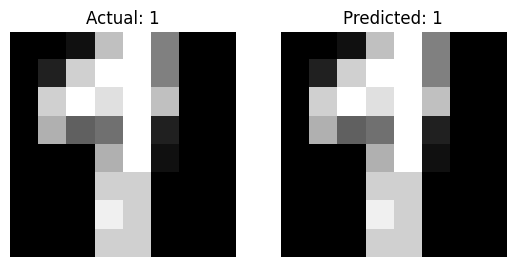

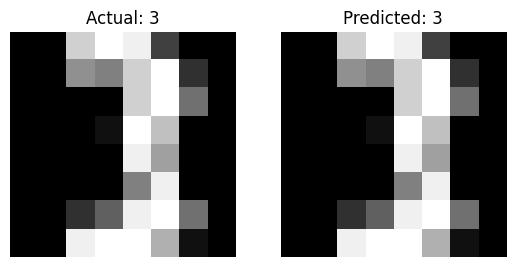

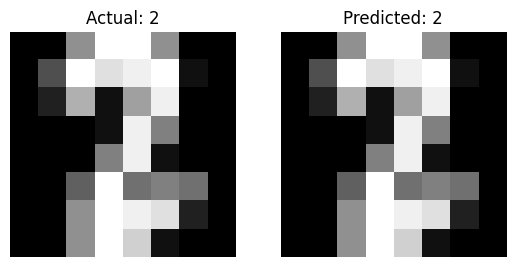

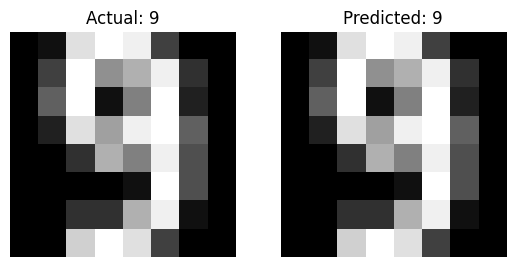

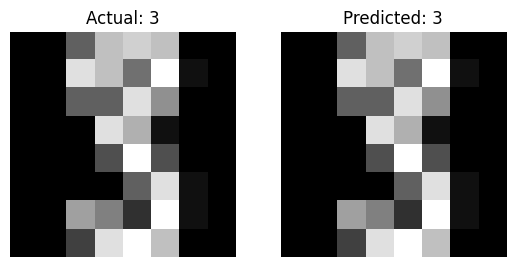

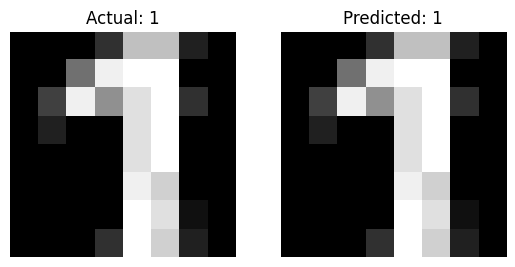

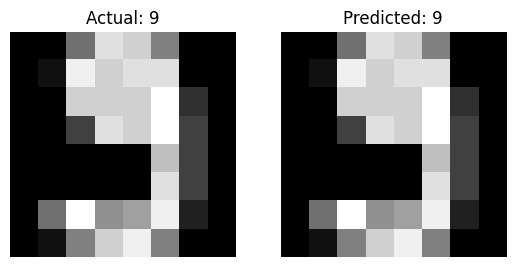

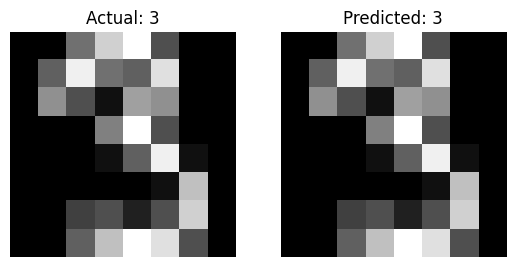

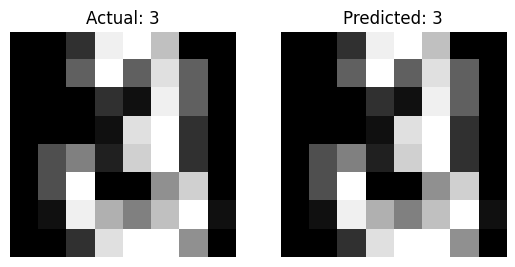

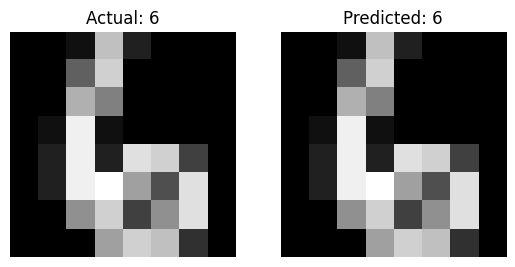

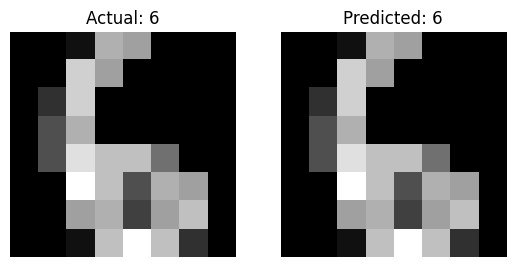

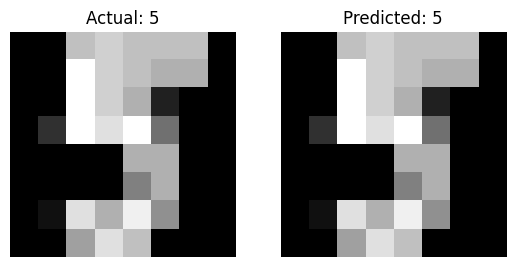

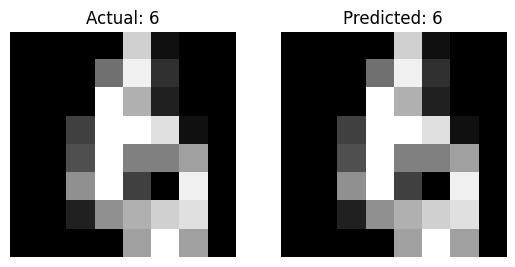

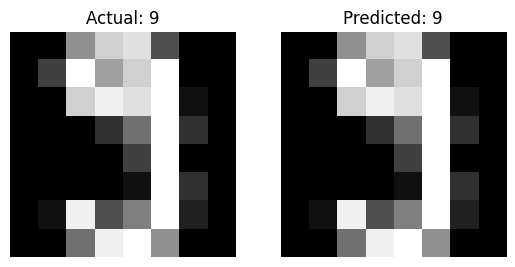

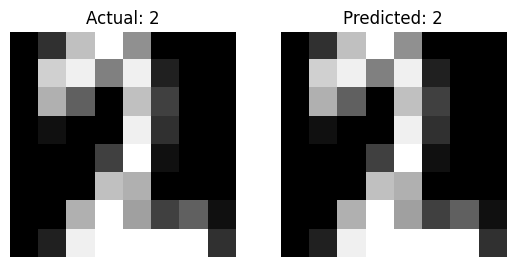

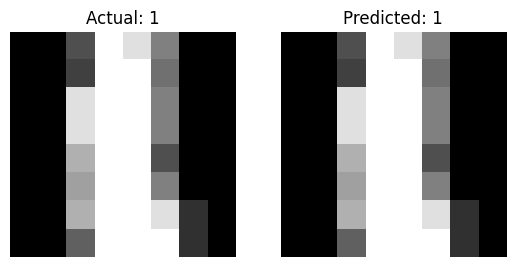

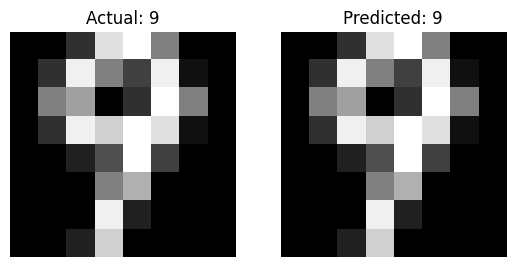

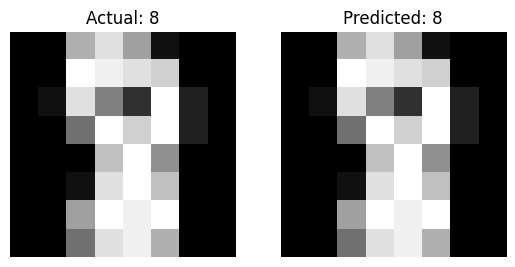

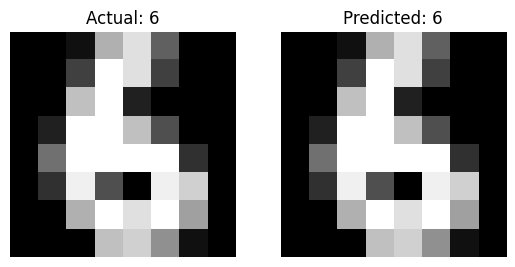

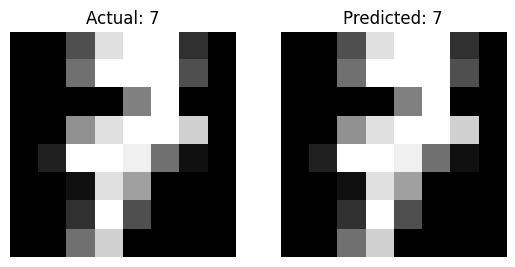

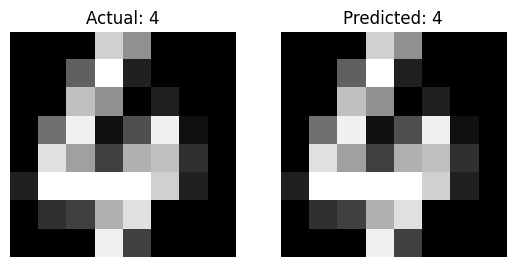

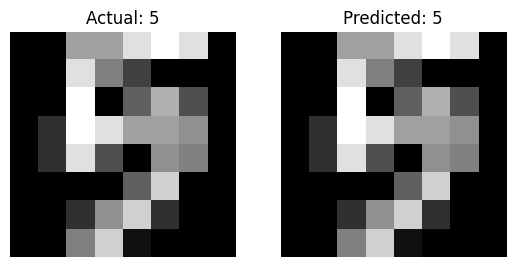

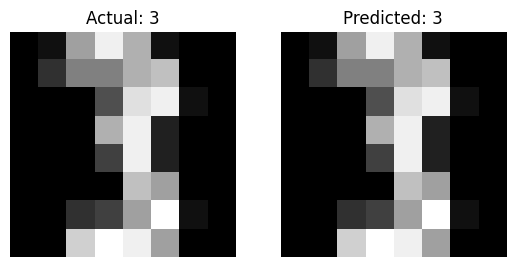

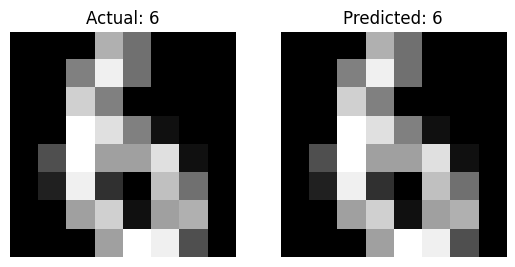

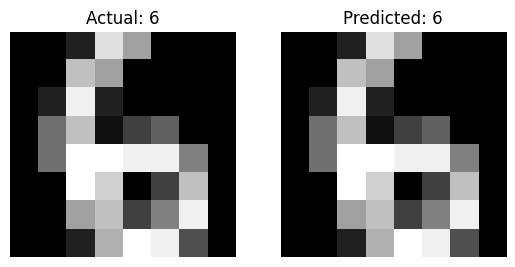

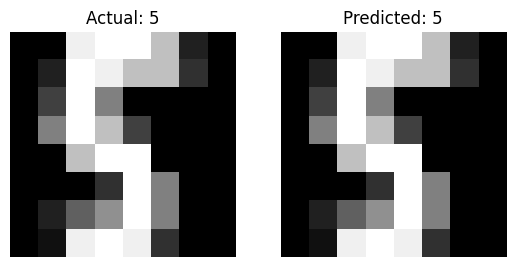

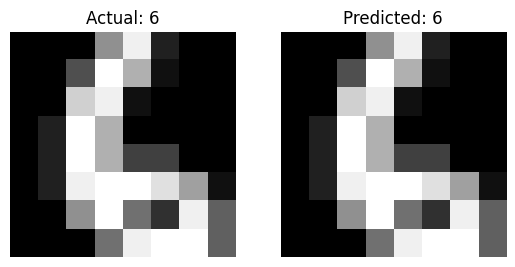

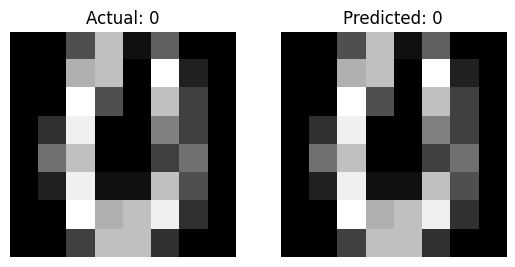

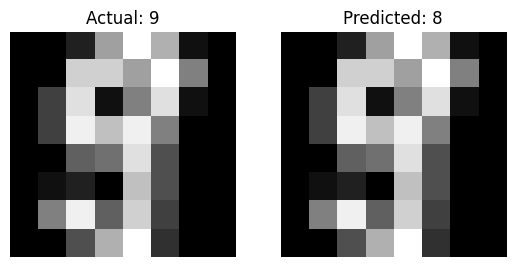

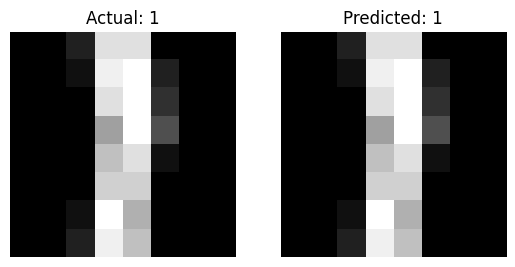

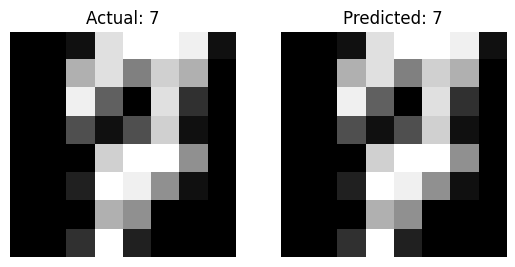

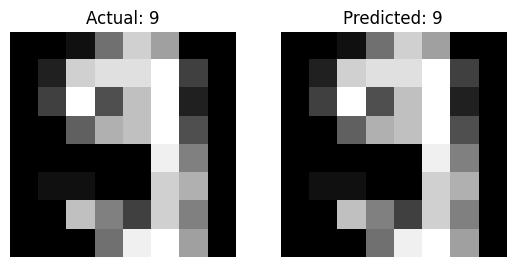

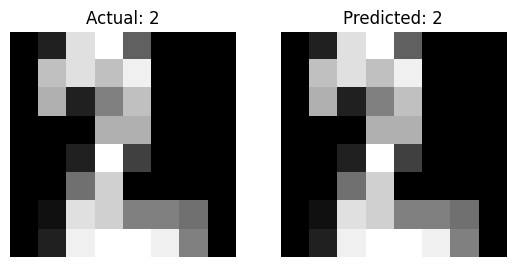

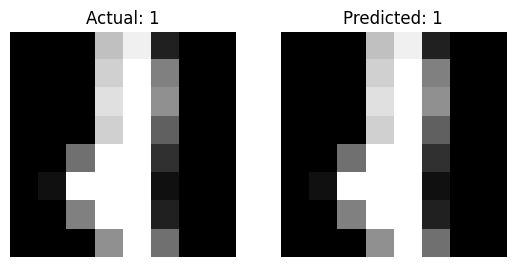

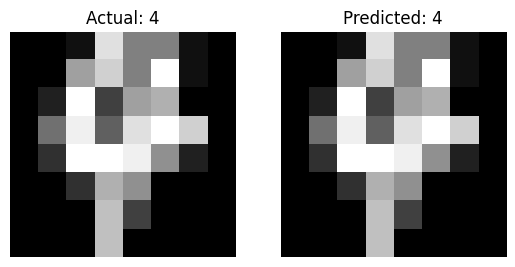

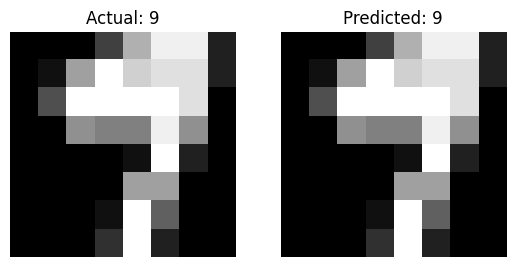

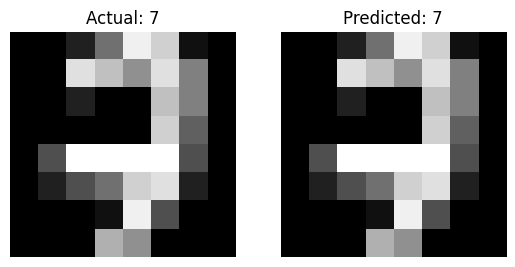

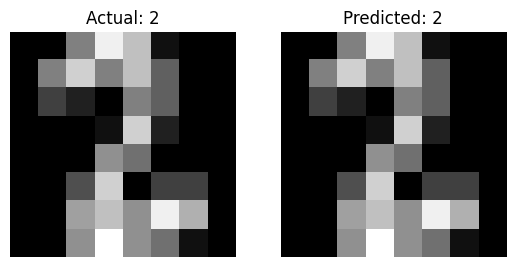

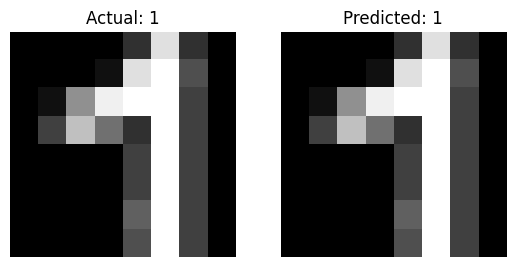

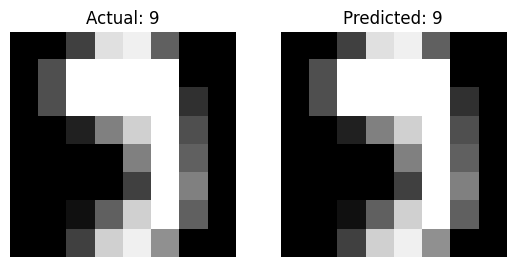

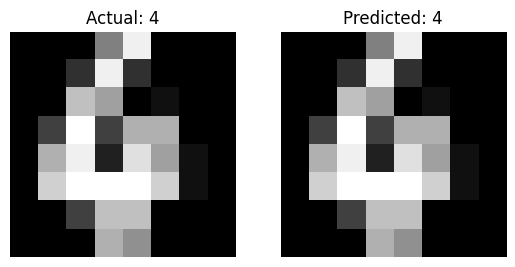

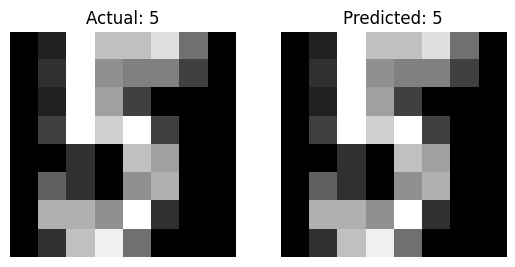

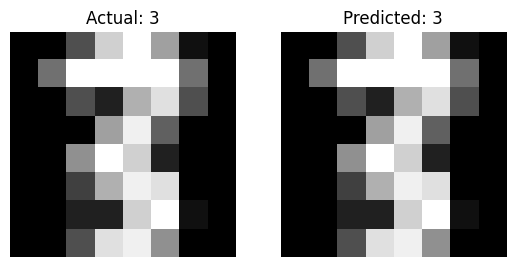

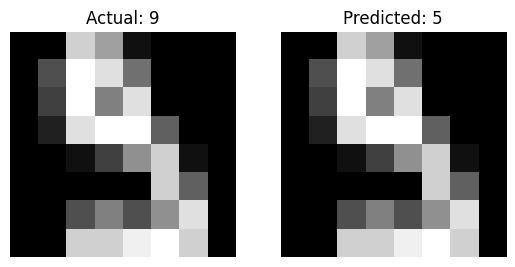

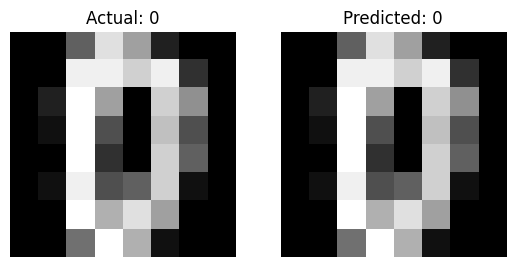

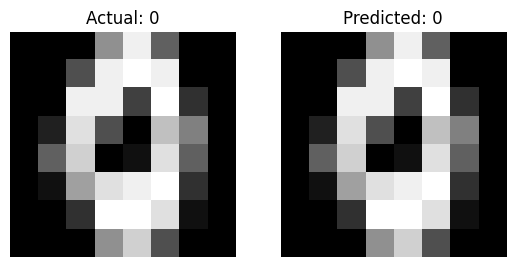

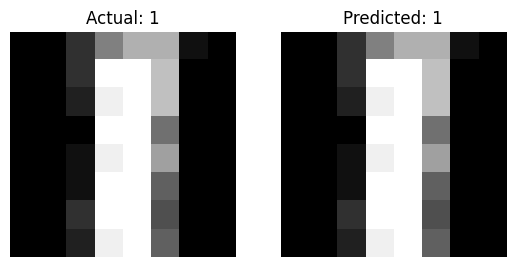

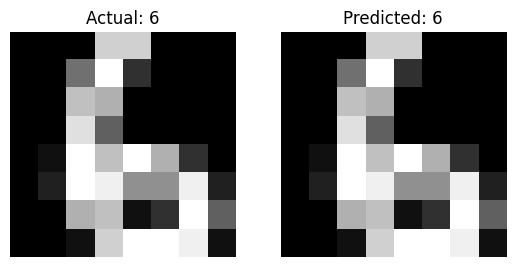

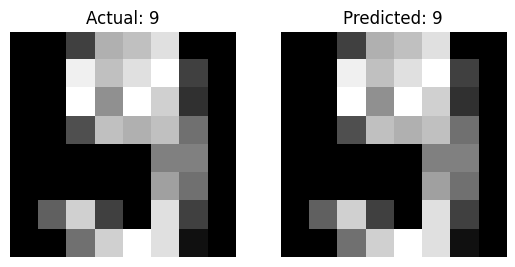

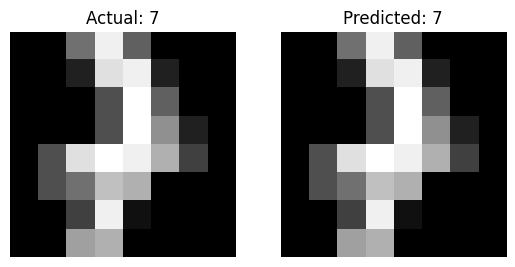

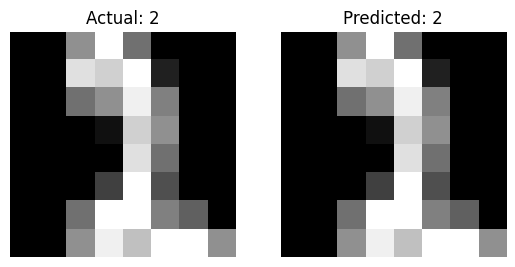

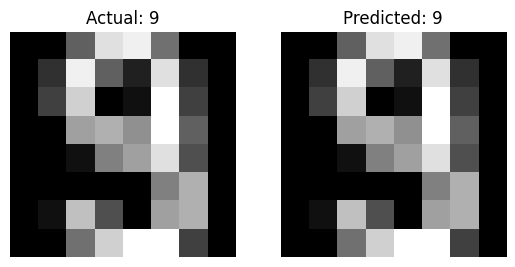

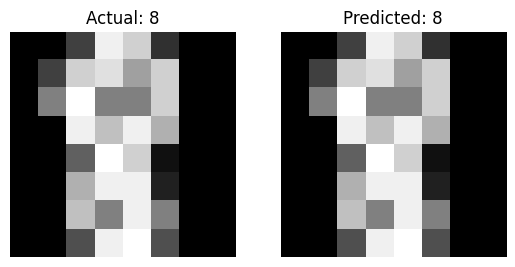

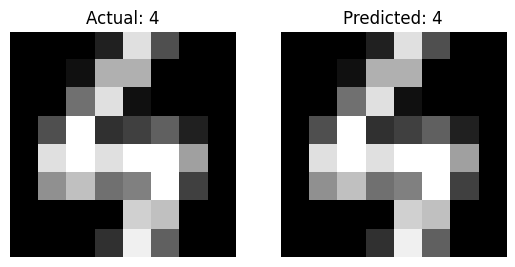

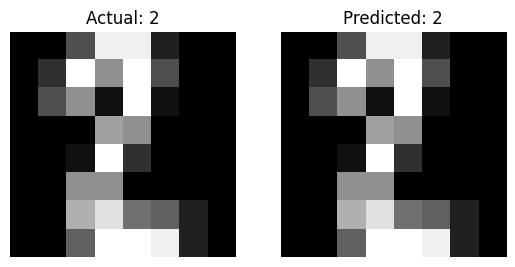

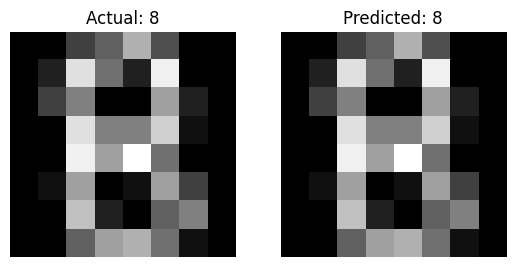

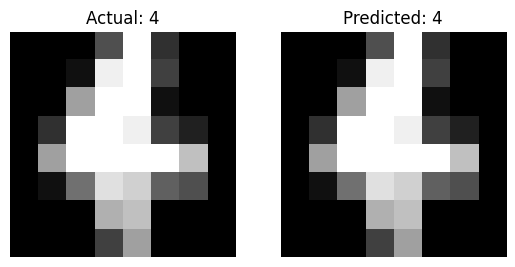

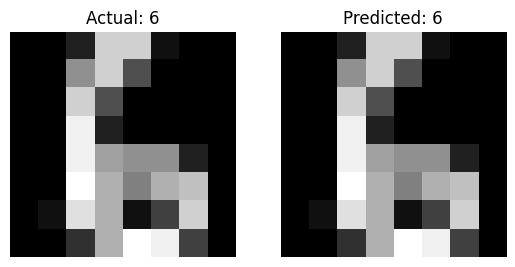

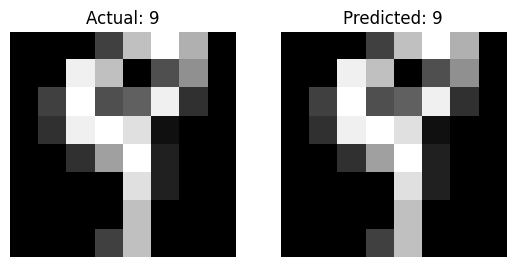

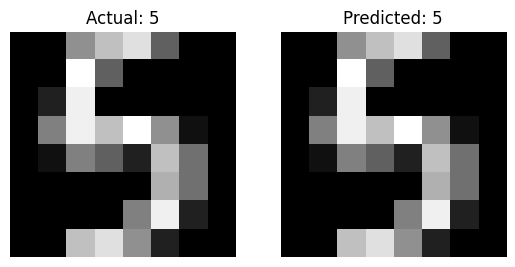

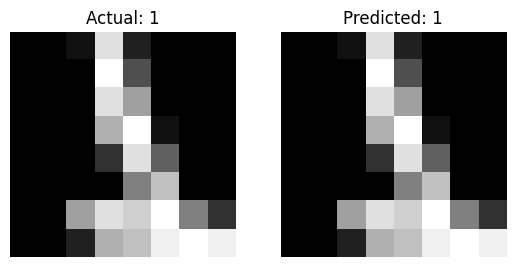

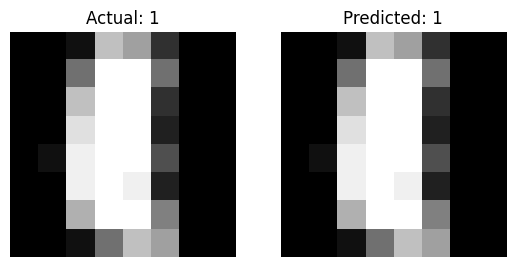

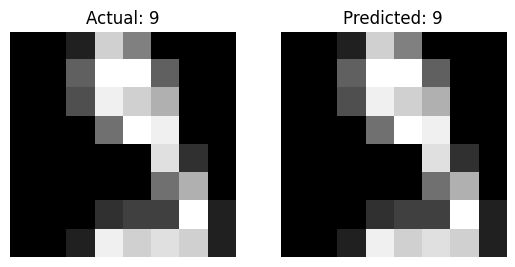

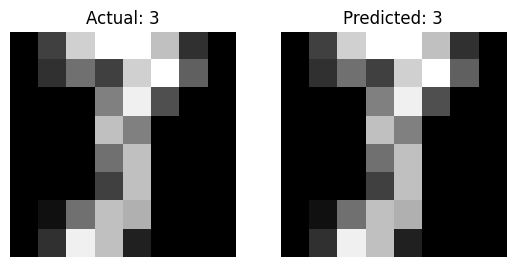

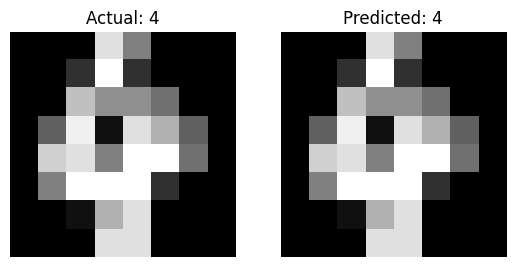

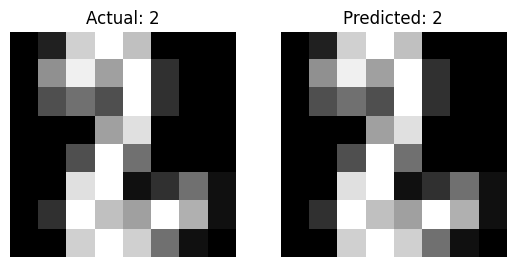

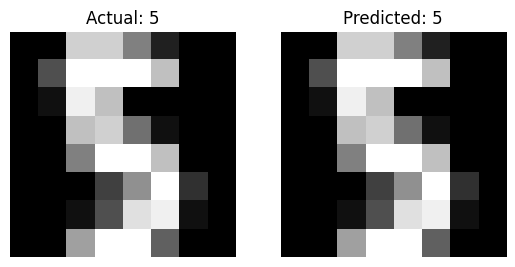

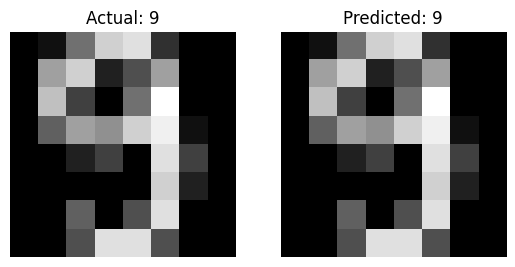

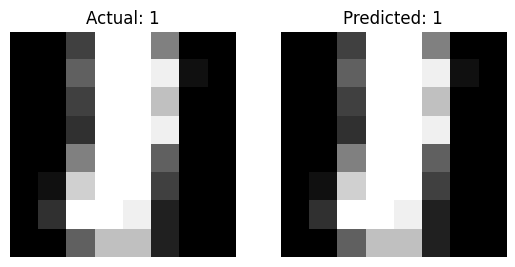

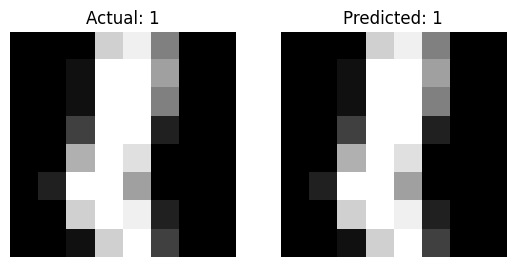

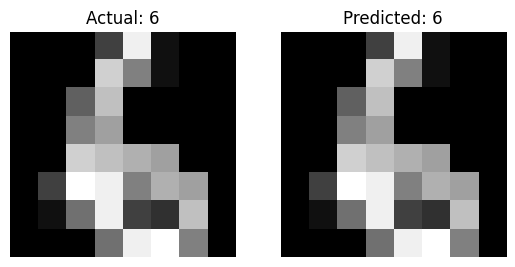

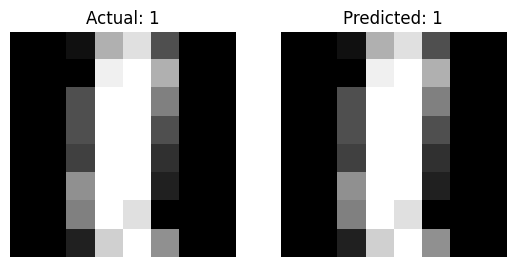

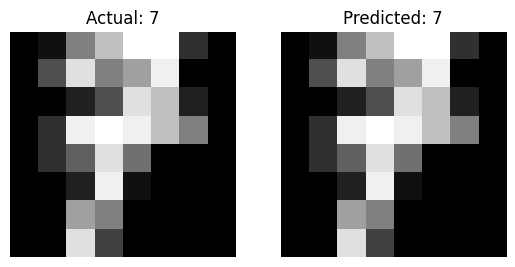

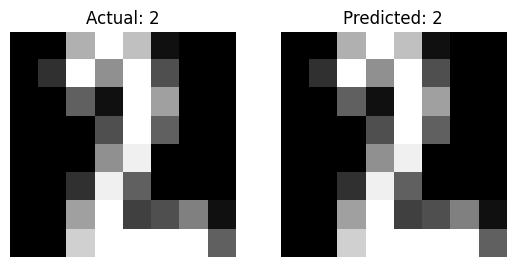

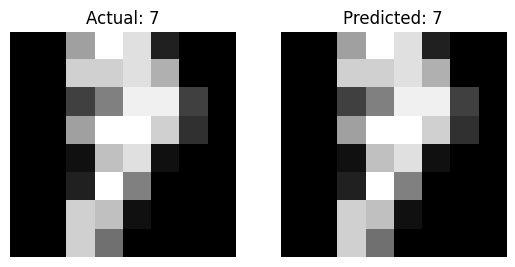

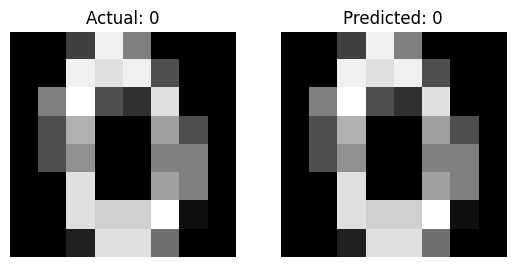

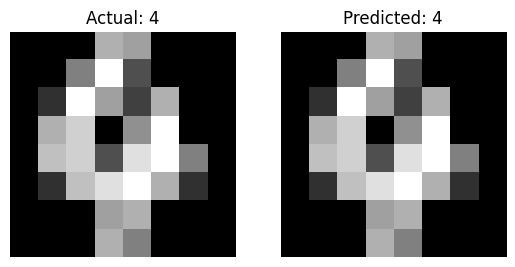

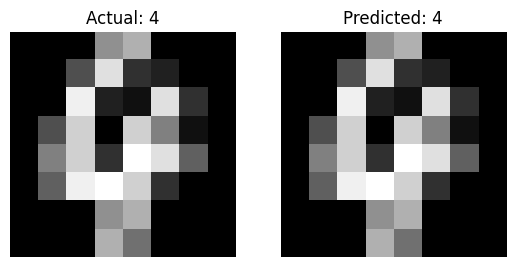

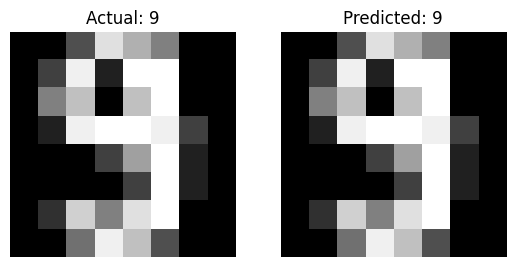

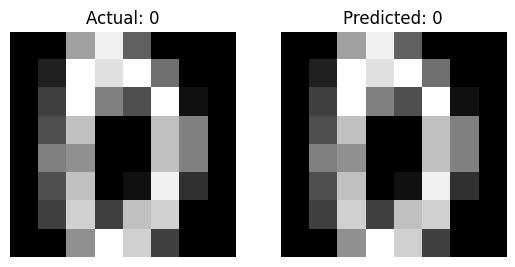

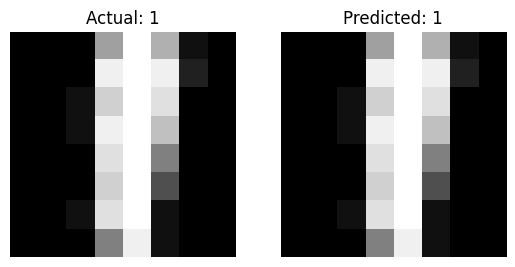

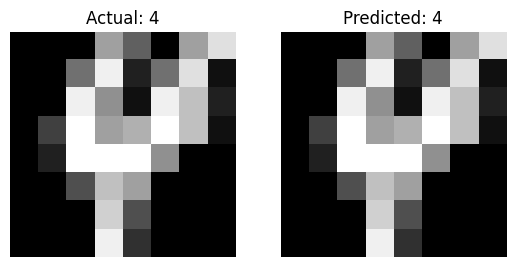

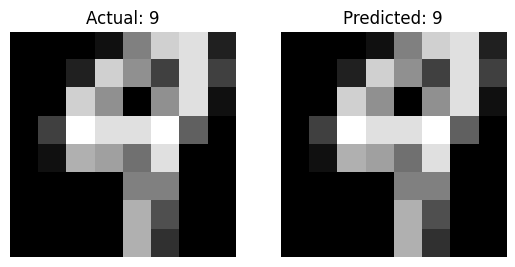

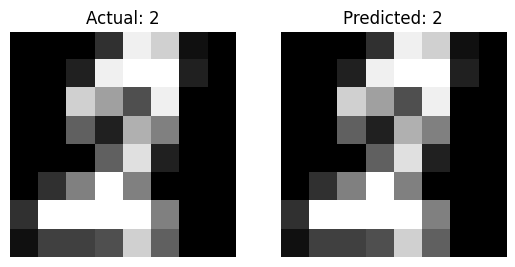

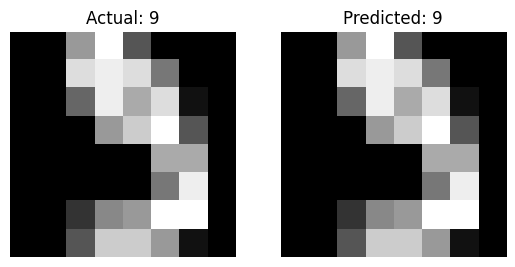

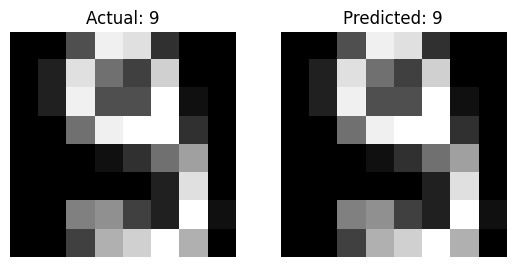

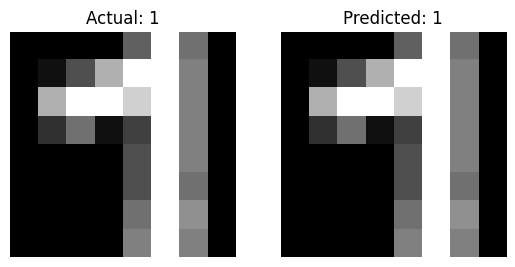

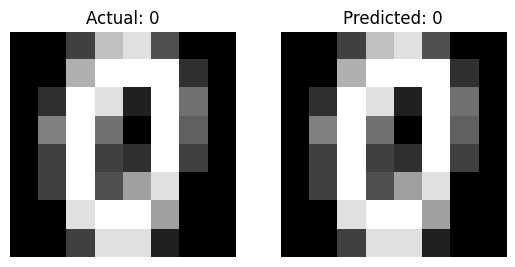

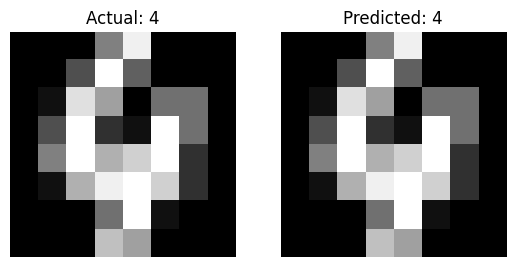

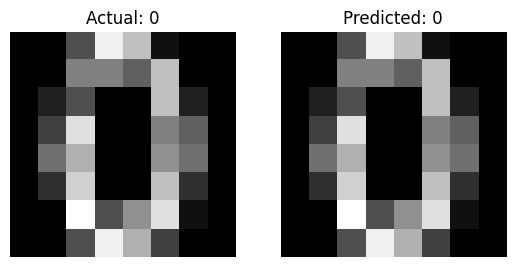

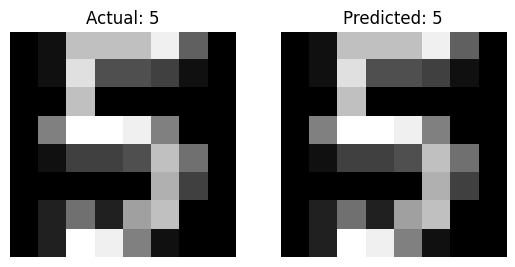

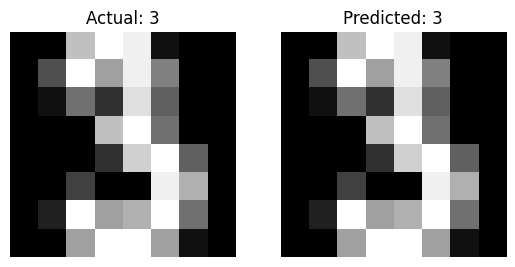

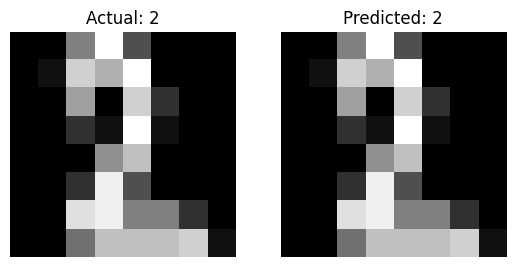

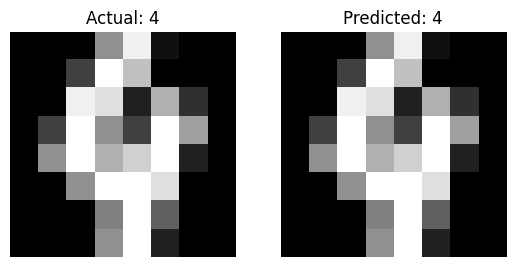

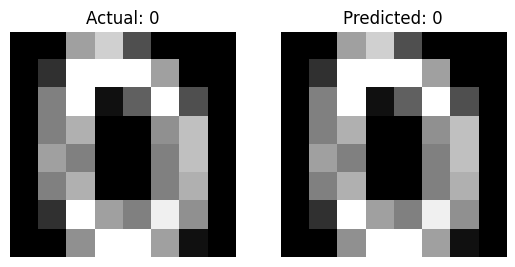

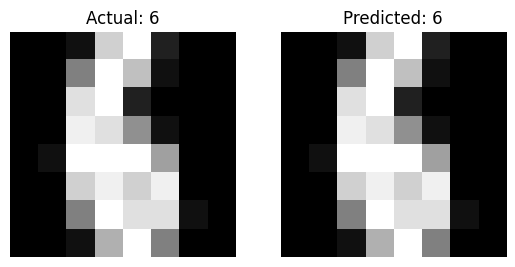

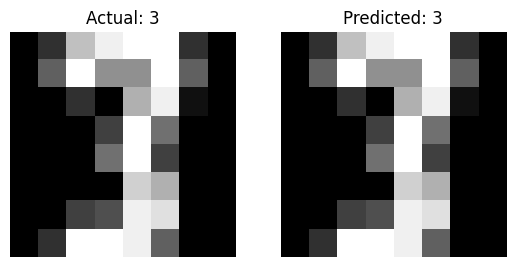

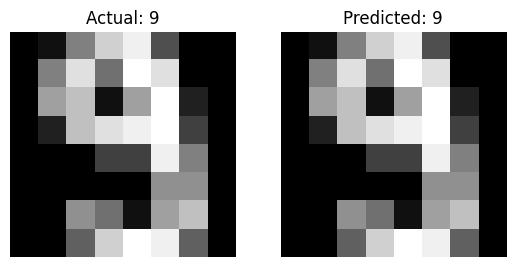

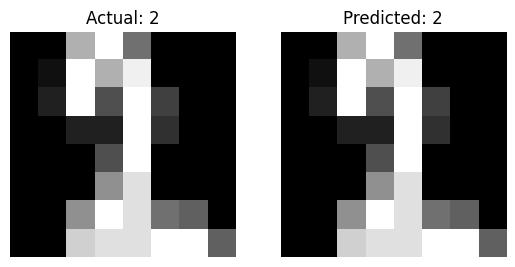

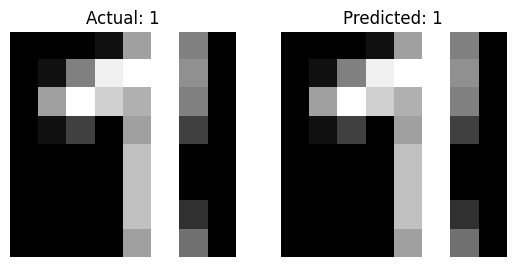

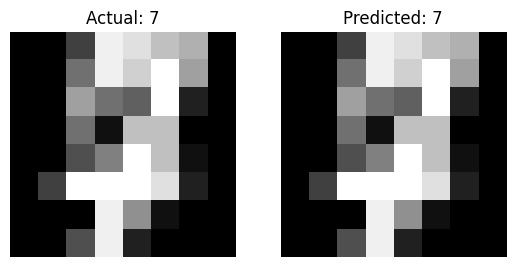

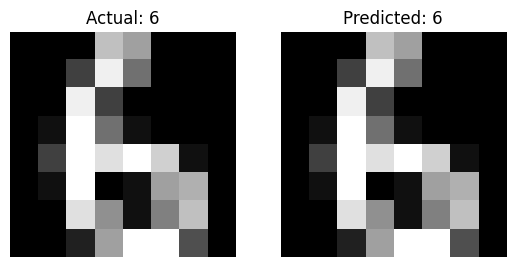

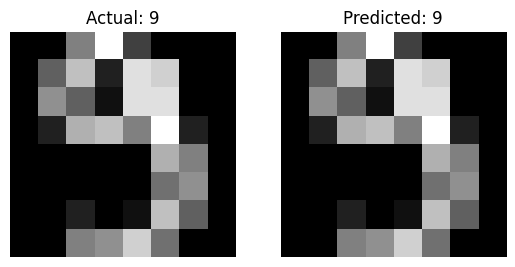

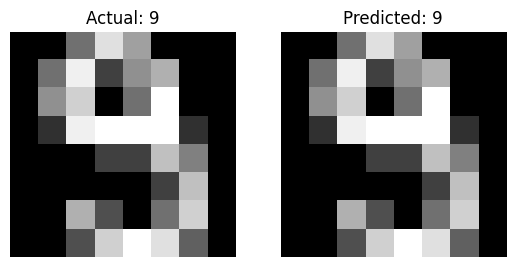

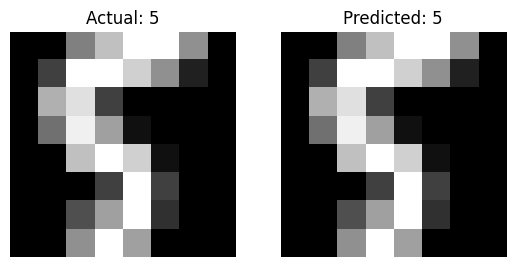

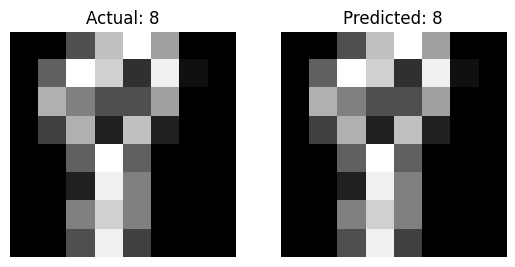

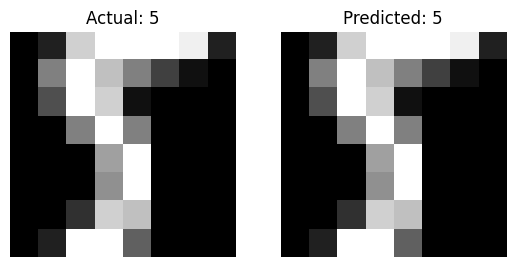

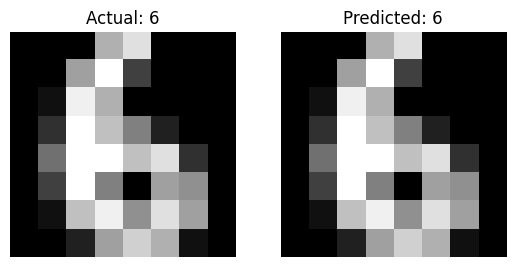

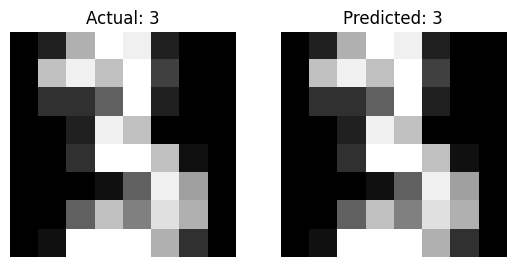

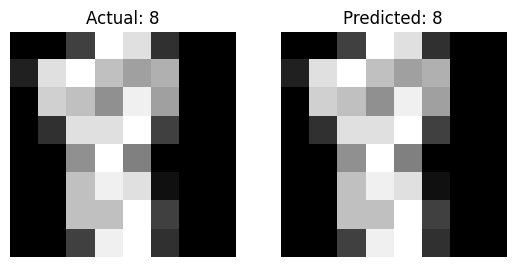

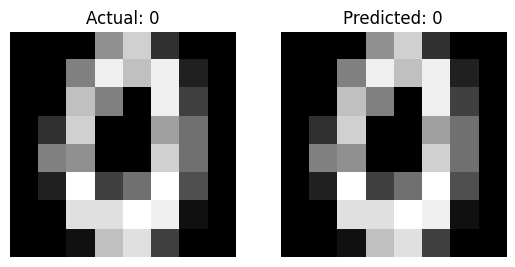

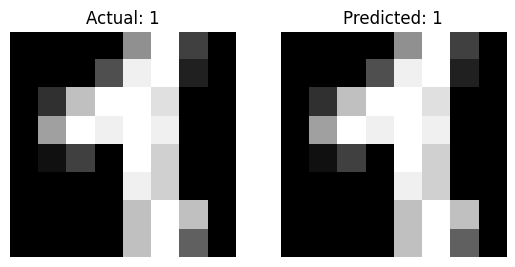

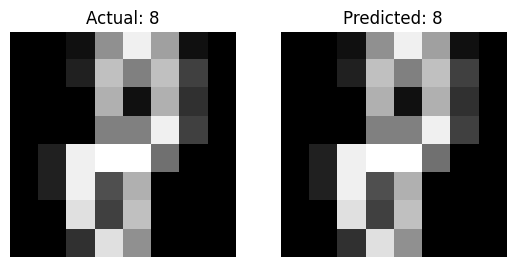

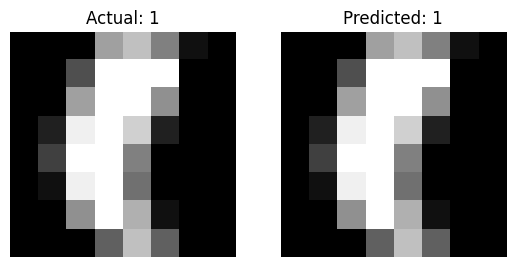

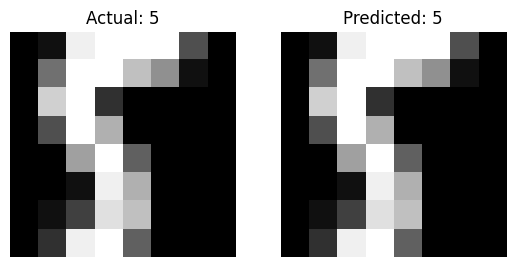

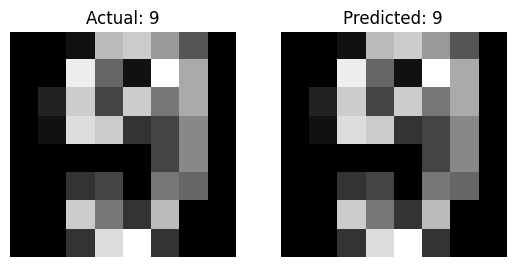

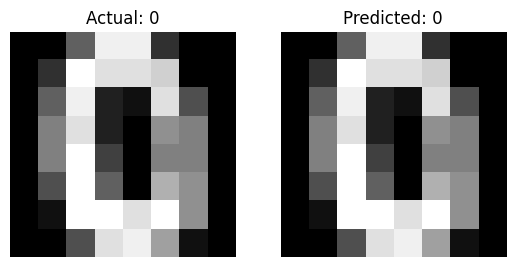

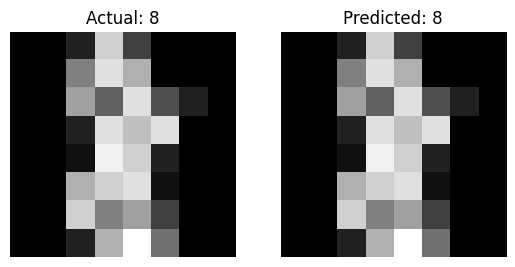

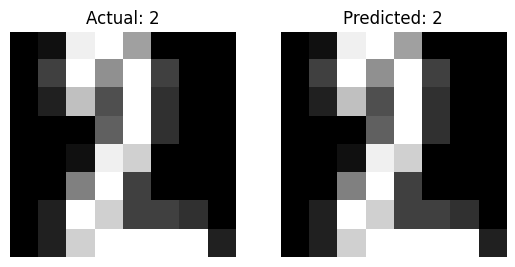

In [67]:
# Display actual and predicted values alongside the images
for i in range(len(predict)):
    plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Reshape the flattened image to its original shape
    plt.title(f'Actual: {y_test[i]}')
    plt.axis('off')  # Turn off axis labels for better visualization

    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Predicted: {predict[i]}')
    plt.axis('off')

    plt.show()

Text(95.72222222222221, 0.5, 'Truth')

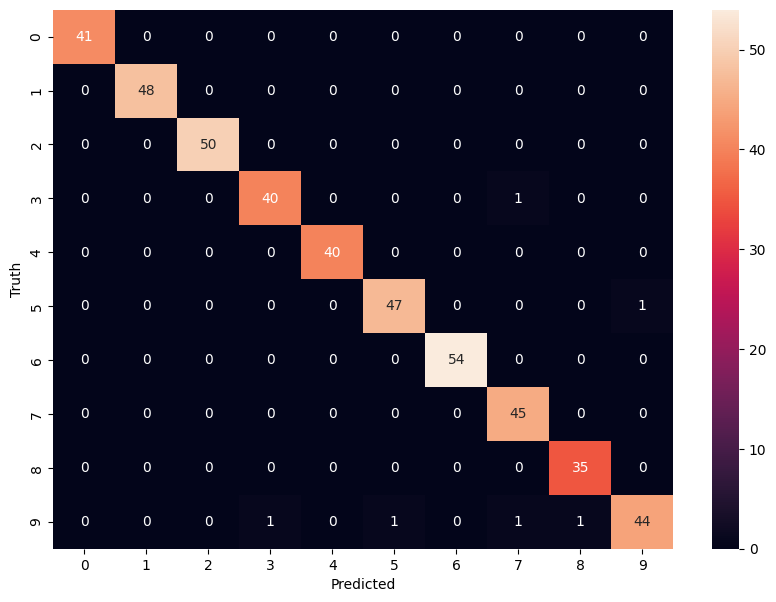

In [70]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [71]:
count = 0
for i in range(len(predict)):
    if predict[i] != y_test[i]:
        count += 1
print(count)

6


In [72]:
len(predict)

450